In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import os.path
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
from itertools import chain
%matplotlib inline
from rdkit.Chem.SaltRemover import SaltRemover

from sklearn import preprocessing 
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("/home/amna/PubChem")

In [3]:
tables_list=glob.glob("*txt")
print(tables_list)
CID_dict = {}
cidslist = []
for table in tables_list:
    tableID = table.replace('.txt','')
    tableID = tableID.replace('../data/','')
    CID_dict[tableID] = []
    with open(table) as inf:
        for aline in inf.readlines():
            if aline.startswith('CID')==True:
                #cid = aline.replace('\n')
                CID_dict[tableID].append(aline.replace('\n','').replace('CID: ',''))

['reproductivecontrol.txt', 'gastrointestinal.txt', 'hematologic.txt', 'antineoplastic.txt', 'dermatologic.txt', 'lipidregulating.txt', 'urological.txt', 'cns.txt', 'cardio.txt', 'antiinfective.txt', 'respiratorysystem.txt', 'antiinflammatory.txt']


In [4]:
activities = list(CID_dict.keys())

In [5]:
activities

['reproductivecontrol',
 'gastrointestinal',
 'hematologic',
 'antineoplastic',
 'dermatologic',
 'lipidregulating',
 'urological',
 'cns',
 'cardio',
 'antiinfective',
 'respiratorysystem',
 'antiinflammatory']

In [6]:
print(len(CID_dict[tableID]))
CID_dict.keys()
print(CID_dict[tableID][0])

CID_dict

len(CID_dict['respiratorysystem'])

total_molecules = 0
for k in CID_dict:
  print(k," : ",len(CID_dict[k]))
  total_molecules+=len(CID_dict[k]) 
total_molecules


662
134715169
reproductivecontrol  :  265
gastrointestinal  :  631
hematologic  :  555
antineoplastic  :  1876
dermatologic  :  257
lipidregulating  :  233
urological  :  73
cns  :  2034
cardio  :  1673
antiinfective  :  3404
respiratorysystem  :  398
antiinflammatory  :  662


12061

In [7]:
# get SMILES for CIDs

### keep things with smiles length <400

smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<400:  #### only those under 200 char
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))


C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
656


In [8]:
total=0
for key in CID_dict.keys():
    total+=len(smiles_dict[key])
    print(len(smiles_dict[key]))
print(total)

264
619
540
1867
257
228
73
2025
1636
3367
396
656
11928


In [9]:
## do any overlap?

### make master list of all smiles that overlap among the sets

rm = []
for key1 in smiles_dict.keys():
    print(key1+ '__________MAIN_len='+str(len(set(smiles_dict[key1]))))
    for key2 in smiles_dict.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm.append(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))
            print(str(key2)+'_'+str(len(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))))

rm

new_rm = [item for sublist in rm for item in sublist]
new_rm

reproductivecontrol__________MAIN_len=264
gastrointestinal_2
hematologic_4
antineoplastic_30
dermatologic_6
lipidregulating_1
urological_0
cns_12
cardio_38
antiinfective_5
respiratorysystem_17
antiinflammatory_11
gastrointestinal__________MAIN_len=616
reproductivecontrol_2
hematologic_5
antineoplastic_27
dermatologic_9
lipidregulating_19
urological_0
cns_151
cardio_22
antiinfective_69
respiratorysystem_4
antiinflammatory_46
hematologic__________MAIN_len=535
reproductivecontrol_4
gastrointestinal_5
antineoplastic_19
dermatologic_0
lipidregulating_7
urological_1
cns_13
cardio_174
antiinfective_14
respiratorysystem_4
antiinflammatory_36
antineoplastic__________MAIN_len=1858
reproductivecontrol_30
gastrointestinal_27
hematologic_19
dermatologic_40
lipidregulating_1
urological_0
cns_43
cardio_47
antiinfective_362
respiratorysystem_0
antiinflammatory_48
dermatologic__________MAIN_len=252
reproductivecontrol_6
gastrointestinal_9
hematologic_0
antineoplastic_40
lipidregulating_0
urological_0
c

['CCCCC(C)(C/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1CCCCCCC(=O)OC)O)O',
 'CCCC[C@@](C)(C/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1CCCCCCC(=O)OC)O)O',
 'CC(=O)C1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2C=C(C4=CC(=O)CC[C@]34C)Cl)C)OC(=O)C.C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@]2(C#C)O)CCC4=CC(=O)CC[C@H]34',
 'CC(=O)[C@]1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2C=C(C4=CC(=O)CC[C@]34C)Cl)C)OC(=O)C.C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4=CC(=O)CC[C@H]34',
 'CC1=CC(=O)C2=C(C1=O)C=CC=C2O',
 'C=CCSSSCC=C',
 'CC(C)C[C@@H](C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NCC(=O)N)NC(=O)[C@@H](CC2=CNC3=CC=CC=C32)NC(=O)[C@H](CC4=CC=C(C=C4)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC5=CNC6=CC=CC=C65)NC(=O)[C@H](CC7=CN=CN7)NC(=O)[C@@H]8CCC(=O)N8.C1=CC=C2C(=C1)C=C(C(=C2CC3=C(C(=CC4=CC=CC=C43)C(=O)O)O)O)C(=O)O',
 'CC12CCC3C(C1CCC2O)CCC45C3(CC(=C(C4O5)O)C#N)C',
 'C[C@@]12C[C@@H](C3=C4CCC(=O)C=C4CC[C@H]3[C@@H]1CC[C@@]2(CCCO)O)C5=CC=C(C=C5)N(C)C',
 'CC1=CC2=C(C(=CC(=C2C(C)C)O)C(=O)C)C(=C1C3=C(C4=C(C=C3C)C(=C(C(=C4C=O)O)O)C(C)C)O)O.CC(=O)O',
 'CN(CC1=CN=C2C(

In [10]:
### Remove those and check there is no longer overlap

len(smiles_dict['antiinfective'])

nsmilesd = {}
for key in smiles_dict.keys():
    nsmilesd[key] = list(set(smiles_dict[key])-set(new_rm))
    print(key+ '__________NEW_len='+str(len(nsmilesd[key])))
    print(key+ '__________OLD_len='+str(len(set(smiles_dict[key]))))
    

reproductivecontrol__________NEW_len=165
reproductivecontrol__________OLD_len=264
gastrointestinal__________NEW_len=321
gastrointestinal__________OLD_len=616
hematologic__________NEW_len=315
hematologic__________OLD_len=535
antineoplastic__________NEW_len=1325
antineoplastic__________OLD_len=1858
dermatologic__________NEW_len=133
dermatologic__________OLD_len=252
lipidregulating__________NEW_len=176
lipidregulating__________OLD_len=225
urological__________NEW_len=49
urological__________OLD_len=73
cns__________NEW_len=1501
cns__________OLD_len=2023
cardio__________NEW_len=1039
cardio__________OLD_len=1635
antiinfective__________NEW_len=2790
antiinfective__________OLD_len=3364
respiratorysystem__________NEW_len=144
respiratorysystem__________OLD_len=396
antiinflammatory__________NEW_len=412
antiinflammatory__________OLD_len=652


In [11]:
### check they overlap is gone

for key1 in nsmilesd.keys():
    rm2 = []
    print(key1+ '__________MAIN_len='+str(len(nsmilesd[key1])))
    for key2 in nsmilesd.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm2.append(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))
            print(str(key2)+'_'+str(len(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))))

reproductivecontrol__________MAIN_len=165
gastrointestinal_0
hematologic_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
gastrointestinal__________MAIN_len=321
reproductivecontrol_0
hematologic_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
hematologic__________MAIN_len=315
reproductivecontrol_0
gastrointestinal_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
antineoplastic__________MAIN_len=1325
reproductivecontrol_0
gastrointestinal_0
hematologic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
dermatologic__________MAIN_len=133
reproductivecontrol_0
gastrointestinal_0
hematologic_0
antineoplastic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_

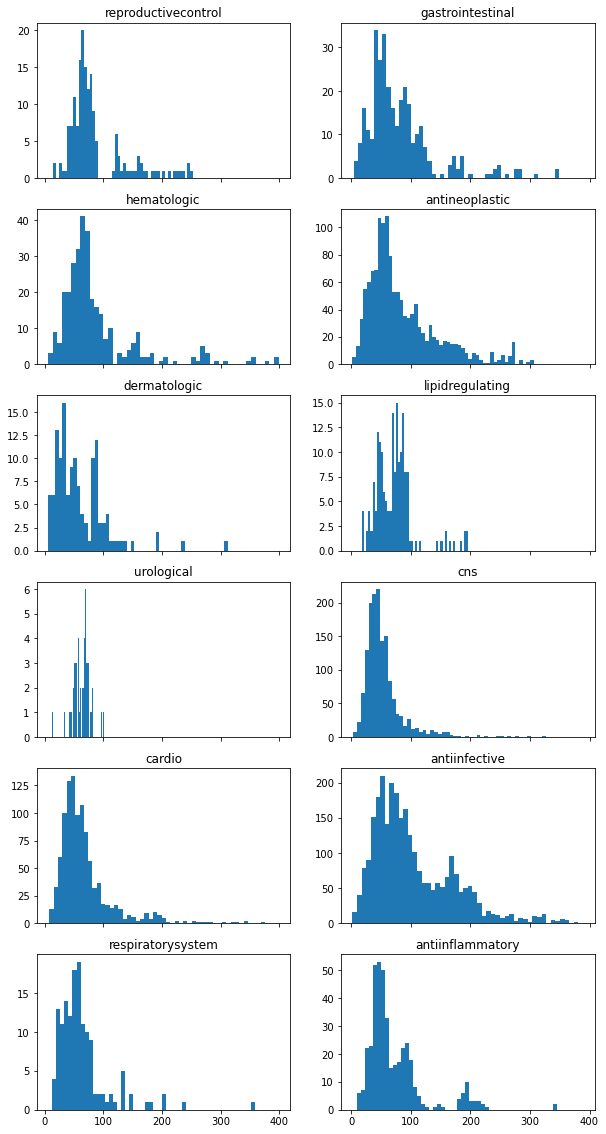

In [12]:
smiles_dict = nsmilesd
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1


In [13]:
# Remove salts

#os.chdir('/home/jgmeyer2/drugclass/data/SMILES/')

remover = SaltRemover()
cln_smiles_dict = {}

for key in smiles_dict.keys():
    tmplist = []
    for smiles in smiles_dict[key]:
        tmplist.append(Chem.MolToSmiles(remover(Chem.MolFromSmiles(smiles))))
    cln_smiles_dict[key] = list(set(tmplist))

RDKit WARNING: [05:19:15] WARNING: not removing hydrogen atom without neighbors
[05:19:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:15] WARNING: not removing hydrogen atom without neighbors
[05:19:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:15] WARNING: not removing hydrogen atom without neighbors
[05:19:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:16] WARNING: not removing hydrogen atom without neighbors
[05:19:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:16] WARNING: not removing hydrogen atom without neighbors
[05:19:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:18] WARNING: not removing hydrogen atom without neighbors
[05:19:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:22] WARNING: not removing hydrogen atom without neighbors
[05:19:22] WARNING: not removing hydrogen atom wit

RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:39] WARNING: not removing hydrogen atom without neighbors
[05:19:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:40] WARNING: not removing hydrogen atom without neighbors
[05:19:40] WARNING: not removing hydrogen atom wit

In [14]:

df = pd.DataFrame()
for cls in cln_smiles_dict.keys():
  df_new = pd.DataFrame({'Smiles':cln_smiles_dict[cls]})
  df_new['Class']=cls
  df=df.append(df_new)
df['Class'].value_counts()


antiinfective          2415
antineoplastic         1177
cns                    1153
cardio                  797
antiinflammatory        374
hematologic             268
gastrointestinal        263
lipidregulating         164
reproductivecontrol     148
dermatologic            116
respiratorysystem       101
urological               29
Name: Class, dtype: int64

In [15]:
ohe = preprocessing.OneHotEncoder()
transformed = ohe.fit_transform(df[['Class']])

print(transformed.toarray())

df[ohe.categories_[0]] = transformed.toarray()

df

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Smiles                Class  \
0    C#C[C@@]1(O)CC[C@@H]2[C@H]3CCC4=CC(=O)CC[C@H]4...  reproductivecontrol   
1    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...  reproductivecontrol   
2    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...  reproductivecontrol   
3    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...  reproductivecontrol   
4        CCN(CC)CCOc1ccc(C(=C(Cl)c2ccccc2)c2ccccc2)cc1  reproductivecontrol   
..                                                 ...                  ...   
369  C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@...     antiinflammatory   
370  C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43...     antiinflammatory   
371  CCOCCO[C@@H]1CC[C@@H](C[C@@H](C)[C@@H]2CC(=O)[...     antiinflammatory   
372              CCCCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O     antiinflammatory   
373    C[C@@H](Cc1ccc(O)c(O)c1)[C@H](C)Cc1ccc(O)c(O)c1     antiinflammatory   

     antiinfective  antiinflammatory  antineoplastic  cardio  cns  \
0              0.0               0.0             0.0     0.0  0.0   
1              0.0               0.0             0.0     0.0  0.0   
2              0.0               0.0             0.0     0.0  0.0   
3              0.0               0.0             0.0     0.0  0.0   
4              0.0               0.0             0.0     0.0  0.0   
..             ...               ...             ...     ...  ...   
369            0.0               1.0             0.0     0.0  0.0   
370            0.0               1.0             0.0     0.0  0.0   
371            0.0               1.0             0.0     0.0  0.0   
372            0.0               1.0             0.0     0.0  0.0   
373            0.0               1.0             0.0     0.0  0.0   

     dermatologic  gastrointestinal  hematologic  lipidregulating  \
0             0.0               0.0          0.0              0.0   
1             0.0               0.0          0.0              0.0   
2             0.0               0.0          0.0              0.0   
3             0.0               0.0          0.0              0.0   
4             0.0               0.0          0.0              0.0   
..            ...               ...          ...              ...   
369           0.0               0.0          0.0              0.0   
370           0.0               0.0          0.0              0.0   
371           0.0               0.0          0.0              0.0   
372           0.0               0.0          0.0              0.0   
373           0.0               0.0          0.0              0.0   

     reproductivecontrol  respiratorysystem  urological  
0                    1.0                0.0         0.0  
1                    1.0                0.0         0.0  
2                    1.0                0.0         0.0  
3                    1.0                0.0         0.0  
4                    1.0                0.0         0.0  
..                   ...                ...         ...  
369                  0.0                0.0         0.0  
370                  0.0                0.0         0.0  
371                  0.0                0.0         0.0  
372                  0.0                0.0         0.0  
373                  0.0                0.0         0.0  

[7005 rows x 14 columns]

In [16]:
X = df['Smiles'].values.tolist()

In [17]:
y = df['antiinfective'].values.tolist()

In [18]:
X

['C#C[C@@]1(O)CC[C@@H]2[C@H]3CCC4=CC(=O)CC[C@H]4[C@@H]3CC[C@]21CC',
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21C.C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(OC)ccc4[C@H]3CC[C@@]21C',
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@H]4[C@H]3CC[C@@]21CC',
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3C(=C)C[C@@]21CC',
 'CCN(CC)CCOc1ccc(C(=C(Cl)c2ccccc2)c2ccccc2)cc1',
 'C#C[C@]1(O)CCC2[C@@H]3CCC4=CC(=O)CC[C@@H]4C3CC[C@@]21CC',
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]3C(=C)C[C@@]21CC.C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(O)ccc4[C@H]3CC[C@@]21C',
 'CCc1ccccc1-c1nc(-c2cccc(OC)c2)n[nH]1',
 'CCCCC[C@](C)(O)C=C[C@H]1[C@H](O)C[C@H](O)[C@@H]1C/C=C/CCCC(=O)O.NC(CO)(CO)CO',
 'CCCCC[C@](C)(O)/C=C/[C@H]1[C@@H](O)C[C@H](O)[C@@H]1C/C=C\\CCCC(=O)O',
 'CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C.C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@@H]2OC(=O)CCC1CCCC1',
 'C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21CC',
 'CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)C[C@H](O)

In [19]:
y

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

## Morgan Binary Classifier

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
import lazyqsar as lq
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

In [21]:

split = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
split.get_n_splits(X, y)
model = lq.MorganBinaryClassifier()
scores = np.array([])

for train_index, test_index in split.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = [X[i] for i in train_index] , [y[i] for i in train_index]
    X_test,  y_test  = [X[i] for i in test_index] , [y[i] for i in test_index]
    model.fit(X_train, y_train)
    
    # validate
    y_hat = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_hat)
    print("AUROC for fold: " , auc(fpr, tpr))
    scores = np.append(scores, auc(fpr, tpr))
print(np.mean(scores))  

TRAIN: [3637 1568 3103 ...  638 2102 3617] TEST: [ 201 4128 6784 ... 2685 4576 4782]


RDKit WARNING: [05:19:49] WARNING: not removing hydrogen atom without neighbors
[05:19:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:49] WARNING: not removing hydrogen atom without neighbors
[05:19:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:49] WARNING: not removing hydrogen atom without neighbors
[05:19:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:51] WARNING: not removing hydrogen atom without neighbors
[05:19:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:51] WARNING: not removing hydrogen atom without neighbors
[05:19:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:51] WARNING: not removing hydrogen atom without neighbors
[05:19:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:19:51] WARNING: not removing hydrogen atom without neighbors
[05:19:51] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:20:00] {3174} INFO - iteration 4, current learner rf
[flaml.automl: 10-16 05:20:01] {3354} INFO -  at 3.1s,	estimator rf's best error=0.2179,	best estimator rf's best error=0.2179
[flaml.automl: 10-16 05:20:01] {3174} INFO - iteration 5, current learner rf
[flaml.automl: 10-16 05:20:01] {3354} INFO -  at 3.6s,	estimator rf's best error=0.2179,	best estimator rf's best error=0.2179
[flaml.automl: 10-16 05:20:01] {3174} INFO - iteration 6, current learner rf
[flaml.automl: 10-16 05:20:01] {3354} INFO -  at 3.9s,	estimator rf's best error=0.1898,	best estimator rf's best error=0.1898
[flaml.automl: 10-16 05:20:02] {3174} INFO - iteration 7, current learner rf
[flaml.automl: 10-16 05:20:02] {3354} INFO -  at 4.7s,	estimator rf's best error=0.1530,	best estimator rf's best error=0.1530
[flaml.automl: 10-16 05:20:02] {3174} INFO - iteration 8, current learner rf
[flaml.automl: 10-16 05:20:03] {3354} INFO -  at 5.0s,	estimator rf's best error=0.1530,	best estimator rf'

AUROC for fold:  0.9543548238225996
TRAIN: [ 339 1928  510 ... 4089 6943 4048] TEST: [4855 1038 2929 ... 5790 4766 6759]


RDKit WARNING: [05:20:25] WARNING: not removing hydrogen atom without neighbors
[05:20:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:25] WARNING: not removing hydrogen atom without neighbors
[05:20:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:25] WARNING: not removing hydrogen atom without neighbors
[05:20:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:25] WARNING: not removing hydrogen atom without neighbors
[05:20:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:26] WARNING: not removing hydrogen atom without neighbors
[05:20:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:26] WARNING: not removing hydrogen atom without neighbors
[05:20:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:20:26] WARNING: not removing hydrogen atom without neighbors
[05:20:26] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:20:50] {3354} INFO -  at 15.3s,	estimator rf's best error=0.0706,	best estimator rf's best error=0.0706
[flaml.automl: 10-16 05:20:50] {3174} INFO - iteration 15, current learner rf
[flaml.automl: 10-16 05:20:51] {3354} INFO -  at 17.2s,	estimator rf's best error=0.0456,	best estimator rf's best error=0.0456
[flaml.automl: 10-16 05:20:51] {3174} INFO - iteration 16, current learner rf
[flaml.automl: 10-16 05:20:53] {3354} INFO -  at 18.8s,	estimator rf's best error=0.0456,	best estimator rf's best error=0.0456
[flaml.automl: 10-16 05:20:55] {3618} INFO - retrain rf for 2.0s
[flaml.automl: 10-16 05:20:55] {3625} INFO - retrained model: RandomForestClassifier(criterion='entropy', max_features=0.042206361398956185,
                       max_leaf_nodes=227, n_estimators=8, n_jobs=-1)
[flaml.automl: 10-16 05:20:55] {2900} INFO - fit succeeded
[flaml.automl: 10-16 05:20:55] {2901} INFO - Time taken to find the best model: 17.21314239501953
[flaml.automl: 10-16 05:20:

AUROC for fold:  0.9565325241710316
TRAIN: [4581 5038 3355 ... 5539 6107 5690] TEST: [5884 2305  495 ... 6957 4386 6222]


RDKit WARNING: [05:20:59] WARNING: not removing hydrogen atom without neighbors
[05:20:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:00] WARNING: not removing hydrogen atom without neighbors
[05:21:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:00] WARNING: not removing hydrogen atom without neighbors
[05:21:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:00] WARNING: not removing hydrogen atom without neighbors
[05:21:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:00] WARNING: not removing hydrogen atom without neighbors
[05:21:00] WARNING: not removing hydrogen atom without neighbors
[05:21:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:01] WARNING: not removing hydrogen atom without neighbors
[05:21:01] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:21:15] {3174} INFO - iteration 11, current learner rf
[flaml.automl: 10-16 05:21:15] {3354} INFO -  at 7.2s,	estimator rf's best error=0.0810,	best estimator rf's best error=0.0810
[flaml.automl: 10-16 05:21:15] {3174} INFO - iteration 12, current learner rf
[flaml.automl: 10-16 05:21:18] {3354} INFO -  at 9.3s,	estimator rf's best error=0.0710,	best estimator rf's best error=0.0710
[flaml.automl: 10-16 05:21:18] {3174} INFO - iteration 13, current learner rf
[flaml.automl: 10-16 05:21:19] {3354} INFO -  at 10.7s,	estimator rf's best error=0.0710,	best estimator rf's best error=0.0710
[flaml.automl: 10-16 05:21:19] {3174} INFO - iteration 14, current learner rf
[flaml.automl: 10-16 05:21:22] {3354} INFO -  at 13.9s,	estimator rf's best error=0.0710,	best estimator rf's best error=0.0710
[flaml.automl: 10-16 05:21:22] {3174} INFO - iteration 15, current learner rf
[flaml.automl: 10-16 05:21:25] {3354} INFO -  at 16.5s,	estimator rf's best error=0.0589,	best estim

AUROC for fold:  0.953254436163094
TRAIN: [2649 6744 2912 ... 2869 3061 3798] TEST: [3592 4371 5226 ... 5893 5889 5726]


RDKit WARNING: [05:21:39] WARNING: not removing hydrogen atom without neighbors
[05:21:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:40] WARNING: not removing hydrogen atom without neighbors
[05:21:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:40] WARNING: not removing hydrogen atom without neighbors
[05:21:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:41] WARNING: not removing hydrogen atom without neighbors
[05:21:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:41] WARNING: not removing hydrogen atom without neighbors
[05:21:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:42] WARNING: not removing hydrogen atom without neighbors
[05:21:42] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:21:42] WARNING: not removing hydrogen atom without neighbors
[05:21:42] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:21:50] {3174} INFO - iteration 4, current learner rf
[flaml.automl: 10-16 05:21:51] {3354} INFO -  at 2.7s,	estimator rf's best error=0.2538,	best estimator rf's best error=0.2538
[flaml.automl: 10-16 05:21:51] {3174} INFO - iteration 5, current learner rf
[flaml.automl: 10-16 05:21:52] {3354} INFO -  at 3.3s,	estimator rf's best error=0.2220,	best estimator rf's best error=0.2220
[flaml.automl: 10-16 05:21:52] {3174} INFO - iteration 6, current learner rf
[flaml.automl: 10-16 05:21:52] {3354} INFO -  at 4.0s,	estimator rf's best error=0.2220,	best estimator rf's best error=0.2220
[flaml.automl: 10-16 05:21:52] {3174} INFO - iteration 7, current learner rf
[flaml.automl: 10-16 05:21:54] {3354} INFO -  at 5.9s,	estimator rf's best error=0.2158,	best estimator rf's best error=0.2158
[flaml.automl: 10-16 05:21:54] {3174} INFO - iteration 8, current learner rf
[flaml.automl: 10-16 05:21:55] {3354} INFO -  at 6.9s,	estimator rf's best error=0.2158,	best estimator rf'

AUROC for fold:  0.917890601564483
TRAIN: [4913 3034 3997 ... 1315 4536 2619] TEST: [1902  252 2976 ... 3888 5978 2391]


RDKit WARNING: [05:22:15] WARNING: not removing hydrogen atom without neighbors
[05:22:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:15] WARNING: not removing hydrogen atom without neighbors
[05:22:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:15] WARNING: not removing hydrogen atom without neighbors
[05:22:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:16] WARNING: not removing hydrogen atom without neighbors
[05:22:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:16] WARNING: not removing hydrogen atom without neighbors
[05:22:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:16] WARNING: not removing hydrogen atom without neighbors
[05:22:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:16] WARNING: not removing hydrogen atom without neighbors
[05:22:16] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:22:27] {3174} INFO - iteration 6, current learner rf
[flaml.automl: 10-16 05:22:27] {3354} INFO -  at 3.6s,	estimator rf's best error=0.2382,	best estimator rf's best error=0.2382
[flaml.automl: 10-16 05:22:27] {3174} INFO - iteration 7, current learner rf
[flaml.automl: 10-16 05:22:28] {3354} INFO -  at 4.3s,	estimator rf's best error=0.2296,	best estimator rf's best error=0.2296
[flaml.automl: 10-16 05:22:28] {3174} INFO - iteration 8, current learner rf
[flaml.automl: 10-16 05:22:28] {3354} INFO -  at 4.7s,	estimator rf's best error=0.2296,	best estimator rf's best error=0.2296
[flaml.automl: 10-16 05:22:28] {3174} INFO - iteration 9, current learner rf
[flaml.automl: 10-16 05:22:29] {3354} INFO -  at 5.4s,	estimator rf's best error=0.2042,	best estimator rf's best error=0.2042
[flaml.automl: 10-16 05:22:29] {3174} INFO - iteration 10, current learner rf
[flaml.automl: 10-16 05:22:30] {3354} INFO -  at 6.2s,	estimator rf's best error=0.1692,	best estimator rf

AUROC for fold:  0.9101330848928167
0.9384330941228051


## Morgan Binary Classifier without specifying estimator

In [22]:

split = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
split.get_n_splits(X, y)
model = lq.MorganBinaryClassifier(time_budget_sec=300, estimator_list=None)
scores = np.array([])

for train_index, test_index in split.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = [X[i] for i in train_index] , [y[i] for i in train_index]
    X_test,  y_test  = [X[i] for i in test_index] , [y[i] for i in test_index]
    model.fit(X_train, y_train)
    
    # validate
    y_hat = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_hat)
    print("AUROC for fold: " , auc(fpr, tpr))
    scores = np.append(scores, auc(fpr, tpr))
print(np.mean(scores))
model.fit(X, y)

TRAIN: [3637 1568 3103 ...  638 2102 3617] TEST: [ 201 4128 6784 ... 2685 4576 4782]


RDKit WARNING: [05:22:52] WARNING: not removing hydrogen atom without neighbors
[05:22:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:52] WARNING: not removing hydrogen atom without neighbors
[05:22:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:52] WARNING: not removing hydrogen atom without neighbors
[05:22:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:54] WARNING: not removing hydrogen atom without neighbors
[05:22:54] WARNING: not removing hydrogen atom without neighbors
[05:22:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:54] WARNING: not removing hydrogen atom without neighbors
[05:22:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:22:54] WARNING: not removing hy

[flaml.automl: 10-16 05:23:07] {3354} INFO -  at 6.3s,	estimator xgboost's best error=0.3186,	best estimator lgbm's best error=0.3186
[flaml.automl: 10-16 05:23:07] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-16 05:23:08] {3354} INFO -  at 7.5s,	estimator lgbm's best error=0.3179,	best estimator lgbm's best error=0.3179
[flaml.automl: 10-16 05:23:08] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-16 05:23:09] {3354} INFO -  at 8.6s,	estimator lgbm's best error=0.3179,	best estimator lgbm's best error=0.3179
[flaml.automl: 10-16 05:23:09] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-16 05:23:11] {3354} INFO -  at 10.0s,	estimator lgbm's best error=0.2892,	best estimator lgbm's best error=0.2892
[flaml.automl: 10-16 05:23:11] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-16 05:23:12] {3354} INFO -  at 11.3s,	estimator lgbm's best error=0.2892,	best estimator lgbm's best error=0.2892
[flaml.automl: 10-16 05:

[flaml.automl: 10-16 05:23:44] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-16 05:23:45] {3354} INFO -  at 44.4s,	estimator lgbm's best error=0.0745,	best estimator lgbm's best error=0.0745
[flaml.automl: 10-16 05:23:45] {3174} INFO - iteration 43, current learner lgbm
[flaml.automl: 10-16 05:23:47] {3354} INFO -  at 45.8s,	estimator lgbm's best error=0.0745,	best estimator lgbm's best error=0.0745
[flaml.automl: 10-16 05:23:47] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-16 05:23:47] {3354} INFO -  at 46.7s,	estimator extra_tree's best error=0.1871,	best estimator lgbm's best error=0.0745
[flaml.automl: 10-16 05:23:47] {3174} INFO - iteration 45, current learner lgbm
[flaml.automl: 10-16 05:23:49] {3354} INFO -  at 48.3s,	estimator lgbm's best error=0.0745,	best estimator lgbm's best error=0.0745
[flaml.automl: 10-16 05:23:49] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-16 05:23:50] {3354} INFO -  at 49.6s,	esti

[flaml.automl: 10-16 05:26:52] {3354} INFO -  at 230.8s,	estimator lgbm's best error=0.0745,	best estimator extra_tree's best error=0.0289
[flaml.automl: 10-16 05:26:52] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-16 05:27:14] {3354} INFO -  at 253.4s,	estimator extra_tree's best error=0.0289,	best estimator extra_tree's best error=0.0289
[flaml.automl: 10-16 05:27:14] {3174} INFO - iteration 81, current learner xgboost
[flaml.automl: 10-16 05:27:16] {3354} INFO -  at 255.2s,	estimator xgboost's best error=0.2466,	best estimator extra_tree's best error=0.0289
[flaml.automl: 10-16 05:27:16] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-16 05:27:27] {3354} INFO -  at 266.2s,	estimator extra_tree's best error=0.0289,	best estimator extra_tree's best error=0.0289
[flaml.automl: 10-16 05:27:27] {3174} INFO - iteration 83, current learner xgb_limitdepth
[flaml.automl: 10-16 05:27:29] {3354} INFO -  at 268.2s,	estimator xgb_limitdepth's 

AUROC for fold:  0.9727873987585666
TRAIN: [ 339 1928  510 ... 4089 6943 4048] TEST: [4855 1038 2929 ... 5790 4766 6759]


RDKit WARNING: [05:29:13] WARNING: not removing hydrogen atom without neighbors
[05:29:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:13] WARNING: not removing hydrogen atom without neighbors
[05:29:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:13] WARNING: not removing hydrogen atom without neighbors
[05:29:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:13] WARNING: not removing hydrogen atom without neighbors
[05:29:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:14] WARNING: not removing hydrogen atom without neighbors
[05:29:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:14] WARNING: not removing hydrogen atom without neighbors
[05:29:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:29:14] WARNING: not removing hydrogen atom without neighbors
[05:29:14] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:29:36] {3354} INFO -  at 14.0s,	estimator extra_tree's best error=0.2216,	best estimator extra_tree's best error=0.2216
[flaml.automl: 10-16 05:29:36] {3174} INFO - iteration 14, current learner extra_tree
[flaml.automl: 10-16 05:29:36] {3354} INFO -  at 14.6s,	estimator extra_tree's best error=0.2216,	best estimator extra_tree's best error=0.2216
[flaml.automl: 10-16 05:29:36] {3174} INFO - iteration 15, current learner extra_tree
[flaml.automl: 10-16 05:29:37] {3354} INFO -  at 15.2s,	estimator extra_tree's best error=0.2216,	best estimator extra_tree's best error=0.2216
[flaml.automl: 10-16 05:29:37] {3174} INFO - iteration 16, current learner extra_tree
[flaml.automl: 10-16 05:29:38] {3354} INFO -  at 15.8s,	estimator extra_tree's best error=0.2216,	best estimator extra_tree's best error=0.2216
[flaml.automl: 10-16 05:29:38] {3174} INFO - iteration 17, current learner rf
[flaml.automl: 10-16 05:29:38] {3354} INFO -  at 16.1s,	estimator rf's best error=0.2673

[flaml.automl: 10-16 05:30:34] {3174} INFO - iteration 51, current learner rf
[flaml.automl: 10-16 05:30:38] {3354} INFO -  at 76.2s,	estimator rf's best error=0.0415,	best estimator extra_tree's best error=0.0346
[flaml.automl: 10-16 05:30:38] {3174} INFO - iteration 52, current learner rf
[flaml.automl: 10-16 05:30:46] {3354} INFO -  at 84.5s,	estimator rf's best error=0.0330,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:30:46] {3174} INFO - iteration 53, current learner rf
[flaml.automl: 10-16 05:30:50] {3354} INFO -  at 88.4s,	estimator rf's best error=0.0330,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:30:50] {3174} INFO - iteration 54, current learner lgbm
[flaml.automl: 10-16 05:30:51] {3354} INFO -  at 89.5s,	estimator lgbm's best error=0.2774,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:30:51] {3174} INFO - iteration 55, current learner rf
[flaml.automl: 10-16 05:31:01] {3354} INFO -  at 99.4s,	estimator rf's best error=0.03

[flaml.automl: 10-16 05:33:37] {3174} INFO - iteration 89, current learner rf
[flaml.automl: 10-16 05:33:41] {3354} INFO -  at 259.1s,	estimator rf's best error=0.0330,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:33:41] {3174} INFO - iteration 90, current learner xgb_limitdepth
[flaml.automl: 10-16 05:33:43] {3354} INFO -  at 261.1s,	estimator xgb_limitdepth's best error=0.2220,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:33:43] {3174} INFO - iteration 91, current learner xgboost
[flaml.automl: 10-16 05:33:44] {3354} INFO -  at 262.7s,	estimator xgboost's best error=0.2717,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:33:44] {3174} INFO - iteration 92, current learner xgb_limitdepth
[flaml.automl: 10-16 05:33:46] {3354} INFO -  at 264.7s,	estimator xgb_limitdepth's best error=0.2117,	best estimator rf's best error=0.0330
[flaml.automl: 10-16 05:33:46] {3174} INFO - iteration 93, current learner extra_tree
[flaml.automl: 10-16 05:33:4

AUROC for fold:  0.9700746475298244
TRAIN: [4581 5038 3355 ... 5539 6107 5690] TEST: [5884 2305  495 ... 6957 4386 6222]


RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:26] WARNING: not removing hydrogen atom without neighbors
[05:35:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:35:28] WARNING: not removing hydrogen atom without neighbors
[05:35:28] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:35:47] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-16 05:35:47] {3354} INFO -  at 12.4s,	estimator extra_tree's best error=0.2587,	best estimator extra_tree's best error=0.2587
[flaml.automl: 10-16 05:35:47] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-16 05:35:48] {3354} INFO -  at 12.8s,	estimator extra_tree's best error=0.2587,	best estimator extra_tree's best error=0.2587
[flaml.automl: 10-16 05:35:48] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-16 05:35:48] {3354} INFO -  at 13.1s,	estimator extra_tree's best error=0.2587,	best estimator extra_tree's best error=0.2587
[flaml.automl: 10-16 05:35:48] {3174} INFO - iteration 13, current learner extra_tree
[flaml.automl: 10-16 05:35:48] {3354} INFO -  at 13.6s,	estimator extra_tree's best error=0.2587,	best estimator extra_tree's best error=0.2587
[flaml.automl: 10-16 05:35:48] {3174} INFO - iteration 14, current learner extra

[flaml.automl: 10-16 05:36:30] {3354} INFO -  at 55.6s,	estimator rf's best error=0.0440,	best estimator rf's best error=0.0440
[flaml.automl: 10-16 05:36:30] {3174} INFO - iteration 49, current learner rf
[flaml.automl: 10-16 05:36:33] {3354} INFO -  at 58.4s,	estimator rf's best error=0.0440,	best estimator rf's best error=0.0440
[flaml.automl: 10-16 05:36:33] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-16 05:36:35] {3354} INFO -  at 60.3s,	estimator extra_tree's best error=0.1176,	best estimator rf's best error=0.0440
[flaml.automl: 10-16 05:36:35] {3174} INFO - iteration 51, current learner rf
[flaml.automl: 10-16 05:36:37] {3354} INFO -  at 62.3s,	estimator rf's best error=0.0396,	best estimator rf's best error=0.0396
[flaml.automl: 10-16 05:36:37] {3174} INFO - iteration 52, current learner rf
[flaml.automl: 10-16 05:36:40] {3354} INFO -  at 65.1s,	estimator rf's best error=0.0396,	best estimator rf's best error=0.0396
[flaml.automl: 10-16 05:36:40] {

[flaml.automl: 10-16 05:38:09] {3174} INFO - iteration 88, current learner rf
[flaml.automl: 10-16 05:38:12] {3354} INFO -  at 157.4s,	estimator rf's best error=0.0365,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:38:12] {3174} INFO - iteration 89, current learner xgboost
[flaml.automl: 10-16 05:38:14] {3354} INFO -  at 159.1s,	estimator xgboost's best error=0.1350,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:38:14] {3174} INFO - iteration 90, current learner xgboost
[flaml.automl: 10-16 05:38:15] {3354} INFO -  at 160.7s,	estimator xgboost's best error=0.1350,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:38:15] {3174} INFO - iteration 91, current learner xgboost
[flaml.automl: 10-16 05:38:17] {3354} INFO -  at 162.3s,	estimator xgboost's best error=0.1350,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:38:17] {3174} INFO - iteration 92, current learner xgboost
[flaml.automl: 10-16 05:38:19] {3354} INFO -  at 164.0s,	es

[flaml.automl: 10-16 05:39:41] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-16 05:39:42] {3354} INFO -  at 246.8s,	estimator lgbm's best error=0.1068,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:39:42] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-16 05:39:43] {3354} INFO -  at 248.3s,	estimator lgbm's best error=0.0944,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:39:43] {3174} INFO - iteration 128, current learner rf
[flaml.automl: 10-16 05:39:49] {3354} INFO -  at 253.8s,	estimator rf's best error=0.0365,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:39:49] {3174} INFO - iteration 129, current learner lgbm
[flaml.automl: 10-16 05:39:50] {3354} INFO -  at 254.9s,	estimator lgbm's best error=0.0944,	best estimator rf's best error=0.0365
[flaml.automl: 10-16 05:39:50] {3174} INFO - iteration 130, current learner rf
[flaml.automl: 10-16 05:39:52] {3354} INFO -  at 257.1s,	estimator rf's best 

RDKit WARNING: [05:41:31] WARNING: not removing hydrogen atom without neighbors
[05:41:31] WARNING: not removing hydrogen atom without neighbors


AUROC for fold:  0.9719170397120245
TRAIN: [2649 6744 2912 ... 2869 3061 3798] TEST: [3592 4371 5226 ... 5893 5889 5726]


RDKit WARNING: [05:41:31] WARNING: not removing hydrogen atom without neighbors
[05:41:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:32] WARNING: not removing hydrogen atom without neighbors
[05:41:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:32] WARNING: not removing hydrogen atom without neighbors
[05:41:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:33] WARNING: not removing hydrogen atom without neighbors
[05:41:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:34] WARNING: not removing hydrogen atom without neighbors
[05:41:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:41:34] WARNING: not removing hydrogen atom without neighbors
[05:41:34] WARNING: not removing hydrogen atom without neighbors
[05:41:34] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:41:46] {3354} INFO -  at 5.8s,	estimator xgboost's best error=0.3078,	best estimator lgbm's best error=0.3078
[flaml.automl: 10-16 05:41:46] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-16 05:41:47] {3354} INFO -  at 7.0s,	estimator lgbm's best error=0.3078,	best estimator lgbm's best error=0.3078
[flaml.automl: 10-16 05:41:47] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-16 05:41:48] {3354} INFO -  at 8.0s,	estimator lgbm's best error=0.3078,	best estimator lgbm's best error=0.3078
[flaml.automl: 10-16 05:41:48] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-16 05:41:49] {3354} INFO -  at 9.0s,	estimator lgbm's best error=0.2704,	best estimator lgbm's best error=0.2704
[flaml.automl: 10-16 05:41:49] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-16 05:41:51] {3354} INFO -  at 10.1s,	estimator lgbm's best error=0.2704,	best estimator lgbm's best error=0.2704
[flaml.automl: 10-16 05:4

[flaml.automl: 10-16 05:42:24] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-16 05:42:26] {3354} INFO -  at 46.1s,	estimator lgbm's best error=0.0604,	best estimator lgbm's best error=0.0604
[flaml.automl: 10-16 05:42:26] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-16 05:42:28] {3354} INFO -  at 47.2s,	estimator rf's best error=0.1359,	best estimator lgbm's best error=0.0604
[flaml.automl: 10-16 05:42:28] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-16 05:42:29] {3354} INFO -  at 48.6s,	estimator extra_tree's best error=0.1617,	best estimator lgbm's best error=0.0604
[flaml.automl: 10-16 05:42:29] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-16 05:42:30] {3354} INFO -  at 49.2s,	estimator extra_tree's best error=0.1617,	best estimator lgbm's best error=0.0604
[flaml.automl: 10-16 05:42:30] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-16 05:42:31] {3354} INFO -  at 50.

[flaml.automl: 10-16 05:44:13] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-16 05:44:28] {3354} INFO -  at 167.7s,	estimator rf's best error=0.0241,	best estimator rf's best error=0.0241
[flaml.automl: 10-16 05:44:28] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-16 05:44:30] {3354} INFO -  at 169.2s,	estimator xgboost's best error=0.1735,	best estimator rf's best error=0.0241
[flaml.automl: 10-16 05:44:30] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-16 05:44:31] {3354} INFO -  at 170.7s,	estimator xgboost's best error=0.1658,	best estimator rf's best error=0.0241
[flaml.automl: 10-16 05:44:31] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-16 05:44:33] {3354} INFO -  at 172.2s,	estimator xgboost's best error=0.1433,	best estimator rf's best error=0.0241
[flaml.automl: 10-16 05:44:33] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-16 05:44:34] {3354} INFO -  at 173.4s,	es

RDKit WARNING: [05:47:03] WARNING: not removing hydrogen atom without neighbors
[05:47:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:04] WARNING: not removing hydrogen atom without neighbors
[05:47:04] WARNING: not removing hydrogen atom without neighbors


AUROC for fold:  0.9675443327872257
TRAIN: [4913 3034 3997 ... 1315 4536 2619] TEST: [1902  252 2976 ... 3888 5978 2391]


RDKit WARNING: [05:47:04] WARNING: not removing hydrogen atom without neighbors
[05:47:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:04] WARNING: not removing hydrogen atom without neighbors
[05:47:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:04] WARNING: not removing hydrogen atom without neighbors
[05:47:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:05] WARNING: not removing hydrogen atom without neighbors
[05:47:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:05] WARNING: not removing hydrogen atom without neighbors
[05:47:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:05] WARNING: not removing hydrogen atom without neighbors
[05:47:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:47:06] WARNING: not removing hydrogen atom without neighbors
[05:47:06] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-16 05:47:21] {3354} INFO -  at 8.3s,	estimator xgboost's best error=0.3088,	best estimator lgbm's best error=0.3088
[flaml.automl: 10-16 05:47:21] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-16 05:47:22] {3354} INFO -  at 9.3s,	estimator lgbm's best error=0.3088,	best estimator lgbm's best error=0.3088
[flaml.automl: 10-16 05:47:22] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-16 05:47:24] {3354} INFO -  at 10.4s,	estimator lgbm's best error=0.2996,	best estimator lgbm's best error=0.2996
[flaml.automl: 10-16 05:47:24] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-16 05:47:25] {3354} INFO -  at 11.4s,	estimator lgbm's best error=0.2996,	best estimator lgbm's best error=0.2996
[flaml.automl: 10-16 05:47:25] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-16 05:47:26] {3354} INFO -  at 12.8s,	estimator xgboost's best error=0.3088,	best estimator lgbm's best error=0.2996
[flaml.automl: 10

[flaml.automl: 10-16 05:48:12] {3174} INFO - iteration 44, current learner xgboost
[flaml.automl: 10-16 05:48:14] {3354} INFO -  at 60.7s,	estimator xgboost's best error=0.2808,	best estimator rf's best error=0.0279
[flaml.automl: 10-16 05:48:14] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-16 05:48:20] {3354} INFO -  at 66.8s,	estimator rf's best error=0.0279,	best estimator rf's best error=0.0279
[flaml.automl: 10-16 05:48:20] {3174} INFO - iteration 46, current learner rf
[flaml.automl: 10-16 05:48:29] {3354} INFO -  at 75.4s,	estimator rf's best error=0.0279,	best estimator rf's best error=0.0279
[flaml.automl: 10-16 05:48:29] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-16 05:48:33] {3354} INFO -  at 79.6s,	estimator rf's best error=0.0279,	best estimator rf's best error=0.0279
[flaml.automl: 10-16 05:48:33] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-16 05:48:34] {3354} INFO -  at 80.6s,	estimator lgbm's best error=0.

[flaml.automl: 10-16 05:50:26] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-16 05:50:31] {3354} INFO -  at 198.4s,	estimator rf's best error=0.0225,	best estimator rf's best error=0.0225
[flaml.automl: 10-16 05:50:31] {3174} INFO - iteration 84, current learner rf
[flaml.automl: 10-16 05:50:38] {3354} INFO -  at 205.0s,	estimator rf's best error=0.0225,	best estimator rf's best error=0.0225
[flaml.automl: 10-16 05:50:38] {3174} INFO - iteration 85, current learner xgb_limitdepth
[flaml.automl: 10-16 05:50:40] {3354} INFO -  at 206.8s,	estimator xgb_limitdepth's best error=0.1845,	best estimator rf's best error=0.0225
[flaml.automl: 10-16 05:50:40] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-16 05:51:12] {3354} INFO -  at 238.8s,	estimator rf's best error=0.0225,	best estimator rf's best error=0.0225
[flaml.automl: 10-16 05:51:12] {3174} INFO - iteration 87, current learner xgboost
[flaml.automl: 10-16 05:51:13] {3354} INFO -  at 240.1s,	estimato

AUROC for fold:  0.9840537531439648
0.9732754343863214


RDKit WARNING: [05:53:26] WARNING: not removing hydrogen atom without neighbors
[05:53:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:26] WARNING: not removing hydrogen atom without neighbors
[05:53:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:26] WARNING: not removing hydrogen atom without neighbors
[05:53:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:26] WARNING: not removing hydrogen atom without neighbors
[05:53:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:27] WARNING: not removing hydrogen atom without neighbors
[05:53:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:27] WARNING: not removing hydrogen atom without neighbors
[05:53:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:29] WARNING: not removing hydrogen atom without neighbors
[05:53:29] WARNING: not removing hydrogen atom wit

RDKit WARNING: [05:53:36] WARNING: not removing hydrogen atom without neighbors
[05:53:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:36] WARNING: not removing hydrogen atom without neighbors
[05:53:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:36] WARNING: not removing hydrogen atom without neighbors
[05:53:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:37] WARNING: not removing hydrogen atom without neighbors
[05:53:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:37] WARNING: not removing hydrogen atom without neighbors
[05:53:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:53:37] WARNING: not removing hydrogen atom without neighbors
[05:53:37] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-16 05:53:38] {2600} INFO - task = classification
[flaml.automl: 10-16 05:53:38] {2602} INFO - Data split method:

[flaml.automl: 10-16 05:54:27] {3174} INFO - iteration 31, current learner rf
[flaml.automl: 10-16 05:54:27] {3354} INFO -  at 49.6s,	estimator rf's best error=0.2254,	best estimator extra_tree's best error=0.0455
[flaml.automl: 10-16 05:54:27] {3174} INFO - iteration 32, current learner rf
[flaml.automl: 10-16 05:54:28] {3354} INFO -  at 50.2s,	estimator rf's best error=0.2254,	best estimator extra_tree's best error=0.0455
[flaml.automl: 10-16 05:54:28] {3174} INFO - iteration 33, current learner extra_tree
[flaml.automl: 10-16 05:54:32] {3354} INFO -  at 54.1s,	estimator extra_tree's best error=0.0455,	best estimator extra_tree's best error=0.0455
[flaml.automl: 10-16 05:54:32] {3174} INFO - iteration 34, current learner rf
[flaml.automl: 10-16 05:54:32] {3354} INFO -  at 54.7s,	estimator rf's best error=0.2254,	best estimator extra_tree's best error=0.0455
[flaml.automl: 10-16 05:54:32] {3174} INFO - iteration 35, current learner extra_tree
[flaml.automl: 10-16 05:54:35] {3354} INFO

[flaml.automl: 10-16 05:57:28] {3354} INFO -  at 230.5s,	estimator rf's best error=0.0336,	best estimator rf's best error=0.0336
[flaml.automl: 10-16 05:57:28] {3174} INFO - iteration 69, current learner rf
[flaml.automl: 10-16 05:57:35] {3354} INFO -  at 237.3s,	estimator rf's best error=0.0336,	best estimator rf's best error=0.0336
[flaml.automl: 10-16 05:57:35] {3174} INFO - iteration 70, current learner rf
[flaml.automl: 10-16 05:57:39] {3354} INFO -  at 241.1s,	estimator rf's best error=0.0336,	best estimator rf's best error=0.0336
[flaml.automl: 10-16 05:57:39] {3174} INFO - iteration 71, current learner rf
[flaml.automl: 10-16 05:57:42] {3354} INFO -  at 244.4s,	estimator rf's best error=0.0336,	best estimator rf's best error=0.0336
[flaml.automl: 10-16 05:57:42] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-16 05:57:45] {3354} INFO -  at 247.2s,	estimator extra_tree's best error=0.0339,	best estimator rf's best error=0.0336
[flaml.automl: 10-16 05:57:


## Save and Load model 

In [23]:
import joblib

In [24]:
model.save("antiinfective.joblib")

In [25]:

m1 = joblib.load("antiinfective.joblib")

In [26]:
y_hat = m1.predict_proba(["CCN(CC)CCOc1ccc(C(=C(Cl)c2ccccc2)c2ccccc2)cc1"])

In [27]:
y_hat

array([[0.9964213, 0.0035787]])

## Training Models for all activities

In [44]:
path = os.getcwd()
model_dir = os.path.join(path,"model")
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [46]:
X = df['Smiles'].values.tolist()

for activity in activities:
    
    y = df[activity].values.tolist()
    
    split = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    split.get_n_splits(X, y)
    model = lq.MorganBinaryClassifier(time_budget_sec=300, estimator_list=None)
    scores = np.array([])
    
    for train_index, test_index in split.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, y_train = [X[i] for i in train_index] , [y[i] for i in train_index]
        X_test,  y_test  = [X[i] for i in test_index] , [y[i] for i in test_index]
        model.fit(X_train, y_train)
    
        # validate
        y_hat = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_hat)
        print("AUROC: " , auc(fpr, tpr))
        scores = np.append(scores, auc(fpr, tpr))
        
    print("Mean score for ",activity," : ", np.mean(scores))
    
    print("\n\nRe-fit model on all data for activity : ", activity )
    
    model.fit(X, y)
     
    model_path = os.path.join(model_dir, activity+'.pt')
    model.save(model_path)
    print("Model saved at : ",model_path)
    
    

TRAIN: [4705 4151 3539 ... 1863 2320 4452] TEST: [4016 6403 5786 ... 3108 4517 3593]


RDKit WARNING: [09:53:52] WARNING: not removing hydrogen atom without neighbors
[09:53:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:52] WARNING: not removing hydrogen atom without neighbors
[09:53:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:52] WARNING: not removing hydrogen atom without neighbors
[09:53:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:53] WARNING: not removing hydrogen atom without neighbors
[09:53:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:53] WARNING: not removing hydrogen atom without neighbors
[09:53:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:53] WARNING: not removing hydrogen atom without neighbors
[09:53:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:53:53] WARNING: not removing hydrogen atom without neighbors
[09:53:53] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 09:53:59] {3354} INFO -  at 2.4s,	estimator lgbm's best error=0.0237,	best estimator lgbm's best error=0.0237
[flaml.automl: 10-14 09:53:59] {3174} INFO - iteration 4, current learner xgboost
[flaml.automl: 10-14 09:54:00] {3354} INFO -  at 2.8s,	estimator xgboost's best error=0.2510,	best estimator lgbm's best error=0.0237
[flaml.automl: 10-14 09:54:00] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 09:54:00] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.0237,	best estimator lgbm's best error=0.0237
[flaml.automl: 10-14 09:54:00] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 09:54:01] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.0139,	best estimator lgbm's best error=0.0139
[flaml.automl: 10-14 09:54:01] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 09:54:01] {3354} INFO -  at 4.2s,	estimator lgbm's best error=0.0128,	best estimator lgbm's best error=0.0128
[flaml.automl: 10-14 09

[flaml.automl: 10-14 09:54:18] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 09:54:20] {3354} INFO -  at 23.4s,	estimator lgbm's best error=0.0015,	best estimator lgbm's best error=0.0015
[flaml.automl: 10-14 09:54:20] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 09:54:21] {3354} INFO -  at 23.9s,	estimator rf's best error=0.0103,	best estimator lgbm's best error=0.0015
[flaml.automl: 10-14 09:54:21] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 09:54:21] {3354} INFO -  at 24.3s,	estimator extra_tree's best error=0.0709,	best estimator lgbm's best error=0.0015
[flaml.automl: 10-14 09:54:21] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 09:54:21] {3354} INFO -  at 24.4s,	estimator extra_tree's best error=0.0644,	best estimator lgbm's best error=0.0015
[flaml.automl: 10-14 09:54:21] {3174} INFO - iteration 46, current learner rf
[flaml.automl: 10-14 09:54:22] {3354} INFO -  at 25.0s

[flaml.automl: 10-14 09:54:48] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 09:54:49] {3354} INFO -  at 51.8s,	estimator extra_tree's best error=0.0050,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:54:49] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 09:54:50] {3354} INFO -  at 52.7s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:54:50] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 09:54:50] {3354} INFO -  at 53.1s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:54:50] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 09:54:51] {3354} INFO -  at 53.8s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:54:51] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 09:54:51] {3354} INFO -  at 54.3s

[flaml.automl: 10-14 09:55:24] {3354} INFO -  at 87.2s,	estimator lgbm's best error=0.0015,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:55:24] {3174} INFO - iteration 119, current learner extra_tree
[flaml.automl: 10-14 09:55:25] {3354} INFO -  at 87.9s,	estimator extra_tree's best error=0.0039,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:55:25] {3174} INFO - iteration 120, current learner xgboost
[flaml.automl: 10-14 09:55:25] {3354} INFO -  at 88.5s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:55:25] {3174} INFO - iteration 121, current learner xgboost
[flaml.automl: 10-14 09:55:26] {3354} INFO -  at 89.2s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:55:26] {3174} INFO - iteration 122, current learner xgboost
[flaml.automl: 10-14 09:55:27] {3354} INFO -  at 89.9s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0

[flaml.automl: 10-14 09:56:01] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 09:56:03] {3354} INFO -  at 125.9s,	estimator lgbm's best error=0.0015,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:03] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 09:56:04] {3354} INFO -  at 127.2s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:04] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 09:56:05] {3354} INFO -  at 128.0s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:05] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 09:56:05] {3354} INFO -  at 128.5s,	estimator lgbm's best error=0.0015,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:05] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 09:56:06] {3354} INFO -  at 129.6s,	estimator rf's

[flaml.automl: 10-14 09:56:44] {3174} INFO - iteration 196, current learner xgboost
[flaml.automl: 10-14 09:56:45] {3354} INFO -  at 167.8s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:45] {3174} INFO - iteration 197, current learner xgboost
[flaml.automl: 10-14 09:56:45] {3354} INFO -  at 168.4s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:45] {3174} INFO - iteration 198, current learner xgboost
[flaml.automl: 10-14 09:56:46] {3354} INFO -  at 169.0s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:46] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 09:56:49] {3354} INFO -  at 172.1s,	estimator xgb_limitdepth's best error=0.0050,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:56:49] {3174} INFO - iteration 200, current learner xgb_limitdepth
[flaml.automl: 10-14 09

[flaml.automl: 10-14 09:57:38] {3174} INFO - iteration 234, current learner xgboost
[flaml.automl: 10-14 09:57:39] {3354} INFO -  at 222.1s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:57:39] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 09:57:41] {3354} INFO -  at 223.7s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:57:41] {3174} INFO - iteration 236, current learner rf
[flaml.automl: 10-14 09:57:42] {3354} INFO -  at 225.5s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:57:42] {3174} INFO - iteration 237, current learner xgboost
[flaml.automl: 10-14 09:57:43] {3354} INFO -  at 226.1s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:57:43] {3174} INFO - iteration 238, current learner rf
[flaml.automl: 10-14 09:57:45] {3354} INFO -  at 227.9s,	estimator rf

[flaml.automl: 10-14 09:58:40] {3354} INFO -  at 283.2s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:58:40] {3174} INFO - iteration 273, current learner rf
[flaml.automl: 10-14 09:58:41] {3354} INFO -  at 284.1s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:58:41] {3174} INFO - iteration 274, current learner rf
[flaml.automl: 10-14 09:58:42] {3354} INFO -  at 285.0s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:58:42] {3174} INFO - iteration 275, current learner rf
[flaml.automl: 10-14 09:58:44] {3354} INFO -  at 287.4s,	estimator rf's best error=0.0003,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:58:44] {3174} INFO - iteration 276, current learner lgbm
[flaml.automl: 10-14 09:58:45] {3354} INFO -  at 288.1s,	estimator lgbm's best error=0.0015,	best estimator rf's best error=0.0003
[flaml.automl: 10-14 09:58:45] {317

AUROC:  0.979757308328737
TRAIN: [5043 2087  469 ... 4007 5847 5075] TEST: [ 975  851 3293 ... 5489 1553 6835]


RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:59:10] WARNING: not removing hydrogen atom without neighbors
[09:59:10] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 09:59:14] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 09:59:15] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.0649,	best estimator lgbm's best error=0.0649
[flaml.automl: 10-14 09:59:15] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 09:59:15] {3354} INFO -  at 1.4s,	estimator lgbm's best error=0.0575,	best estimator lgbm's best error=0.0575
[flaml.automl: 10-14 09:59:15] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 09:59:15] {3354} INFO -  at 1.9s,	estimator xgboost's best error=0.1676,	best estimator lgbm's best error=0.0575
[flaml.automl: 10-14 09:59:15] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 09:59:16] {3354} INFO -  at 2.4s,	estimator lgbm's best error=0.0513,	best estimator lgbm's best error=0.0513
[flaml.automl: 10-14 09:59:16] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 09:59:16] {3354} INFO -  at 2.9s,	estimator lgbm's bes

[flaml.automl: 10-14 09:59:31] {3174} INFO - iteration 39, current learner rf
[flaml.automl: 10-14 09:59:32] {3354} INFO -  at 18.1s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:32] {3174} INFO - iteration 40, current learner extra_tree
[flaml.automl: 10-14 09:59:32] {3354} INFO -  at 18.7s,	estimator extra_tree's best error=0.0235,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:32] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 09:59:33] {3354} INFO -  at 19.4s,	estimator extra_tree's best error=0.0235,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:33] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 09:59:33] {3354} INFO -  at 20.0s,	estimator lgbm's best error=0.0513,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:33] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 09:59:34] {3354} INFO -  at 20.4s

[flaml.automl: 10-14 09:59:50] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 09:59:51] {3354} INFO -  at 37.1s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:51] {3174} INFO - iteration 79, current learner rf
[flaml.automl: 10-14 09:59:51] {3354} INFO -  at 37.4s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:51] {3174} INFO - iteration 80, current learner xgboost
[flaml.automl: 10-14 09:59:51] {3354} INFO -  at 38.0s,	estimator xgboost's best error=0.0489,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:51] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 09:59:52] {3354} INFO -  at 38.3s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 09:59:52] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 09:59:52] {3354} INFO -  at 38.5s,	estimator rf's best error=0.0126

[flaml.automl: 10-14 10:00:08] {3174} INFO - iteration 117, current learner rf
[flaml.automl: 10-14 10:00:09] {3354} INFO -  at 55.1s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:09] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 10:00:09] {3354} INFO -  at 55.5s,	estimator lgbm's best error=0.0513,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:09] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 10:00:10] {3354} INFO -  at 56.1s,	estimator xgboost's best error=0.0489,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:10] {3174} INFO - iteration 120, current learner xgboost
[flaml.automl: 10-14 10:00:10] {3354} INFO -  at 56.7s,	estimator xgboost's best error=0.0489,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:10] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 10:00:11] {3354} INFO -  at 57.4s,	estim

[flaml.automl: 10-14 10:00:29] {3174} INFO - iteration 156, current learner lgbm
[flaml.automl: 10-14 10:00:29] {3354} INFO -  at 76.0s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:29] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 10:00:30] {3354} INFO -  at 76.4s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:30] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 10:00:30] {3354} INFO -  at 76.9s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:30] {3174} INFO - iteration 159, current learner lgbm
[flaml.automl: 10-14 10:00:31] {3354} INFO -  at 77.5s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:31] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 10:00:31] {3354} INFO -  at 78.0s,	estimator lgbm's be

[flaml.automl: 10-14 10:00:49] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 10:00:49] {3354} INFO -  at 95.8s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:49] {3174} INFO - iteration 196, current learner rf
[flaml.automl: 10-14 10:00:50] {3354} INFO -  at 96.0s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:50] {3174} INFO - iteration 197, current learner rf
[flaml.automl: 10-14 10:00:50] {3354} INFO -  at 96.3s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:50] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 10:00:51] {3354} INFO -  at 97.4s,	estimator extra_tree's best error=0.0191,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:00:51] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 10:00:52] {3354} INFO -  at 98.8s,	estimator

[flaml.automl: 10-14 10:01:09] {3354} INFO -  at 115.5s,	estimator xgboost's best error=0.0489,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:09] {3174} INFO - iteration 234, current learner lgbm
[flaml.automl: 10-14 10:01:09] {3354} INFO -  at 115.9s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:09] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 10:01:10] {3354} INFO -  at 116.2s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:10] {3174} INFO - iteration 236, current learner rf
[flaml.automl: 10-14 10:01:10] {3354} INFO -  at 116.6s,	estimator rf's best error=0.0126,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:10] {3174} INFO - iteration 237, current learner lgbm
[flaml.automl: 10-14 10:01:11] {3354} INFO -  at 117.0s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01

[flaml.automl: 10-14 10:01:39] {3174} INFO - iteration 272, current learner lgbm
[flaml.automl: 10-14 10:01:39] {3354} INFO -  at 145.9s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:39] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 10:01:40] {3354} INFO -  at 146.3s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:40] {3174} INFO - iteration 274, current learner lgbm
[flaml.automl: 10-14 10:01:40] {3354} INFO -  at 146.8s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:40] {3174} INFO - iteration 275, current learner lgbm
[flaml.automl: 10-14 10:01:41] {3354} INFO -  at 147.2s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0126
[flaml.automl: 10-14 10:01:41] {3174} INFO - iteration 276, current learner lgbm
[flaml.automl: 10-14 10:01:41] {3354} INFO -  at 147.7s,	estimator lgbm

[flaml.automl: 10-14 10:02:12] {3174} INFO - iteration 311, current learner lgbm
[flaml.automl: 10-14 10:02:12] {3354} INFO -  at 178.8s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:12] {3174} INFO - iteration 312, current learner lgbm
[flaml.automl: 10-14 10:02:13] {3354} INFO -  at 179.3s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:13] {3174} INFO - iteration 313, current learner rf
[flaml.automl: 10-14 10:02:14] {3354} INFO -  at 180.2s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:14] {3174} INFO - iteration 314, current learner lgbm
[flaml.automl: 10-14 10:02:14] {3354} INFO -  at 180.6s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:14] {3174} INFO - iteration 315, current learner extra_tree
[flaml.automl: 10-14 10:02:15] {3354} INFO -  at 181.3s,	estimator ex

[flaml.automl: 10-14 10:02:38] {3174} INFO - iteration 350, current learner rf
[flaml.automl: 10-14 10:02:39] {3354} INFO -  at 205.0s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:39] {3174} INFO - iteration 351, current learner rf
[flaml.automl: 10-14 10:02:39] {3354} INFO -  at 205.6s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:39] {3174} INFO - iteration 352, current learner rf
[flaml.automl: 10-14 10:02:40] {3354} INFO -  at 206.5s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:40] {3174} INFO - iteration 353, current learner rf
[flaml.automl: 10-14 10:02:41] {3354} INFO -  at 207.1s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:02:41] {3174} INFO - iteration 354, current learner lgbm
[flaml.automl: 10-14 10:02:41] {3354} INFO -  at 207.6s,	estimator lgbm's best error=0.

[flaml.automl: 10-14 10:03:11] {3174} INFO - iteration 389, current learner lgbm
[flaml.automl: 10-14 10:03:12] {3354} INFO -  at 238.3s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:12] {3174} INFO - iteration 390, current learner lgbm
[flaml.automl: 10-14 10:03:12] {3354} INFO -  at 238.8s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:12] {3174} INFO - iteration 391, current learner rf
[flaml.automl: 10-14 10:03:13] {3354} INFO -  at 239.3s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:13] {3174} INFO - iteration 392, current learner rf
[flaml.automl: 10-14 10:03:14] {3354} INFO -  at 240.2s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:14] {3174} INFO - iteration 393, current learner lgbm
[flaml.automl: 10-14 10:03:14] {3354} INFO -  at 240.7s,	estimator lgbm's best 

[flaml.automl: 10-14 10:03:36] {3174} INFO - iteration 428, current learner lgbm
[flaml.automl: 10-14 10:03:36] {3354} INFO -  at 262.4s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:36] {3174} INFO - iteration 429, current learner rf
[flaml.automl: 10-14 10:03:37] {3354} INFO -  at 263.2s,	estimator rf's best error=0.0124,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:37] {3174} INFO - iteration 430, current learner lgbm
[flaml.automl: 10-14 10:03:37] {3354} INFO -  at 263.6s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:37] {3174} INFO - iteration 431, current learner lgbm
[flaml.automl: 10-14 10:03:38] {3354} INFO -  at 264.1s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:03:38] {3174} INFO - iteration 432, current learner rf
[flaml.automl: 10-14 10:03:38] {3354} INFO -  at 264.7s,	estimator rf's best 

[flaml.automl: 10-14 10:04:01] {3174} INFO - iteration 467, current learner lgbm
[flaml.automl: 10-14 10:04:01] {3354} INFO -  at 288.0s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:04:01] {3174} INFO - iteration 468, current learner lgbm
[flaml.automl: 10-14 10:04:02] {3354} INFO -  at 288.3s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:04:02] {3174} INFO - iteration 469, current learner xgboost
[flaml.automl: 10-14 10:04:02] {3354} INFO -  at 289.0s,	estimator xgboost's best error=0.0472,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:04:02] {3174} INFO - iteration 470, current learner lgbm
[flaml.automl: 10-14 10:04:03] {3354} INFO -  at 289.4s,	estimator lgbm's best error=0.0128,	best estimator rf's best error=0.0124
[flaml.automl: 10-14 10:04:03] {3174} INFO - iteration 471, current learner xgb_limitdepth
[flaml.automl: 10-14 10:04:06] {3354} INFO -  at 293.0s

AUROC:  0.8993065952249626
TRAIN: [5317 5745 2152 ...  367 6787 6107] TEST: [1012 2268 3193 ... 4766 1744  528]


RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:04:31] WARNING: not removing hydrogen atom without neighbors
[10:04:31] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:04:35] {3354} INFO -  at 1.2s,	estimator lgbm's best error=0.0966,	best estimator lgbm's best error=0.0966
[flaml.automl: 10-14 10:04:35] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 10:04:36] {3354} INFO -  at 1.6s,	estimator lgbm's best error=0.0966,	best estimator lgbm's best error=0.0966
[flaml.automl: 10-14 10:04:36] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 10:04:36] {3354} INFO -  at 2.2s,	estimator xgboost's best error=0.2091,	best estimator lgbm's best error=0.0966
[flaml.automl: 10-14 10:04:36] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 10:04:37] {3354} INFO -  at 2.7s,	estimator lgbm's best error=0.0493,	best estimator lgbm's best error=0.0493
[flaml.automl: 10-14 10:04:37] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:04:37] {3354} INFO -  at 3.1s,	estimator lgbm's best error=0.0493,	best estimator lgbm's best error=0.0493
[flaml.automl: 10-14 10

[flaml.automl: 10-14 10:04:50] {3354} INFO -  at 15.4s,	estimator xgboost's best error=0.0434,	best estimator extra_tree's best error=0.0203
[flaml.automl: 10-14 10:04:50] {3174} INFO - iteration 40, current learner xgboost
[flaml.automl: 10-14 10:04:50] {3354} INFO -  at 16.0s,	estimator xgboost's best error=0.0434,	best estimator extra_tree's best error=0.0203
[flaml.automl: 10-14 10:04:50] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 10:04:50] {3354} INFO -  at 16.2s,	estimator extra_tree's best error=0.0203,	best estimator extra_tree's best error=0.0203
[flaml.automl: 10-14 10:04:50] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 10:04:51] {3354} INFO -  at 16.7s,	estimator lgbm's best error=0.0271,	best estimator extra_tree's best error=0.0203
[flaml.automl: 10-14 10:04:51] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 10:04:52] {3354} INFO -  at 17.3s,	estimator xgboost's best error=0.0434,	best esti

[flaml.automl: 10-14 10:05:07] {3354} INFO -  at 33.3s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:07] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 10:05:08] {3354} INFO -  at 33.7s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:08] {3174} INFO - iteration 79, current learner rf
[flaml.automl: 10-14 10:05:08] {3354} INFO -  at 34.1s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:08] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 10:05:09] {3354} INFO -  at 34.8s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:09] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 10:05:09] {3354} INFO -  at 35.0s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:

[flaml.automl: 10-14 10:05:24] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 10:05:25] {3354} INFO -  at 50.9s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:25] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 10:05:26] {3354} INFO -  at 51.3s,	estimator xgboost's best error=0.0434,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:26] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 10:05:26] {3354} INFO -  at 51.8s,	estimator lgbm's best error=0.0271,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:26] {3174} INFO - iteration 119, current learner extra_tree
[flaml.automl: 10-14 10:05:26] {3354} INFO -  at 52.1s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:26] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 10:05:26] {3354} I

[flaml.automl: 10-14 10:05:43] {3354} INFO -  at 69.1s,	estimator lgbm's best error=0.0271,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:43] {3174} INFO - iteration 155, current learner extra_tree
[flaml.automl: 10-14 10:05:43] {3354} INFO -  at 69.3s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:43] {3174} INFO - iteration 156, current learner rf
[flaml.automl: 10-14 10:05:44] {3354} INFO -  at 69.8s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:44] {3174} INFO - iteration 157, current learner rf
[flaml.automl: 10-14 10:05:45] {3354} INFO -  at 70.5s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05:45] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 10:05:45] {3354} INFO -  at 70.9s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:05

[flaml.automl: 10-14 10:06:01] {3174} INFO - iteration 193, current learner extra_tree
[flaml.automl: 10-14 10:06:01] {3354} INFO -  at 87.2s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:01] {3174} INFO - iteration 194, current learner rf
[flaml.automl: 10-14 10:06:02] {3354} INFO -  at 87.5s,	estimator rf's best error=0.0078,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:02] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 10:06:02] {3354} INFO -  at 88.0s,	estimator lgbm's best error=0.0271,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:02] {3174} INFO - iteration 196, current learner extra_tree
[flaml.automl: 10-14 10:06:02] {3354} INFO -  at 88.2s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:02] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 10:06:03] {3354} INFO -  at 

[flaml.automl: 10-14 10:06:22] {3174} INFO - iteration 231, current learner extra_tree
[flaml.automl: 10-14 10:06:23] {3354} INFO -  at 108.5s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:23] {3174} INFO - iteration 232, current learner extra_tree
[flaml.automl: 10-14 10:06:23] {3354} INFO -  at 109.0s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:23] {3174} INFO - iteration 233, current learner extra_tree
[flaml.automl: 10-14 10:06:23] {3354} INFO -  at 109.3s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:23] {3174} INFO - iteration 234, current learner xgboost
[flaml.automl: 10-14 10:06:24] {3354} INFO -  at 110.1s,	estimator xgboost's best error=0.0220,	best estimator rf's best error=0.0078
[flaml.automl: 10-14 10:06:24] {3174} INFO - iteration 235, current learner xgboost
[flaml.automl: 10-14 10:06

[flaml.automl: 10-14 10:06:50] {3174} INFO - iteration 269, current learner rf
[flaml.automl: 10-14 10:06:51] {3354} INFO -  at 136.3s,	estimator rf's best error=0.0069,	best estimator rf's best error=0.0069
[flaml.automl: 10-14 10:06:51] {3174} INFO - iteration 270, current learner extra_tree
[flaml.automl: 10-14 10:06:51] {3354} INFO -  at 136.9s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0069
[flaml.automl: 10-14 10:06:51] {3174} INFO - iteration 271, current learner rf
[flaml.automl: 10-14 10:06:52] {3354} INFO -  at 137.4s,	estimator rf's best error=0.0069,	best estimator rf's best error=0.0069
[flaml.automl: 10-14 10:06:52] {3174} INFO - iteration 272, current learner rf
[flaml.automl: 10-14 10:06:52] {3354} INFO -  at 137.9s,	estimator rf's best error=0.0069,	best estimator rf's best error=0.0069
[flaml.automl: 10-14 10:06:52] {3174} INFO - iteration 273, current learner rf
[flaml.automl: 10-14 10:06:53] {3354} INFO -  at 138.5s,	estimator rf's b

[flaml.automl: 10-14 10:07:10] {3174} INFO - iteration 308, current learner rf
[flaml.automl: 10-14 10:07:11] {3354} INFO -  at 156.6s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:11] {3174} INFO - iteration 309, current learner rf
[flaml.automl: 10-14 10:07:11] {3354} INFO -  at 156.9s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:11] {3174} INFO - iteration 310, current learner rf
[flaml.automl: 10-14 10:07:12] {3354} INFO -  at 157.5s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:12] {3174} INFO - iteration 311, current learner rf
[flaml.automl: 10-14 10:07:12] {3354} INFO -  at 157.8s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:12] {3174} INFO - iteration 312, current learner rf
[flaml.automl: 10-14 10:07:13] {3354} INFO -  at 158.4s,	estimator rf's best error=0.0036

[flaml.automl: 10-14 10:07:28] {3174} INFO - iteration 347, current learner extra_tree
[flaml.automl: 10-14 10:07:29] {3354} INFO -  at 174.6s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:29] {3174} INFO - iteration 348, current learner rf
[flaml.automl: 10-14 10:07:29] {3354} INFO -  at 175.0s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:29] {3174} INFO - iteration 349, current learner xgboost
[flaml.automl: 10-14 10:07:31] {3354} INFO -  at 176.9s,	estimator xgboost's best error=0.0220,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:31] {3174} INFO - iteration 350, current learner xgboost
[flaml.automl: 10-14 10:07:33] {3354} INFO -  at 179.3s,	estimator xgboost's best error=0.0220,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:33] {3174} INFO - iteration 351, current learner rf
[flaml.automl: 10-14 10:07:34] {3354} INFO -  at 179.

[flaml.automl: 10-14 10:07:50] {3354} INFO -  at 196.3s,	estimator xgboost's best error=0.0220,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:50] {3174} INFO - iteration 386, current learner extra_tree
[flaml.automl: 10-14 10:07:51] {3354} INFO -  at 196.5s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:51] {3174} INFO - iteration 387, current learner rf
[flaml.automl: 10-14 10:07:51] {3354} INFO -  at 196.8s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:51] {3174} INFO - iteration 388, current learner rf
[flaml.automl: 10-14 10:07:51] {3354} INFO -  at 197.1s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:07:51] {3174} INFO - iteration 389, current learner rf
[flaml.automl: 10-14 10:07:52] {3354} INFO -  at 197.4s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-

[flaml.automl: 10-14 10:08:12] {3174} INFO - iteration 424, current learner xgboost
[flaml.automl: 10-14 10:08:14] {3354} INFO -  at 219.3s,	estimator xgboost's best error=0.0175,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:14] {3174} INFO - iteration 425, current learner rf
[flaml.automl: 10-14 10:08:14] {3354} INFO -  at 219.8s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:14] {3174} INFO - iteration 426, current learner lgbm
[flaml.automl: 10-14 10:08:15] {3354} INFO -  at 220.6s,	estimator lgbm's best error=0.0225,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:15] {3174} INFO - iteration 427, current learner lgbm
[flaml.automl: 10-14 10:08:15] {3354} INFO -  at 221.0s,	estimator lgbm's best error=0.0225,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:15] {3174} INFO - iteration 428, current learner lgbm
[flaml.automl: 10-14 10:08:16] {3354} INFO -  at 221.5s,	estimator lg

[flaml.automl: 10-14 10:08:29] {3174} INFO - iteration 462, current learner rf
[flaml.automl: 10-14 10:08:30] {3354} INFO -  at 235.5s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:30] {3174} INFO - iteration 463, current learner rf
[flaml.automl: 10-14 10:08:30] {3354} INFO -  at 236.0s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:30] {3174} INFO - iteration 464, current learner rf
[flaml.automl: 10-14 10:08:31] {3354} INFO -  at 236.4s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:31] {3174} INFO - iteration 465, current learner rf
[flaml.automl: 10-14 10:08:31] {3354} INFO -  at 236.9s,	estimator rf's best error=0.0036,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:31] {3174} INFO - iteration 466, current learner extra_tree
[flaml.automl: 10-14 10:08:31] {3354} INFO -  at 237.2s,	estimator extra_tree's b

[flaml.automl: 10-14 10:08:48] {3354} INFO -  at 253.9s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:48] {3174} INFO - iteration 501, current learner extra_tree
[flaml.automl: 10-14 10:08:49] {3354} INFO -  at 254.4s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:49] {3174} INFO - iteration 502, current learner extra_tree
[flaml.automl: 10-14 10:08:49] {3354} INFO -  at 254.7s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:49] {3174} INFO - iteration 503, current learner extra_tree
[flaml.automl: 10-14 10:08:49] {3354} INFO -  at 255.1s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:08:49] {3174} INFO - iteration 504, current learner rf
[flaml.automl: 10-14 10:08:50] {3354} INFO -  at 255.6s,	estimator rf's best error=0.0036,	best estimator rf's b

[flaml.automl: 10-14 10:09:09] {3354} INFO -  at 274.5s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:09:09] {3174} INFO - iteration 539, current learner extra_tree
[flaml.automl: 10-14 10:09:09] {3354} INFO -  at 274.8s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:09:09] {3174} INFO - iteration 540, current learner extra_tree
[flaml.automl: 10-14 10:09:09] {3354} INFO -  at 275.1s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:09:09] {3174} INFO - iteration 541, current learner extra_tree
[flaml.automl: 10-14 10:09:09] {3354} INFO -  at 275.3s,	estimator extra_tree's best error=0.0203,	best estimator rf's best error=0.0036
[flaml.automl: 10-14 10:09:09] {3174} INFO - iteration 542, current learner rf
[flaml.automl: 10-14 10:09:10] {3354} INFO -  at 275.9s,	estimator rf's best error=0.0036,	best estimator rf's b

AUROC:  0.9590103222756284
TRAIN: [6236 6967 4854 ... 4050 6089 3400] TEST: [5553 1232 5966 ... 4764 2223 1717]


RDKit WARNING: [10:09:54] WARNING: not removing hydrogen atom without neighbors
[10:09:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:54] WARNING: not removing hydrogen atom without neighbors
[10:09:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:54] WARNING: not removing hydrogen atom without neighbors
[10:09:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:54] WARNING: not removing hydrogen atom without neighbors
[10:09:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:54] WARNING: not removing hydrogen atom without neighbors
[10:09:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:09:55] WARNING: not removing hydrogen atom without neighbors
[10:09:55] WARNING: not removing hydrogen atom without neighbors
[10:09:55] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:09:59] {3354} INFO -  at 0.9s,	estimator lgbm's best error=0.1085,	best estimator lgbm's best error=0.1085
[flaml.automl: 10-14 10:09:59] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 10:09:59] {3354} INFO -  at 1.3s,	estimator lgbm's best error=0.0766,	best estimator lgbm's best error=0.0766
[flaml.automl: 10-14 10:09:59] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 10:10:00] {3354} INFO -  at 1.9s,	estimator xgboost's best error=0.2515,	best estimator lgbm's best error=0.0766
[flaml.automl: 10-14 10:10:00] {3174} INFO - iteration 4, current learner extra_tree
[flaml.automl: 10-14 10:10:00] {3354} INFO -  at 2.0s,	estimator extra_tree's best error=0.1281,	best estimator lgbm's best error=0.0766
[flaml.automl: 10-14 10:10:00] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:10:01] {3354} INFO -  at 2.6s,	estimator lgbm's best error=0.0421,	best estimator lgbm's best error=0.0421
[flaml.auto

[flaml.automl: 10-14 10:10:21] {3174} INFO - iteration 39, current learner rf
[flaml.automl: 10-14 10:10:22] {3354} INFO -  at 23.9s,	estimator rf's best error=0.0212,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:10:22] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 10:10:22] {3354} INFO -  at 24.3s,	estimator rf's best error=0.0212,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:10:22] {3174} INFO - iteration 41, current learner rf
[flaml.automl: 10-14 10:10:23] {3354} INFO -  at 24.8s,	estimator rf's best error=0.0212,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:10:23] {3174} INFO - iteration 42, current learner rf
[flaml.automl: 10-14 10:10:24] {3354} INFO -  at 26.3s,	estimator rf's best error=0.0212,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:10:24] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 10:10:25] {3354} INFO -  at 27.0s,	estimator 

[flaml.automl: 10-14 10:11:10] {3174} INFO - iteration 76, current learner rf
[flaml.automl: 10-14 10:11:12] {3354} INFO -  at 74.4s,	estimator rf's best error=0.0161,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:12] {3174} INFO - iteration 77, current learner rf
[flaml.automl: 10-14 10:11:14] {3354} INFO -  at 75.5s,	estimator rf's best error=0.0161,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:14] {3174} INFO - iteration 78, current learner extra_tree
[flaml.automl: 10-14 10:11:14] {3354} INFO -  at 76.2s,	estimator extra_tree's best error=0.0086,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:14] {3174} INFO - iteration 79, current learner extra_tree
[flaml.automl: 10-14 10:11:15] {3354} INFO -  at 76.7s,	estimator extra_tree's best error=0.0086,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:15] {3174} INFO - iteration 80, current learner rf
[flaml.automl: 10-14 10:11:16] {33

[flaml.automl: 10-14 10:11:41] {3354} INFO -  at 102.8s,	estimator extra_tree's best error=0.0086,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:41] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 10:11:41] {3354} INFO -  at 103.3s,	estimator extra_tree's best error=0.0086,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:41] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 10:11:45] {3354} INFO -  at 106.7s,	estimator xgb_limitdepth's best error=0.0536,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:45] {3174} INFO - iteration 115, current learner rf
[flaml.automl: 10-14 10:11:45] {3354} INFO -  at 107.4s,	estimator rf's best error=0.0161,	best estimator extra_tree's best error=0.0086
[flaml.automl: 10-14 10:11:45] {3174} INFO - iteration 116, current learner rf
[flaml.automl: 10-14 10:11:46] {3354} INFO -  at 108.2s,	estimator rf's best error=0.011

[flaml.automl: 10-14 10:12:13] {3174} INFO - iteration 150, current learner rf
[flaml.automl: 10-14 10:12:13] {3354} INFO -  at 135.0s,	estimator rf's best error=0.0025,	best estimator rf's best error=0.0025
[flaml.automl: 10-14 10:12:13] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 10:12:14] {3354} INFO -  at 135.9s,	estimator rf's best error=0.0025,	best estimator rf's best error=0.0025
[flaml.automl: 10-14 10:12:14] {3174} INFO - iteration 152, current learner rf
[flaml.automl: 10-14 10:12:15] {3354} INFO -  at 136.6s,	estimator rf's best error=0.0025,	best estimator rf's best error=0.0025
[flaml.automl: 10-14 10:12:15] {3174} INFO - iteration 153, current learner rf
[flaml.automl: 10-14 10:12:16] {3354} INFO -  at 137.5s,	estimator rf's best error=0.0025,	best estimator rf's best error=0.0025
[flaml.automl: 10-14 10:12:16] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 10:12:16] {3354} INFO -  at 138.0s,	estimator lgbm's best error=0.

[flaml.automl: 10-14 10:12:49] {3354} INFO -  at 170.7s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:12:49] {3174} INFO - iteration 190, current learner rf
[flaml.automl: 10-14 10:12:49] {3354} INFO -  at 171.1s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:12:49] {3174} INFO - iteration 191, current learner rf
[flaml.automl: 10-14 10:12:50] {3354} INFO -  at 172.1s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:12:50] {3174} INFO - iteration 192, current learner rf
[flaml.automl: 10-14 10:12:51] {3354} INFO -  at 173.1s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:12:51] {3174} INFO - iteration 193, current learner rf
[flaml.automl: 10-14 10:12:52] {3354} INFO -  at 173.5s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:12:52] {3174} I

[flaml.automl: 10-14 10:13:24] {3174} INFO - iteration 228, current learner xgboost
[flaml.automl: 10-14 10:13:25] {3354} INFO -  at 206.9s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:25] {3174} INFO - iteration 229, current learner rf
[flaml.automl: 10-14 10:13:26] {3354} INFO -  at 207.9s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:26] {3174} INFO - iteration 230, current learner xgboost
[flaml.automl: 10-14 10:13:27] {3354} INFO -  at 208.6s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:27] {3174} INFO - iteration 231, current learner xgboost
[flaml.automl: 10-14 10:13:28] {3354} INFO -  at 209.5s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:28] {3174} INFO - iteration 232, current learner xgboost
[flaml.automl: 10-14 10:13:29] {3354} INFO -  at 210.4

[flaml.automl: 10-14 10:13:56] {3354} INFO -  at 237.5s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:56] {3174} INFO - iteration 267, current learner xgboost
[flaml.automl: 10-14 10:13:56] {3354} INFO -  at 238.3s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:56] {3174} INFO - iteration 268, current learner xgboost
[flaml.automl: 10-14 10:13:57] {3354} INFO -  at 239.1s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:57] {3174} INFO - iteration 269, current learner xgboost
[flaml.automl: 10-14 10:13:58] {3354} INFO -  at 239.7s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:13:58] {3174} INFO - iteration 270, current learner rf
[flaml.automl: 10-14 10:13:59] {3354} INFO -  at 240.9s,	estimator rf's best error=0.0015,	best estimator rf's best error=0.0015
[fla

[flaml.automl: 10-14 10:14:29] {3174} INFO - iteration 305, current learner xgboost
[flaml.automl: 10-14 10:14:30] {3354} INFO -  at 272.0s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:14:30] {3174} INFO - iteration 306, current learner xgboost
[flaml.automl: 10-14 10:14:31] {3354} INFO -  at 272.6s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:14:31] {3174} INFO - iteration 307, current learner xgboost
[flaml.automl: 10-14 10:14:32] {3354} INFO -  at 274.1s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:14:32] {3174} INFO - iteration 308, current learner xgboost
[flaml.automl: 10-14 10:14:33] {3354} INFO -  at 275.1s,	estimator xgboost's best error=0.0089,	best estimator rf's best error=0.0015
[flaml.automl: 10-14 10:14:33] {3174} INFO - iteration 309, current learner rf
[flaml.automl: 10-14 10:14:34] {3354} INFO -  at 

[flaml.automl: 10-14 10:15:17] {2900} INFO - fit succeeded
[flaml.automl: 10-14 10:15:17] {2901} INFO - Time taken to find the best model: 286.7287538051605
[flaml.automl: 10-14 10:15:17] {2912} WARNING - Time taken to find the best model is 96% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
RDKit WARNING: [10:15:18] WARNING: not removing hydrogen atom without neighbors
[10:15:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:18] WARNING: not removing hydrogen atom without neighbors
[10:15:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:18] WARNING: not removing hydrogen atom without neighbors
[10:15:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:18] WARNING: not removing hydrogen atom without neighbors
[10:15:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:18] WARNING: not removing hydr

AUROC:  0.9476400598849579
TRAIN: [5043 1607 5397 ... 6536 2390 2276] TEST: [ 947 3320 2329 ... 2395 3196 6284]


RDKit WARNING: [10:15:19] WARNING: not removing hydrogen atom without neighbors
[10:15:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:19] WARNING: not removing hydrogen atom without neighbors
[10:15:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:19] WARNING: not removing hydrogen atom without neighbors
[10:15:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:19] WARNING: not removing hydrogen atom without neighbors
[10:15:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:19] WARNING: not removing hydrogen atom without neighbors
[10:15:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:20] WARNING: not removing hydrogen atom without neighbors
[10:15:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:15:20] WARNING: not removing hydrogen atom without neighbors
[10:15:20] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:15:26] {3354} INFO -  at 3.1s,	estimator lgbm's best error=0.0587,	best estimator lgbm's best error=0.0587
[flaml.automl: 10-14 10:15:26] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 10:15:26] {3354} INFO -  at 3.6s,	estimator lgbm's best error=0.0587,	best estimator lgbm's best error=0.0587
[flaml.automl: 10-14 10:15:26] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 10:15:27] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.0587,	best estimator lgbm's best error=0.0587
[flaml.automl: 10-14 10:15:27] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 10:15:27] {3354} INFO -  at 4.6s,	estimator lgbm's best error=0.0587,	best estimator lgbm's best error=0.0587
[flaml.automl: 10-14 10:15:27] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 10:15:28] {3354} INFO -  at 5.1s,	estimator xgboost's best error=0.3809,	best estimator lgbm's best error=0.0587
[flaml.automl: 10-14 10

[flaml.automl: 10-14 10:15:42] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 10:15:43] {3354} INFO -  at 20.0s,	estimator extra_tree's best error=0.1259,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:15:43] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 10:15:43] {3354} INFO -  at 20.5s,	estimator rf's best error=0.0458,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:15:43] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 10:15:44] {3354} INFO -  at 21.1s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:15:44] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 10:15:45] {3354} INFO -  at 22.0s,	estimator xgboost's best error=0.0191,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:15:45] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 10:15:45] {3354} INFO -  at 22.5s,	es

[flaml.automl: 10-14 10:15:59] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 10:15:59] {3354} INFO -  at 36.8s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:15:59] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 10:16:00] {3354} INFO -  at 37.7s,	estimator xgboost's best error=0.0191,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:00] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 10:16:01] {3354} INFO -  at 38.0s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:01] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 10:16:01] {3354} INFO -  at 38.2s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:01] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 10:16:01] {3354} INFO -  at 38.8s,	estimator lgbm's best 

[flaml.automl: 10-14 10:16:17] {3354} INFO -  at 54.0s,	estimator extra_tree's best error=0.0517,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:17] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 10:16:17] {3354} INFO -  at 54.3s,	estimator extra_tree's best error=0.0517,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:17] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 10:16:17] {3354} INFO -  at 54.8s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:17] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 10:16:18] {3354} INFO -  at 55.3s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:18] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 10:16:18] {3354} INFO -  at 55.9s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.009

[flaml.automl: 10-14 10:16:36] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 10:16:37] {3354} INFO -  at 74.2s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:37] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 10:16:37] {3354} INFO -  at 74.4s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:37] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 10:16:38] {3354} INFO -  at 75.4s,	estimator extra_tree's best error=0.0443,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:38] {3174} INFO - iteration 163, current learner xgboost
[flaml.automl: 10-14 10:16:39] {3354} INFO -  at 76.0s,	estimator xgboost's best error=0.0191,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:16:39] {3174} INFO - iteration 164, current learner lgbm
[flaml.automl: 10-14 10:16:39] {3354} INFO -  at 76.4

[flaml.automl: 10-14 10:17:08] {3354} INFO -  at 105.2s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:08] {3174} INFO - iteration 199, current learner xgboost
[flaml.automl: 10-14 10:17:09] {3354} INFO -  at 106.3s,	estimator xgboost's best error=0.0191,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:09] {3174} INFO - iteration 200, current learner xgboost
[flaml.automl: 10-14 10:17:10] {3354} INFO -  at 107.0s,	estimator xgboost's best error=0.0191,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:10] {3174} INFO - iteration 201, current learner lgbm
[flaml.automl: 10-14 10:17:10] {3354} INFO -  at 107.5s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:10] {3174} INFO - iteration 202, current learner lgbm
[flaml.automl: 10-14 10:17:11] {3354} INFO -  at 108.1s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[

[flaml.automl: 10-14 10:17:32] {3174} INFO - iteration 237, current learner rf
[flaml.automl: 10-14 10:17:32] {3354} INFO -  at 129.8s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:32] {3174} INFO - iteration 238, current learner lgbm
[flaml.automl: 10-14 10:17:33] {3354} INFO -  at 130.4s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:33] {3174} INFO - iteration 239, current learner rf
[flaml.automl: 10-14 10:17:33] {3354} INFO -  at 130.7s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:33] {3174} INFO - iteration 240, current learner rf
[flaml.automl: 10-14 10:17:34] {3354} INFO -  at 131.0s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:34] {3174} INFO - iteration 241, current learner lgbm
[flaml.automl: 10-14 10:17:34] {3354} INFO -  at 131.4s,	estimator lgbm's b

[flaml.automl: 10-14 10:17:51] {3174} INFO - iteration 276, current learner lgbm
[flaml.automl: 10-14 10:17:51] {3354} INFO -  at 148.8s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:51] {3174} INFO - iteration 277, current learner rf
[flaml.automl: 10-14 10:17:52] {3354} INFO -  at 149.1s,	estimator rf's best error=0.0271,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:52] {3174} INFO - iteration 278, current learner lgbm
[flaml.automl: 10-14 10:17:52] {3354} INFO -  at 149.6s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:52] {3174} INFO - iteration 279, current learner extra_tree
[flaml.automl: 10-14 10:17:53] {3354} INFO -  at 150.5s,	estimator extra_tree's best error=0.0423,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:17:53] {3174} INFO - iteration 280, current learner rf
[flaml.automl: 10-14 10:17:53] {3354} INFO -  at 150.8s,	

[flaml.automl: 10-14 10:18:11] {3354} INFO -  at 168.8s,	estimator lgbm's best error=0.0097,	best estimator lgbm's best error=0.0097
[flaml.automl: 10-14 10:18:11] {3174} INFO - iteration 315, current learner xgboost
[flaml.automl: 10-14 10:18:12] {3354} INFO -  at 169.4s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:12] {3174} INFO - iteration 316, current learner xgboost
[flaml.automl: 10-14 10:18:13] {3354} INFO -  at 170.1s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:13] {3174} INFO - iteration 317, current learner rf
[flaml.automl: 10-14 10:18:13] {3354} INFO -  at 170.5s,	estimator rf's best error=0.0271,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:13] {3174} INFO - iteration 318, current learner lgbm
[flaml.automl: 10-14 10:18:14] {3354} INFO -  at 170.9s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best erro

[flaml.automl: 10-14 10:18:32] {3174} INFO - iteration 352, current learner xgboost
[flaml.automl: 10-14 10:18:33] {3354} INFO -  at 190.5s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:33] {3174} INFO - iteration 353, current learner xgboost
[flaml.automl: 10-14 10:18:34] {3354} INFO -  at 191.1s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:34] {3174} INFO - iteration 354, current learner lgbm
[flaml.automl: 10-14 10:18:34] {3354} INFO -  at 191.7s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:34] {3174} INFO - iteration 355, current learner xgboost
[flaml.automl: 10-14 10:18:35] {3354} INFO -  at 192.4s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:18:35] {3174} INFO - iteration 356, current learner xgboost
[flaml.automl: 10-14 10:18:36]

[flaml.automl: 10-14 10:19:06] {3174} INFO - iteration 389, current learner rf
[flaml.automl: 10-14 10:19:07] {3354} INFO -  at 224.0s,	estimator rf's best error=0.0271,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:07] {3174} INFO - iteration 390, current learner rf
[flaml.automl: 10-14 10:19:07] {3354} INFO -  at 224.4s,	estimator rf's best error=0.0271,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:07] {3174} INFO - iteration 391, current learner xgboost
[flaml.automl: 10-14 10:19:08] {3354} INFO -  at 224.9s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:08] {3174} INFO - iteration 392, current learner xgboost
[flaml.automl: 10-14 10:19:08] {3354} INFO -  at 225.7s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:08] {3174} INFO - iteration 393, current learner lgbm
[flaml.automl: 10-14 10:19:09] {3354} INFO -  a

[flaml.automl: 10-14 10:19:31] {3354} INFO -  at 248.5s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:31] {3174} INFO - iteration 427, current learner lgbm
[flaml.automl: 10-14 10:19:32] {3354} INFO -  at 248.9s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:32] {3174} INFO - iteration 428, current learner lgbm
[flaml.automl: 10-14 10:19:32] {3354} INFO -  at 249.4s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:32] {3174} INFO - iteration 429, current learner rf
[flaml.automl: 10-14 10:19:32] {3354} INFO -  at 249.8s,	estimator rf's best error=0.0271,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:19:32] {3174} INFO - iteration 430, current learner lgbm
[flaml.automl: 10-14 10:19:33] {3354} INFO -  at 250.3s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080


[flaml.automl: 10-14 10:20:13] {3174} INFO - iteration 464, current learner lgbm
[flaml.automl: 10-14 10:20:13] {3354} INFO -  at 290.8s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:20:13] {3174} INFO - iteration 465, current learner lgbm
[flaml.automl: 10-14 10:20:14] {3354} INFO -  at 291.7s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:20:14] {3174} INFO - iteration 466, current learner xgboost
[flaml.automl: 10-14 10:20:16] {3354} INFO -  at 293.8s,	estimator xgboost's best error=0.0080,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:20:16] {3174} INFO - iteration 467, current learner lgbm
[flaml.automl: 10-14 10:20:18] {3354} INFO -  at 295.1s,	estimator lgbm's best error=0.0097,	best estimator xgboost's best error=0.0080
[flaml.automl: 10-14 10:20:18] {3174} INFO - iteration 468, current learner lgbm
[flaml.automl: 10-14 10:20:19] {3354} INFO - 

AUROC:  0.9803167599085967
Mean score for  reproductivecontrol  :  0.9532062091245764


Re-fit model on all data for activity :  reproductivecontrol


RDKit WARNING: [10:20:52] WARNING: not removing hydrogen atom without neighbors
[10:20:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:52] WARNING: not removing hydrogen atom without neighbors
[10:20:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:52] WARNING: not removing hydrogen atom without neighbors
[10:20:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:52] WARNING: not removing hydrogen atom without neighbors
[10:20:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:53] WARNING: not removing hydrogen atom without neighbors
[10:20:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:53] WARNING: not removing hydrogen atom without neighbors
[10:20:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:53] WARNING: not removing hydrogen atom without neighbors
[10:20:53] WARNING: not removing hydrogen atom wit

RDKit WARNING: [10:20:57] WARNING: not removing hydrogen atom without neighbors
[10:20:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:57] WARNING: not removing hydrogen atom without neighbors
[10:20:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:20:57] WARNING: not removing hydrogen atom without neighbors
[10:20:57] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 10:20:58] {2600} INFO - task = classification
[flaml.automl: 10-14 10:20:58] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 10:20:58] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 10:20:58] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 10:20:58] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 10:20:58] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 10:20:59] {3307} INFO - E

[flaml.automl: 10-14 10:21:21] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 10:21:22] {3354} INFO -  at 24.1s,	estimator lgbm's best error=0.0019,	best estimator lgbm's best error=0.0019
[flaml.automl: 10-14 10:21:22] {3174} INFO - iteration 35, current learner extra_tree
[flaml.automl: 10-14 10:21:23] {3354} INFO -  at 25.0s,	estimator extra_tree's best error=0.0117,	best estimator lgbm's best error=0.0019
[flaml.automl: 10-14 10:21:23] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 10:21:23] {3354} INFO -  at 25.4s,	estimator extra_tree's best error=0.0117,	best estimator lgbm's best error=0.0019
[flaml.automl: 10-14 10:21:23] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 10:21:23] {3354} INFO -  at 25.7s,	estimator rf's best error=0.0321,	best estimator lgbm's best error=0.0019
[flaml.automl: 10-14 10:21:23] {3174} INFO - iteration 38, current learner extra_tree
[flaml.automl: 10-14 10:21:24] {3354} INFO -  

[flaml.automl: 10-14 10:22:03] {3354} INFO -  at 65.3s,	estimator rf's best error=0.0037,	best estimator extra_tree's best error=0.0007
[flaml.automl: 10-14 10:22:03] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 10:22:06] {3354} INFO -  at 68.0s,	estimator extra_tree's best error=0.0007,	best estimator extra_tree's best error=0.0007
[flaml.automl: 10-14 10:22:06] {3174} INFO - iteration 73, current learner rf
[flaml.automl: 10-14 10:22:06] {3354} INFO -  at 68.6s,	estimator rf's best error=0.0037,	best estimator extra_tree's best error=0.0007
[flaml.automl: 10-14 10:22:06] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 10:22:10] {3354} INFO -  at 72.2s,	estimator extra_tree's best error=0.0007,	best estimator extra_tree's best error=0.0007
[flaml.automl: 10-14 10:22:10] {3174} INFO - iteration 75, current learner rf
[flaml.automl: 10-14 10:22:10] {3354} INFO -  at 72.7s,	estimator rf's best error=0.0037,	best estimator extra_t

[flaml.automl: 10-14 10:22:49] {3354} INFO -  at 111.8s,	estimator rf's best error=0.0007,	best estimator rf's best error=0.0007
[flaml.automl: 10-14 10:22:49] {3174} INFO - iteration 110, current learner lgbm
[flaml.automl: 10-14 10:22:50] {3354} INFO -  at 112.5s,	estimator lgbm's best error=0.0016,	best estimator rf's best error=0.0007
[flaml.automl: 10-14 10:22:50] {3174} INFO - iteration 111, current learner extra_tree
[flaml.automl: 10-14 10:22:52] {3354} INFO -  at 114.3s,	estimator extra_tree's best error=0.0007,	best estimator rf's best error=0.0007
[flaml.automl: 10-14 10:22:52] {3174} INFO - iteration 112, current learner rf
[flaml.automl: 10-14 10:22:52] {3354} INFO -  at 114.8s,	estimator rf's best error=0.0007,	best estimator rf's best error=0.0007
[flaml.automl: 10-14 10:22:52] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 10:22:57] {3354} INFO -  at 119.8s,	estimator extra_tree's best error=0.0007,	best estimator rf's best error=0.0007
[fl

[flaml.automl: 10-14 10:23:49] {3174} INFO - iteration 148, current learner rf
[flaml.automl: 10-14 10:23:52] {3354} INFO -  at 174.5s,	estimator rf's best error=0.0005,	best estimator rf's best error=0.0005
[flaml.automl: 10-14 10:23:52] {3174} INFO - iteration 149, current learner rf
[flaml.automl: 10-14 10:23:56] {3354} INFO -  at 178.4s,	estimator rf's best error=0.0005,	best estimator rf's best error=0.0005
[flaml.automl: 10-14 10:23:56] {3174} INFO - iteration 150, current learner rf
[flaml.automl: 10-14 10:23:57] {3354} INFO -  at 179.2s,	estimator rf's best error=0.0005,	best estimator rf's best error=0.0005
[flaml.automl: 10-14 10:23:57] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 10:23:58] {3354} INFO -  at 180.0s,	estimator rf's best error=0.0005,	best estimator rf's best error=0.0005
[flaml.automl: 10-14 10:23:58] {3174} INFO - iteration 152, current learner rf
[flaml.automl: 10-14 10:24:01] {3354} INFO -  at 183.4s,	estimator rf's best error=0.0005

[flaml.automl: 10-14 10:25:48] {3174} INFO - iteration 186, current learner rf
[flaml.automl: 10-14 10:25:51] {3354} INFO -  at 293.0s,	estimator rf's best error=0.0005,	best estimator extra_tree's best error=0.0005
[flaml.automl: 10-14 10:25:51] {3174} INFO - iteration 187, current learner extra_tree
[flaml.automl: 10-14 10:25:56] {3354} INFO -  at 298.2s,	estimator extra_tree's best error=0.0005,	best estimator extra_tree's best error=0.0005
[flaml.automl: 10-14 10:25:56] {3174} INFO - iteration 188, current learner rf
[flaml.automl: 10-14 10:25:57] {3354} INFO -  at 299.3s,	estimator rf's best error=0.0005,	best estimator extra_tree's best error=0.0005
[flaml.automl: 10-14 10:25:57] {3174} INFO - iteration 189, current learner lrl1
[flaml.automl: 10-14 10:26:21] {3354} INFO -  at 323.6s,	estimator lrl1's best error=0.0081,	best estimator extra_tree's best error=0.0005
[flaml.automl: 10-14 10:26:27] {3618} INFO - retrain extra_tree for 5.8s
[flaml.automl: 10-14 10:26:27] {3625} INFO 

Model saved at :  /home/amna/PubChem/model/reproductivecontrol.pt
TRAIN: [3691 5181 4681 ...   82 4896   98] TEST: [6808 4471 2752 ... 2137 3052 6932]


RDKit WARNING: [10:26:32] WARNING: not removing hydrogen atom without neighbors
[10:26:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:32] WARNING: not removing hydrogen atom without neighbors
[10:26:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:33] WARNING: not removing hydrogen atom without neighbors
[10:26:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:33] WARNING: not removing hydrogen atom without neighbors
[10:26:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:33] WARNING: not removing hydrogen atom without neighbors
[10:26:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:33] WARNING: not removing hydrogen atom without neighbors
[10:26:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:33] WARNING: not removing hydrogen atom without neighbors
[10:26:33] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:26:37] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 10:26:37] {3307} INFO - Estimated sufficient time budget=4801s. Estimated necessary time budget=111s.
[flaml.automl: 10-14 10:26:37] {3354} INFO -  at 0.7s,	estimator lgbm's best error=0.3096,	best estimator lgbm's best error=0.3096
[flaml.automl: 10-14 10:26:37] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 10:26:38] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.3096,	best estimator lgbm's best error=0.3096
[flaml.automl: 10-14 10:26:38] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 10:26:38] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.2780,	best estimator lgbm's best error=0.2780
[flaml.automl: 10-14 10:26:38] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 10:26:38] {3354} INFO -  at 2.1s,	estimator xgboost's best error=0.3162,	best estimator lgbm's best error=0.2780
[flaml.automl: 10-14 10:26:38] 

[flaml.automl: 10-14 10:26:52] {3174} INFO - iteration 38, current learner lgbm
[flaml.automl: 10-14 10:26:53] {3354} INFO -  at 16.2s,	estimator lgbm's best error=0.0520,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 10:26:53] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 10:26:53] {3354} INFO -  at 16.9s,	estimator lgbm's best error=0.0520,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 10:26:53] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 10:26:54] {3354} INFO -  at 17.4s,	estimator rf's best error=0.1373,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 10:26:54] {3174} INFO - iteration 41, current learner rf
[flaml.automl: 10-14 10:26:54] {3354} INFO -  at 17.8s,	estimator rf's best error=0.1373,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 10:26:54] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 10:26:55] {3354} INFO -  at 18.4s,	estimator lgbm's best er

[flaml.automl: 10-14 10:27:19] {3174} INFO - iteration 77, current learner rf
[flaml.automl: 10-14 10:27:23] {3354} INFO -  at 46.5s,	estimator rf's best error=0.0500,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:27:23] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 10:27:25] {3354} INFO -  at 48.4s,	estimator rf's best error=0.0500,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:27:25] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 10:27:26] {3354} INFO -  at 49.3s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:27:26] {3174} INFO - iteration 80, current learner xgboost
[flaml.automl: 10-14 10:27:26] {3354} INFO -  at 49.9s,	estimator xgboost's best error=0.2809,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:27:26] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 10:27:27] {3354} INFO -  at 50.7s,	estimator rf's best 

[flaml.automl: 10-14 10:28:03] {3354} INFO -  at 86.5s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:28:03] {3174} INFO - iteration 116, current learner xgboost
[flaml.automl: 10-14 10:28:05] {3354} INFO -  at 88.5s,	estimator xgboost's best error=0.0504,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:28:05] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 10:28:06] {3354} INFO -  at 89.4s,	estimator xgboost's best error=0.0504,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:28:06] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 10:28:07] {3354} INFO -  at 90.3s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:28:07] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 10:28:11] {3354} INFO -  at 94.5s,	estimator xgboost's best error=0.0504,	best estimator lgbm's best error=0.037

[flaml.automl: 10-14 10:28:59] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 10:29:01] {3354} INFO -  at 144.5s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:29:01] {3174} INFO - iteration 155, current learner extra_tree
[flaml.automl: 10-14 10:29:03] {3354} INFO -  at 146.4s,	estimator extra_tree's best error=0.1872,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:29:03] {3174} INFO - iteration 156, current learner rf
[flaml.automl: 10-14 10:29:04] {3354} INFO -  at 147.4s,	estimator rf's best error=0.0500,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:29:04] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 10:29:05] {3354} INFO -  at 148.1s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:29:05] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 10:29:05] {3354} INFO -  at 148.6s

[flaml.automl: 10-14 10:30:06] {3354} INFO -  at 210.0s,	estimator lgbm's best error=0.0378,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:30:06] {3174} INFO - iteration 192, current learner xgboost
[flaml.automl: 10-14 10:30:08] {3354} INFO -  at 211.4s,	estimator xgboost's best error=0.0408,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:30:08] {3174} INFO - iteration 193, current learner xgboost
[flaml.automl: 10-14 10:30:10] {3354} INFO -  at 213.2s,	estimator xgboost's best error=0.0408,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:30:10] {3174} INFO - iteration 194, current learner xgb_limitdepth
[flaml.automl: 10-14 10:30:12] {3354} INFO -  at 216.0s,	estimator xgb_limitdepth's best error=0.0681,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:30:12] {3174} INFO - iteration 195, current learner rf
[flaml.automl: 10-14 10:30:15] {3354} INFO -  at 218.2s,	estimator rf's best error=0.0500,	best estimator lgbm's b

[flaml.automl: 10-14 10:30:59] {3174} INFO - iteration 229, current learner rf
[flaml.automl: 10-14 10:31:01] {3354} INFO -  at 264.4s,	estimator rf's best error=0.0500,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:31:01] {3174} INFO - iteration 230, current learner xgb_limitdepth
[flaml.automl: 10-14 10:31:02] {3354} INFO -  at 265.7s,	estimator xgb_limitdepth's best error=0.0604,	best estimator lgbm's best error=0.0378
[flaml.automl: 10-14 10:31:02] {3174} INFO - iteration 231, current learner rf
[flaml.automl: 10-14 10:31:03] {3354} INFO -  at 266.5s,	estimator rf's best error=0.0236,	best estimator rf's best error=0.0236
[flaml.automl: 10-14 10:31:03] {3174} INFO - iteration 232, current learner xgboost
[flaml.automl: 10-14 10:31:06] {3354} INFO -  at 269.3s,	estimator xgboost's best error=0.0408,	best estimator rf's best error=0.0236
[flaml.automl: 10-14 10:31:06] {3174} INFO - iteration 233, current learner xgboost
[flaml.automl: 10-14 10:31:07] {3354} INFO -  

AUROC:  0.9498004960638413
TRAIN: [ 298 3962 5233 ... 2109 3771 6659] TEST: [ 334 5460 2171 ...  404 6585 1617]


RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
[10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
[10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
[10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
[10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
[10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:31:40] WARNING: 

[flaml.automl: 10-14 10:31:45] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 10:31:45] {3354} INFO -  at 1.4s,	estimator lgbm's best error=0.1647,	best estimator lgbm's best error=0.1647
[flaml.automl: 10-14 10:31:45] {3174} INFO - iteration 3, current learner lgbm
[flaml.automl: 10-14 10:31:45] {3354} INFO -  at 1.8s,	estimator lgbm's best error=0.1286,	best estimator lgbm's best error=0.1286
[flaml.automl: 10-14 10:31:45] {3174} INFO - iteration 4, current learner xgboost
[flaml.automl: 10-14 10:31:46] {3354} INFO -  at 2.4s,	estimator xgboost's best error=0.3665,	best estimator lgbm's best error=0.1286
[flaml.automl: 10-14 10:31:46] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:31:46] {3354} INFO -  at 2.8s,	estimator lgbm's best error=0.1286,	best estimator lgbm's best error=0.1286
[flaml.automl: 10-14 10:31:46] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 10:31:47] {3354} INFO -  at 3.1s,	estimator lgbm's bes

[flaml.automl: 10-14 10:32:07] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 10:32:07] {3354} INFO -  at 23.6s,	estimator extra_tree's best error=0.0655,	best estimator lgbm's best error=0.0300
[flaml.automl: 10-14 10:32:07] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 10:32:09] {3354} INFO -  at 25.1s,	estimator lgbm's best error=0.0300,	best estimator lgbm's best error=0.0300
[flaml.automl: 10-14 10:32:09] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 10:32:10] {3354} INFO -  at 26.1s,	estimator extra_tree's best error=0.0655,	best estimator lgbm's best error=0.0300
[flaml.automl: 10-14 10:32:10] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 10:32:12] {3354} INFO -  at 28.1s,	estimator extra_tree's best error=0.0655,	best estimator lgbm's best error=0.0300
[flaml.automl: 10-14 10:32:12] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 10:32:12]

[flaml.automl: 10-14 10:32:45] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 10:32:46] {3354} INFO -  at 62.0s,	estimator lgbm's best error=0.0270,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:32:46] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 10:32:46] {3354} INFO -  at 62.8s,	estimator extra_tree's best error=0.0655,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:32:46] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 10:32:47] {3354} INFO -  at 63.4s,	estimator rf's best error=0.1270,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:32:47] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 10:32:48] {3354} INFO -  at 64.2s,	estimator xgboost's best error=0.0485,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:32:48] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 10:32:50] {3354} INFO -  at 66.4s,

[flaml.automl: 10-14 10:33:34] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 10:33:35] {3354} INFO -  at 111.8s,	estimator xgboost's best error=0.0485,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:33:35] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 10:33:38] {3354} INFO -  at 114.1s,	estimator lgbm's best error=0.0270,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:33:38] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 10:33:38] {3354} INFO -  at 114.8s,	estimator xgboost's best error=0.0485,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:33:38] {3174} INFO - iteration 120, current learner xgboost
[flaml.automl: 10-14 10:33:41] {3354} INFO -  at 117.3s,	estimator xgboost's best error=0.0485,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:33:41] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 10:33:42] {3354} I

[flaml.automl: 10-14 10:34:28] {3174} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-14 10:34:31] {3354} INFO -  at 167.7s,	estimator lgbm's best error=0.0270,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:34:31] {3174} INFO - iteration 156, current learner xgb_limitdepth
[flaml.automl: 10-14 10:34:34] {3354} INFO -  at 170.7s,	estimator xgb_limitdepth's best error=0.0399,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:34:34] {3174} INFO - iteration 157, current learner xgb_limitdepth
[flaml.automl: 10-14 10:34:37] {3354} INFO -  at 173.9s,	estimator xgb_limitdepth's best error=0.0399,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:34:37] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 10:34:38] {3354} INFO -  at 174.9s,	estimator rf's best error=0.0682,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:34:39] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 10:

[flaml.automl: 10-14 10:35:39] {3174} INFO - iteration 192, current learner extra_tree
[flaml.automl: 10-14 10:35:41] {3354} INFO -  at 237.1s,	estimator extra_tree's best error=0.0655,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:35:41] {3174} INFO - iteration 193, current learner xgboost
[flaml.automl: 10-14 10:35:44] {3354} INFO -  at 240.2s,	estimator xgboost's best error=0.0485,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:35:44] {3174} INFO - iteration 194, current learner xgb_limitdepth
[flaml.automl: 10-14 10:35:49] {3354} INFO -  at 245.4s,	estimator xgb_limitdepth's best error=0.0399,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:35:49] {3174} INFO - iteration 195, current learner rf
[flaml.automl: 10-14 10:35:49] {3354} INFO -  at 245.8s,	estimator rf's best error=0.0682,	best estimator lgbm's best error=0.0270
[flaml.automl: 10-14 10:35:49] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 10:35:50

RDKit WARNING: [10:37:06] WARNING: not removing hydrogen atom without neighbors
[10:37:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:06] WARNING: not removing hydrogen atom without neighbors
[10:37:06] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.9644038247241093
TRAIN: [3646 1267 6104 ... 2188 1216 3671] TEST: [ 571 1417 4130 ... 3415  619 4175]


RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:37:07] WARNING: not removing hydrogen atom without neighbors
[10:37:07] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:37:13] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:37:13] {3354} INFO -  at 2.8s,	estimator lgbm's best error=0.0759,	best estimator lgbm's best error=0.0759
[flaml.automl: 10-14 10:37:13] {3174} INFO - iteration 6, current learner xgboost
[flaml.automl: 10-14 10:37:14] {3354} INFO -  at 3.4s,	estimator xgboost's best error=0.3464,	best estimator lgbm's best error=0.0759
[flaml.automl: 10-14 10:37:14] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 10:37:14] {3354} INFO -  at 3.9s,	estimator lgbm's best error=0.0759,	best estimator lgbm's best error=0.0759
[flaml.automl: 10-14 10:37:14] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 10:37:15] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.0759,	best estimator lgbm's best error=0.0759
[flaml.automl: 10-14 10:37:15] {3174} INFO - iteration 9, current learner extra_tree
[flaml.automl: 10-14 10:37:15] {3354} INFO -  at 4.7s,	estimator extr

[flaml.automl: 10-14 10:37:35] {3354} INFO -  at 24.3s,	estimator xgboost's best error=0.1206,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:37:35] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 10:37:35] {3354} INFO -  at 24.6s,	estimator extra_tree's best error=0.2374,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:37:35] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 10:37:36] {3354} INFO -  at 25.4s,	estimator xgboost's best error=0.1206,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:37:36] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 10:37:37] {3354} INFO -  at 26.3s,	estimator lgbm's best error=0.0070,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:37:37] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 10:37:37] {3354} INFO -  at 26.9s,	estimator xgboost's best error=0.1206,	best estimator lgbm's best error=

[flaml.automl: 10-14 10:37:59] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 10:38:01] {3354} INFO -  at 50.4s,	estimator xgboost's best error=0.0423,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:38:01] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 10:38:01] {3354} INFO -  at 51.0s,	estimator rf's best error=0.1147,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:38:01] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 10:38:04] {3354} INFO -  at 53.4s,	estimator xgboost's best error=0.0335,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:38:04] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 10:38:06] {3354} INFO -  at 55.6s,	estimator xgboost's best error=0.0335,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:38:06] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 10:38:07] {3354} INFO -  at 56.9s,

[flaml.automl: 10-14 10:39:03] {3354} INFO -  at 112.0s,	estimator xgboost's best error=0.0256,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:39:03] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 10:39:03] {3354} INFO -  at 112.4s,	estimator extra_tree's best error=0.2253,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:39:03] {3174} INFO - iteration 122, current learner rf
[flaml.automl: 10-14 10:39:03] {3354} INFO -  at 112.8s,	estimator rf's best error=0.1147,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:39:03] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 10:39:04] {3354} INFO -  at 113.3s,	estimator lgbm's best error=0.0070,	best estimator lgbm's best error=0.0070
[flaml.automl: 10-14 10:39:04] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 10:39:04] {3354} INFO -  at 114.0s,	estimator lgbm's best error=0.0070,	best estimator lgbm's best error=0.0070


[flaml.automl: 10-14 10:39:47] {3354} INFO -  at 156.1s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:39:47] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 10:39:47] {3354} INFO -  at 156.6s,	estimator rf's best error=0.1147,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:39:47] {3174} INFO - iteration 159, current learner rf
[flaml.automl: 10-14 10:39:47] {3354} INFO -  at 157.0s,	estimator rf's best error=0.1147,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:39:47] {3174} INFO - iteration 160, current learner extra_tree
[flaml.automl: 10-14 10:39:48] {3354} INFO -  at 157.6s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:39:48] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 10:39:49] {3354} INFO -  at 158.1s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[

[flaml.automl: 10-14 10:40:21] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 10:40:21] {3354} INFO -  at 191.0s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:40:21] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 10:40:22] {3354} INFO -  at 191.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:40:22] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 10:40:23] {3354} INFO -  at 192.0s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:40:23] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 10:40:23] {3354} INFO -  at 192.6s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:40:23] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 10:40:26

[flaml.automl: 10-14 10:41:08] {3174} INFO - iteration 232, current learner extra_tree
[flaml.automl: 10-14 10:41:09] {3354} INFO -  at 238.5s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:09] {3174} INFO - iteration 233, current learner extra_tree
[flaml.automl: 10-14 10:41:09] {3354} INFO -  at 238.8s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:09] {3174} INFO - iteration 234, current learner extra_tree
[flaml.automl: 10-14 10:41:10] {3354} INFO -  at 239.5s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:10] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 10:41:10] {3354} INFO -  at 239.9s,	estimator rf's best error=0.1147,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:10] {3174} INFO - iteration 236, current learner rf
[flaml.automl: 10-14 10:41:11] {3

[flaml.automl: 10-14 10:41:46] {3354} INFO -  at 275.8s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:46] {3174} INFO - iteration 270, current learner lgbm
[flaml.automl: 10-14 10:41:47] {3354} INFO -  at 276.6s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:47] {3174} INFO - iteration 271, current learner extra_tree
[flaml.automl: 10-14 10:41:48] {3354} INFO -  at 277.1s,	estimator extra_tree's best error=0.0734,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:48] {3174} INFO - iteration 272, current learner lgbm
[flaml.automl: 10-14 10:41:48] {3354} INFO -  at 277.7s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=0.0040
[flaml.automl: 10-14 10:41:48] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 10:41:49] {3354} INFO -  at 278.3s,	estimator lgbm's best error=0.0040,	best estimator lgbm's best error=

RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:32] WARNING: not removing hydrogen atom without neighbors
[10:42:32] WARNING: not removing hydrogen atom wit

AUROC:  0.8928160609655271
TRAIN: [1129 6206 5465 ... 5549  134 5116] TEST: [3868 4454 6383 ... 1570 2992 5955]


RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:42:33] WARNING: not removing hydrogen atom without neighbors
[10:42:33] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:42:37] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 10:42:37] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 10:42:37] {3307} INFO - Estimated sufficient time budget=4483s. Estimated necessary time budget=103s.
[flaml.automl: 10-14 10:42:37] {3354} INFO -  at 0.6s,	estimator lgbm's best error=0.3077,	best estimator lgbm's best error=0.3077
[flaml.automl: 10-14 10:42:37] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 10:42:38] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.3077,	best estimator lgbm's best error=0.3077
[flaml.automl: 10-14 10:42:38] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 10:42:38] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.2650,	best estimator lgbm's best error=0.2650
[flaml.automl: 10-14 10:42:38] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-1

[flaml.automl: 10-14 10:42:52] {3354} INFO -  at 15.9s,	estimator rf's best error=0.2098,	best estimator lgbm's best error=0.0714
[flaml.automl: 10-14 10:42:52] {3174} INFO - iteration 38, current learner rf
[flaml.automl: 10-14 10:42:53] {3354} INFO -  at 16.2s,	estimator rf's best error=0.2022,	best estimator lgbm's best error=0.0714
[flaml.automl: 10-14 10:42:53] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 10:42:53] {3354} INFO -  at 16.7s,	estimator lgbm's best error=0.0714,	best estimator lgbm's best error=0.0714
[flaml.automl: 10-14 10:42:53] {3174} INFO - iteration 40, current learner xgboost
[flaml.automl: 10-14 10:42:54] {3354} INFO -  at 17.2s,	estimator xgboost's best error=0.3147,	best estimator lgbm's best error=0.0714
[flaml.automl: 10-14 10:42:54] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 10:42:54] {3354} INFO -  at 17.9s,	estimator xgboost's best error=0.2022,	best estimator lgbm's best error=0.0714
[flaml.automl:

[flaml.automl: 10-14 10:43:13] {3174} INFO - iteration 76, current learner rf
[flaml.automl: 10-14 10:43:14] {3354} INFO -  at 37.2s,	estimator rf's best error=0.1016,	best estimator lgbm's best error=0.0679
[flaml.automl: 10-14 10:43:14] {3174} INFO - iteration 77, current learner extra_tree
[flaml.automl: 10-14 10:43:14] {3354} INFO -  at 37.7s,	estimator extra_tree's best error=0.1451,	best estimator lgbm's best error=0.0679
[flaml.automl: 10-14 10:43:14] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 10:43:15] {3354} INFO -  at 38.3s,	estimator rf's best error=0.0942,	best estimator lgbm's best error=0.0679
[flaml.automl: 10-14 10:43:15] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 10:43:15] {3354} INFO -  at 38.8s,	estimator lgbm's best error=0.0679,	best estimator lgbm's best error=0.0679
[flaml.automl: 10-14 10:43:15] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 10:43:16] {3354} INFO -  at 39.7s,	estima

[flaml.automl: 10-14 10:43:49] {3354} INFO -  at 72.7s,	estimator extra_tree's best error=0.0469,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:43:49] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 10:43:50] {3354} INFO -  at 73.7s,	estimator extra_tree's best error=0.0469,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:43:50] {3174} INFO - iteration 114, current learner rf
[flaml.automl: 10-14 10:43:51] {3354} INFO -  at 74.4s,	estimator rf's best error=0.0942,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:43:51] {3174} INFO - iteration 115, current learner rf
[flaml.automl: 10-14 10:43:51] {3354} INFO -  at 74.8s,	estimator rf's best error=0.0942,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:43:51] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 10:43:53] {3354} INFO -  at 76.3s,	estimator extra_tree's best error=0.0469,	best estim

[flaml.automl: 10-14 10:44:33] {3354} INFO -  at 116.3s,	estimator rf's best error=0.0609,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:44:33] {3174} INFO - iteration 149, current learner rf
[flaml.automl: 10-14 10:44:34] {3354} INFO -  at 117.0s,	estimator rf's best error=0.0609,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:44:34] {3174} INFO - iteration 150, current learner rf
[flaml.automl: 10-14 10:44:34] {3354} INFO -  at 117.9s,	estimator rf's best error=0.0609,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:44:34] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 10:44:35] {3354} INFO -  at 118.6s,	estimator rf's best error=0.0609,	best estimator extra_tree's best error=0.0469
[flaml.automl: 10-14 10:44:35] {3174} INFO - iteration 152, current learner extra_tree
[flaml.automl: 10-14 10:44:36] {3354} INFO -  at 119.6s,	estimator extra_tree's best error=0.0469,	best estimator extra_tree's b

[flaml.automl: 10-14 10:45:15] {3174} INFO - iteration 185, current learner xgboost
[flaml.automl: 10-14 10:45:16] {3354} INFO -  at 159.0s,	estimator xgboost's best error=0.1718,	best estimator extra_tree's best error=0.0381
[flaml.automl: 10-14 10:45:16] {3174} INFO - iteration 186, current learner xgboost
[flaml.automl: 10-14 10:45:16] {3354} INFO -  at 159.6s,	estimator xgboost's best error=0.1718,	best estimator extra_tree's best error=0.0381
[flaml.automl: 10-14 10:45:16] {3174} INFO - iteration 187, current learner extra_tree
[flaml.automl: 10-14 10:45:17] {3354} INFO -  at 160.5s,	estimator extra_tree's best error=0.0381,	best estimator extra_tree's best error=0.0381
[flaml.automl: 10-14 10:45:17] {3174} INFO - iteration 188, current learner rf
[flaml.automl: 10-14 10:45:19] {3354} INFO -  at 162.4s,	estimator rf's best error=0.0371,	best estimator rf's best error=0.0371
[flaml.automl: 10-14 10:45:19] {3174} INFO - iteration 189, current learner rf
[flaml.automl: 10-14 10:45:22

[flaml.automl: 10-14 10:46:07] {3174} INFO - iteration 223, current learner extra_tree
[flaml.automl: 10-14 10:46:07] {3354} INFO -  at 210.7s,	estimator extra_tree's best error=0.0381,	best estimator rf's best error=0.0371
[flaml.automl: 10-14 10:46:07] {3174} INFO - iteration 224, current learner lgbm
[flaml.automl: 10-14 10:46:08] {3354} INFO -  at 211.2s,	estimator lgbm's best error=0.0679,	best estimator rf's best error=0.0371
[flaml.automl: 10-14 10:46:08] {3174} INFO - iteration 225, current learner rf
[flaml.automl: 10-14 10:46:09] {3354} INFO -  at 212.0s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:09] {3174} INFO - iteration 226, current learner rf
[flaml.automl: 10-14 10:46:09] {3354} INFO -  at 212.2s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:09] {3174} INFO - iteration 227, current learner rf
[flaml.automl: 10-14 10:46:12] {3354} INFO -  at 215.7s,	estimator rf

[flaml.automl: 10-14 10:46:52] {3354} INFO -  at 255.6s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:52] {3174} INFO - iteration 262, current learner rf
[flaml.automl: 10-14 10:46:53] {3354} INFO -  at 256.7s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:53] {3174} INFO - iteration 263, current learner rf
[flaml.automl: 10-14 10:46:55] {3354} INFO -  at 258.6s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:55] {3174} INFO - iteration 264, current learner rf
[flaml.automl: 10-14 10:46:56] {3354} INFO -  at 259.4s,	estimator rf's best error=0.0205,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:56] {3174} INFO - iteration 265, current learner xgboost
[flaml.automl: 10-14 10:46:57] {3354} INFO -  at 260.2s,	estimator xgboost's best error=0.1568,	best estimator rf's best error=0.0205
[flaml.automl: 10-14 10:46:57

RDKit WARNING: [10:47:38] WARNING: not removing hydrogen atom without neighbors
[10:47:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:39] WARNING: not removing hydrogen atom without neighbors
[10:47:39] WARNING: not removing hydrogen atom without neighbors
[10:47:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:39] WARNING: not removing hydrogen atom without neighbors
[10:47:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:39] WARNING: not removing hydrogen atom without neighbors
[10:47:39] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.9644802113663324
TRAIN: [2212 6210 4879 ... 1644 2836 3972] TEST: [3308 6682 1864 ... 4269 3225 5577]


RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
[10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
[10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
[10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
[10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
[10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:47:40] WARNING: 

[flaml.automl: 10-14 10:47:45] {3354} INFO -  at 2.1s,	estimator xgboost's best error=0.2703,	best estimator lgbm's best error=0.1427
[flaml.automl: 10-14 10:47:45] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 10:47:45] {3354} INFO -  at 2.4s,	estimator lgbm's best error=0.1244,	best estimator lgbm's best error=0.1244
[flaml.automl: 10-14 10:47:45] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:47:46] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.1239,	best estimator lgbm's best error=0.1239
[flaml.automl: 10-14 10:47:46] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 10:47:46] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.1239,	best estimator lgbm's best error=0.1239
[flaml.automl: 10-14 10:47:46] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 10:47:47] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1239,	best estimator lgbm's best error=0.1239
[flaml.automl: 10-14 10:47

[flaml.automl: 10-14 10:48:06] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 10:48:07] {3354} INFO -  at 23.7s,	estimator lgbm's best error=0.0235,	best estimator lgbm's best error=0.0235
[flaml.automl: 10-14 10:48:07] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 10:48:07] {3354} INFO -  at 24.2s,	estimator xgboost's best error=0.2291,	best estimator lgbm's best error=0.0235
[flaml.automl: 10-14 10:48:07] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 10:48:08] {3354} INFO -  at 24.6s,	estimator extra_tree's best error=0.1575,	best estimator lgbm's best error=0.0235
[flaml.automl: 10-14 10:48:08] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 10:48:08] {3354} INFO -  at 25.3s,	estimator xgboost's best error=0.0770,	best estimator lgbm's best error=0.0235
[flaml.automl: 10-14 10:48:08] {3174} INFO - iteration 46, current learner xgboost
[flaml.automl: 10-14 10:48:09] {3354} INFO - 

[flaml.automl: 10-14 10:48:32] {3354} INFO -  at 49.3s,	estimator extra_tree's best error=0.1217,	best estimator lgbm's best error=0.0118
[flaml.automl: 10-14 10:48:32] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 10:48:33] {3354} INFO -  at 50.2s,	estimator lgbm's best error=0.0118,	best estimator lgbm's best error=0.0118
[flaml.automl: 10-14 10:48:33] {3174} INFO - iteration 82, current learner lgbm
[flaml.automl: 10-14 10:48:34] {3354} INFO -  at 50.6s,	estimator lgbm's best error=0.0118,	best estimator lgbm's best error=0.0118
[flaml.automl: 10-14 10:48:34] {3174} INFO - iteration 83, current learner lgbm
[flaml.automl: 10-14 10:48:35] {3354} INFO -  at 51.9s,	estimator lgbm's best error=0.0118,	best estimator lgbm's best error=0.0118
[flaml.automl: 10-14 10:48:35] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 10:48:36] {3354} INFO -  at 52.9s,	estimator extra_tree's best error=0.0711,	best estimator lgbm's best error=0.0118
[f

[flaml.automl: 10-14 10:49:41] {3174} INFO - iteration 118, current learner rf
[flaml.automl: 10-14 10:49:41] {3354} INFO -  at 118.2s,	estimator rf's best error=0.1245,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:49:41] {3174} INFO - iteration 119, current learner extra_tree
[flaml.automl: 10-14 10:49:48] {3354} INFO -  at 125.0s,	estimator extra_tree's best error=0.0072,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:49:48] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 10:49:54] {3354} INFO -  at 130.6s,	estimator extra_tree's best error=0.0072,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:49:54] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 10:50:08] {3354} INFO -  at 144.8s,	estimator extra_tree's best error=0.0072,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:50:08] {3174} INFO - iteration 122, current learner xgb_limitdep

[flaml.automl: 10-14 10:51:38] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 10:51:38] {3354} INFO -  at 235.3s,	estimator lgbm's best error=0.0112,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:51:38] {3174} INFO - iteration 155, current learner rf
[flaml.automl: 10-14 10:51:43] {3354} INFO -  at 240.2s,	estimator rf's best error=0.0242,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:51:43] {3174} INFO - iteration 156, current learner xgb_limitdepth
[flaml.automl: 10-14 10:51:48] {3354} INFO -  at 245.4s,	estimator xgb_limitdepth's best error=0.0109,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:51:48] {3174} INFO - iteration 157, current learner rf
[flaml.automl: 10-14 10:51:50] {3354} INFO -  at 247.4s,	estimator rf's best error=0.0242,	best estimator extra_tree's best error=0.0072
[flaml.automl: 10-14 10:51:50] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 10:51:51

AUROC:  0.9020139113555483
Mean score for  gastrointestinal  :  0.9347029008950717


Re-fit model on all data for activity :  gastrointestinal


RDKit WARNING: [10:53:10] WARNING: not removing hydrogen atom without neighbors
[10:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:10] WARNING: not removing hydrogen atom without neighbors
[10:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:10] WARNING: not removing hydrogen atom without neighbors
[10:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:11] WARNING: not removing hydrogen atom without neighbors
[10:53:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:11] WARNING: not removing hydrogen atom without neighbors
[10:53:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:11] WARNING: not removing hydrogen atom without neighbors
[10:53:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:11] WARNING: not removing hydrogen atom without neighbors
[10:53:11] WARNING: not removing hydrogen atom wit

RDKit WARNING: [10:53:15] WARNING: not removing hydrogen atom without neighbors
[10:53:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:15] WARNING: not removing hydrogen atom without neighbors
[10:53:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:53:15] WARNING: not removing hydrogen atom without neighbors
[10:53:15] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 10:53:15] {2600} INFO - task = classification
[flaml.automl: 10-14 10:53:15] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 10:53:15] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 10:53:15] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 10:53:15] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 10:53:15] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 10:53:16] {3307} INFO - E

[flaml.automl: 10-14 10:53:33] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 10:53:34] {3354} INFO -  at 19.0s,	estimator lgbm's best error=0.0242,	best estimator lgbm's best error=0.0242
[flaml.automl: 10-14 10:53:34] {3174} INFO - iteration 35, current learner lgbm
[flaml.automl: 10-14 10:53:35] {3354} INFO -  at 19.7s,	estimator lgbm's best error=0.0242,	best estimator lgbm's best error=0.0242
[flaml.automl: 10-14 10:53:35] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 10:53:35] {3354} INFO -  at 19.9s,	estimator extra_tree's best error=0.3408,	best estimator lgbm's best error=0.0242
[flaml.automl: 10-14 10:53:35] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 10:53:35] {3354} INFO -  at 20.2s,	estimator rf's best error=0.2252,	best estimator lgbm's best error=0.0242
[flaml.automl: 10-14 10:53:35] {3174} INFO - iteration 38, current learner rf
[flaml.automl: 10-14 10:53:36] {3354} INFO -  at 20.7s,	estimator 

[flaml.automl: 10-14 10:54:18] {3174} INFO - iteration 73, current learner lgbm
[flaml.automl: 10-14 10:54:19] {3354} INFO -  at 64.3s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:54:19] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 10:54:24] {3354} INFO -  at 69.1s,	estimator extra_tree's best error=0.0346,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:54:24] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 10:54:27] {3354} INFO -  at 71.5s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:54:27] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 10:54:27] {3354} INFO -  at 72.3s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:54:27] {3174} INFO - iteration 77, current learner extra_tree
[flaml.automl: 10-14 10:54:30] {3354} INFO -  at 75.1s

[flaml.automl: 10-14 10:56:58] {3174} INFO - iteration 111, current learner lgbm
[flaml.automl: 10-14 10:57:00] {3354} INFO -  at 225.2s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:57:00] {3174} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 10-14 10:57:01] {3354} INFO -  at 226.2s,	estimator xgb_limitdepth's best error=0.4129,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:57:01] {3174} INFO - iteration 113, current learner xgb_limitdepth
[flaml.automl: 10-14 10:57:02] {3354} INFO -  at 227.2s,	estimator xgb_limitdepth's best error=0.3994,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:57:02] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 10:57:03] {3354} INFO -  at 228.0s,	estimator xgb_limitdepth's best error=0.3994,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 10:57:03] {3174} INFO - iteration 115, current learner lgbm
[fl

[flaml.automl: 10-14 10:57:48] {3354} INFO -  at 273.3s,	estimator lgbm's best error=0.0201,	best estimator lgbm's best error=0.0201
[flaml.automl: 10-14 10:57:48] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 10:57:51] {3354} INFO -  at 276.3s,	estimator lgbm's best error=0.0201,	best estimator lgbm's best error=0.0201
[flaml.automl: 10-14 10:57:51] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 10:57:58] {3354} INFO -  at 283.1s,	estimator lgbm's best error=0.0201,	best estimator lgbm's best error=0.0201
[flaml.automl: 10-14 10:57:58] {3174} INFO - iteration 151, current learner lgbm
[flaml.automl: 10-14 10:57:59] {3354} INFO -  at 284.1s,	estimator lgbm's best error=0.0201,	best estimator lgbm's best error=0.0201
[flaml.automl: 10-14 10:57:59] {3174} INFO - iteration 152, current learner xgboost
[flaml.automl: 10-14 10:58:00] {3354} INFO -  at 284.7s,	estimator xgboost's best error=0.2335,	best estimator lgbm's best error=0.0201
[flam

Model saved at :  /home/amna/PubChem/model/gastrointestinal.pt
TRAIN: [2507 5374 3725 ...  439  881 6194] TEST: [ 810 4784 5229 ...  123 1274 2431]


RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:58:45] WARNING: not removing hydrogen atom without neighbors
[10:58:45] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 10:58:51] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 10:58:51] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.0764,	best estimator lgbm's best error=0.0764
[flaml.automl: 10-14 10:58:51] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 10:58:52] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.0764,	best estimator lgbm's best error=0.0764
[flaml.automl: 10-14 10:58:52] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 10:58:52] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.0764,	best estimator lgbm's best error=0.0764
[flaml.automl: 10-14 10:58:52] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 10:58:53] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.0764,	best estimator lgbm's best error=0.0764
[flaml.automl: 10-14 10:58:53] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 10:58:53] {3354} INFO -  at 4.6s,	estimator xgboost's bes

[flaml.automl: 10-14 10:59:07] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 10:59:08] {3354} INFO -  at 19.7s,	estimator extra_tree's best error=0.1567,	best estimator lgbm's best error=0.0550
[flaml.automl: 10-14 10:59:08] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 10:59:09] {3354} INFO -  at 20.4s,	estimator rf's best error=0.0807,	best estimator lgbm's best error=0.0550
[flaml.automl: 10-14 10:59:09] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 10:59:09] {3354} INFO -  at 20.8s,	estimator lgbm's best error=0.0550,	best estimator lgbm's best error=0.0550
[flaml.automl: 10-14 10:59:09] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-14 10:59:10] {3354} INFO -  at 21.5s,	estimator rf's best error=0.0807,	best estimator lgbm's best error=0.0550
[flaml.automl: 10-14 10:59:10] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 10:59:10] {3354} INFO -  at 22.0s,	estimator lg

[flaml.automl: 10-14 10:59:30] {3354} INFO -  at 41.8s,	estimator xgboost's best error=0.0819,	best estimator lgbm's best error=0.0391
[flaml.automl: 10-14 10:59:30] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 10:59:31] {3354} INFO -  at 42.4s,	estimator xgboost's best error=0.0819,	best estimator lgbm's best error=0.0391
[flaml.automl: 10-14 10:59:31] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 10:59:31] {3354} INFO -  at 43.0s,	estimator xgboost's best error=0.0819,	best estimator lgbm's best error=0.0391
[flaml.automl: 10-14 10:59:31] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 10:59:32] {3354} INFO -  at 44.0s,	estimator rf's best error=0.0687,	best estimator lgbm's best error=0.0391
[flaml.automl: 10-14 10:59:32] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 10:59:33] {3354} INFO -  at 44.7s,	estimator xgboost's best error=0.0737,	best estimator lgbm's best error=0.0391
[fl

[flaml.automl: 10-14 10:59:59] {3174} INFO - iteration 121, current learner xgboost
[flaml.automl: 10-14 11:00:00] {3354} INFO -  at 71.1s,	estimator xgboost's best error=0.0497,	best estimator lgbm's best error=0.0388
[flaml.automl: 10-14 11:00:00] {3174} INFO - iteration 122, current learner lgbm
[flaml.automl: 10-14 11:00:00] {3354} INFO -  at 71.6s,	estimator lgbm's best error=0.0388,	best estimator lgbm's best error=0.0388
[flaml.automl: 10-14 11:00:00] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 11:00:01] {3354} INFO -  at 72.1s,	estimator lgbm's best error=0.0388,	best estimator lgbm's best error=0.0388
[flaml.automl: 10-14 11:00:01] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 11:00:01] {3354} INFO -  at 72.7s,	estimator lgbm's best error=0.0388,	best estimator lgbm's best error=0.0388
[flaml.automl: 10-14 11:00:01] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 11:00:02] {3354} INFO -  at 73.3s,	estim

[flaml.automl: 10-14 11:00:29] {3354} INFO -  at 100.0s,	estimator xgboost's best error=0.0497,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:29] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 11:00:29] {3354} INFO -  at 100.5s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:29] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 11:00:29] {3354} INFO -  at 101.0s,	estimator rf's best error=0.0687,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:29] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 11:00:30] {3354} INFO -  at 101.8s,	estimator extra_tree's best error=0.1027,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:30] {3174} INFO - iteration 163, current learner extra_tree
[flaml.automl: 10-14 11:00:31] {3354} INFO -  at 102.1s,	estimator extra_tree's best error=0.0883,	best estimator lgbm's best e

[flaml.automl: 10-14 11:00:51] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 11:00:52] {3354} INFO -  at 123.4s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:52] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 11:00:53] {3354} INFO -  at 125.0s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:53] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 11:00:54] {3354} INFO -  at 125.4s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:54] {3174} INFO - iteration 200, current learner lgbm
[flaml.automl: 10-14 11:00:55] {3354} INFO -  at 126.2s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:00:55] {3174} INFO - iteration 201, current learner lgbm
[flaml.automl: 10-14 11:00:

[flaml.automl: 10-14 11:01:20] {3354} INFO -  at 151.6s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:20] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 11:01:21] {3354} INFO -  at 152.2s,	estimator rf's best error=0.0687,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:21] {3174} INFO - iteration 236, current learner extra_tree
[flaml.automl: 10-14 11:01:21] {3354} INFO -  at 153.0s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:21] {3174} INFO - iteration 237, current learner lgbm
[flaml.automl: 10-14 11:01:22] {3354} INFO -  at 153.8s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:22] {3174} INFO - iteration 238, current learner lgbm
[flaml.automl: 10-14 11:01:23] {3354} INFO -  at 154.4s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[fl

[flaml.automl: 10-14 11:01:48] {3354} INFO -  at 179.8s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:48] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 11:01:49] {3354} INFO -  at 180.2s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:49] {3174} INFO - iteration 274, current learner lgbm
[flaml.automl: 10-14 11:01:49] {3354} INFO -  at 180.8s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:49] {3174} INFO - iteration 275, current learner lgbm
[flaml.automl: 10-14 11:01:50] {3354} INFO -  at 181.5s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:01:50] {3174} INFO - iteration 276, current learner rf
[flaml.automl: 10-14 11:01:51] {3354} INFO -  at 182.2s,	estimator rf's best error=0.0687,	best estimator lgbm's best error=0.0339
[flaml.automl: 

[flaml.automl: 10-14 11:02:39] {3174} INFO - iteration 310, current learner lgbm
[flaml.automl: 10-14 11:02:40] {3354} INFO -  at 231.1s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:02:40] {3174} INFO - iteration 311, current learner lgbm
[flaml.automl: 10-14 11:02:40] {3354} INFO -  at 231.7s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:02:40] {3174} INFO - iteration 312, current learner lgbm
[flaml.automl: 10-14 11:02:41] {3354} INFO -  at 232.4s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:02:41] {3174} INFO - iteration 313, current learner xgboost
[flaml.automl: 10-14 11:02:42] {3354} INFO -  at 233.4s,	estimator xgboost's best error=0.0470,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:02:42] {3174} INFO - iteration 314, current learner lgbm
[flaml.automl: 10-14 11:02:42] {3354} INFO -  at 233.9s,	

[flaml.automl: 10-14 11:03:15] {3174} INFO - iteration 348, current learner extra_tree
[flaml.automl: 10-14 11:03:17] {3354} INFO -  at 268.5s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:03:17] {3174} INFO - iteration 349, current learner lgbm
[flaml.automl: 10-14 11:03:17] {3354} INFO -  at 269.0s,	estimator lgbm's best error=0.0339,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:03:17] {3174} INFO - iteration 350, current learner xgboost
[flaml.automl: 10-14 11:03:19] {3354} INFO -  at 270.4s,	estimator xgboost's best error=0.0470,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:03:19] {3174} INFO - iteration 351, current learner extra_tree
[flaml.automl: 10-14 11:03:20] {3354} INFO -  at 271.9s,	estimator extra_tree's best error=0.0571,	best estimator lgbm's best error=0.0339
[flaml.automl: 10-14 11:03:20] {3174} INFO - iteration 352, current learner xgboost
[flaml.automl: 10-14 11:03:21]

RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hydrogen atom without neighbors
[11:04:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:08] WARNING: not removing hy

AUROC:  0.9367686788608884
TRAIN: [ 478 3212 6984 ... 4179 6707 5176] TEST: [ 600 1446 6865 ...  643  791  796]


RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:04:09] WARNING: not removing hydrogen atom without neighbors
[11:04:09] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:04:15] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.2686,	best estimator lgbm's best error=0.2686
[flaml.automl: 10-14 11:04:15] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:04:16] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.2686,	best estimator lgbm's best error=0.2686
[flaml.automl: 10-14 11:04:16] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:04:16] {3354} INFO -  at 3.9s,	estimator lgbm's best error=0.2686,	best estimator lgbm's best error=0.2686
[flaml.automl: 10-14 11:04:16] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:04:17] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.2686,	best estimator lgbm's best error=0.2686
[flaml.automl: 10-14 11:04:17] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 11:04:17] {3354} INFO -  at 5.0s,	estimator xgboost's best error=0.4417,	best estimator lgbm's best error=0.2686
[flaml.automl: 10-14 11

[flaml.automl: 10-14 11:04:35] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:04:35] {3354} INFO -  at 23.0s,	estimator extra_tree's best error=0.3388,	best estimator lgbm's best error=0.0894
[flaml.automl: 10-14 11:04:35] {3174} INFO - iteration 45, current learner lgbm
[flaml.automl: 10-14 11:04:36] {3354} INFO -  at 23.5s,	estimator lgbm's best error=0.0894,	best estimator lgbm's best error=0.0894
[flaml.automl: 10-14 11:04:36] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:04:36] {3354} INFO -  at 24.1s,	estimator lgbm's best error=0.0894,	best estimator lgbm's best error=0.0894
[flaml.automl: 10-14 11:04:36] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:04:37] {3354} INFO -  at 24.7s,	estimator xgboost's best error=0.4077,	best estimator lgbm's best error=0.0894
[flaml.automl: 10-14 11:04:37] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 11:04:38] {3354} INFO -  at 25.3s

[flaml.automl: 10-14 11:05:33] {3174} INFO - iteration 83, current learner lgbm
[flaml.automl: 10-14 11:06:00] {3354} INFO -  at 107.7s,	estimator lgbm's best error=0.0779,	best estimator lgbm's best error=0.0779
[flaml.automl: 10-14 11:06:00] {3174} INFO - iteration 84, current learner xgb_limitdepth
[flaml.automl: 10-14 11:06:03] {3354} INFO -  at 111.0s,	estimator xgb_limitdepth's best error=0.2357,	best estimator lgbm's best error=0.0779
[flaml.automl: 10-14 11:06:03] {3174} INFO - iteration 85, current learner xgb_limitdepth
[flaml.automl: 10-14 11:06:06] {3354} INFO -  at 113.4s,	estimator xgb_limitdepth's best error=0.2357,	best estimator lgbm's best error=0.0779
[flaml.automl: 10-14 11:06:06] {3174} INFO - iteration 86, current learner xgb_limitdepth
[flaml.automl: 10-14 11:06:09] {3354} INFO -  at 116.7s,	estimator xgb_limitdepth's best error=0.1388,	best estimator lgbm's best error=0.0779
[flaml.automl: 10-14 11:06:09] {3174} INFO - iteration 87, current learner xgb_limitdept

[flaml.automl: 10-14 11:09:00] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 11:09:01] {3354} INFO -  at 288.9s,	estimator extra_tree's best error=0.0711,	best estimator extra_tree's best error=0.0711
[flaml.automl: 10-14 11:09:01] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 11:09:05] {3354} INFO -  at 292.8s,	estimator extra_tree's best error=0.0711,	best estimator extra_tree's best error=0.0711
[flaml.automl: 10-14 11:09:05] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 11:09:08] {3354} INFO -  at 295.3s,	estimator extra_tree's best error=0.0711,	best estimator extra_tree's best error=0.0711
[flaml.automl: 10-14 11:09:08] {3174} INFO - iteration 123, current learner extra_tree
[flaml.automl: 10-14 11:09:09] {3354} INFO -  at 296.9s,	estimator extra_tree's best error=0.0711,	best estimator extra_tree's best error=0.0711
[flaml.automl: 10-14 11:09:09] {3174} INFO - iteration 124, current lear

AUROC:  0.8407768280260418
TRAIN: [3523 4542  847 ... 5008 4241  561] TEST: [2976 6332 1615 ... 2515 4265 2622]


RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
[11:09:34] WARNING: not removing hydrogen atom without neighbors
[11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
[11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
[11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
[11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:09:34] WARNING: 

[flaml.automl: 10-14 11:09:40] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 11:09:40] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.1027,	best estimator lgbm's best error=0.1027
[flaml.automl: 10-14 11:09:40] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:09:41] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.1027,	best estimator lgbm's best error=0.1027
[flaml.automl: 10-14 11:09:41] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:09:41] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1027,	best estimator lgbm's best error=0.1027
[flaml.automl: 10-14 11:09:41] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:09:41] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.1027,	best estimator lgbm's best error=0.1027
[flaml.automl: 10-14 11:09:41] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 11:09:42] {3354} INFO -  at 4.9s,	estimator xgboost's bes

[flaml.automl: 10-14 11:09:58] {3354} INFO -  at 21.3s,	estimator rf's best error=0.1063,	best estimator lgbm's best error=0.0458
[flaml.automl: 10-14 11:09:58] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:09:59] {3354} INFO -  at 21.8s,	estimator extra_tree's best error=0.1710,	best estimator lgbm's best error=0.0458
[flaml.automl: 10-14 11:09:59] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 11:09:59] {3354} INFO -  at 22.3s,	estimator xgboost's best error=0.1293,	best estimator lgbm's best error=0.0458
[flaml.automl: 10-14 11:09:59] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:10:00] {3354} INFO -  at 22.9s,	estimator lgbm's best error=0.0458,	best estimator lgbm's best error=0.0458
[flaml.automl: 10-14 11:10:00] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:10:01] {3354} INFO -  at 23.5s,	estimator xgboost's best error=0.1156,	best estimator lgbm's best error=0.045

[flaml.automl: 10-14 11:10:59] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 11:11:00] {3354} INFO -  at 82.4s,	estimator xgboost's best error=0.1156,	best estimator lgbm's best error=0.0261
[flaml.automl: 10-14 11:11:00] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 11:11:00] {3354} INFO -  at 82.7s,	estimator rf's best error=0.1063,	best estimator lgbm's best error=0.0261
[flaml.automl: 10-14 11:11:00] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 11:11:05] {3354} INFO -  at 88.2s,	estimator extra_tree's best error=0.0438,	best estimator lgbm's best error=0.0261
[flaml.automl: 10-14 11:11:05] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 11:11:06] {3354} INFO -  at 88.7s,	estimator rf's best error=0.1063,	best estimator lgbm's best error=0.0261
[flaml.automl: 10-14 11:11:06] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 11:11:06] {3354} INFO -  at 89.3s,	estimato

[flaml.automl: 10-14 11:12:00] {3354} INFO -  at 142.7s,	estimator xgboost's best error=0.1156,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:12:00] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 11:12:03] {3354} INFO -  at 146.3s,	estimator extra_tree's best error=0.0271,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:12:03] {3174} INFO - iteration 122, current learner rf
[flaml.automl: 10-14 11:12:04] {3354} INFO -  at 146.8s,	estimator rf's best error=0.0698,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:12:04] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 11:12:06] {3354} INFO -  at 148.6s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:12:06] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 11:12:06] {3354} INFO -  at 149.2s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209


[flaml.automl: 10-14 11:12:59] {3354} INFO -  at 201.7s,	estimator xgboost's best error=0.0388,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:12:59] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 11:13:01] {3354} INFO -  at 203.6s,	estimator xgboost's best error=0.0388,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:13:01] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 11:13:03] {3354} INFO -  at 206.3s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:13:03] {3174} INFO - iteration 161, current learner xgboost
[flaml.automl: 10-14 11:13:05] {3354} INFO -  at 207.7s,	estimator xgboost's best error=0.0388,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:13:05] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 11:13:06] {3354} INFO -  at 209.2s,	estimator extra_tree's best error=0.0271,	best estimator lgbm's be

[flaml.automl: 10-14 11:14:21] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 11:14:21] {3354} INFO -  at 284.3s,	estimator lgbm's best error=0.0209,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:14:22] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 11:14:24] {3354} INFO -  at 286.7s,	estimator extra_tree's best error=0.0271,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:14:24] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 11:14:29] {3354} INFO -  at 291.7s,	estimator extra_tree's best error=0.0271,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:14:29] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 11:14:36] {3354} INFO -  at 298.5s,	estimator extra_tree's best error=0.0271,	best estimator lgbm's best error=0.0209
[flaml.automl: 10-14 11:14:36] {3174} INFO - iteration 200, current learner rf
[flaml.automl: 10-14 11:14:37

AUROC:  0.9237433012976659
TRAIN: [4355  601 3667 ... 4328 4838 5555] TEST: [ 310 6719 4552 ... 5424 5058 6345]


RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:59] WARNING: not removing hydrogen atom without neighbors
[11:14:59] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:15:06] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:15:07] {3354} INFO -  at 4.5s,	estimator lgbm's best error=0.1125,	best estimator lgbm's best error=0.1125
[flaml.automl: 10-14 11:15:07] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 11:15:07] {3354} INFO -  at 5.0s,	estimator xgboost's best error=0.4304,	best estimator lgbm's best error=0.1125
[flaml.automl: 10-14 11:15:07] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 11:15:07] {3354} INFO -  at 5.2s,	estimator extra_tree's best error=0.4022,	best estimator lgbm's best error=0.1125
[flaml.automl: 10-14 11:15:07] {3174} INFO - iteration 11, current learner xgboost
[flaml.automl: 10-14 11:15:08] {3354} INFO -  at 5.7s,	estimator xgboost's best error=0.3516,	best estimator lgbm's best error=0.1125
[flaml.automl: 10-14 11:15:08] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 11:15:08] {3354} INFO -  at

[flaml.automl: 10-14 11:15:23] {3354} INFO -  at 21.0s,	estimator lgbm's best error=0.0164,	best estimator lgbm's best error=0.0164
[flaml.automl: 10-14 11:15:23] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:15:24] {3354} INFO -  at 21.6s,	estimator xgboost's best error=0.1212,	best estimator lgbm's best error=0.0164
[flaml.automl: 10-14 11:15:24] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 11:15:24] {3354} INFO -  at 22.1s,	estimator lgbm's best error=0.0164,	best estimator lgbm's best error=0.0164
[flaml.automl: 10-14 11:15:24] {3174} INFO - iteration 49, current learner xgboost
[flaml.automl: 10-14 11:15:25] {3354} INFO -  at 22.8s,	estimator xgboost's best error=0.1212,	best estimator lgbm's best error=0.0164
[flaml.automl: 10-14 11:15:25] {3174} INFO - iteration 50, current learner xgboost
[flaml.automl: 10-14 11:15:26] {3354} INFO -  at 23.4s,	estimator xgboost's best error=0.0997,	best estimator lgbm's best error=0.0164
[f

[flaml.automl: 10-14 11:15:47] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 11:15:49] {3354} INFO -  at 46.4s,	estimator xgboost's best error=0.0474,	best estimator lgbm's best error=0.0149
[flaml.automl: 10-14 11:15:49] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 11:15:49] {3354} INFO -  at 47.0s,	estimator xgboost's best error=0.0474,	best estimator lgbm's best error=0.0149
[flaml.automl: 10-14 11:15:49] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 11:15:51] {3354} INFO -  at 48.6s,	estimator lgbm's best error=0.0149,	best estimator lgbm's best error=0.0149
[flaml.automl: 10-14 11:15:51] {3174} INFO - iteration 88, current learner lgbm
[flaml.automl: 10-14 11:15:52] {3354} INFO -  at 49.4s,	estimator lgbm's best error=0.0149,	best estimator lgbm's best error=0.0149
[flaml.automl: 10-14 11:15:52] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 11:15:53] {3354} INFO -  at 50.3s

[flaml.automl: 10-14 11:16:47] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 11:16:57] {3354} INFO -  at 115.0s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:16:57] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 11:17:02] {3354} INFO -  at 119.4s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:17:02] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 11:17:02] {3354} INFO -  at 120.2s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:17:02] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 11:17:07] {3354} INFO -  at 124.4s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:17:07] {3174} INFO - iteration 127, current learner xgb_limitdepth
[flaml.automl: 10-14 11:17:10] {3354} INFO -  at 127.

[flaml.automl: 10-14 11:18:34] {3354} INFO -  at 211.7s,	estimator xgboost's best error=0.0292,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:18:34] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 11:18:34] {3354} INFO -  at 212.0s,	estimator rf's best error=0.1546,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:18:34] {3174} INFO - iteration 162, current learner xgboost
[flaml.automl: 10-14 11:18:38] {3354} INFO -  at 215.4s,	estimator xgboost's best error=0.0292,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:18:38] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 11:18:44] {3354} INFO -  at 221.8s,	estimator xgb_limitdepth's best error=0.0290,	best estimator lgbm's best error=0.0114
[flaml.automl: 10-14 11:18:44] {3174} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl: 10-14 11:18:50] {3354} INFO -  at 228.1s,	estimator xgb_limitdepth's best error=0.0290,	best e

RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.9558350679835245
TRAIN: [4838 6443 3005 ... 4026 6255 1658] TEST: [3313 6682 1869 ... 3197 3367 1487]


RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:14] WARNING: not removing hydrogen atom without neighbors
[11:20:14] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:20:18] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 11:20:18] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 11:20:18] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 11:20:18] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 11:20:18] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 11:20:18] {3307} INFO - Estimated sufficient time budget=4571s. Estimated necessary time budget=105s.
[flaml.automl: 10-14 11:20:18] {3354} INFO -  at 0.6s,	estimator lgbm's best error=0.2789,	best estimator lgbm's best error=0.2789
[flaml.automl: 10-14 11:20:18] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 11:20:19] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.2546,	best estimator lgbm's best error=0.2546
[flaml.automl: 10-14 11:20:19] {3174} INFO - iteration 2, current learner lgbm
[flam

[flaml.automl: 10-14 11:20:40] {3354} INFO -  at 22.6s,	estimator extra_tree's best error=0.3159,	best estimator lgbm's best error=0.0505
[flaml.automl: 10-14 11:20:40] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 11:20:41] {3354} INFO -  at 23.1s,	estimator rf's best error=0.1565,	best estimator lgbm's best error=0.0505
[flaml.automl: 10-14 11:20:41] {3174} INFO - iteration 38, current learner xgboost
[flaml.automl: 10-14 11:20:41] {3354} INFO -  at 23.8s,	estimator xgboost's best error=0.1220,	best estimator lgbm's best error=0.0505
[flaml.automl: 10-14 11:20:41] {3174} INFO - iteration 39, current learner rf
[flaml.automl: 10-14 11:20:42] {3354} INFO -  at 24.4s,	estimator rf's best error=0.1565,	best estimator lgbm's best error=0.0505
[flaml.automl: 10-14 11:20:42] {3174} INFO - iteration 40, current learner xgboost
[flaml.automl: 10-14 11:20:43] {3354} INFO -  at 25.0s,	estimator xgboost's best error=0.1220,	best estimator lgbm's best error=0.0505
[flaml.aut

[flaml.automl: 10-14 11:21:27] {3354} INFO -  at 69.1s,	estimator extra_tree's best error=0.2543,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:21:27] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 11:21:28] {3354} INFO -  at 70.9s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:21:28] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 11:21:30] {3354} INFO -  at 72.7s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:21:30] {3174} INFO - iteration 77, current learner extra_tree
[flaml.automl: 10-14 11:21:31] {3354} INFO -  at 73.1s,	estimator extra_tree's best error=0.2543,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:21:31] {3174} INFO - iteration 78, current learner lgbm
[flaml.automl: 10-14 11:21:34] {3354} INFO -  at 76.6s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[f

[flaml.automl: 10-14 11:22:41] {3354} INFO -  at 143.2s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:22:41] {3174} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 10-14 11:22:42] {3354} INFO -  at 143.9s,	estimator xgb_limitdepth's best error=0.0531,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:22:42] {3174} INFO - iteration 113, current learner xgb_limitdepth
[flaml.automl: 10-14 11:22:42] {3354} INFO -  at 144.7s,	estimator xgb_limitdepth's best error=0.0531,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:22:42] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 11:22:43] {3354} INFO -  at 145.5s,	estimator xgb_limitdepth's best error=0.0531,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:22:43] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 11:22:45] {3354} INFO -  at 147.0s,	estimator lgbm's best error

[flaml.automl: 10-14 11:23:49] {3174} INFO - iteration 148, current learner lgbm
[flaml.automl: 10-14 11:23:50] {3354} INFO -  at 211.9s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:23:50] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 11:23:55] {3354} INFO -  at 217.5s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:23:55] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 11:24:02] {3354} INFO -  at 224.4s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:24:02] {3174} INFO - iteration 151, current learner lgbm
[flaml.automl: 10-14 11:24:03] {3354} INFO -  at 225.3s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 11:24:03] {3174} INFO - iteration 152, current learner xgb_limitdepth
[flaml.automl: 10-14 11:24:12] {3354} INFO -  at 234.

AUROC:  0.9806457327605297
Mean score for  hematologic  :  0.92755392178573


Re-fit model on all data for activity :  hematologic


RDKit WARNING: [11:25:24] WARNING: not removing hydrogen atom without neighbors
[11:25:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:24] WARNING: not removing hydrogen atom without neighbors
[11:25:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:24] WARNING: not removing hydrogen atom without neighbors
[11:25:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:24] WARNING: not removing hydrogen atom without neighbors
[11:25:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:24] WARNING: not removing hydrogen atom without neighbors
[11:25:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:25] WARNING: not removing hydrogen atom without neighbors
[11:25:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:25] WARNING: not removing hydrogen atom without neighbors
[11:25:25] WARNING: not removing hydrogen atom wit

RDKit WARNING: [11:25:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:28] WARNING: not removing hydrogen atom without neighbors
[11:25:28] WARNING: not removing hydrogen atom without neighbors
[11:25:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:29] WARNING: not removing hydrogen atom without neighbors
[11:25:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:29] WARNING: not removing hydrogen atom without neighbors
[11:25:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:25:29] WARNING: not removing hydrogen atom without neighbors
[11:25:29] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 11:25:29] {2600} INFO - task = classification
[flaml.automl: 10-14 11:25:29] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 11:25:29] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 11:25:29] {2727} INFO - Minimizing error

[flaml.automl: 10-14 11:25:47] {3174} INFO - iteration 33, current learner extra_tree
[flaml.automl: 10-14 11:25:47] {3354} INFO -  at 18.1s,	estimator extra_tree's best error=0.2232,	best estimator lgbm's best error=0.0454
[flaml.automl: 10-14 11:25:47] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 11:25:48] {3354} INFO -  at 18.8s,	estimator lgbm's best error=0.0454,	best estimator lgbm's best error=0.0454
[flaml.automl: 10-14 11:25:48] {3174} INFO - iteration 35, current learner lgbm
[flaml.automl: 10-14 11:25:49] {3354} INFO -  at 19.5s,	estimator lgbm's best error=0.0454,	best estimator lgbm's best error=0.0454
[flaml.automl: 10-14 11:25:49] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 11:25:49] {3354} INFO -  at 20.4s,	estimator extra_tree's best error=0.1066,	best estimator lgbm's best error=0.0454
[flaml.automl: 10-14 11:25:49] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 11:25:50] {3354} INFO -  at 2

[flaml.automl: 10-14 11:26:30] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 11:26:33] {3354} INFO -  at 63.6s,	estimator extra_tree's best error=0.0688,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:26:33] {3174} INFO - iteration 73, current learner rf
[flaml.automl: 10-14 11:26:35] {3354} INFO -  at 66.1s,	estimator rf's best error=0.0325,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:26:35] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 11:26:42] {3354} INFO -  at 72.6s,	estimator extra_tree's best error=0.0422,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:26:42] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 11:26:42] {3354} INFO -  at 73.1s,	estimator lgbm's best error=0.0454,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:26:42] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 11:26:43] {3354} INFO -  at 73.6s,	esti

[flaml.automl: 10-14 11:28:34] {3174} INFO - iteration 111, current learner xgboost
[flaml.automl: 10-14 11:28:34] {3354} INFO -  at 185.2s,	estimator xgboost's best error=0.4120,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:28:34] {3174} INFO - iteration 112, current learner rf
[flaml.automl: 10-14 11:28:35] {3354} INFO -  at 186.4s,	estimator rf's best error=0.0325,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:28:36] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 11:28:48] {3354} INFO -  at 199.4s,	estimator extra_tree's best error=0.0383,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:28:48] {3174} INFO - iteration 114, current learner lgbm
[flaml.automl: 10-14 11:28:49] {3354} INFO -  at 200.0s,	estimator lgbm's best error=0.0454,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:28:49] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 11:28:50] {3354} INFO -  at 200.7s,	

[flaml.automl: 10-14 11:29:45] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 11:29:46] {3354} INFO -  at 256.7s,	estimator lgbm's best error=0.0454,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:29:46] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 11:29:47] {3354} INFO -  at 257.7s,	estimator rf's best error=0.0325,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:29:47] {3174} INFO - iteration 152, current learner lgbm
[flaml.automl: 10-14 11:29:47] {3354} INFO -  at 258.2s,	estimator lgbm's best error=0.0454,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:29:47] {3174} INFO - iteration 153, current learner lgbm
[flaml.automl: 10-14 11:29:48] {3354} INFO -  at 258.8s,	estimator lgbm's best error=0.0454,	best estimator rf's best error=0.0325
[flaml.automl: 10-14 11:29:48] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 11:29:48] {3354} INFO -  at 259.4s,	estimator lgbm's b

Model saved at :  /home/amna/PubChem/model/hematologic.pt
TRAIN: [6064 6237  224 ... 6176 5752 3202] TEST: [1429 3222 1350 ... 1246 4368 6982]


RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:30:57] WARNING: not removing hydrogen atom without neighbors
[11:30:57] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:31:04] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:31:04] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.2039,	best estimator lgbm's best error=0.2039
[flaml.automl: 10-14 11:31:04] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:31:04] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.2037,	best estimator lgbm's best error=0.2037
[flaml.automl: 10-14 11:31:04] {3174} INFO - iteration 9, current learner lgbm
[flaml.automl: 10-14 11:31:05] {3354} INFO -  at 4.6s,	estimator lgbm's best error=0.2002,	best estimator lgbm's best error=0.2002
[flaml.automl: 10-14 11:31:05] {3174} INFO - iteration 10, current learner lgbm
[flaml.automl: 10-14 11:31:05] {3354} INFO -  at 5.0s,	estimator lgbm's best error=0.2002,	best estimator lgbm's best error=0.2002
[flaml.automl: 10-14 11:31:05] {3174} INFO - iteration 11, current learner xgboost
[flaml.automl: 10-14 11:31:06] {3354} INFO -  at 5.7s,	estimator xgboost's b

[flaml.automl: 10-14 11:31:31] {3354} INFO -  at 30.3s,	estimator rf's best error=0.2466,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:31:31] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:31:32] {3354} INFO -  at 31.8s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:31:32] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:31:33] {3354} INFO -  at 32.3s,	estimator xgboost's best error=0.2828,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:31:33] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 11:31:35] {3354} INFO -  at 34.2s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:31:35] {3174} INFO - iteration 49, current learner lgbm
[flaml.automl: 10-14 11:31:35] {3354} INFO -  at 35.1s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 1

[flaml.automl: 10-14 11:32:07] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 11:32:08] {3354} INFO -  at 67.2s,	estimator xgboost's best error=0.2828,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:08] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 11:32:08] {3354} INFO -  at 67.6s,	estimator rf's best error=0.2004,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:08] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 11:32:09] {3354} INFO -  at 68.5s,	estimator rf's best error=0.1480,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:09] {3174} INFO - iteration 87, current learner rf
[flaml.automl: 10-14 11:32:10] {3354} INFO -  at 69.3s,	estimator rf's best error=0.1442,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:10] {3174} INFO - iteration 88, current learner lgbm
[flaml.automl: 10-14 11:32:10] {3354} INFO -  at 69.9s,	estimator lgbm's best 

[flaml.automl: 10-14 11:32:56] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 11:32:57] {3354} INFO -  at 116.4s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:57] {3174} INFO - iteration 123, current learner xgb_limitdepth
[flaml.automl: 10-14 11:32:58] {3354} INFO -  at 117.1s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:58] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 11:32:59] {3354} INFO -  at 118.2s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:59] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 11:32:59] {3354} INFO -  at 118.9s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:32:59] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 11

[flaml.automl: 10-14 11:33:45] {3174} INFO - iteration 159, current learner lgbm
[flaml.automl: 10-14 11:33:46] {3354} INFO -  at 165.6s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:33:46] {3174} INFO - iteration 160, current learner xgb_limitdepth
[flaml.automl: 10-14 11:33:47] {3354} INFO -  at 166.3s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:33:47] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 11:33:47] {3354} INFO -  at 167.0s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:33:47] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 11:33:52] {3354} INFO -  at 171.5s,	estimator extra_tree's best error=0.0715,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:33:52] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 

[flaml.automl: 10-14 11:35:05] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 11:35:06] {3354} INFO -  at 245.6s,	estimator lgbm's best error=0.0221,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:06] {3174} INFO - iteration 197, current learner xgb_limitdepth
[flaml.automl: 10-14 11:35:07] {3354} INFO -  at 246.3s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:07] {3174} INFO - iteration 198, current learner xgb_limitdepth
[flaml.automl: 10-14 11:35:07] {3354} INFO -  at 247.1s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:07] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 11:35:08] {3354} INFO -  at 247.8s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:08] {3174} INFO - iteration 200, current learner xgb_limi

[flaml.automl: 10-14 11:35:53] {3174} INFO - iteration 233, current learner xgb_limitdepth
[flaml.automl: 10-14 11:35:54] {3354} INFO -  at 293.4s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:54] {3174} INFO - iteration 234, current learner xgb_limitdepth
[flaml.automl: 10-14 11:35:54] {3354} INFO -  at 294.0s,	estimator xgb_limitdepth's best error=0.1960,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:54] {3174} INFO - iteration 235, current learner xgboost
[flaml.automl: 10-14 11:35:55] {3354} INFO -  at 294.5s,	estimator xgboost's best error=0.2828,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:55] {3174} INFO - iteration 236, current learner xgboost
[flaml.automl: 10-14 11:35:55] {3354} INFO -  at 294.9s,	estimator xgboost's best error=0.2828,	best estimator lgbm's best error=0.0221
[flaml.automl: 10-14 11:35:55] {3174} INFO - iteration 237, current learner xgb_limitdepth
[

AUROC:  0.8699702789208962
TRAIN: [6415 1655 5210 ... 2512 6216 4917] TEST: [6175 6390 5963 ... 6961  311 4439]


RDKit WARNING: [11:36:21] WARNING: not removing hydrogen atom without neighbors
[11:36:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:21] WARNING: not removing hydrogen atom without neighbors
[11:36:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:21] WARNING: not removing hydrogen atom without neighbors
[11:36:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:21] WARNING: not removing hydrogen atom without neighbors
[11:36:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:22] WARNING: not removing hydrogen atom without neighbors
[11:36:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:22] WARNING: not removing hydrogen atom without neighbors
[11:36:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:36:22] WARNING: not removing hydrogen atom without neighbors
[11:36:22] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:36:27] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 11:36:28] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.1365,	best estimator lgbm's best error=0.1365
[flaml.automl: 10-14 11:36:28] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:36:28] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.1365,	best estimator lgbm's best error=0.1365
[flaml.automl: 10-14 11:36:28] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:36:29] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.1365,	best estimator lgbm's best error=0.1365
[flaml.automl: 10-14 11:36:29] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:36:29] {3354} INFO -  at 4.7s,	estimator lgbm's best error=0.1022,	best estimator lgbm's best error=0.1022
[flaml.automl: 10-14 11:36:29] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 11:36:30] {3354} INFO -  at 5.2s,	estimator xgboost's bes

[flaml.automl: 10-14 11:36:54] {3354} INFO -  at 29.5s,	estimator xgboost's best error=0.2048,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:36:54] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:36:54] {3354} INFO -  at 29.8s,	estimator extra_tree's best error=0.1851,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:36:54] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 11:36:55] {3354} INFO -  at 30.3s,	estimator xgboost's best error=0.2048,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:36:55] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:36:57] {3354} INFO -  at 32.3s,	estimator lgbm's best error=0.0091,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:36:57] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:36:57] {3354} INFO -  at 32.9s,	estimator xgboost's best error=0.1166,	best estimator lgbm's best error=

[flaml.automl: 10-14 11:37:38] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 11:37:39] {3354} INFO -  at 74.5s,	estimator xgboost's best error=0.0612,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:37:39] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 11:37:41] {3354} INFO -  at 76.6s,	estimator rf's best error=0.0288,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:37:41] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 11:37:42] {3354} INFO -  at 77.9s,	estimator xgboost's best error=0.0489,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:37:42] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 11:37:43] {3354} INFO -  at 78.8s,	estimator xgboost's best error=0.0489,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:37:43] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 11:37:45] {3354} INFO -  at 80.6s,

[flaml.automl: 10-14 11:40:14] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 11:40:24] {3354} INFO -  at 240.0s,	estimator extra_tree's best error=0.0384,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:40:24] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 11:40:33] {3354} INFO -  at 248.6s,	estimator extra_tree's best error=0.0384,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:40:33] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 11:40:36] {3354} INFO -  at 251.4s,	estimator xgb_limitdepth's best error=0.0750,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:40:36] {3174} INFO - iteration 123, current learner xgboost
[flaml.automl: 10-14 11:40:40] {3354} INFO -  at 255.9s,	estimator xgboost's best error=0.0117,	best estimator lgbm's best error=0.0091
[flaml.automl: 10-14 11:40:40] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl

AUROC:  0.9700316340527979
TRAIN: [4670 3383 3843 ... 3739 5577  138] TEST: [1837 3444  172 ... 2547  309 5779]


RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
[11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
[11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
[11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
[11:41:48] WARNING: not removing hydrogen atom without neighbors
[11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:48] WARNING: 

[flaml.automl: 10-14 11:41:53] {3354} INFO -  at 2.0s,	estimator xgboost's best error=0.3078,	best estimator lgbm's best error=0.2255
[flaml.automl: 10-14 11:41:53] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 11:41:54] {3354} INFO -  at 2.4s,	estimator lgbm's best error=0.1283,	best estimator lgbm's best error=0.1283
[flaml.automl: 10-14 11:41:54] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 11:41:54] {3354} INFO -  at 2.8s,	estimator lgbm's best error=0.1283,	best estimator lgbm's best error=0.1283
[flaml.automl: 10-14 11:41:54] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:41:55] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.1283,	best estimator lgbm's best error=0.1283
[flaml.automl: 10-14 11:41:55] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:41:55] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.1283,	best estimator lgbm's best error=0.1283
[flaml.automl: 10-14 11:41

[flaml.automl: 10-14 11:42:20] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 11:42:21] {3354} INFO -  at 29.4s,	estimator lgbm's best error=0.0257,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:42:21] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 11:42:21] {3354} INFO -  at 29.8s,	estimator extra_tree's best error=0.2397,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:42:21] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:42:22] {3354} INFO -  at 30.7s,	estimator extra_tree's best error=0.2397,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:42:22] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 11:42:24] {3354} INFO -  at 32.4s,	estimator extra_tree's best error=0.1208,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:42:24] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:42:26] {3354

[flaml.automl: 10-14 11:43:31] {3174} INFO - iteration 80, current learner lgbm
[flaml.automl: 10-14 11:43:32] {3354} INFO -  at 100.8s,	estimator lgbm's best error=0.0257,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:43:32] {3174} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl: 10-14 11:43:35] {3354} INFO -  at 104.0s,	estimator xgb_limitdepth's best error=0.0781,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:43:35] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 11:43:37] {3354} INFO -  at 105.4s,	estimator rf's best error=0.1216,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:43:37] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 11:43:38] {3354} INFO -  at 106.1s,	estimator rf's best error=0.1216,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:43:38] {3174} INFO - iteration 84, current learner rf
[flaml.automl: 10-14 11:43:40] {3354} INFO -  at 109.0s,	e

[flaml.automl: 10-14 11:46:42] {3174} INFO - iteration 118, current learner rf
[flaml.automl: 10-14 11:46:44] {3354} INFO -  at 293.0s,	estimator rf's best error=0.0470,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:46:45] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 11:46:46] {3354} INFO -  at 294.9s,	estimator lgbm's best error=0.0257,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:46:46] {3174} INFO - iteration 120, current learner rf
[flaml.automl: 10-14 11:46:49] {3354} INFO -  at 297.6s,	estimator rf's best error=0.0470,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:46:49] {3174} INFO - iteration 121, current learner lgbm
[flaml.automl: 10-14 11:46:51] {3354} INFO -  at 299.3s,	estimator lgbm's best error=0.0257,	best estimator lgbm's best error=0.0257
[flaml.automl: 10-14 11:46:51] {3174} INFO - iteration 122, current learner lrl1
[flaml.automl: 10-14 11:47:09] {3354} INFO -  at 317.6s,	estimator lrl1

AUROC:  0.955236415553876
TRAIN: [6921 4473 3294 ... 5363 6624 1663] TEST: [2437 6418 3168 ...  298 1705 4899]


RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:47:14] WARNING: not removing hydrogen atom without neighbors
[11:47:14] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:47:20] {3354} INFO -  at 2.3s,	estimator xgboost's best error=0.3706,	best estimator lgbm's best error=0.2905
[flaml.automl: 10-14 11:47:20] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 11:47:20] {3354} INFO -  at 2.7s,	estimator lgbm's best error=0.2004,	best estimator lgbm's best error=0.2004
[flaml.automl: 10-14 11:47:20] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 11:47:21] {3354} INFO -  at 3.1s,	estimator lgbm's best error=0.1610,	best estimator lgbm's best error=0.1610
[flaml.automl: 10-14 11:47:21] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:47:21] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.1610,	best estimator lgbm's best error=0.1610
[flaml.automl: 10-14 11:47:21] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:47:22] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.1610,	best estimator lgbm's best error=0.1610
[flaml.automl: 10-14 11:47

[flaml.automl: 10-14 11:47:43] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 11:47:46] {3354} INFO -  at 28.5s,	estimator lgbm's best error=0.0346,	best estimator lgbm's best error=0.0346
[flaml.automl: 10-14 11:47:46] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 11:47:47] {3354} INFO -  at 29.1s,	estimator rf's best error=0.2082,	best estimator lgbm's best error=0.0346
[flaml.automl: 10-14 11:47:47] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:47:47] {3354} INFO -  at 29.6s,	estimator extra_tree's best error=0.2435,	best estimator lgbm's best error=0.0346
[flaml.automl: 10-14 11:47:47] {3174} INFO - iteration 45, current learner lgbm
[flaml.automl: 10-14 11:47:49] {3354} INFO -  at 31.6s,	estimator lgbm's best error=0.0346,	best estimator lgbm's best error=0.0346
[flaml.automl: 10-14 11:47:49] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:47:52] {3354} INFO -  at 34.9s,	estimato

[flaml.automl: 10-14 11:48:43] {3354} INFO -  at 85.6s,	estimator extra_tree's best error=0.1047,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:48:43] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 11:48:48] {3354} INFO -  at 90.4s,	estimator rf's best error=0.0856,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:48:48] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-14 11:48:53] {3354} INFO -  at 95.1s,	estimator extra_tree's best error=0.1047,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:48:53] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 11:48:53] {3354} INFO -  at 95.8s,	estimator xgboost's best error=0.1507,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:48:53] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 11:48:57] {3354} INFO -  at 99.9s,	estimator extra_tree's best error=0.0796,	best estimator lgbm's best e

[flaml.automl: 10-14 11:51:37] {3174} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl: 10-14 11:51:43] {3354} INFO -  at 265.8s,	estimator xgb_limitdepth's best error=0.0790,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:51:43] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 11:51:44] {3354} INFO -  at 266.8s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:51:44] {3174} INFO - iteration 120, current learner xgb_limitdepth
[flaml.automl: 10-14 11:51:53] {3354} INFO -  at 275.3s,	estimator xgb_limitdepth's best error=0.0790,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:51:53] {3174} INFO - iteration 121, current learner xgb_limitdepth
[flaml.automl: 10-14 11:51:57] {3354} INFO -  at 279.5s,	estimator xgb_limitdepth's best error=0.0790,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 11:51:57] {3174} INFO - iteration 122, current learner xgb_limi

AUROC:  0.9645073392868808
TRAIN: [2890 5793  260 ... 5743 2029 4508] TEST: [4943 3277 3984 ...  746 5695  364]


RDKit WARNING: [11:52:44] WARNING: not removing hydrogen atom without neighbors
[11:52:44] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:44] WARNING: not removing hydrogen atom without neighbors
[11:52:44] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:44] WARNING: not removing hydrogen atom without neighbors
[11:52:44] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:44] WARNING: not removing hydrogen atom without neighbors
[11:52:44] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:45] WARNING: not removing hydrogen atom without neighbors
[11:52:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:45] WARNING: not removing hydrogen atom without neighbors
[11:52:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:52:45] WARNING: not removing hydrogen atom without neighbors
[11:52:45] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 11:52:51] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.1628,	best estimator lgbm's best error=0.1628
[flaml.automl: 10-14 11:52:51] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 11:52:51] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.1628,	best estimator lgbm's best error=0.1628
[flaml.automl: 10-14 11:52:51] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 11:52:51] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.1628,	best estimator lgbm's best error=0.1628
[flaml.automl: 10-14 11:52:51] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 11:52:52] {3354} INFO -  at 4.6s,	estimator lgbm's best error=0.1507,	best estimator lgbm's best error=0.1507
[flaml.automl: 10-14 11:52:52] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 11:52:52] {3354} INFO -  at 5.1s,	estimator xgboost's best error=0.3621,	best estimator lgbm's best error=0.1507
[flaml.automl: 10-14 11

[flaml.automl: 10-14 11:53:12] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 11:53:13] {3354} INFO -  at 25.4s,	estimator extra_tree's best error=0.2634,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:13] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 11:53:13] {3354} INFO -  at 25.9s,	estimator rf's best error=0.2561,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:13] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 11:53:14] {3354} INFO -  at 26.4s,	estimator lgbm's best error=0.0436,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:14] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 11:53:14] {3354} INFO -  at 26.8s,	estimator xgboost's best error=0.1412,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:14] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 11:53:15] {3354} INFO -  at 27.5s,	es

[flaml.automl: 10-14 11:53:40] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 11:53:40] {3354} INFO -  at 52.8s,	estimator xgboost's best error=0.1412,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:40] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 11:53:41] {3354} INFO -  at 53.3s,	estimator xgboost's best error=0.1412,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:41] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 11:53:41] {3354} INFO -  at 54.0s,	estimator rf's best error=0.0780,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:41] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 11:53:42] {3354} INFO -  at 54.5s,	estimator xgboost's best error=0.1412,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:53:42] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 11:53:43] {3354} INFO -  at 55.3s,	es

[flaml.automl: 10-14 11:54:38] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 11:54:47] {3354} INFO -  at 119.4s,	estimator extra_tree's best error=0.0585,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:54:47] {3174} INFO - iteration 122, current learner xgboost
[flaml.automl: 10-14 11:54:47] {3354} INFO -  at 119.9s,	estimator xgboost's best error=0.1412,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:54:47] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 11:54:48] {3354} INFO -  at 120.5s,	estimator lgbm's best error=0.0436,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:54:48] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 11:54:48] {3354} INFO -  at 121.2s,	estimator lgbm's best error=0.0436,	best estimator lgbm's best error=0.0436
[flaml.automl: 10-14 11:54:48] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 11:54:49] {3354} INFO - 

[flaml.automl: 10-14 11:55:51] {3174} INFO - iteration 159, current learner lgbm
[flaml.automl: 10-14 11:55:52] {3354} INFO -  at 184.7s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:55:52] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 11:55:53] {3354} INFO -  at 185.4s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:55:53] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 11:55:54] {3354} INFO -  at 186.3s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:55:54] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 11:55:58] {3354} INFO -  at 190.5s,	estimator extra_tree's best error=0.0554,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:55:58] {3174} INFO - iteration 163, current learner lgbm
[flaml.automl: 10-14 11:55:58] {3354} INFO -  at 19

[flaml.automl: 10-14 11:56:40] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 11:56:40] {3354} INFO -  at 233.1s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:56:40] {3174} INFO - iteration 197, current learner xgb_limitdepth
[flaml.automl: 10-14 11:56:41] {3354} INFO -  at 233.8s,	estimator xgb_limitdepth's best error=0.0908,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:56:41] {3174} INFO - iteration 198, current learner xgb_limitdepth
[flaml.automl: 10-14 11:56:42] {3354} INFO -  at 234.4s,	estimator xgb_limitdepth's best error=0.0908,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:56:42] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 11:56:42] {3354} INFO -  at 235.0s,	estimator xgb_limitdepth's best error=0.0908,	best estimator lgbm's best error=0.0354
[flaml.automl: 10-14 11:56:42] {3174} INFO - iteration 200, current learner xgb_limi

AUROC:  0.9694974011552495
Mean score for  antineoplastic  :  0.9458486137939399


Re-fit model on all data for activity :  antineoplastic


RDKit WARNING: [11:58:11] WARNING: not removing hydrogen atom without neighbors
[11:58:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:11] WARNING: not removing hydrogen atom without neighbors
[11:58:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:11] WARNING: not removing hydrogen atom without neighbors
[11:58:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:11] WARNING: not removing hydrogen atom without neighbors
[11:58:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:11] WARNING: not removing hydrogen atom without neighbors
[11:58:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:12] WARNING: not removing hydrogen atom without neighbors
[11:58:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:12] WARNING: not removing hydrogen atom without neighbors
[11:58:12] WARNING: not removing hydrogen atom wit

RDKit WARNING: [11:58:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:15] WARNING: not removing hydrogen atom without neighbors
[11:58:15] WARNING: not removing hydrogen atom without neighbors
[11:58:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:15] WARNING: not removing hydrogen atom without neighbors
[11:58:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:15] WARNING: not removing hydrogen atom without neighbors
[11:58:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:58:16] WARNING: not removing hydrogen atom without neighbors
[11:58:16] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 11:58:16] {2600} INFO - task = classification
[flaml.automl: 10-14 11:58:16] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 11:58:16] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 11:58:16] {2727} INFO - Minimizing error

[flaml.automl: 10-14 11:58:42] {3354} INFO -  at 26.0s,	estimator rf's best error=0.1882,	best estimator extra_tree's best error=0.0710
[flaml.automl: 10-14 11:58:42] {3174} INFO - iteration 32, current learner rf
[flaml.automl: 10-14 11:58:43] {3354} INFO -  at 26.8s,	estimator rf's best error=0.1731,	best estimator extra_tree's best error=0.0710
[flaml.automl: 10-14 11:58:43] {3174} INFO - iteration 33, current learner extra_tree
[flaml.automl: 10-14 11:58:49] {3354} INFO -  at 33.5s,	estimator extra_tree's best error=0.0626,	best estimator extra_tree's best error=0.0626
[flaml.automl: 10-14 11:58:49] {3174} INFO - iteration 34, current learner rf
[flaml.automl: 10-14 11:58:50] {3354} INFO -  at 33.8s,	estimator rf's best error=0.1731,	best estimator extra_tree's best error=0.0626
[flaml.automl: 10-14 11:58:50] {3174} INFO - iteration 35, current learner extra_tree
[flaml.automl: 10-14 11:58:59] {3354} INFO -  at 43.3s,	estimator extra_tree's best error=0.0401,	best estimator extra_t

[flaml.automl: 10-14 12:01:43] {3174} INFO - iteration 69, current learner lgbm
[flaml.automl: 10-14 12:01:44] {3354} INFO -  at 207.8s,	estimator lgbm's best error=0.1740,	best estimator extra_tree's best error=0.0315
[flaml.automl: 10-14 12:01:44] {3174} INFO - iteration 70, current learner xgb_limitdepth
[flaml.automl: 10-14 12:01:45] {3354} INFO -  at 208.8s,	estimator xgb_limitdepth's best error=0.2600,	best estimator extra_tree's best error=0.0315
[flaml.automl: 10-14 12:01:45] {3174} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl: 10-14 12:01:46] {3354} INFO -  at 209.7s,	estimator xgb_limitdepth's best error=0.2600,	best estimator extra_tree's best error=0.0315
[flaml.automl: 10-14 12:01:46] {3174} INFO - iteration 72, current learner xgb_limitdepth
[flaml.automl: 10-14 12:01:47] {3354} INFO -  at 210.8s,	estimator xgb_limitdepth's best error=0.2600,	best estimator extra_tree's best error=0.0315
[flaml.automl: 10-14 12:01:47] {3174} INFO - iteration 73, curre

Model saved at :  /home/amna/PubChem/model/antineoplastic.pt
TRAIN: [3490 3412 6085 ... 3491   29 1294] TEST: [3567   24 3408 ... 2322 4469 1020]


RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:15] WARNING: not removing hydrogen atom without neighbors
[12:04:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:04:16] WARNING: not removing hydrogen atom without neighbors
[12:04:16] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:04:24] {3354} INFO -  at 5.5s,	estimator rf's best error=0.0615,	best estimator rf's best error=0.0615
[flaml.automl: 10-14 12:04:24] {3174} INFO - iteration 14, current learner rf
[flaml.automl: 10-14 12:04:24] {3354} INFO -  at 5.7s,	estimator rf's best error=0.0615,	best estimator rf's best error=0.0615
[flaml.automl: 10-14 12:04:24] {3174} INFO - iteration 15, current learner rf
[flaml.automl: 10-14 12:04:24] {3354} INFO -  at 5.8s,	estimator rf's best error=0.0615,	best estimator rf's best error=0.0615
[flaml.automl: 10-14 12:04:24] {3174} INFO - iteration 16, current learner rf
[flaml.automl: 10-14 12:04:24] {3354} INFO -  at 6.1s,	estimator rf's best error=0.0615,	best estimator rf's best error=0.0615
[flaml.automl: 10-14 12:04:24] {3174} INFO - iteration 17, current learner extra_tree
[flaml.automl: 10-14 12:04:25] {3354} INFO -  at 6.3s,	estimator extra_tree's best error=0.2154,	best estimator rf's best error=0.0615
[flaml.automl: 10-14 12:04:25] {3174}

[flaml.automl: 10-14 12:04:38] {3174} INFO - iteration 52, current learner lgbm
[flaml.automl: 10-14 12:04:39] {3354} INFO -  at 20.5s,	estimator lgbm's best error=0.0272,	best estimator lgbm's best error=0.0272
[flaml.automl: 10-14 12:04:39] {3174} INFO - iteration 53, current learner lgbm
[flaml.automl: 10-14 12:04:39] {3354} INFO -  at 21.2s,	estimator lgbm's best error=0.0272,	best estimator lgbm's best error=0.0272
[flaml.automl: 10-14 12:04:39] {3174} INFO - iteration 54, current learner lgbm
[flaml.automl: 10-14 12:04:40] {3354} INFO -  at 21.8s,	estimator lgbm's best error=0.0272,	best estimator lgbm's best error=0.0272
[flaml.automl: 10-14 12:04:40] {3174} INFO - iteration 55, current learner xgboost
[flaml.automl: 10-14 12:04:41] {3354} INFO -  at 22.5s,	estimator xgboost's best error=0.0792,	best estimator lgbm's best error=0.0272
[flaml.automl: 10-14 12:04:41] {3174} INFO - iteration 56, current learner lgbm
[flaml.automl: 10-14 12:04:41] {3354} INFO -  at 23.0s,	estimator 

[flaml.automl: 10-14 12:05:07] {3354} INFO -  at 49.1s,	estimator rf's best error=0.0615,	best estimator lgbm's best error=0.0081
[flaml.automl: 10-14 12:05:07] {3174} INFO - iteration 91, current learner extra_tree
[flaml.automl: 10-14 12:05:08] {3354} INFO -  at 49.8s,	estimator extra_tree's best error=0.0277,	best estimator lgbm's best error=0.0081
[flaml.automl: 10-14 12:05:08] {3174} INFO - iteration 92, current learner xgboost
[flaml.automl: 10-14 12:05:09] {3354} INFO -  at 50.4s,	estimator xgboost's best error=0.0254,	best estimator lgbm's best error=0.0081
[flaml.automl: 10-14 12:05:09] {3174} INFO - iteration 93, current learner xgboost
[flaml.automl: 10-14 12:05:09] {3354} INFO -  at 51.1s,	estimator xgboost's best error=0.0254,	best estimator lgbm's best error=0.0081
[flaml.automl: 10-14 12:05:09] {3174} INFO - iteration 94, current learner lgbm
[flaml.automl: 10-14 12:05:11] {3354} INFO -  at 52.3s,	estimator lgbm's best error=0.0081,	best estimator lgbm's best error=0.008

[flaml.automl: 10-14 12:05:59] {3174} INFO - iteration 128, current learner extra_tree
[flaml.automl: 10-14 12:06:00] {3354} INFO -  at 101.9s,	estimator extra_tree's best error=0.0277,	best estimator xgboost's best error=0.0058
[flaml.automl: 10-14 12:06:00] {3174} INFO - iteration 129, current learner xgboost
[flaml.automl: 10-14 12:06:02] {3354} INFO -  at 103.7s,	estimator xgboost's best error=0.0027,	best estimator xgboost's best error=0.0027
[flaml.automl: 10-14 12:06:02] {3174} INFO - iteration 130, current learner xgboost
[flaml.automl: 10-14 12:06:04] {3354} INFO -  at 105.5s,	estimator xgboost's best error=0.0027,	best estimator xgboost's best error=0.0027
[flaml.automl: 10-14 12:06:04] {3174} INFO - iteration 131, current learner extra_tree
[flaml.automl: 10-14 12:06:04] {3354} INFO -  at 106.1s,	estimator extra_tree's best error=0.0277,	best estimator xgboost's best error=0.0027
[flaml.automl: 10-14 12:06:04] {3174} INFO - iteration 132, current learner lgbm
[flaml.automl: 

[flaml.automl: 10-14 12:07:13] {3354} INFO -  at 175.1s,	estimator xgboost's best error=0.0027,	best estimator xgboost's best error=0.0027
[flaml.automl: 10-14 12:07:13] {3174} INFO - iteration 166, current learner xgboost
[flaml.automl: 10-14 12:07:15] {3354} INFO -  at 176.4s,	estimator xgboost's best error=0.0027,	best estimator xgboost's best error=0.0027
[flaml.automl: 10-14 12:07:15] {3174} INFO - iteration 167, current learner xgboost
[flaml.automl: 10-14 12:07:15] {3354} INFO -  at 177.2s,	estimator xgboost's best error=0.0019,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:07:15] {3174} INFO - iteration 168, current learner xgb_limitdepth
[flaml.automl: 10-14 12:07:19] {3354} INFO -  at 180.3s,	estimator xgb_limitdepth's best error=0.0548,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:07:19] {3174} INFO - iteration 169, current learner xgboost
[flaml.automl: 10-14 12:07:20] {3354} INFO -  at 181.6s,	estimator xgboost's best error=0.0019

[flaml.automl: 10-14 12:09:04] {3354} INFO -  at 286.0s,	estimator lgbm's best error=0.0058,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:09:04] {3174} INFO - iteration 202, current learner xgboost
[flaml.automl: 10-14 12:09:05] {3354} INFO -  at 286.6s,	estimator xgboost's best error=0.0019,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:09:05] {3174} INFO - iteration 203, current learner xgboost
[flaml.automl: 10-14 12:09:07] {3354} INFO -  at 288.2s,	estimator xgboost's best error=0.0019,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:09:07] {3174} INFO - iteration 204, current learner xgb_limitdepth
[flaml.automl: 10-14 12:09:09] {3354} INFO -  at 290.8s,	estimator xgb_limitdepth's best error=0.0089,	best estimator xgboost's best error=0.0019
[flaml.automl: 10-14 12:09:09] {3174} INFO - iteration 205, current learner xgb_limitdepth
[flaml.automl: 10-14 12:09:17] {3354} INFO -  at 299.2s,	estimator xgb_limitdepth's best e

AUROC:  0.8558948906278142
TRAIN: [6129 3280 5047 ... 6018 2532 1225] TEST: [1399 3212 5645 ... 5821 1950  369]


RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
[12:09:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:09:40] WARNING: not removing hydrogen atom without neighbors
[12:09:40] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:09:43] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 12:09:43] {3307} INFO - Estimated sufficient time budget=4142s. Estimated necessary time budget=95s.
[flaml.automl: 10-14 12:09:43] {3354} INFO -  at 0.5s,	estimator lgbm's best error=0.2045,	best estimator lgbm's best error=0.2045
[flaml.automl: 10-14 12:09:43] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 12:09:44] {3354} INFO -  at 0.9s,	estimator lgbm's best error=0.2045,	best estimator lgbm's best error=0.2045
[flaml.automl: 10-14 12:09:44] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 12:09:44] {3354} INFO -  at 1.3s,	estimator lgbm's best error=0.1072,	best estimator lgbm's best error=0.1072
[flaml.automl: 10-14 12:09:44] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 12:09:45] {3354} INFO -  at 1.8s,	estimator xgboost's best error=0.4044,	best estimator lgbm's best error=0.1072
[flaml.automl: 10-14 12:09:45] {

[flaml.automl: 10-14 12:09:58] {3354} INFO -  at 15.7s,	estimator lgbm's best error=0.0632,	best estimator lgbm's best error=0.0632
[flaml.automl: 10-14 12:09:58] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 12:09:59] {3354} INFO -  at 16.1s,	estimator lgbm's best error=0.0632,	best estimator lgbm's best error=0.0632
[flaml.automl: 10-14 12:09:59] {3174} INFO - iteration 40, current learner lgbm
[flaml.automl: 10-14 12:09:59] {3354} INFO -  at 16.6s,	estimator lgbm's best error=0.0632,	best estimator lgbm's best error=0.0632
[flaml.automl: 10-14 12:09:59] {3174} INFO - iteration 41, current learner rf
[flaml.automl: 10-14 12:10:00] {3354} INFO -  at 17.0s,	estimator rf's best error=0.1538,	best estimator lgbm's best error=0.0632
[flaml.automl: 10-14 12:10:00] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 12:10:00] {3354} INFO -  at 17.5s,	estimator lgbm's best error=0.0632,	best estimator lgbm's best error=0.0632
[flaml.automl: 10-14 12:

[flaml.automl: 10-14 12:10:16] {3354} INFO -  at 33.6s,	estimator lgbm's best error=0.0600,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:16] {3174} INFO - iteration 78, current learner lgbm
[flaml.automl: 10-14 12:10:17] {3354} INFO -  at 34.1s,	estimator lgbm's best error=0.0600,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:17] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 12:10:18] {3354} INFO -  at 34.9s,	estimator lgbm's best error=0.0600,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:18] {3174} INFO - iteration 80, current learner rf
[flaml.automl: 10-14 12:10:19] {3354} INFO -  at 36.1s,	estimator rf's best error=0.1522,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:19] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 12:10:19] {3354} INFO -  at 36.5s,	estimator lgbm's best error=0.0600,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:

[flaml.automl: 10-14 12:10:35] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 12:10:36] {3354} INFO -  at 53.3s,	estimator extra_tree's best error=0.1732,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:36] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 12:10:37] {3354} INFO -  at 53.9s,	estimator xgboost's best error=0.3813,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:37] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 12:10:37] {3354} INFO -  at 54.3s,	estimator lgbm's best error=0.0600,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:37] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 12:10:38] {3354} INFO -  at 55.0s,	estimator xgboost's best error=0.3813,	best estimator lgbm's best error=0.0600
[flaml.automl: 10-14 12:10:38] {3174} INFO - iteration 120, current learner xgboost
[flaml.automl: 10-14 12:10:38] {3354} IN

[flaml.automl: 10-14 12:11:06] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 12:11:07] {3354} INFO -  at 84.0s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:07] {3174} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-14 12:11:07] {3354} INFO -  at 84.6s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:07] {3174} INFO - iteration 156, current learner xgb_limitdepth
[flaml.automl: 10-14 12:11:10] {3354} INFO -  at 87.5s,	estimator xgb_limitdepth's best error=0.1509,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:10] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 12:11:11] {3354} INFO -  at 88.0s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:11] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 12:11:11] {3354} INFO -  a

[flaml.automl: 10-14 12:11:38] {3174} INFO - iteration 192, current learner lgbm
[flaml.automl: 10-14 12:11:41] {3354} INFO -  at 117.9s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:41] {3174} INFO - iteration 193, current learner lgbm
[flaml.automl: 10-14 12:11:43] {3354} INFO -  at 120.4s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:43] {3174} INFO - iteration 194, current learner extra_tree
[flaml.automl: 10-14 12:11:45] {3354} INFO -  at 122.7s,	estimator extra_tree's best error=0.1721,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:45] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 12:11:48] {3354} INFO -  at 125.5s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:11:48] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 12:11:50] {3354} INFO -  at 12

[flaml.automl: 10-14 12:13:05] {3354} INFO -  at 202.6s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:13:05] {3174} INFO - iteration 230, current learner extra_tree
[flaml.automl: 10-14 12:13:15] {3354} INFO -  at 212.7s,	estimator extra_tree's best error=0.0927,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:13:15] {3174} INFO - iteration 231, current learner lgbm
[flaml.automl: 10-14 12:13:16] {3354} INFO -  at 213.2s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:13:16] {3174} INFO - iteration 232, current learner extra_tree
[flaml.automl: 10-14 12:13:19] {3354} INFO -  at 216.1s,	estimator extra_tree's best error=0.0927,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:13:19] {3174} INFO - iteration 233, current learner extra_tree
[flaml.automl: 10-14 12:13:28] {3354} INFO -  at 224.8s,	estimator extra_tree's best error=0.0927,	best estimator 

[flaml.automl: 10-14 12:14:23] {3174} INFO - iteration 267, current learner xgboost
[flaml.automl: 10-14 12:14:23] {3354} INFO -  at 280.6s,	estimator xgboost's best error=0.0734,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:14:23] {3174} INFO - iteration 268, current learner rf
[flaml.automl: 10-14 12:14:25] {3354} INFO -  at 282.5s,	estimator rf's best error=0.1522,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:14:25] {3174} INFO - iteration 269, current learner extra_tree
[flaml.automl: 10-14 12:14:32] {3354} INFO -  at 289.5s,	estimator extra_tree's best error=0.0927,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:14:32] {3174} INFO - iteration 270, current learner lgbm
[flaml.automl: 10-14 12:14:33] {3354} INFO -  at 290.0s,	estimator lgbm's best error=0.0476,	best estimator lgbm's best error=0.0476
[flaml.automl: 10-14 12:14:33] {3174} INFO - iteration 271, current learner lgbm
[flaml.automl: 10-14 12:14:33] {3354} INFO -  at 

AUROC:  0.8197610422879101
TRAIN: [ 890 2205 6496 ... 6822 2020 4998] TEST: [3564 4350 2268 ... 1378 6051 5051]


RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:15:03] WARNING: not removing hydrogen atom without neighbors
[12:15:03] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:15:07] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.2712,	best estimator lgbm's best error=0.2712
[flaml.automl: 10-14 12:15:07] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 12:15:08] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.2712,	best estimator lgbm's best error=0.2712
[flaml.automl: 10-14 12:15:08] {3174} INFO - iteration 3, current learner lgbm
[flaml.automl: 10-14 12:15:08] {3354} INFO -  at 2.0s,	estimator lgbm's best error=0.1873,	best estimator lgbm's best error=0.1873
[flaml.automl: 10-14 12:15:08] {3174} INFO - iteration 4, current learner xgboost
[flaml.automl: 10-14 12:15:09] {3354} INFO -  at 2.5s,	estimator xgboost's best error=0.4558,	best estimator lgbm's best error=0.1873
[flaml.automl: 10-14 12:15:09] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 12:15:09] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.1873,	best estimator lgbm's best error=0.1873
[flaml.automl: 10-14 12

[flaml.automl: 10-14 12:15:23] {3174} INFO - iteration 40, current learner extra_tree
[flaml.automl: 10-14 12:15:23] {3354} INFO -  at 17.2s,	estimator extra_tree's best error=0.1689,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:23] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 12:15:24] {3354} INFO -  at 17.6s,	estimator extra_tree's best error=0.1689,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:24] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 12:15:24] {3354} INFO -  at 18.0s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:24] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 12:15:25] {3354} INFO -  at 18.6s,	estimator xgboost's best error=0.4071,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:25] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 12:15:27] {3354

[flaml.automl: 10-14 12:15:40] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 12:15:41] {3354} INFO -  at 34.6s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:41] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 12:15:42] {3354} INFO -  at 35.5s,	estimator extra_tree's best error=0.1689,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:42] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 12:15:42] {3354} INFO -  at 35.9s,	estimator rf's best error=0.1083,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:42] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 12:15:42] {3354} INFO -  at 36.1s,	estimator rf's best error=0.1083,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:15:42] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 12:15:43] {3354} INFO -  at 36.4s,	estimator rf's

[flaml.automl: 10-14 12:16:07] {3354} INFO -  at 60.4s,	estimator extra_tree's best error=0.0909,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:07] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 12:16:07] {3354} INFO -  at 60.8s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:07] {3174} INFO - iteration 119, current learner extra_tree
[flaml.automl: 10-14 12:16:09] {3354} INFO -  at 62.6s,	estimator extra_tree's best error=0.0909,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:09] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 12:16:11] {3354} INFO -  at 64.6s,	estimator extra_tree's best error=0.0909,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:11] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 12:16:13] {3354} INFO -  at 66.5s,	estimator extra_tree's best error=0.0909,	best estimator

[flaml.automl: 10-14 12:16:42] {3354} INFO -  at 95.7s,	estimator extra_tree's best error=0.0909,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:42] {3174} INFO - iteration 156, current learner rf
[flaml.automl: 10-14 12:16:42] {3354} INFO -  at 95.9s,	estimator rf's best error=0.1083,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:42] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 12:16:43] {3354} INFO -  at 96.4s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:43] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 12:16:43] {3354} INFO -  at 96.9s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:16:43] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 12:16:44] {3354} INFO -  at 97.9s,	estimator xgboost's best error=0.1625,	best estimator lgbm's best error=0.0842
[flaml.a

[flaml.automl: 10-14 12:17:04] {3174} INFO - iteration 194, current learner rf
[flaml.automl: 10-14 12:17:05] {3354} INFO -  at 118.6s,	estimator rf's best error=0.0894,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:17:05] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 12:17:05] {3354} INFO -  at 119.1s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:17:05] {3174} INFO - iteration 196, current learner rf
[flaml.automl: 10-14 12:17:06] {3354} INFO -  at 119.6s,	estimator rf's best error=0.0894,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:17:06] {3174} INFO - iteration 197, current learner xgboost
[flaml.automl: 10-14 12:17:06] {3354} INFO -  at 120.1s,	estimator xgboost's best error=0.1625,	best estimator lgbm's best error=0.0842
[flaml.automl: 10-14 12:17:06] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 12:17:08] {3354} INFO -  at 121.8s,	es

[flaml.automl: 10-14 12:18:00] {3174} INFO - iteration 231, current learner extra_tree
[flaml.automl: 10-14 12:18:03] {3354} INFO -  at 176.5s,	estimator extra_tree's best error=0.0708,	best estimator extra_tree's best error=0.0708
[flaml.automl: 10-14 12:18:03] {3174} INFO - iteration 232, current learner xgb_limitdepth
[flaml.automl: 10-14 12:18:05] {3354} INFO -  at 178.9s,	estimator xgb_limitdepth's best error=0.1015,	best estimator extra_tree's best error=0.0708
[flaml.automl: 10-14 12:18:05] {3174} INFO - iteration 233, current learner xgb_limitdepth
[flaml.automl: 10-14 12:18:09] {3354} INFO -  at 182.7s,	estimator xgb_limitdepth's best error=0.1015,	best estimator extra_tree's best error=0.0708
[flaml.automl: 10-14 12:18:09] {3174} INFO - iteration 234, current learner xgb_limitdepth
[flaml.automl: 10-14 12:18:12] {3354} INFO -  at 185.7s,	estimator xgb_limitdepth's best error=0.1015,	best estimator extra_tree's best error=0.0708
[flaml.automl: 10-14 12:18:12] {3174} INFO - ite

[flaml.automl: 10-14 12:19:25] {3174} INFO - iteration 267, current learner extra_tree
[flaml.automl: 10-14 12:19:27] {3354} INFO -  at 260.8s,	estimator extra_tree's best error=0.0708,	best estimator extra_tree's best error=0.0708
[flaml.automl: 10-14 12:19:27] {3174} INFO - iteration 268, current learner extra_tree
[flaml.automl: 10-14 12:19:37] {3354} INFO -  at 270.9s,	estimator extra_tree's best error=0.0516,	best estimator extra_tree's best error=0.0516
[flaml.automl: 10-14 12:19:37] {3174} INFO - iteration 269, current learner xgb_limitdepth
[flaml.automl: 10-14 12:19:44] {3354} INFO -  at 277.3s,	estimator xgb_limitdepth's best error=0.1012,	best estimator extra_tree's best error=0.0516
[flaml.automl: 10-14 12:19:44] {3174} INFO - iteration 270, current learner rf
[flaml.automl: 10-14 12:19:44] {3354} INFO -  at 277.7s,	estimator rf's best error=0.0894,	best estimator extra_tree's best error=0.0516
[flaml.automl: 10-14 12:19:44] {3174} INFO - iteration 271, current learner xgbo

AUROC:  0.8812416194688494
TRAIN: [ 228 2584  891 ... 5873 3559 5145] TEST: [4906 6385 2668 ... 2049 6709 2743]


RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:20:41] WARNING: not removing hydrogen atom without neighbors
[12:20:41] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:20:46] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 12:20:47] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.0755,	best estimator lgbm's best error=0.0755
[flaml.automl: 10-14 12:20:47] {3174} INFO - iteration 7, current learner extra_tree
[flaml.automl: 10-14 12:20:47] {3354} INFO -  at 3.8s,	estimator extra_tree's best error=0.4101,	best estimator lgbm's best error=0.0755
[flaml.automl: 10-14 12:20:47] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:20:47] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.0755,	best estimator lgbm's best error=0.0755
[flaml.automl: 10-14 12:20:47] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 12:20:48] {3354} INFO -  at 4.7s,	estimator xgboost's best error=0.4077,	best estimator lgbm's best error=0.0755
[flaml.automl: 10-14 12:20:48] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 12:20:48] {3354} INFO -  at 4.9s,	e

[flaml.automl: 10-14 12:21:03] {3354} INFO -  at 20.1s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0222
[flaml.automl: 10-14 12:21:03] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 12:21:03] {3354} INFO -  at 20.3s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0222
[flaml.automl: 10-14 12:21:03] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 12:21:04] {3354} INFO -  at 20.9s,	estimator lgbm's best error=0.0222,	best estimator lgbm's best error=0.0222
[flaml.automl: 10-14 12:21:04] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 12:21:04] {3354} INFO -  at 21.2s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0222
[flaml.automl: 10-14 12:21:04] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 12:21:05] {3354} INFO -  at 21.8s,	estimator lgbm's best error=0.0222,	best estimator lgbm's best err

[flaml.automl: 10-14 12:21:23] {3354} INFO -  at 39.5s,	estimator xgboost's best error=0.0867,	best estimator lgbm's best error=0.0180
[flaml.automl: 10-14 12:21:23] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 12:21:23] {3354} INFO -  at 40.1s,	estimator xgboost's best error=0.0867,	best estimator lgbm's best error=0.0180
[flaml.automl: 10-14 12:21:23] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 12:21:24] {3354} INFO -  at 40.4s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0180
[flaml.automl: 10-14 12:21:24] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 12:21:25] {3354} INFO -  at 41.8s,	estimator xgboost's best error=0.0867,	best estimator lgbm's best error=0.0180
[flaml.automl: 10-14 12:21:25] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 12:21:26] {3354} INFO -  at 42.6s,	estimator xgboost's best error=0.0867,	best estimator lgbm's best 

[flaml.automl: 10-14 12:21:45] {3354} INFO -  at 62.2s,	estimator xgboost's best error=0.0284,	best estimator lgbm's best error=0.0176
[flaml.automl: 10-14 12:21:45] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 12:21:46] {3354} INFO -  at 62.4s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0176
[flaml.automl: 10-14 12:21:46] {3174} INFO - iteration 122, current learner xgboost
[flaml.automl: 10-14 12:21:49] {3354} INFO -  at 65.4s,	estimator xgboost's best error=0.0284,	best estimator lgbm's best error=0.0176
[flaml.automl: 10-14 12:21:49] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 12:21:49] {3354} INFO -  at 65.9s,	estimator lgbm's best error=0.0176,	best estimator lgbm's best error=0.0176
[flaml.automl: 10-14 12:21:49] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 12:21:50] {3354} INFO -  at 66.6s,	estimator lgbm's best error=0.0176,	best estimator lgbm's best error=0.

[flaml.automl: 10-14 12:22:22] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 12:22:31] {3354} INFO -  at 108.3s,	estimator xgboost's best error=0.0264,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:22:31] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 12:22:35] {3354} INFO -  at 111.9s,	estimator lgbm's best error=0.0175,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:22:35] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 12:22:35] {3354} INFO -  at 112.2s,	estimator rf's best error=0.1677,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:22:35] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 12:22:36] {3354} INFO -  at 112.4s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:22:36] {3174} INFO - iteration 163, current learner extra_tree
[flaml.automl: 10-14 12:22:36] {3354} INFO 

[flaml.automl: 10-14 12:23:02] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 12:23:02] {3354} INFO -  at 139.1s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:23:02] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 12:23:03] {3354} INFO -  at 139.3s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:23:03] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 12:23:03] {3354} INFO -  at 139.6s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:23:03] {3174} INFO - iteration 200, current learner xgb_limitdepth
[flaml.automl: 10-14 12:23:06] {3354} INFO -  at 142.6s,	estimator xgb_limitdepth's best error=0.2285,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 12:23:06] {3174} INFO - iteration 201, current learner lgbm
[flaml.

[flaml.automl: 10-14 12:24:18] {3174} INFO - iteration 234, current learner xgb_limitdepth
[flaml.automl: 10-14 12:24:29] {3354} INFO -  at 225.5s,	estimator xgb_limitdepth's best error=0.0216,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:24:29] {3174} INFO - iteration 235, current learner lgbm
[flaml.automl: 10-14 12:24:29] {3354} INFO -  at 226.3s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:24:29] {3174} INFO - iteration 236, current learner lgbm
[flaml.automl: 10-14 12:24:31] {3354} INFO -  at 228.1s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:24:31] {3174} INFO - iteration 237, current learner extra_tree
[flaml.automl: 10-14 12:24:32] {3354} INFO -  at 228.3s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:24:32] {3174} INFO - iteration 238, current learner lgbm
[flaml.automl: 10-14 12:24:32] 

[flaml.automl: 10-14 12:25:21] {3354} INFO -  at 278.1s,	estimator extra_tree's best error=0.2068,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:25:21] {3174} INFO - iteration 272, current learner lgbm
[flaml.automl: 10-14 12:25:22] {3354} INFO -  at 278.8s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:25:22] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 12:25:24] {3354} INFO -  at 280.6s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:25:24] {3174} INFO - iteration 274, current learner lgbm
[flaml.automl: 10-14 12:25:24] {3354} INFO -  at 281.2s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flaml.automl: 10-14 12:25:24] {3174} INFO - iteration 275, current learner lgbm
[flaml.automl: 10-14 12:25:25] {3354} INFO -  at 282.0s,	estimator lgbm's best error=0.0109,	best estimator lgbm's best error=0.0109
[flam

AUROC:  0.8739568114955871
TRAIN: [2738 1545 1113 ... 6576 3004 5943] TEST: [ 799 1690 2440 ... 1462  406 4319]


RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:26:05] WARNING: not removing hydrogen atom without neighbors
[12:26:05] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:26:11] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 12:26:11] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.1576,	best estimator lgbm's best error=0.1576
[flaml.automl: 10-14 12:26:11] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 12:26:11] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.1456,	best estimator lgbm's best error=0.1456
[flaml.automl: 10-14 12:26:11] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 12:26:12] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1456,	best estimator lgbm's best error=0.1456
[flaml.automl: 10-14 12:26:12] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:26:12] {3354} INFO -  at 4.2s,	estimator lgbm's best error=0.1433,	best estimator lgbm's best error=0.1433
[flaml.automl: 10-14 12:26:12] {3174} INFO - iteration 9, current learner lgbm
[flaml.automl: 10-14 12:26:13] {3354} INFO -  at 4.6s,	estimator lgbm's best erro

[flaml.automl: 10-14 12:26:28] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 12:26:28] {3354} INFO -  at 20.1s,	estimator extra_tree's best error=0.2635,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 12:26:28] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 12:26:28] {3354} INFO -  at 20.3s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 12:26:28] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 12:26:29] {3354} INFO -  at 21.0s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 12:26:29] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-14 12:26:29] {3354} INFO -  at 21.3s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 12:26:29] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 12:26:30] {3354} INFO -  at 21.8s,	estimator lg

[flaml.automl: 10-14 12:26:46] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 12:26:47] {3354} INFO -  at 38.7s,	estimator xgboost's best error=0.1887,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 12:26:47] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 12:26:47] {3354} INFO -  at 39.3s,	estimator extra_tree's best error=0.2009,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 12:26:47] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 12:26:48] {3354} INFO -  at 39.9s,	estimator xgboost's best error=0.1887,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 12:26:48] {3174} INFO - iteration 86, current learner extra_tree
[flaml.automl: 10-14 12:26:48] {3354} INFO -  at 40.2s,	estimator extra_tree's best error=0.2009,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 12:26:48] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 12:26:50] {3354

[flaml.automl: 10-14 12:27:42] {3174} INFO - iteration 121, current learner rf
[flaml.automl: 10-14 12:27:42] {3354} INFO -  at 94.2s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0276
[flaml.automl: 10-14 12:27:42] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 12:27:45] {3354} INFO -  at 96.9s,	estimator extra_tree's best error=0.1930,	best estimator lgbm's best error=0.0276
[flaml.automl: 10-14 12:27:45] {3174} INFO - iteration 123, current learner rf
[flaml.automl: 10-14 12:27:45] {3354} INFO -  at 97.1s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0276
[flaml.automl: 10-14 12:27:45] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 12:27:46] {3354} INFO -  at 98.0s,	estimator lgbm's best error=0.0276,	best estimator lgbm's best error=0.0276
[flaml.automl: 10-14 12:27:46] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 12:27:48] {3354} INFO -  at 99.7s,	estimat

[flaml.automl: 10-14 12:28:21] {3354} INFO -  at 133.1s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:21] {3174} INFO - iteration 160, current learner rf
[flaml.automl: 10-14 12:28:22] {3354} INFO -  at 133.4s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:22] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 12:28:22] {3354} INFO -  at 134.0s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:22] {3174} INFO - iteration 162, current learner lgbm
[flaml.automl: 10-14 12:28:23] {3354} INFO -  at 134.7s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:23] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 12:28:29] {3354} INFO -  at 141.1s,	estimator xgb_limitdepth's best error=0.0884,	best estimator lgbm's best error=0.

[flaml.automl: 10-14 12:28:58] {3354} INFO -  at 169.6s,	estimator xgboost's best error=0.0787,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:58] {3174} INFO - iteration 198, current learner xgboost
[flaml.automl: 10-14 12:28:59] {3354} INFO -  at 170.4s,	estimator xgboost's best error=0.0787,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:59] {3174} INFO - iteration 199, current learner xgboost
[flaml.automl: 10-14 12:28:59] {3354} INFO -  at 170.9s,	estimator xgboost's best error=0.0787,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:28:59] {3174} INFO - iteration 200, current learner xgboost
[flaml.automl: 10-14 12:29:01] {3354} INFO -  at 172.4s,	estimator xgboost's best error=0.0707,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:29:01] {3174} INFO - iteration 201, current learner lgbm
[flaml.automl: 10-14 12:29:01] {3354} INFO -  at 173.0s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best err

[flaml.automl: 10-14 12:30:04] {3174} INFO - iteration 235, current learner lgbm
[flaml.automl: 10-14 12:30:04] {3354} INFO -  at 236.2s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:30:04] {3174} INFO - iteration 236, current learner rf
[flaml.automl: 10-14 12:30:05] {3354} INFO -  at 236.4s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:30:05] {3174} INFO - iteration 237, current learner rf
[flaml.automl: 10-14 12:30:05] {3354} INFO -  at 236.8s,	estimator rf's best error=0.1342,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:30:05] {3174} INFO - iteration 238, current learner lgbm
[flaml.automl: 10-14 12:30:06] {3354} INFO -  at 237.6s,	estimator lgbm's best error=0.0154,	best estimator lgbm's best error=0.0154
[flaml.automl: 10-14 12:30:06] {3174} INFO - iteration 239, current learner lgbm
[flaml.automl: 10-14 12:30:07] {3354} INFO -  at 238.4s,	estimator lgbm

RDKit WARNING: [12:31:28] WARNING: not removing hydrogen atom without neighbors
[12:31:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:28] WARNING: not removing hydrogen atom without neighbors
[12:31:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom wit

AUROC:  0.9355574679288331
Mean score for  dermatologic  :  0.8732823663617987


Re-fit model on all data for activity :  dermatologic


RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:29] WARNING: not removing hydrogen atom without neighbors
[12:31:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:30] WARNING: not removing hydrogen atom without neighbors
[12:31:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:30] WARNING: not removing hydrogen atom without neighbors
[12:31:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:30] WARNING: not removing hydrogen atom without neighbors
[12:31:30] WARNING: not removing hydrogen atom wit

RDKit WARNING: [12:31:34] WARNING: not removing hydrogen atom without neighbors
[12:31:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:34] WARNING: not removing hydrogen atom without neighbors
[12:31:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:31:34] WARNING: not removing hydrogen atom without neighbors
[12:31:34] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 12:31:34] {2600} INFO - task = classification
[flaml.automl: 10-14 12:31:34] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 12:31:34] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 12:31:34] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 12:31:34] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 12:31:34] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 12:31:35] {3307} INFO - E

[flaml.automl: 10-14 12:31:56] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 12:31:57] {3354} INFO -  at 23.4s,	estimator lgbm's best error=0.0572,	best estimator lgbm's best error=0.0572
[flaml.automl: 10-14 12:31:57] {3174} INFO - iteration 35, current learner lgbm
[flaml.automl: 10-14 12:31:59] {3354} INFO -  at 24.8s,	estimator lgbm's best error=0.0572,	best estimator lgbm's best error=0.0572
[flaml.automl: 10-14 12:31:59] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 12:31:59] {3354} INFO -  at 25.4s,	estimator extra_tree's best error=0.1795,	best estimator lgbm's best error=0.0572
[flaml.automl: 10-14 12:31:59] {3174} INFO - iteration 37, current learner lgbm
[flaml.automl: 10-14 12:32:00] {3354} INFO -  at 26.0s,	estimator lgbm's best error=0.0540,	best estimator lgbm's best error=0.0540
[flaml.automl: 10-14 12:32:00] {3174} INFO - iteration 38, current learner rf
[flaml.automl: 10-14 12:32:01] {3354} INFO -  at 26.6s,	estima

[flaml.automl: 10-14 12:32:37] {3174} INFO - iteration 73, current learner xgboost
[flaml.automl: 10-14 12:32:38] {3354} INFO -  at 64.3s,	estimator xgboost's best error=0.1668,	best estimator rf's best error=0.0317
[flaml.automl: 10-14 12:32:38] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 12:32:40] {3354} INFO -  at 65.7s,	estimator extra_tree's best error=0.1156,	best estimator rf's best error=0.0317
[flaml.automl: 10-14 12:32:40] {3174} INFO - iteration 75, current learner rf
[flaml.automl: 10-14 12:32:41] {3354} INFO -  at 66.8s,	estimator rf's best error=0.0317,	best estimator rf's best error=0.0317
[flaml.automl: 10-14 12:32:41] {3174} INFO - iteration 76, current learner rf
[flaml.automl: 10-14 12:32:43] {3354} INFO -  at 68.6s,	estimator rf's best error=0.0317,	best estimator rf's best error=0.0317
[flaml.automl: 10-14 12:32:43] {3174} INFO - iteration 77, current learner extra_tree
[flaml.automl: 10-14 12:32:43] {3354} INFO -  at 69.4s,	estimato

[flaml.automl: 10-14 12:33:59] {3174} INFO - iteration 111, current learner extra_tree
[flaml.automl: 10-14 12:34:05] {3354} INFO -  at 151.3s,	estimator extra_tree's best error=0.0512,	best estimator xgboost's best error=0.0284
[flaml.automl: 10-14 12:34:05] {3174} INFO - iteration 112, current learner xgboost
[flaml.automl: 10-14 12:34:07] {3354} INFO -  at 153.3s,	estimator xgboost's best error=0.0284,	best estimator xgboost's best error=0.0284
[flaml.automl: 10-14 12:34:07] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 12:34:11] {3354} INFO -  at 157.4s,	estimator extra_tree's best error=0.0512,	best estimator xgboost's best error=0.0284
[flaml.automl: 10-14 12:34:11] {3174} INFO - iteration 114, current learner rf
[flaml.automl: 10-14 12:34:13] {3354} INFO -  at 159.3s,	estimator rf's best error=0.0317,	best estimator xgboost's best error=0.0284
[flaml.automl: 10-14 12:34:13] {3174} INFO - iteration 115, current learner rf
[flaml.automl: 10-14 12:34:

[flaml.automl: 10-14 12:35:36] {3354} INFO -  at 242.0s,	estimator lgbm's best error=0.0338,	best estimator rf's best error=0.0249
[flaml.automl: 10-14 12:35:36] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 12:35:37] {3354} INFO -  at 242.7s,	estimator lgbm's best error=0.0338,	best estimator rf's best error=0.0249
[flaml.automl: 10-14 12:35:37] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 12:35:37] {3354} INFO -  at 243.1s,	estimator rf's best error=0.0249,	best estimator rf's best error=0.0249
[flaml.automl: 10-14 12:35:37] {3174} INFO - iteration 152, current learner rf
[flaml.automl: 10-14 12:35:38] {3354} INFO -  at 244.3s,	estimator rf's best error=0.0249,	best estimator rf's best error=0.0249
[flaml.automl: 10-14 12:35:38] {3174} INFO - iteration 153, current learner lgbm
[flaml.automl: 10-14 12:35:41] {3354} INFO -  at 247.0s,	estimator lgbm's best error=0.0338,	best estimator rf's best error=0.0249
[flaml.automl: 10-14 12:35:41

Model saved at :  /home/amna/PubChem/model/dermatologic.pt
TRAIN: [ 287 5262 3459 ... 6583 4969 1780] TEST: [3449 2179 3669 ... 6404 3354  738]


RDKit WARNING: [12:37:01] WARNING: not removing hydrogen atom without neighbors
[12:37:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:37:02] WARNING: not removing hydrogen atom without neighbors
[12:37:02] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:37:08] {3174} INFO - iteration 5, current learner xgboost
[flaml.automl: 10-14 12:37:08] {3354} INFO -  at 3.0s,	estimator xgboost's best error=0.2581,	best estimator lgbm's best error=0.1652
[flaml.automl: 10-14 12:37:08] {3174} INFO - iteration 6, current learner extra_tree
[flaml.automl: 10-14 12:37:08] {3354} INFO -  at 3.1s,	estimator extra_tree's best error=0.2083,	best estimator lgbm's best error=0.1652
[flaml.automl: 10-14 12:37:08] {3174} INFO - iteration 7, current learner extra_tree
[flaml.automl: 10-14 12:37:09] {3354} INFO -  at 3.3s,	estimator extra_tree's best error=0.2083,	best estimator lgbm's best error=0.1652
[flaml.automl: 10-14 12:37:09] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:37:09] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1652,	best estimator lgbm's best error=0.1652
[flaml.automl: 10-14 12:37:09] {3174} INFO - iteration 9, current learner extra_tree
[flaml.automl: 10-14 12:37:09] {3354} INFO - 

[flaml.automl: 10-14 12:37:26] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 12:37:26] {3354} INFO -  at 21.1s,	estimator lgbm's best error=0.0802,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:26] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 12:37:29] {3354} INFO -  at 23.5s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:29] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 12:37:29] {3354} INFO -  at 24.1s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:29] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 12:37:30] {3354} INFO -  at 25.0s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:30] {3174} INFO - iteration 46, current learner lgbm
[flaml.autom

[flaml.automl: 10-14 12:37:50] {3354} INFO -  at 45.2s,	estimator rf's best error=0.0902,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:50] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 12:37:52] {3354} INFO -  at 46.3s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:52] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 12:37:52] {3354} INFO -  at 46.8s,	estimator rf's best error=0.0902,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:52] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 12:37:53] {3354} INFO -  at 47.3s,	estimator xgboost's best error=0.1993,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:37:53] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 12:37:53] {3354} INFO -  at 47.8s,	estimator xgboost's best error=0.1993,	best estimator ext

[flaml.automl: 10-14 12:38:20] {3354} INFO -  at 74.7s,	estimator rf's best error=0.0754,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:20] {3174} INFO - iteration 117, current learner extra_tree
[flaml.automl: 10-14 12:38:21] {3354} INFO -  at 76.0s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:21] {3174} INFO - iteration 118, current learner extra_tree
[flaml.automl: 10-14 12:38:23] {3354} INFO -  at 77.8s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:23] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 12:38:24] {3354} INFO -  at 78.3s,	estimator lgbm's best error=0.0695,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:24] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 12:38:24] {3354} INFO -  at 78.8s,	estimator extra_tree's best error=0.0258

[flaml.automl: 10-14 12:38:54] {3174} INFO - iteration 153, current learner xgboost
[flaml.automl: 10-14 12:38:54] {3354} INFO -  at 109.2s,	estimator xgboost's best error=0.1993,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:54] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 12:38:56] {3354} INFO -  at 111.1s,	estimator lgbm's best error=0.0508,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:56] {3174} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-14 12:38:57] {3354} INFO -  at 111.9s,	estimator lgbm's best error=0.0502,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:38:57] {3174} INFO - iteration 156, current learner xgb_limitdepth
[flaml.automl: 10-14 12:39:00] {3354} INFO -  at 115.0s,	estimator xgb_limitdepth's best error=0.1578,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:39:00] {3174} INFO - iteration 157, current learner xgboost
[flaml.aut

[flaml.automl: 10-14 12:39:39] {3174} INFO - iteration 189, current learner extra_tree
[flaml.automl: 10-14 12:39:40] {3354} INFO -  at 154.3s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:39:40] {3174} INFO - iteration 190, current learner xgb_limitdepth
[flaml.automl: 10-14 12:39:41] {3354} INFO -  at 156.2s,	estimator xgb_limitdepth's best error=0.0620,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:39:41] {3174} INFO - iteration 191, current learner extra_tree
[flaml.automl: 10-14 12:39:43] {3354} INFO -  at 157.6s,	estimator extra_tree's best error=0.0258,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:39:43] {3174} INFO - iteration 192, current learner xgb_limitdepth
[flaml.automl: 10-14 12:39:44] {3354} INFO -  at 158.6s,	estimator xgb_limitdepth's best error=0.0620,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:39:44] {3174} INFO - iteration 1

[flaml.automl: 10-14 12:40:40] {3354} INFO -  at 214.3s,	estimator lgbm's best error=0.0502,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:40:40] {3174} INFO - iteration 225, current learner rf
[flaml.automl: 10-14 12:40:41] {3354} INFO -  at 215.5s,	estimator rf's best error=0.0686,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:40:41] {3174} INFO - iteration 226, current learner xgboost
[flaml.automl: 10-14 12:40:41] {3354} INFO -  at 216.2s,	estimator xgboost's best error=0.1813,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:40:41] {3174} INFO - iteration 227, current learner rf
[flaml.automl: 10-14 12:40:42] {3354} INFO -  at 216.9s,	estimator rf's best error=0.0686,	best estimator extra_tree's best error=0.0258
[flaml.automl: 10-14 12:40:42] {3174} INFO - iteration 228, current learner extra_tree
[flaml.automl: 10-14 12:40:43] {3354} INFO -  at 217.6s,	estimator extra_tree's best error=0.0258,	best estimator ex

[flaml.automl: 10-14 12:42:06] {2901} INFO - Time taken to find the best model: 12.706873416900635
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
[12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
[12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
[12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
[12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
[12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [

AUROC:  0.8933015922795113
TRAIN: [ 164 6374 2827 ... 6428 6321 5543] TEST: [ 954 4865 2587 ... 5161 4309 4302]


RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
[12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:42:09] WARNING: not removing hy

[flaml.automl: 10-14 12:42:15] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 12:42:15] {3354} INFO -  at 3.0s,	estimator lgbm's best error=0.2182,	best estimator lgbm's best error=0.2182
[flaml.automl: 10-14 12:42:15] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 12:42:15] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.2166,	best estimator lgbm's best error=0.2166
[flaml.automl: 10-14 12:42:15] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 12:42:16] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.2166,	best estimator lgbm's best error=0.2166
[flaml.automl: 10-14 12:42:16] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:42:16] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.2166,	best estimator lgbm's best error=0.2166
[flaml.automl: 10-14 12:42:16] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 12:42:17] {3354} INFO -  at 4.8s,	estimator xgboost's bes

[flaml.automl: 10-14 12:42:32] {3174} INFO - iteration 42, current learner rf
[flaml.automl: 10-14 12:42:33] {3354} INFO -  at 20.5s,	estimator rf's best error=0.1913,	best estimator extra_tree's best error=0.1391
[flaml.automl: 10-14 12:42:33] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 12:42:35] {3354} INFO -  at 22.5s,	estimator extra_tree's best error=0.1391,	best estimator extra_tree's best error=0.1391
[flaml.automl: 10-14 12:42:35] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 12:42:37] {3354} INFO -  at 25.0s,	estimator extra_tree's best error=0.1391,	best estimator extra_tree's best error=0.1391
[flaml.automl: 10-14 12:42:37] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 12:42:38] {3354} INFO -  at 25.6s,	estimator extra_tree's best error=0.1391,	best estimator extra_tree's best error=0.1391
[flaml.automl: 10-14 12:42:38] {3174} INFO - iteration 46, current learner xgboost
[flaml.automl

[flaml.automl: 10-14 12:43:05] {3174} INFO - iteration 79, current learner xgboost
[flaml.automl: 10-14 12:43:06] {3354} INFO -  at 53.5s,	estimator xgboost's best error=0.1748,	best estimator extra_tree's best error=0.1187
[flaml.automl: 10-14 12:43:06] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 12:43:06] {3354} INFO -  at 54.3s,	estimator extra_tree's best error=0.1187,	best estimator extra_tree's best error=0.1187
[flaml.automl: 10-14 12:43:06] {3174} INFO - iteration 81, current learner extra_tree
[flaml.automl: 10-14 12:43:07] {3354} INFO -  at 55.3s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:07] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-14 12:43:09] {3354} INFO -  at 56.9s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:09] {3174} INFO - iteration 83, current learner extra_tree


[flaml.automl: 10-14 12:43:52] {3174} INFO - iteration 115, current learner extra_tree
[flaml.automl: 10-14 12:43:53] {3354} INFO -  at 100.9s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:53] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 12:43:54] {3354} INFO -  at 101.8s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:54] {3174} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 10-14 12:43:57] {3354} INFO -  at 105.0s,	estimator xgb_limitdepth's best error=0.1810,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:57] {3174} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl: 10-14 12:43:59] {3354} INFO -  at 106.6s,	estimator xgb_limitdepth's best error=0.1810,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:43:59] {3174} INFO - iteration 1

[flaml.automl: 10-14 12:44:37] {3174} INFO - iteration 151, current learner xgboost
[flaml.automl: 10-14 12:44:37] {3354} INFO -  at 145.1s,	estimator xgboost's best error=0.1456,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:44:37] {3174} INFO - iteration 152, current learner extra_tree
[flaml.automl: 10-14 12:44:39] {3354} INFO -  at 146.5s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:44:39] {3174} INFO - iteration 153, current learner extra_tree
[flaml.automl: 10-14 12:44:39] {3354} INFO -  at 147.1s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:44:39] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 12:44:40] {3354} INFO -  at 147.5s,	estimator lgbm's best error=0.1899,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:44:40] {3174} INFO - iteration 155, current learner lgbm
[flaml.au

[flaml.automl: 10-14 12:45:14] {3174} INFO - iteration 187, current learner extra_tree
[flaml.automl: 10-14 12:45:16] {3354} INFO -  at 183.7s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:45:16] {3174} INFO - iteration 188, current learner lgbm
[flaml.automl: 10-14 12:45:16] {3354} INFO -  at 184.2s,	estimator lgbm's best error=0.1784,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:45:16] {3174} INFO - iteration 189, current learner lgbm
[flaml.automl: 10-14 12:45:17] {3354} INFO -  at 184.6s,	estimator lgbm's best error=0.1784,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:45:17] {3174} INFO - iteration 190, current learner extra_tree
[flaml.automl: 10-14 12:45:18] {3354} INFO -  at 186.0s,	estimator extra_tree's best error=0.0868,	best estimator extra_tree's best error=0.0868
[flaml.automl: 10-14 12:45:18] {3174} INFO - iteration 191, current learner lgbm
[flaml.automl: 

[flaml.automl: 10-14 12:47:34] {3618} INFO - retrain lrl1 for 21.9s
[flaml.automl: 10-14 12:47:34] {3625} INFO - retrained model: LogisticRegression(C=64.00000000000004, n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 10-14 12:47:34] {2900} INFO - fit succeeded
[flaml.automl: 10-14 12:47:34] {2901} INFO - Time taken to find the best model: 289.6450972557068
[flaml.automl: 10-14 12:47:34] {2912} WARNING - Time taken to find the best model is 97% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
RDKit WARNING: [12:47:56] WARNING: not removing hydrogen atom without neighbors
[12:47:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:56] WARNING: not removing hydrogen atom without neighbors
[12:47:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:56] WARNING: not removing hydrogen atom without neighbors
[12:47:56] WARNING: not removing hydrogen atom witho

AUROC:  0.9614973414491597
TRAIN: [ 470  554 6743 ... 3441 6160 1357] TEST: [1313 2507  965 ... 1671 5518  669]


RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:47:57] WARNING: not removing hydrogen atom without neighbors
[12:47:57] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:48:04] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:48:05] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.0420,	best estimator lgbm's best error=0.0420
[flaml.automl: 10-14 12:48:05] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 12:48:05] {3354} INFO -  at 4.8s,	estimator xgboost's best error=0.2420,	best estimator lgbm's best error=0.0420
[flaml.automl: 10-14 12:48:05] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 12:48:06] {3354} INFO -  at 5.0s,	estimator extra_tree's best error=0.4350,	best estimator lgbm's best error=0.0420
[flaml.automl: 10-14 12:48:06] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-14 12:48:06] {3354} INFO -  at 5.2s,	estimator extra_tree's best error=0.1429,	best estimator lgbm's best error=0.0420
[flaml.automl: 10-14 12:48:06] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 12:48:06] {3354} INFO

[flaml.automl: 10-14 12:48:19] {3354} INFO -  at 18.0s,	estimator lgbm's best error=0.0111,	best estimator lgbm's best error=0.0111
[flaml.automl: 10-14 12:48:19] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-14 12:48:19] {3354} INFO -  at 18.2s,	estimator rf's best error=0.0514,	best estimator lgbm's best error=0.0111
[flaml.automl: 10-14 12:48:19] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 12:48:19] {3354} INFO -  at 18.9s,	estimator lgbm's best error=0.0111,	best estimator lgbm's best error=0.0111
[flaml.automl: 10-14 12:48:19] {3174} INFO - iteration 49, current learner rf
[flaml.automl: 10-14 12:48:20] {3354} INFO -  at 19.1s,	estimator rf's best error=0.0514,	best estimator lgbm's best error=0.0111
[flaml.automl: 10-14 12:48:20] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 12:48:20] {3354} INFO -  at 19.9s,	estimator extra_tree's best error=0.0475,	best estimator lgbm's best error=0.0111
[flaml.automl: 1

[flaml.automl: 10-14 12:48:45] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 12:48:46] {3354} INFO -  at 45.7s,	estimator rf's best error=0.0514,	best estimator lgbm's best error=0.0045
[flaml.automl: 10-14 12:48:46] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 12:48:47] {3354} INFO -  at 46.3s,	estimator rf's best error=0.0514,	best estimator lgbm's best error=0.0045
[flaml.automl: 10-14 12:48:47] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 12:48:48] {3354} INFO -  at 47.3s,	estimator lgbm's best error=0.0045,	best estimator lgbm's best error=0.0045
[flaml.automl: 10-14 12:48:48] {3174} INFO - iteration 88, current learner lgbm
[flaml.automl: 10-14 12:48:48] {3354} INFO -  at 47.9s,	estimator lgbm's best error=0.0045,	best estimator lgbm's best error=0.0045
[flaml.automl: 10-14 12:48:48] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 12:48:49] {3354} INFO -  at 48.9s,	estimator extra_tr

[flaml.automl: 10-14 12:49:29] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 12:49:32] {3354} INFO -  at 91.1s,	estimator lgbm's best error=0.0036,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:49:32] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 12:49:32] {3354} INFO -  at 91.7s,	estimator lgbm's best error=0.0036,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:49:32] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 12:49:36] {3354} INFO -  at 95.1s,	estimator lgbm's best error=0.0036,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:49:36] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 12:49:36] {3354} INFO -  at 95.8s,	estimator lgbm's best error=0.0036,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:49:36] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-14 12:49:41] {3354} INFO -  at 100.3s,	estimator 

[flaml.automl: 10-14 12:50:43] {3354} INFO -  at 162.2s,	estimator extra_tree's best error=0.0088,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:50:43] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 12:50:45] {3354} INFO -  at 164.1s,	estimator lgbm's best error=0.0036,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:50:45] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 12:50:46] {3354} INFO -  at 165.0s,	estimator extra_tree's best error=0.0088,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:50:46] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 12:50:53] {3354} INFO -  at 172.0s,	estimator xgb_limitdepth's best error=0.0317,	best estimator lgbm's best error=0.0036
[flaml.automl: 10-14 12:50:53] {3174} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl: 10-14 12:51:01] {3354} INFO -  at 180.7s,	estimator xgb_limitdepth's best error=0

[flaml.automl: 10-14 12:52:19] {3174} INFO - iteration 196, current learner rf
[flaml.automl: 10-14 12:52:20] {3354} INFO -  at 259.5s,	estimator rf's best error=0.0466,	best estimator xgb_limitdepth's best error=0.0016
[flaml.automl: 10-14 12:52:20] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 12:52:21] {3354} INFO -  at 260.2s,	estimator extra_tree's best error=0.0088,	best estimator xgb_limitdepth's best error=0.0016
[flaml.automl: 10-14 12:52:21] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 12:52:22] {3354} INFO -  at 261.6s,	estimator extra_tree's best error=0.0088,	best estimator xgb_limitdepth's best error=0.0016
[flaml.automl: 10-14 12:52:22] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 12:52:27] {3354} INFO -  at 266.9s,	estimator xgb_limitdepth's best error=0.0016,	best estimator xgb_limitdepth's best error=0.0016
[flaml.automl: 10-14 12:52:27] {3174} INFO - iteration 200, curr

AUROC:  0.9539564653390543
TRAIN: [4315 3295 2273 ... 5887 1808  571] TEST: [1719 2845 2785 ... 1756 4872 2303]


RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:53:39] WARNING: not removing hydrogen atom without neighbors
[12:53:39] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:53:45] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 12:53:46] {3354} INFO -  at 3.3s,	estimator lgbm's best error=0.0520,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 12:53:46] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 12:53:46] {3354} INFO -  at 3.7s,	estimator lgbm's best error=0.0520,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 12:53:46] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:53:46] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.0520,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 12:53:46] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 12:53:47] {3354} INFO -  at 4.7s,	estimator xgboost's best error=0.2185,	best estimator lgbm's best error=0.0520
[flaml.automl: 10-14 12:53:47] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 12:53:47] {3354} INFO -  at 4.9s,	estimator ext

[flaml.automl: 10-14 12:54:00] {3354} INFO -  at 18.1s,	estimator extra_tree's best error=0.0926,	best estimator lgbm's best error=0.0308
[flaml.automl: 10-14 12:54:01] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 12:54:01] {3354} INFO -  at 18.9s,	estimator extra_tree's best error=0.0926,	best estimator lgbm's best error=0.0308
[flaml.automl: 10-14 12:54:01] {3174} INFO - iteration 46, current learner rf
[flaml.automl: 10-14 12:54:02] {3354} INFO -  at 19.7s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0308
[flaml.automl: 10-14 12:54:02] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 12:54:02] {3354} INFO -  at 20.0s,	estimator extra_tree's best error=0.0926,	best estimator lgbm's best error=0.0308
[flaml.automl: 10-14 12:54:02] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 12:54:03] {3354} INFO -  at 20.5s,	estimator lgbm's best error=0.0308,	best estimator lgbm's best error=0

[flaml.automl: 10-14 12:54:23] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 12:54:23] {3354} INFO -  at 40.7s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:23] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 12:54:24] {3354} INFO -  at 41.3s,	estimator extra_tree's best error=0.0749,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:24] {3174} INFO - iteration 85, current learner lgbm
[flaml.automl: 10-14 12:54:24] {3354} INFO -  at 41.8s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:24] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 12:54:24] {3354} INFO -  at 42.1s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:24] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 12:54:25] {3354} INFO -  at 42.6s,	estimator lg

[flaml.automl: 10-14 12:54:50] {3354} INFO -  at 67.2s,	estimator extra_tree's best error=0.0471,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:50] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 12:54:51] {3354} INFO -  at 68.2s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:51] {3174} INFO - iteration 123, current learner extra_tree
[flaml.automl: 10-14 12:54:53] {3354} INFO -  at 70.6s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:53] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 12:54:53] {3354} INFO -  at 71.1s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:54:53] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 12:54:54] {3354} INFO -  at 71.7s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best

[flaml.automl: 10-14 12:55:31] {3174} INFO - iteration 159, current learner extra_tree
[flaml.automl: 10-14 12:55:32] {3354} INFO -  at 110.0s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:55:32] {3174} INFO - iteration 160, current learner xgb_limitdepth
[flaml.automl: 10-14 12:55:35] {3354} INFO -  at 113.1s,	estimator xgb_limitdepth's best error=0.0810,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:55:35] {3174} INFO - iteration 161, current learner extra_tree
[flaml.automl: 10-14 12:55:36] {3354} INFO -  at 113.7s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:55:36] {3174} INFO - iteration 162, current learner xgb_limitdepth
[flaml.automl: 10-14 12:55:39] {3354} INFO -  at 116.2s,	estimator xgb_limitdepth's best error=0.0810,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:55:39] {3174} INFO - iteration 163, current learner xgb_

[flaml.automl: 10-14 12:56:12] {3354} INFO -  at 149.4s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:12] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 12:56:14] {3354} INFO -  at 151.5s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:14] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 12:56:15] {3354} INFO -  at 152.2s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:15] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 12:56:17] {3354} INFO -  at 154.4s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:17] {3174} INFO - iteration 200, current learner extra_tree
[flaml.automl: 10-14 12:56:17] {3354} INFO -  at 154.8s,	estimator extra_tree's best error=0.0134,	bes

[flaml.automl: 10-14 12:56:49] {3174} INFO - iteration 234, current learner extra_tree
[flaml.automl: 10-14 12:56:51] {3354} INFO -  at 188.4s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:51] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 12:56:51] {3354} INFO -  at 189.0s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:51] {3174} INFO - iteration 236, current learner rf
[flaml.automl: 10-14 12:56:52] {3354} INFO -  at 189.3s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:52] {3174} INFO - iteration 237, current learner extra_tree
[flaml.automl: 10-14 12:56:54] {3354} INFO -  at 191.8s,	estimator extra_tree's best error=0.0134,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:56:54] {3174} INFO - iteration 238, current learner lgbm
[flaml.automl: 10-14 12:56:55] {3354} INFO -  a

[flaml.automl: 10-14 12:57:25] {3354} INFO -  at 222.2s,	estimator xgboost's best error=0.0881,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:57:25] {3174} INFO - iteration 272, current learner rf
[flaml.automl: 10-14 12:57:25] {3354} INFO -  at 222.5s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:57:25] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 12:57:25] {3354} INFO -  at 223.1s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:57:25] {3174} INFO - iteration 274, current learner rf
[flaml.automl: 10-14 12:57:26] {3354} INFO -  at 223.4s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:57:26] {3174} INFO - iteration 275, current learner rf
[flaml.automl: 10-14 12:57:26] {3354} INFO -  at 223.8s,	estimator rf's best error=0.1264,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14

[flaml.automl: 10-14 12:58:08] {3174} INFO - iteration 309, current learner lgbm
[flaml.automl: 10-14 12:58:09] {3354} INFO -  at 266.7s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:58:09] {3174} INFO - iteration 310, current learner xgboost
[flaml.automl: 10-14 12:58:10] {3354} INFO -  at 267.9s,	estimator xgboost's best error=0.0603,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:58:10] {3174} INFO - iteration 311, current learner lgbm
[flaml.automl: 10-14 12:58:11] {3354} INFO -  at 269.0s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:58:11] {3174} INFO - iteration 312, current learner lgbm
[flaml.automl: 10-14 12:58:12] {3354} INFO -  at 269.5s,	estimator lgbm's best error=0.0102,	best estimator lgbm's best error=0.0102
[flaml.automl: 10-14 12:58:12] {3174} INFO - iteration 313, current learner xgboost
[flaml.automl: 10-14 12:58:14] {3354} INFO -  at 271.6

AUROC:  0.9631651722712434
TRAIN: [3795 2278 1917 ... 5766 3083 6111] TEST: [1860  315 6923 ... 5310 5745 6422]


RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:58:49] WARNING: not removing hydrogen atom without neighbors
[12:58:49] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 12:58:56] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 12:58:57] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.3247,	best estimator lgbm's best error=0.3247
[flaml.automl: 10-14 12:58:57] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 12:58:57] {3354} INFO -  at 4.8s,	estimator xgboost's best error=0.3414,	best estimator lgbm's best error=0.3247
[flaml.automl: 10-14 12:58:57] {3174} INFO - iteration 10, current learner xgboost
[flaml.automl: 10-14 12:58:58] {3354} INFO -  at 5.4s,	estimator xgboost's best error=0.3414,	best estimator lgbm's best error=0.3247
[flaml.automl: 10-14 12:58:58] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-14 12:58:58] {3354} INFO -  at 5.6s,	estimator extra_tree's best error=0.3825,	best estimator lgbm's best error=0.3247
[flaml.automl: 10-14 12:58:58] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 12:58:58] {3354} INFO -  at

[flaml.automl: 10-14 12:59:11] {3354} INFO -  at 18.3s,	estimator rf's best error=0.1833,	best estimator rf's best error=0.1833
[flaml.automl: 10-14 12:59:11] {3174} INFO - iteration 47, current learner xgboost
[flaml.automl: 10-14 12:59:11] {3354} INFO -  at 18.9s,	estimator xgboost's best error=0.3414,	best estimator rf's best error=0.1833
[flaml.automl: 10-14 12:59:11] {3174} INFO - iteration 48, current learner rf
[flaml.automl: 10-14 12:59:12] {3354} INFO -  at 19.1s,	estimator rf's best error=0.1819,	best estimator rf's best error=0.1819
[flaml.automl: 10-14 12:59:12] {3174} INFO - iteration 49, current learner rf
[flaml.automl: 10-14 12:59:12] {3354} INFO -  at 19.7s,	estimator rf's best error=0.1819,	best estimator rf's best error=0.1819
[flaml.automl: 10-14 12:59:12] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 12:59:13] {3354} INFO -  at 20.2s,	estimator extra_tree's best error=0.2623,	best estimator rf's best error=0.1819
[flaml.automl: 10-14 1

[flaml.automl: 10-14 12:59:35] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 12:59:36] {3354} INFO -  at 43.4s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 12:59:36] {3174} INFO - iteration 87, current learner rf
[flaml.automl: 10-14 12:59:36] {3354} INFO -  at 43.8s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 12:59:36] {3174} INFO - iteration 88, current learner rf
[flaml.automl: 10-14 12:59:37] {3354} INFO -  at 44.2s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 12:59:37] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 12:59:37] {3354} INFO -  at 44.8s,	estimator extra_tree's best error=0.2094,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 12:59:37] {3174} INFO - iteration 90, current learner extra_tree
[flaml.automl: 10-14 12:59:38] {3354} INFO -  at 45.9s,	estimator extra_tr

[flaml.automl: 10-14 13:00:09] {3354} INFO -  at 76.8s,	estimator lgbm's best error=0.3247,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:09] {3174} INFO - iteration 125, current learner rf
[flaml.automl: 10-14 13:00:10] {3354} INFO -  at 77.7s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:10] {3174} INFO - iteration 126, current learner rf
[flaml.automl: 10-14 13:00:11] {3354} INFO -  at 78.0s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:11] {3174} INFO - iteration 127, current learner rf
[flaml.automl: 10-14 13:00:11] {3354} INFO -  at 78.5s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:11] {3174} INFO - iteration 128, current learner extra_tree
[flaml.automl: 10-14 13:00:12] {3354} INFO -  at 79.1s,	estimator extra_tree's best error=0.1091,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00

[flaml.automl: 10-14 13:00:42] {3174} INFO - iteration 163, current learner extra_tree
[flaml.automl: 10-14 13:00:43] {3354} INFO -  at 110.4s,	estimator extra_tree's best error=0.1091,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:43] {3174} INFO - iteration 164, current learner rf
[flaml.automl: 10-14 13:00:43] {3354} INFO -  at 110.8s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:43] {3174} INFO - iteration 165, current learner rf
[flaml.automl: 10-14 13:00:44] {3354} INFO -  at 111.1s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:44] {3174} INFO - iteration 166, current learner xgboost
[flaml.automl: 10-14 13:00:44] {3354} INFO -  at 111.9s,	estimator xgboost's best error=0.2567,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:00:44] {3174} INFO - iteration 167, current learner xgboost
[flaml.automl: 10-14 13:00:45] {3354} INFO -  at 112.6s,	e

[flaml.automl: 10-14 13:01:29] {3174} INFO - iteration 201, current learner rf
[flaml.automl: 10-14 13:01:30] {3354} INFO -  at 157.3s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:01:30] {3174} INFO - iteration 202, current learner xgboost
[flaml.automl: 10-14 13:01:31] {3354} INFO -  at 158.4s,	estimator xgboost's best error=0.1593,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:01:31] {3174} INFO - iteration 203, current learner extra_tree
[flaml.automl: 10-14 13:01:32] {3354} INFO -  at 159.6s,	estimator extra_tree's best error=0.1091,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:01:32] {3174} INFO - iteration 204, current learner extra_tree
[flaml.automl: 10-14 13:01:34] {3354} INFO -  at 161.1s,	estimator extra_tree's best error=0.1091,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:01:34] {3174} INFO - iteration 205, current learner xgboost
[flaml.automl: 10-14 13:01:35] {3354} INFO

[flaml.automl: 10-14 13:02:24] {3354} INFO -  at 211.9s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:02:24] {3174} INFO - iteration 239, current learner xgboost
[flaml.automl: 10-14 13:02:25] {3354} INFO -  at 212.7s,	estimator xgboost's best error=0.1593,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:02:25] {3174} INFO - iteration 240, current learner xgboost
[flaml.automl: 10-14 13:02:26] {3354} INFO -  at 213.5s,	estimator xgboost's best error=0.1593,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:02:26] {3174} INFO - iteration 241, current learner lgbm
[flaml.automl: 10-14 13:02:26] {3354} INFO -  at 213.9s,	estimator lgbm's best error=0.2860,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:02:26] {3174} INFO - iteration 242, current learner xgboost
[flaml.automl: 10-14 13:02:27] {3354} INFO -  at 214.8s,	estimator xgboost's best error=0.1593,	best estimator rf's best error=0.0926
[flam

[flaml.automl: 10-14 13:03:03] {3354} INFO -  at 250.6s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:03:03] {3174} INFO - iteration 277, current learner xgboost
[flaml.automl: 10-14 13:03:04] {3354} INFO -  at 251.5s,	estimator xgboost's best error=0.1380,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:03:04] {3174} INFO - iteration 278, current learner rf
[flaml.automl: 10-14 13:03:04] {3354} INFO -  at 251.7s,	estimator rf's best error=0.0926,	best estimator rf's best error=0.0926
[flaml.automl: 10-14 13:03:04] {3174} INFO - iteration 279, current learner xgb_limitdepth
[flaml.automl: 10-14 13:03:07] {3354} INFO -  at 254.7s,	estimator xgb_limitdepth's best error=0.0879,	best estimator xgb_limitdepth's best error=0.0879
[flaml.automl: 10-14 13:03:07] {3174} INFO - iteration 280, current learner xgb_limitdepth
[flaml.automl: 10-14 13:03:11] {3354} INFO -  at 258.5s,	estimator xgb_limitdepth's best error=0.0879,	best es

RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:17] WARNING: not removing hydrogen atom without neighbors
[13:04:17] WARNING: not removing hy

AUROC:  0.9415475189234651
Mean score for  lipidregulating  :  0.9426936180524867


Re-fit model on all data for activity :  lipidregulating


RDKit WARNING: [13:04:18] WARNING: not removing hydrogen atom without neighbors
[13:04:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:18] WARNING: not removing hydrogen atom without neighbors
[13:04:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:19] WARNING: not removing hydrogen atom without neighbors
[13:04:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:19] WARNING: not removing hydrogen atom without neighbors
[13:04:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:19] WARNING: not removing hydrogen atom without neighbors
[13:04:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:19] WARNING: not removing hydrogen atom without neighbors
[13:04:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:20] WARNING: not removing hy

RDKit WARNING: [13:04:23] WARNING: not removing hydrogen atom without neighbors
[13:04:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:23] WARNING: not removing hydrogen atom without neighbors
[13:04:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:04:23] WARNING: not removing hydrogen atom without neighbors
[13:04:23] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 13:04:24] {2600} INFO - task = classification
[flaml.automl: 10-14 13:04:24] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 13:04:24] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 13:04:24] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 13:04:24] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 13:04:24] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 13:04:25] {3307} INFO - E

[flaml.automl: 10-14 13:04:42] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 13:04:43] {3354} INFO -  at 18.8s,	estimator lgbm's best error=0.0152,	best estimator lgbm's best error=0.0152
[flaml.automl: 10-14 13:04:43] {3174} INFO - iteration 35, current learner lgbm
[flaml.automl: 10-14 13:04:43] {3354} INFO -  at 19.5s,	estimator lgbm's best error=0.0152,	best estimator lgbm's best error=0.0152
[flaml.automl: 10-14 13:04:43] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 13:04:43] {3354} INFO -  at 19.8s,	estimator extra_tree's best error=0.1563,	best estimator lgbm's best error=0.0152
[flaml.automl: 10-14 13:04:43] {3174} INFO - iteration 37, current learner lgbm
[flaml.automl: 10-14 13:04:44] {3354} INFO -  at 20.5s,	estimator lgbm's best error=0.0152,	best estimator lgbm's best error=0.0152
[flaml.automl: 10-14 13:04:44] {3174} INFO - iteration 38, current learner rf
[flaml.automl: 10-14 13:04:45] {3354} INFO -  at 20.8s,	estima

[flaml.automl: 10-14 13:05:08] {3354} INFO -  at 44.7s,	estimator extra_tree's best error=0.0545,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:05:08] {3174} INFO - iteration 73, current learner extra_tree
[flaml.automl: 10-14 13:05:09] {3354} INFO -  at 45.4s,	estimator extra_tree's best error=0.0545,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:05:09] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 13:05:12] {3354} INFO -  at 48.0s,	estimator extra_tree's best error=0.0499,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:05:12] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 13:05:13] {3354} INFO -  at 49.2s,	estimator lgbm's best error=0.0095,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:05:13] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 13:05:13] {3354} INFO -  at 49.7s,	estimator lgbm's best error=0.0095,	best estimator lgbm's best err

[flaml.automl: 10-14 13:06:21] {3354} INFO -  at 117.2s,	estimator lgbm's best error=0.0095,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:06:21] {3174} INFO - iteration 111, current learner xgboost
[flaml.automl: 10-14 13:06:22] {3354} INFO -  at 117.9s,	estimator xgboost's best error=0.1092,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:06:22] {3174} INFO - iteration 112, current learner rf
[flaml.automl: 10-14 13:06:22] {3354} INFO -  at 118.3s,	estimator rf's best error=0.0324,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:06:22] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 13:06:25] {3354} INFO -  at 121.0s,	estimator extra_tree's best error=0.0166,	best estimator lgbm's best error=0.0095
[flaml.automl: 10-14 13:06:25] {3174} INFO - iteration 114, current learner rf
[flaml.automl: 10-14 13:06:25] {3354} INFO -  at 121.6s,	estimator rf's best error=0.0324,	best estimator lgbm's best error=0.0095
[

[flaml.automl: 10-14 13:07:03] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 13:07:04] {3354} INFO -  at 159.8s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:04] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 13:07:04] {3354} INFO -  at 160.7s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:04] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 13:07:05] {3354} INFO -  at 161.4s,	estimator rf's best error=0.0245,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:05] {3174} INFO - iteration 152, current learner lgbm
[flaml.automl: 10-14 13:07:06] {3354} INFO -  at 162.0s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:06] {3174} INFO - iteration 153, current learner lgbm
[flaml.automl: 10-14 13:07:06] {3354} INFO -  at 162.7s,	estimator 

[flaml.automl: 10-14 13:07:43] {3354} INFO -  at 199.8s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:43] {3174} INFO - iteration 188, current learner lgbm
[flaml.automl: 10-14 13:07:44] {3354} INFO -  at 200.4s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:44] {3174} INFO - iteration 189, current learner lgbm
[flaml.automl: 10-14 13:07:45] {3354} INFO -  at 201.1s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:45] {3174} INFO - iteration 190, current learner lgbm
[flaml.automl: 10-14 13:07:45] {3354} INFO -  at 201.6s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:07:45] {3174} INFO - iteration 191, current learner lgbm
[flaml.automl: 10-14 13:07:46] {3354} INFO -  at 202.3s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.auto

[flaml.automl: 10-14 13:08:18] {3174} INFO - iteration 225, current learner lgbm
[flaml.automl: 10-14 13:08:18] {3354} INFO -  at 234.4s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:18] {3174} INFO - iteration 226, current learner lgbm
[flaml.automl: 10-14 13:08:19] {3354} INFO -  at 234.9s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:19] {3174} INFO - iteration 227, current learner lgbm
[flaml.automl: 10-14 13:08:19] {3354} INFO -  at 235.7s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:19] {3174} INFO - iteration 228, current learner xgboost
[flaml.automl: 10-14 13:08:20] {3354} INFO -  at 236.7s,	estimator xgboost's best error=0.0725,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:20] {3174} INFO - iteration 229, current learner lgbm
[flaml.automl: 10-14 13:08:21] {3354} INFO -  at 237.2s,	

[flaml.automl: 10-14 13:08:47] {3174} INFO - iteration 263, current learner lgbm
[flaml.automl: 10-14 13:08:48] {3354} INFO -  at 264.0s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:48] {3174} INFO - iteration 264, current learner lgbm
[flaml.automl: 10-14 13:08:48] {3354} INFO -  at 264.7s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:48] {3174} INFO - iteration 265, current learner xgboost
[flaml.automl: 10-14 13:08:49] {3354} INFO -  at 265.3s,	estimator xgboost's best error=0.0725,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:49] {3174} INFO - iteration 266, current learner xgboost
[flaml.automl: 10-14 13:08:50] {3354} INFO -  at 266.0s,	estimator xgboost's best error=0.0725,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:08:50] {3174} INFO - iteration 267, current learner xgboost
[flaml.automl: 10-14 13:08:51] {3354} INFO -  at

[flaml.automl: 10-14 13:09:19] {3354} INFO -  at 295.0s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:09:19] {3174} INFO - iteration 302, current learner lgbm
[flaml.automl: 10-14 13:09:19] {3354} INFO -  at 295.6s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:09:19] {3174} INFO - iteration 303, current learner xgb_limitdepth
[flaml.automl: 10-14 13:09:20] {3354} INFO -  at 296.5s,	estimator xgb_limitdepth's best error=0.0418,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:09:20] {3174} INFO - iteration 304, current learner lgbm
[flaml.automl: 10-14 13:09:21] {3354} INFO -  at 297.2s,	estimator lgbm's best error=0.0037,	best estimator lgbm's best error=0.0037
[flaml.automl: 10-14 13:09:21] {3174} INFO - iteration 305, current learner rf
[flaml.automl: 10-14 13:09:21] {3354} INFO -  at 297.8s,	estimator rf's best error=0.0227,	best estimator lgbm's best error=0.

Model saved at :  /home/amna/PubChem/model/lipidregulating.pt
TRAIN: [4129 2222 5675 ... 1272 3463 2882] TEST: [1797 5437 1092 ... 2638 3163 3492]


RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:09:50] WARNING: not removing hydrogen atom without neighbors
[13:09:50] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:09:58] {3354} INFO -  at 5.4s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:09:58] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 13:09:59] {3354} INFO -  at 5.5s,	estimator extra_tree's best error=0.0063,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:09:59] {3174} INFO - iteration 13, current learner extra_tree
[flaml.automl: 10-14 13:09:59] {3354} INFO -  at 5.8s,	estimator extra_tree's best error=0.0006,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:09:59] {3174} INFO - iteration 14, current learner extra_tree
[flaml.automl: 10-14 13:09:59] {3354} INFO -  at 6.0s,	estimator extra_tree's best error=0.0006,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:09:59] {3174} INFO - iteration 15, current learner xgboost
[flaml.automl: 10-14 13:10:00] {3354} INFO -  at 6.6s,	estimator xgboost's best error=0.0000,	best estimator lgbm'

[flaml.automl: 10-14 13:10:12] {3354} INFO -  at 18.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:12] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 13:10:12] {3354} INFO -  at 19.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:12] {3174} INFO - iteration 51, current learner rf
[flaml.automl: 10-14 13:10:13] {3354} INFO -  at 19.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:13] {3174} INFO - iteration 52, current learner rf
[flaml.automl: 10-14 13:10:13] {3354} INFO -  at 19.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:13] {3174} INFO - iteration 53, current learner lgbm
[flaml.automl: 10-14 13:10:13] {3354} INFO -  at 20.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-

[flaml.automl: 10-14 13:10:28] {3354} INFO -  at 34.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:28] {3174} INFO - iteration 88, current learner rf
[flaml.automl: 10-14 13:10:28] {3354} INFO -  at 35.1s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:28] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 13:10:28] {3354} INFO -  at 35.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:28] {3174} INFO - iteration 90, current learner rf
[flaml.automl: 10-14 13:10:29] {3354} INFO -  at 35.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:29] {3174} INFO - iteration 91, current learner extra_tree
[flaml.automl: 10-14 13:10:29] {3354} INFO -  at 36.0s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml

[flaml.automl: 10-14 13:10:44] {3354} INFO -  at 51.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:44] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 13:10:45] {3354} INFO -  at 51.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:45] {3174} INFO - iteration 127, current learner rf
[flaml.automl: 10-14 13:10:45] {3354} INFO -  at 52.1s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:45] {3174} INFO - iteration 128, current learner extra_tree
[flaml.automl: 10-14 13:10:45] {3354} INFO -  at 52.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:10:45] {3174} INFO - iteration 129, current learner rf
[flaml.automl: 10-14 13:10:46] {3354} INFO -  at 52.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.autom

[flaml.automl: 10-14 13:11:00] {3354} INFO -  at 66.9s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:00] {3174} INFO - iteration 164, current learner rf
[flaml.automl: 10-14 13:11:00] {3354} INFO -  at 67.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:00] {3174} INFO - iteration 165, current learner rf
[flaml.automl: 10-14 13:11:01] {3354} INFO -  at 67.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:01] {3174} INFO - iteration 166, current learner xgboost
[flaml.automl: 10-14 13:11:01] {3354} INFO -  at 68.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:01] {3174} INFO - iteration 167, current learner extra_tree
[flaml.automl: 10-14 13:11:02] {3354} INFO -  at 68.5s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000


[flaml.automl: 10-14 13:11:18] {3354} INFO -  at 85.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:18] {3174} INFO - iteration 202, current learner xgboost
[flaml.automl: 10-14 13:11:19] {3354} INFO -  at 85.7s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:19] {3174} INFO - iteration 203, current learner extra_tree
[flaml.automl: 10-14 13:11:19] {3354} INFO -  at 86.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:19] {3174} INFO - iteration 204, current learner extra_tree
[flaml.automl: 10-14 13:11:22] {3354} INFO -  at 88.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:22] {3174} INFO - iteration 205, current learner rf
[flaml.automl: 10-14 13:11:22] {3354} INFO -  at 89.0s,	estimator rf's best error=0.0000,	best estimator lgbm's best error

[flaml.automl: 10-14 13:11:49] {3354} INFO -  at 115.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:49] {3174} INFO - iteration 240, current learner lgbm
[flaml.automl: 10-14 13:11:49] {3354} INFO -  at 116.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:49] {3174} INFO - iteration 241, current learner rf
[flaml.automl: 10-14 13:11:50] {3354} INFO -  at 116.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:50] {3174} INFO - iteration 242, current learner rf
[flaml.automl: 10-14 13:11:50] {3354} INFO -  at 116.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:11:50] {3174} INFO - iteration 243, current learner xgboost
[flaml.automl: 10-14 13:11:50] {3354} INFO -  at 117.4s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 

[flaml.automl: 10-14 13:12:24] {3174} INFO - iteration 278, current learner extra_tree
[flaml.automl: 10-14 13:12:31] {3354} INFO -  at 157.9s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:12:31] {3174} INFO - iteration 279, current learner xgboost
[flaml.automl: 10-14 13:12:32] {3354} INFO -  at 158.5s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:12:32] {3174} INFO - iteration 280, current learner lgbm
[flaml.automl: 10-14 13:12:32] {3354} INFO -  at 158.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:12:32] {3174} INFO - iteration 281, current learner rf
[flaml.automl: 10-14 13:12:32] {3354} INFO -  at 159.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:12:32] {3174} INFO - iteration 282, current learner rf
[flaml.automl: 10-14 13:12:33] {3354} INFO -  at 15

[flaml.automl: 10-14 13:13:24] {3174} INFO - iteration 316, current learner xgb_limitdepth
[flaml.automl: 10-14 13:13:26] {3354} INFO -  at 212.7s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:13:26] {3174} INFO - iteration 317, current learner rf
[flaml.automl: 10-14 13:13:26] {3354} INFO -  at 213.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:13:26] {3174} INFO - iteration 318, current learner lgbm
[flaml.automl: 10-14 13:13:27] {3354} INFO -  at 213.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:13:27] {3174} INFO - iteration 319, current learner lgbm
[flaml.automl: 10-14 13:13:27] {3354} INFO -  at 214.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:13:27] {3174} INFO - iteration 320, current learner xgboost
[flaml.automl: 10-14 13:13:28] {3354} INFO -

[flaml.automl: 10-14 13:14:31] {3354} INFO -  at 278.1s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:14:31] {3174} INFO - iteration 354, current learner lgbm
[flaml.automl: 10-14 13:14:32] {3354} INFO -  at 278.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:14:32] {3174} INFO - iteration 355, current learner extra_tree
[flaml.automl: 10-14 13:14:39] {3354} INFO -  at 286.2s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:14:39] {3174} INFO - iteration 356, current learner xgboost
[flaml.automl: 10-14 13:14:40] {3354} INFO -  at 287.0s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:14:40] {3174} INFO - iteration 357, current learner lgbm
[flaml.automl: 10-14 13:14:40] {3354} INFO -  at 287.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best 

AUROC:  0.9112157183790421
TRAIN: [5570 2554 3421 ...  747   21  393] TEST: [5683 3274 3520 ... 4809 3483  981]


RDKit WARNING: [13:14:57] WARNING: not removing hydrogen atom without neighbors
[13:14:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:57] WARNING: not removing hydrogen atom without neighbors
[13:14:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:57] WARNING: not removing hydrogen atom without neighbors
[13:14:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:57] WARNING: not removing hydrogen atom without neighbors
[13:14:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:57] WARNING: not removing hydrogen atom without neighbors
[13:14:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:58] WARNING: not removing hydrogen atom without neighbors
[13:14:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:14:58] WARNING: not removing hydrogen atom without neighbors
[13:14:58] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:15:01] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 13:15:02] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.0879,	best estimator lgbm's best error=0.0879
[flaml.automl: 10-14 13:15:02] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 13:15:02] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.0879,	best estimator lgbm's best error=0.0879
[flaml.automl: 10-14 13:15:02] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 13:15:03] {3354} INFO -  at 2.0s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0879
[flaml.automl: 10-14 13:15:03] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 13:15:03] {3354} INFO -  at 2.5s,	estimator lgbm's best error=0.0444,	best estimator lgbm's best error=0.0444
[flaml.automl: 10-14 13:15:03] {3174} INFO - iteration 5, current learner extra_tree
[flaml.automl: 10-14 13:15:03] {3354} INFO -  at 2.6s,	estimator extr

[flaml.automl: 10-14 13:15:16] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 13:15:17] {3354} INFO -  at 15.9s,	estimator lgbm's best error=0.0032,	best estimator lgbm's best error=0.0032
[flaml.automl: 10-14 13:15:17] {3174} INFO - iteration 40, current learner extra_tree
[flaml.automl: 10-14 13:15:17] {3354} INFO -  at 16.1s,	estimator extra_tree's best error=0.0349,	best estimator lgbm's best error=0.0032
[flaml.automl: 10-14 13:15:17] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 13:15:17] {3354} INFO -  at 16.6s,	estimator extra_tree's best error=0.0349,	best estimator lgbm's best error=0.0032
[flaml.automl: 10-14 13:15:17] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 13:15:18] {3354} INFO -  at 17.2s,	estimator lgbm's best error=0.0032,	best estimator lgbm's best error=0.0032
[flaml.automl: 10-14 13:15:18] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 13:15:18] {3354} INFO

[flaml.automl: 10-14 13:15:34] {3174} INFO - iteration 77, current learner extra_tree
[flaml.automl: 10-14 13:15:34] {3354} INFO -  at 33.3s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0025
[flaml.automl: 10-14 13:15:34] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 13:15:34] {3354} INFO -  at 33.5s,	estimator rf's best error=0.0610,	best estimator lgbm's best error=0.0025
[flaml.automl: 10-14 13:15:34] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 13:15:35] {3354} INFO -  at 34.1s,	estimator lgbm's best error=0.0025,	best estimator lgbm's best error=0.0025
[flaml.automl: 10-14 13:15:35] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 13:15:35] {3354} INFO -  at 34.4s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0025
[flaml.automl: 10-14 13:15:35] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 13:15:35] {3354} INFO -  at 34.7s

[flaml.automl: 10-14 13:15:49] {3354} INFO -  at 48.7s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:15:49] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 13:15:50] {3354} INFO -  at 49.1s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:15:50] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 13:15:50] {3354} INFO -  at 49.7s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:15:50] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 13:15:51] {3354} INFO -  at 50.3s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:15:51] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 13:15:52] {3354} INFO -  at 51.0s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error

[flaml.automl: 10-14 13:16:08] {3354} INFO -  at 67.4s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:08] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 13:16:09] {3354} INFO -  at 67.8s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:09] {3174} INFO - iteration 155, current learner extra_tree
[flaml.automl: 10-14 13:16:09] {3354} INFO -  at 68.1s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:09] {3174} INFO - iteration 156, current learner xgboost
[flaml.automl: 10-14 13:16:09] {3354} INFO -  at 68.7s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:09] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 13:16:10] {3354} INFO -  at 69.1s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.000

[flaml.automl: 10-14 13:16:25] {3354} INFO -  at 84.5s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:25] {3174} INFO - iteration 192, current learner rf
[flaml.automl: 10-14 13:16:25] {3354} INFO -  at 84.8s,	estimator rf's best error=0.0102,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:25] {3174} INFO - iteration 193, current learner extra_tree
[flaml.automl: 10-14 13:16:26] {3354} INFO -  at 85.2s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:26] {3174} INFO - iteration 194, current learner rf
[flaml.automl: 10-14 13:16:26] {3354} INFO -  at 85.5s,	estimator rf's best error=0.0102,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:26] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 13:16:27] {3354} INFO -  at 86.2s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.au

[flaml.automl: 10-14 13:16:41] {3354} INFO -  at 100.6s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:41] {3174} INFO - iteration 230, current learner xgboost
[flaml.automl: 10-14 13:16:42] {3354} INFO -  at 101.1s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:42] {3174} INFO - iteration 231, current learner extra_tree
[flaml.automl: 10-14 13:16:42] {3354} INFO -  at 101.4s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:42] {3174} INFO - iteration 232, current learner extra_tree
[flaml.automl: 10-14 13:16:42] {3354} INFO -  at 101.7s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:42] {3174} INFO - iteration 233, current learner extra_tree
[flaml.automl: 10-14 13:16:43] {3354} INFO -  at 102.0s,	estimator extra_tree's best error=0.0108,	bes

[flaml.automl: 10-14 13:16:57] {3174} INFO - iteration 267, current learner extra_tree
[flaml.automl: 10-14 13:16:57] {3354} INFO -  at 116.4s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:57] {3174} INFO - iteration 268, current learner extra_tree
[flaml.automl: 10-14 13:16:58] {3354} INFO -  at 116.8s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:58] {3174} INFO - iteration 269, current learner rf
[flaml.automl: 10-14 13:16:58] {3354} INFO -  at 117.1s,	estimator rf's best error=0.0102,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:58] {3174} INFO - iteration 270, current learner xgboost
[flaml.automl: 10-14 13:16:58] {3354} INFO -  at 117.7s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:16:58] {3174} INFO - iteration 271, current learner rf
[flaml.automl: 10-14 13:16:59] {3354} I

[flaml.automl: 10-14 13:17:10] {3174} INFO - iteration 305, current learner extra_tree
[flaml.automl: 10-14 13:17:10] {3354} INFO -  at 129.7s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:10] {3174} INFO - iteration 306, current learner extra_tree
[flaml.automl: 10-14 13:17:11] {3354} INFO -  at 129.9s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:11] {3174} INFO - iteration 307, current learner xgboost
[flaml.automl: 10-14 13:17:11] {3354} INFO -  at 130.6s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:11] {3174} INFO - iteration 308, current learner lgbm
[flaml.automl: 10-14 13:17:12] {3354} INFO -  at 131.0s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:12] {3174} INFO - iteration 309, current learner rf
[flaml.automl: 10-14 13:17:12] {335

[flaml.automl: 10-14 13:17:26] {3174} INFO - iteration 343, current learner xgboost
[flaml.automl: 10-14 13:17:27] {3354} INFO -  at 146.3s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:27] {3174} INFO - iteration 344, current learner extra_tree
[flaml.automl: 10-14 13:17:27] {3354} INFO -  at 146.5s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:27] {3174} INFO - iteration 345, current learner extra_tree
[flaml.automl: 10-14 13:17:27] {3354} INFO -  at 146.7s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:27] {3174} INFO - iteration 346, current learner extra_tree
[flaml.automl: 10-14 13:17:28] {3354} INFO -  at 146.9s,	estimator extra_tree's best error=0.0108,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:28] {3174} INFO - iteration 347, current learner extra_tree
[flaml.automl: 

[flaml.automl: 10-14 13:17:54] {3174} INFO - iteration 381, current learner xgboost
[flaml.automl: 10-14 13:17:54] {3354} INFO -  at 173.6s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:54] {3174} INFO - iteration 382, current learner xgboost
[flaml.automl: 10-14 13:17:55] {3354} INFO -  at 174.2s,	estimator xgboost's best error=0.3346,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:55] {3174} INFO - iteration 383, current learner lgbm
[flaml.automl: 10-14 13:17:55] {3354} INFO -  at 174.7s,	estimator lgbm's best error=0.0006,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:55] {3174} INFO - iteration 384, current learner rf
[flaml.automl: 10-14 13:17:56] {3354} INFO -  at 175.1s,	estimator rf's best error=0.0102,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:17:56] {3174} INFO - iteration 385, current learner xgb_limitdepth
[flaml.automl: 10-14 13:17:59] {3354} INFO - 

[flaml.automl: 10-14 13:19:03] {3174} INFO - iteration 418, current learner xgb_limitdepth
[flaml.automl: 10-14 13:19:06] {3354} INFO -  at 245.6s,	estimator xgb_limitdepth's best error=0.0013,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:19:06] {3174} INFO - iteration 419, current learner xgb_limitdepth
[flaml.automl: 10-14 13:19:15] {3354} INFO -  at 254.4s,	estimator xgb_limitdepth's best error=0.0013,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:19:15] {3174} INFO - iteration 420, current learner rf
[flaml.automl: 10-14 13:19:15] {3354} INFO -  at 254.7s,	estimator rf's best error=0.0102,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:19:15] {3174} INFO - iteration 421, current learner xgb_limitdepth
[flaml.automl: 10-14 13:19:18] {3354} INFO -  at 257.0s,	estimator xgb_limitdepth's best error=0.0013,	best estimator lgbm's best error=0.0006
[flaml.automl: 10-14 13:19:18] {3174} INFO - iteration 422, current learner rf
[flaml.au

AUROC:  0.9905853458862055
TRAIN: [ 349  462 2336 ... 5735 5596  651] TEST: [3630 6516 1143 ... 4959  536 1951]


RDKit WARNING: [13:20:20] WARNING: not removing hydrogen atom without neighbors
[13:20:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:20] WARNING: not removing hydrogen atom without neighbors
[13:20:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hydrogen atom without neighbors
[13:20:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hydrogen atom without neighbors
[13:20:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hydrogen atom without neighbors
[13:20:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hydrogen atom without neighbors
[13:20:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:20:21] WARNING: not removing hy

[flaml.automl: 10-14 13:20:26] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 13:20:27] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.0552,	best estimator lgbm's best error=0.0552
[flaml.automl: 10-14 13:20:27] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 13:20:28] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:28] {3174} INFO - iteration 7, current learner extra_tree
[flaml.automl: 10-14 13:20:28] {3354} INFO -  at 3.9s,	estimator extra_tree's best error=0.4057,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:28] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 13:20:28] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:28] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 13:20:29] {3354} INFO -  at 4.8s,	estimator x

[flaml.automl: 10-14 13:20:47] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 13:20:49] {3354} INFO -  at 24.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:49] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 13:20:49] {3354} INFO -  at 25.0s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:49] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 13:20:50] {3354} INFO -  at 25.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:50] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 13:20:50] {3354} INFO -  at 26.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:20:50] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 13:20:51]

[flaml.automl: 10-14 13:21:06] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 13:21:07] {3354} INFO -  at 42.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:07] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 13:21:07] {3354} INFO -  at 43.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:07] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 13:21:08] {3354} INFO -  at 43.9s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:08] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 13:21:08] {3354} INFO -  at 44.3s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:08] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 13:21:09] {3354} INFO -  at 44.8s,	estimator rf's bes

[flaml.automl: 10-14 13:21:40] {3354} INFO -  at 75.9s,	estimator xgboost's best error=0.0006,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:40] {3174} INFO - iteration 121, current learner xgboost
[flaml.automl: 10-14 13:21:40] {3354} INFO -  at 76.5s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:40] {3174} INFO - iteration 122, current learner xgboost
[flaml.automl: 10-14 13:21:41] {3354} INFO -  at 77.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:41] {3174} INFO - iteration 123, current learner xgboost
[flaml.automl: 10-14 13:21:42] {3354} INFO -  at 77.8s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:21:42] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 13:21:42] {3354} INFO -  at 78.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.

[flaml.automl: 10-14 13:22:11] {3354} INFO -  at 106.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:11] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 13:22:11] {3354} INFO -  at 107.5s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:11] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 13:22:12] {3354} INFO -  at 108.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:12] {3174} INFO - iteration 161, current learner xgboost
[flaml.automl: 10-14 13:22:13] {3354} INFO -  at 108.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:13] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 13:22:13] {3354} INFO -  at 109.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best er

[flaml.automl: 10-14 13:22:41] {3174} INFO - iteration 196, current learner xgboost
[flaml.automl: 10-14 13:22:42] {3354} INFO -  at 138.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:42] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 13:22:43] {3354} INFO -  at 138.9s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:43] {3174} INFO - iteration 198, current learner extra_tree
[flaml.automl: 10-14 13:22:44] {3354} INFO -  at 139.8s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:44] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 13:22:45] {3354} INFO -  at 140.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:22:45] {3174} INFO - iteration 200, current learner lgbm
[flaml.automl: 10-14 

[flaml.automl: 10-14 13:23:25] {3354} INFO -  at 181.2s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:23:25] {3174} INFO - iteration 234, current learner xgb_limitdepth
[flaml.automl: 10-14 13:23:28] {3354} INFO -  at 184.4s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:23:28] {3174} INFO - iteration 235, current learner xgboost
[flaml.automl: 10-14 13:23:29] {3354} INFO -  at 185.0s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:23:29] {3174} INFO - iteration 236, current learner extra_tree
[flaml.automl: 10-14 13:23:30] {3354} INFO -  at 185.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:23:30] {3174} INFO - iteration 237, current learner xgb_limitdepth
[flaml.automl: 10-14 13:23:32] {3354} INFO -  at 188.2s,	estimator xgb_limitdepth's be

[flaml.automl: 10-14 13:24:17] {3174} INFO - iteration 270, current learner rf
[flaml.automl: 10-14 13:24:18] {3354} INFO -  at 234.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:24:18] {3174} INFO - iteration 271, current learner extra_tree
[flaml.automl: 10-14 13:24:19] {3354} INFO -  at 235.1s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:24:19] {3174} INFO - iteration 272, current learner xgboost
[flaml.automl: 10-14 13:24:20] {3354} INFO -  at 235.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:24:20] {3174} INFO - iteration 273, current learner rf
[flaml.automl: 10-14 13:24:21] {3354} INFO -  at 236.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:24:21] {3174} INFO - iteration 274, current learner rf
[flaml.automl: 10-14 13:24:22] {3354} INFO -  at 237.7s

[flaml.automl: 10-14 13:25:04] {3354} INFO -  at 280.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:04] {3174} INFO - iteration 308, current learner xgboost
[flaml.automl: 10-14 13:25:05] {3354} INFO -  at 281.1s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:05] {3174} INFO - iteration 309, current learner lgbm
[flaml.automl: 10-14 13:25:05] {3354} INFO -  at 281.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:05] {3174} INFO - iteration 310, current learner xgboost
[flaml.automl: 10-14 13:25:07] {3354} INFO -  at 282.7s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:07] {3174} INFO - iteration 311, current learner rf
[flaml.automl: 10-14 13:25:07] {3354} INFO -  at 283.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.00

AUROC:  0.7111338518215308
TRAIN: [ 939 5548 2248 ...  521 4814  658] TEST: [1162  678  662 ... 1860 2904 2145]


RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:25:27] WARNING: not removing hydrogen atom without neighbors
[13:25:27] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:25:32] {3354} INFO -  at 1.9s,	estimator xgboost's best error=0.1670,	best estimator lgbm's best error=0.0956
[flaml.automl: 10-14 13:25:32] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 13:25:33] {3354} INFO -  at 2.3s,	estimator lgbm's best error=0.0168,	best estimator lgbm's best error=0.0168
[flaml.automl: 10-14 13:25:33] {3174} INFO - iteration 5, current learner extra_tree
[flaml.automl: 10-14 13:25:33] {3354} INFO -  at 2.5s,	estimator extra_tree's best error=0.1949,	best estimator lgbm's best error=0.0168
[flaml.automl: 10-14 13:25:33] {3174} INFO - iteration 6, current learner xgboost
[flaml.automl: 10-14 13:25:33] {3354} INFO -  at 2.9s,	estimator xgboost's best error=0.1670,	best estimator lgbm's best error=0.0168
[flaml.automl: 10-14 13:25:33] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 13:25:34] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.0168,	best estimator lgbm's best error=0.0168
[flaml.a

[flaml.automl: 10-14 13:25:49] {3354} INFO -  at 18.5s,	estimator xgboost's best error=0.0429,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:49] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 13:25:49] {3354} INFO -  at 19.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:49] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 13:25:50] {3354} INFO -  at 19.6s,	estimator xgboost's best error=0.0429,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:50] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 13:25:52] {3354} INFO -  at 21.7s,	estimator extra_tree's best error=0.0051,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:25:52] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 13:25:52] {3354} INFO -  at 22.0s,	estimator rf's best error=0.0070,	best estimator lgbm's best error=0.0000
[fl

[flaml.automl: 10-14 13:26:12] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 13:26:14] {3354} INFO -  at 43.9s,	estimator extra_tree's best error=0.0025,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:14] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 13:26:15] {3354} INFO -  at 44.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:15] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 13:26:15] {3354} INFO -  at 45.1s,	estimator xgboost's best error=0.0225,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:15] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 13:26:16] {3354} INFO -  at 45.5s,	estimator rf's best error=0.0070,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:16] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 13:26:17] {3354} INFO -  at 46.

[flaml.automl: 10-14 13:26:43] {3354} INFO -  at 72.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:43] {3174} INFO - iteration 119, current learner xgboost
[flaml.automl: 10-14 13:26:43] {3354} INFO -  at 73.1s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:43] {3174} INFO - iteration 120, current learner xgboost
[flaml.automl: 10-14 13:26:44] {3354} INFO -  at 74.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:44] {3174} INFO - iteration 121, current learner xgboost
[flaml.automl: 10-14 13:26:45] {3354} INFO -  at 74.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:26:45] {3174} INFO - iteration 122, current learner xgboost
[flaml.automl: 10-14 13:26:46] {3354} INFO -  at 76.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error

[flaml.automl: 10-14 13:27:11] {3174} INFO - iteration 157, current learner rf
[flaml.automl: 10-14 13:27:12] {3354} INFO -  at 101.3s,	estimator rf's best error=0.0010,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:12] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 13:27:12] {3354} INFO -  at 101.7s,	estimator rf's best error=0.0010,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:12] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 13:27:13] {3354} INFO -  at 102.4s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:13] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 13:27:13] {3354} INFO -  at 103.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:13] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 13:27:14] {3354} INFO -  at 103.5s,	estimator 

[flaml.automl: 10-14 13:27:36] {3354} INFO -  at 126.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:36] {3174} INFO - iteration 196, current learner xgboost
[flaml.automl: 10-14 13:27:37] {3354} INFO -  at 126.7s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:37] {3174} INFO - iteration 197, current learner xgboost
[flaml.automl: 10-14 13:27:37] {3354} INFO -  at 127.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:37] {3174} INFO - iteration 198, current learner xgboost
[flaml.automl: 10-14 13:27:38] {3354} INFO -  at 128.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:27:38] {3174} INFO - iteration 199, current learner extra_tree
[flaml.automl: 10-14 13:27:41] {3354} INFO -  at 130.9s,	estimator extra_tree's best error=0.0025,	best estimator lgbm's

[flaml.automl: 10-14 13:28:14] {3354} INFO -  at 163.8s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:14] {3174} INFO - iteration 234, current learner rf
[flaml.automl: 10-14 13:28:14] {3354} INFO -  at 164.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:14] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 13:28:15] {3354} INFO -  at 164.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:15] {3174} INFO - iteration 236, current learner xgboost
[flaml.automl: 10-14 13:28:16] {3354} INFO -  at 166.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:16] {3174} INFO - iteration 237, current learner rf
[flaml.automl: 10-14 13:28:17] {3354} INFO -  at 166.7s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl:

[flaml.automl: 10-14 13:28:48] {3174} INFO - iteration 272, current learner rf
[flaml.automl: 10-14 13:28:48] {3354} INFO -  at 197.7s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:48] {3174} INFO - iteration 273, current learner rf
[flaml.automl: 10-14 13:28:48] {3354} INFO -  at 198.0s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:48] {3174} INFO - iteration 274, current learner rf
[flaml.automl: 10-14 13:28:49] {3354} INFO -  at 198.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:49] {3174} INFO - iteration 275, current learner rf
[flaml.automl: 10-14 13:28:49] {3354} INFO -  at 198.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:28:49] {3174} INFO - iteration 276, current learner rf
[flaml.automl: 10-14 13:28:50] {3354} INFO -  at 199.3s,	estimator rf's best erro

[flaml.automl: 10-14 13:29:22] {3174} INFO - iteration 311, current learner lgbm
[flaml.automl: 10-14 13:29:22] {3354} INFO -  at 232.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:29:22] {3174} INFO - iteration 312, current learner rf
[flaml.automl: 10-14 13:29:23] {3354} INFO -  at 232.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:29:23] {3174} INFO - iteration 313, current learner rf
[flaml.automl: 10-14 13:29:23] {3354} INFO -  at 232.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:29:23] {3174} INFO - iteration 314, current learner extra_tree
[flaml.automl: 10-14 13:29:27] {3354} INFO -  at 236.6s,	estimator extra_tree's best error=0.0025,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:29:27] {3174} INFO - iteration 315, current learner xgboost
[flaml.automl: 10-14 13:29:28] {3354} INFO -  at 237.8s,

[flaml.automl: 10-14 13:30:21] {3354} INFO -  at 290.6s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:30:21] {3174} INFO - iteration 349, current learner lgbm
[flaml.automl: 10-14 13:30:21] {3354} INFO -  at 291.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:30:21] {3174} INFO - iteration 350, current learner xgb_limitdepth
[flaml.automl: 10-14 13:30:24] {3354} INFO -  at 293.9s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:30:24] {3174} INFO - iteration 351, current learner xgb_limitdepth
[flaml.automl: 10-14 13:30:26] {3354} INFO -  at 296.1s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:30:26] {3174} INFO - iteration 352, current learner xgb_limitdepth
[flaml.automl: 10-14 13:30:30] {3354} INFO -  at 299.5s,	estimator xgb_limitdepth's 

AUROC:  0.9632419156774458
TRAIN: [2184 5645 6592 ... 3473 2898 3896] TEST: [3388 6283  404 ... 4211 3015 3151]


RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
[13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:30:51] WARNING: not removing hy

[flaml.automl: 10-14 13:30:58] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 13:30:58] {3354} INFO -  at 3.9s,	estimator lgbm's best error=0.0838,	best estimator lgbm's best error=0.0838
[flaml.automl: 10-14 13:30:58] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 13:30:59] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.0838,	best estimator lgbm's best error=0.0838
[flaml.automl: 10-14 13:30:59] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 13:30:59] {3354} INFO -  at 4.9s,	estimator xgboost's best error=0.3362,	best estimator lgbm's best error=0.0838
[flaml.automl: 10-14 13:30:59] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 13:30:59] {3354} INFO -  at 5.0s,	estimator extra_tree's best error=0.1902,	best estimator lgbm's best error=0.0838
[flaml.automl: 10-14 13:30:59] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-14 13:31:00] {3354} INFO -  at 5.3s,	

[flaml.automl: 10-14 13:31:12] {3174} INFO - iteration 46, current learner rf
[flaml.automl: 10-14 13:31:12] {3354} INFO -  at 17.7s,	estimator rf's best error=0.0819,	best estimator rf's best error=0.0819
[flaml.automl: 10-14 13:31:12] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-14 13:31:12] {3354} INFO -  at 18.0s,	estimator rf's best error=0.0819,	best estimator rf's best error=0.0819
[flaml.automl: 10-14 13:31:12] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 13:31:13] {3354} INFO -  at 18.5s,	estimator lgbm's best error=0.0838,	best estimator rf's best error=0.0819
[flaml.automl: 10-14 13:31:13] {3174} INFO - iteration 49, current learner rf
[flaml.automl: 10-14 13:31:13] {3354} INFO -  at 18.6s,	estimator rf's best error=0.0819,	best estimator rf's best error=0.0819
[flaml.automl: 10-14 13:31:13] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 13:31:13] {3354} INFO -  at 18.9s,	estimator extra_tree's best er

[flaml.automl: 10-14 13:31:27] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 13:31:29] {3354} INFO -  at 34.8s,	estimator rf's best error=0.0819,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:31:29] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 13:31:31] {3354} INFO -  at 36.7s,	estimator rf's best error=0.0819,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:31:31] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 13:31:31] {3354} INFO -  at 37.1s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:31:31] {3174} INFO - iteration 88, current learner lgbm
[flaml.automl: 10-14 13:31:32] {3354} INFO -  at 37.5s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:31:32] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 13:31:32] {3354} INFO -  at 38.1s,	estimator extra_tr

[flaml.automl: 10-14 13:32:02] {3354} INFO -  at 67.5s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:32:02] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 13:32:02] {3354} INFO -  at 68.0s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:32:02] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 13:32:03] {3354} INFO -  at 68.6s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:32:03] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 13:32:03] {3354} INFO -  at 69.1s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 10-14 13:32:03] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-14 13:32:04] {3354} INFO -  at 69.5s,	estimator lgbm's best error=0.0302,	best estimator lgbm's best error=0.0302
[flaml.automl: 1

[flaml.automl: 10-14 13:33:01] {3354} INFO -  at 126.8s,	estimator lgbm's best error=0.0302,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:33:01] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 13:33:03] {3354} INFO -  at 128.9s,	estimator rf's best error=0.0317,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:33:03] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 13:33:40] {3354} INFO -  at 166.2s,	estimator extra_tree's best error=0.0232,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:33:41] {3174} INFO - iteration 163, current learner rf
[flaml.automl: 10-14 13:33:49] {3354} INFO -  at 174.8s,	estimator rf's best error=0.0317,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:33:49] {3174} INFO - iteration 164, current learner lgbm
[flaml.automl: 10-14 13:33:50] {3354} INFO -  at 175.3s,	estimator lgbm's best error=0.0302,	best estimator extra_tr

[flaml.automl: 10-14 13:35:04] {3354} INFO -  at 249.7s,	estimator xgb_limitdepth's best error=0.0457,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:35:04] {3174} INFO - iteration 198, current learner xgb_limitdepth
[flaml.automl: 10-14 13:35:07] {3354} INFO -  at 253.1s,	estimator xgb_limitdepth's best error=0.0457,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:35:07] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl: 10-14 13:35:10] {3354} INFO -  at 255.5s,	estimator xgb_limitdepth's best error=0.0457,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:35:10] {3174} INFO - iteration 200, current learner xgb_limitdepth
[flaml.automl: 10-14 13:35:13] {3354} INFO -  at 258.8s,	estimator xgb_limitdepth's best error=0.0457,	best estimator extra_tree's best error=0.0232
[flaml.automl: 10-14 13:35:13] {3174} INFO - iteration 201, current learner lgbm
[flaml.automl: 10-14 13:35:14] {3354} INFO -  at 2

RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.750880065493246
Mean score for  urological  :  0.8654113794514942


Re-fit model on all data for activity :  urological


RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:57] WARNING: not removing hydrogen atom without neighbors
[13:35:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:58] WARNING: not removing hydrogen atom without neighbors
[13:35:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:35:58] WARNING: not removing hydrogen atom without neighbors
[13:35:58] WARNING: not removing hydrogen atom wit

RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:36:01] WARNING: not removing hydrogen atom without neighbors
[13:36:01] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 13:36:02] {2600} INFO - task = classification
[flaml.automl: 10-14 13:36:02] {2602} INFO - Data split method:

[flaml.automl: 10-14 13:36:16] {3174} INFO - iteration 32, current learner lgbm
[flaml.automl: 10-14 13:36:17] {3354} INFO -  at 14.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:17] {3174} INFO - iteration 33, current learner extra_tree
[flaml.automl: 10-14 13:36:17] {3354} INFO -  at 15.1s,	estimator extra_tree's best error=0.0585,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:17] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 13:36:17] {3354} INFO -  at 15.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:17] {3174} INFO - iteration 35, current learner rf
[flaml.automl: 10-14 13:36:18] {3354} INFO -  at 15.9s,	estimator rf's best error=0.1611,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:18] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 13:36:18] {3354} INFO -  at 16.5s,	es

[flaml.automl: 10-14 13:36:36] {3354} INFO -  at 34.5s,	estimator xgboost's best error=0.0132,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:36] {3174} INFO - iteration 71, current learner xgboost
[flaml.automl: 10-14 13:36:37] {3354} INFO -  at 35.2s,	estimator xgboost's best error=0.0132,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:37] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 13:36:37] {3354} INFO -  at 35.6s,	estimator extra_tree's best error=0.0052,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:37] {3174} INFO - iteration 73, current learner xgboost
[flaml.automl: 10-14 13:36:38] {3354} INFO -  at 36.5s,	estimator xgboost's best error=0.0132,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:36:38] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 13:36:39] {3354} INFO -  at 36.9s,	estimator extra_tree's best error=0.0052,	best estimator lgbm's

[flaml.automl: 10-14 13:37:02] {3354} INFO -  at 60.1s,	estimator extra_tree's best error=0.0004,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:02] {3174} INFO - iteration 109, current learner extra_tree
[flaml.automl: 10-14 13:37:03] {3354} INFO -  at 61.0s,	estimator extra_tree's best error=0.0004,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:03] {3174} INFO - iteration 110, current learner lgbm
[flaml.automl: 10-14 13:37:03] {3354} INFO -  at 61.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:03] {3174} INFO - iteration 111, current learner extra_tree
[flaml.automl: 10-14 13:37:04] {3354} INFO -  at 62.0s,	estimator extra_tree's best error=0.0004,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:04] {3174} INFO - iteration 112, current learner extra_tree
[flaml.automl: 10-14 13:37:04] {3354} INFO -  at 62.4s,	estimator extra_tree's best error=0.0004,	best estimator

[flaml.automl: 10-14 13:37:27] {3174} INFO - iteration 146, current learner lgbm
[flaml.automl: 10-14 13:37:28] {3354} INFO -  at 85.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:28] {3174} INFO - iteration 147, current learner lgbm
[flaml.automl: 10-14 13:37:28] {3354} INFO -  at 86.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:28] {3174} INFO - iteration 148, current learner lgbm
[flaml.automl: 10-14 13:37:29] {3354} INFO -  at 87.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:29] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 13:37:29] {3354} INFO -  at 87.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:29] {3174} INFO - iteration 150, current learner rf
[flaml.automl: 10-14 13:37:30] {3354} INFO -  at 88.0s,	estimator rf'

[flaml.automl: 10-14 13:37:52] {3174} INFO - iteration 184, current learner extra_tree
[flaml.automl: 10-14 13:37:52] {3354} INFO -  at 110.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:52] {3174} INFO - iteration 185, current learner lgbm
[flaml.automl: 10-14 13:37:53] {3354} INFO -  at 111.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:53] {3174} INFO - iteration 186, current learner extra_tree
[flaml.automl: 10-14 13:37:53] {3354} INFO -  at 111.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:53] {3174} INFO - iteration 187, current learner lgbm
[flaml.automl: 10-14 13:37:54] {3354} INFO -  at 112.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:37:54] {3174} INFO - iteration 188, current learner rf
[flaml.automl: 10-14 13:37:55] {3354} INF

[flaml.automl: 10-14 13:38:15] {3354} INFO -  at 133.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:15] {3174} INFO - iteration 222, current learner extra_tree
[flaml.automl: 10-14 13:38:16] {3354} INFO -  at 134.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:16] {3174} INFO - iteration 223, current learner lgbm
[flaml.automl: 10-14 13:38:17] {3354} INFO -  at 135.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:17] {3174} INFO - iteration 224, current learner lgbm
[flaml.automl: 10-14 13:38:17] {3354} INFO -  at 135.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:17] {3174} INFO - iteration 225, current learner xgboost
[flaml.automl: 10-14 13:38:18] {3354} INFO -  at 136.8s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best 

[flaml.automl: 10-14 13:38:39] {3174} INFO - iteration 259, current learner xgboost
[flaml.automl: 10-14 13:38:40] {3354} INFO -  at 157.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:40] {3174} INFO - iteration 260, current learner rf
[flaml.automl: 10-14 13:38:40] {3354} INFO -  at 158.4s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:40] {3174} INFO - iteration 261, current learner rf
[flaml.automl: 10-14 13:38:40] {3354} INFO -  at 158.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:40] {3174} INFO - iteration 262, current learner rf
[flaml.automl: 10-14 13:38:41] {3354} INFO -  at 159.1s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:41] {3174} INFO - iteration 263, current learner rf
[flaml.automl: 10-14 13:38:41] {3354} INFO -  at 159.7s,	estimator rf's

[flaml.automl: 10-14 13:38:59] {3354} INFO -  at 177.6s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:38:59] {3174} INFO - iteration 298, current learner rf
[flaml.automl: 10-14 13:39:00] {3354} INFO -  at 177.9s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:00] {3174} INFO - iteration 299, current learner lgbm
[flaml.automl: 10-14 13:39:00] {3354} INFO -  at 178.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:00] {3174} INFO - iteration 300, current learner rf
[flaml.automl: 10-14 13:39:01] {3354} INFO -  at 179.1s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:01] {3174} INFO - iteration 301, current learner lgbm
[flaml.automl: 10-14 13:39:02] {3354} INFO -  at 179.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 

[flaml.automl: 10-14 13:39:22] {3354} INFO -  at 199.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:22] {3174} INFO - iteration 336, current learner rf
[flaml.automl: 10-14 13:39:22] {3354} INFO -  at 200.1s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:22] {3174} INFO - iteration 337, current learner xgboost
[flaml.automl: 10-14 13:39:23] {3354} INFO -  at 201.0s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:23] {3174} INFO - iteration 338, current learner extra_tree
[flaml.automl: 10-14 13:39:23] {3354} INFO -  at 201.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:23] {3174} INFO - iteration 339, current learner lgbm
[flaml.automl: 10-14 13:39:24] {3354} INFO -  at 202.4s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0

[flaml.automl: 10-14 13:39:43] {3174} INFO - iteration 373, current learner lgbm
[flaml.automl: 10-14 13:39:43] {3354} INFO -  at 221.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:43] {3174} INFO - iteration 374, current learner rf
[flaml.automl: 10-14 13:39:44] {3354} INFO -  at 222.3s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:44] {3174} INFO - iteration 375, current learner lgbm
[flaml.automl: 10-14 13:39:45] {3354} INFO -  at 223.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:45] {3174} INFO - iteration 376, current learner lgbm
[flaml.automl: 10-14 13:39:46] {3354} INFO -  at 224.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:39:46] {3174} INFO - iteration 377, current learner xgboost
[flaml.automl: 10-14 13:39:46] {3354} INFO -  at 224.7s,	estimat

[flaml.automl: 10-14 13:40:05] {3174} INFO - iteration 411, current learner rf
[flaml.automl: 10-14 13:40:05] {3354} INFO -  at 243.8s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:05] {3174} INFO - iteration 412, current learner lgbm
[flaml.automl: 10-14 13:40:07] {3354} INFO -  at 245.0s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:07] {3174} INFO - iteration 413, current learner rf
[flaml.automl: 10-14 13:40:07] {3354} INFO -  at 245.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:07] {3174} INFO - iteration 414, current learner lgbm
[flaml.automl: 10-14 13:40:08] {3354} INFO -  at 246.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:08] {3174} INFO - iteration 415, current learner xgboost
[flaml.automl: 10-14 13:40:09] {3354} INFO -  at 247.5s,	estimator x

[flaml.automl: 10-14 13:40:29] {3174} INFO - iteration 449, current learner extra_tree
[flaml.automl: 10-14 13:40:29] {3354} INFO -  at 267.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:29] {3174} INFO - iteration 450, current learner extra_tree
[flaml.automl: 10-14 13:40:30] {3354} INFO -  at 268.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:30] {3174} INFO - iteration 451, current learner extra_tree
[flaml.automl: 10-14 13:40:30] {3354} INFO -  at 268.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:30] {3174} INFO - iteration 452, current learner extra_tree
[flaml.automl: 10-14 13:40:31] {3354} INFO -  at 269.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:31] {3174} INFO - iteration 453, current learner lgbm
[flaml.automl: 

[flaml.automl: 10-14 13:40:50] {3174} INFO - iteration 487, current learner xgboost
[flaml.automl: 10-14 13:40:50] {3354} INFO -  at 288.6s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:50] {3174} INFO - iteration 488, current learner xgboost
[flaml.automl: 10-14 13:40:51] {3354} INFO -  at 289.2s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:51] {3174} INFO - iteration 489, current learner rf
[flaml.automl: 10-14 13:40:51] {3354} INFO -  at 289.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:51] {3174} INFO - iteration 490, current learner xgboost
[flaml.automl: 10-14 13:40:52] {3354} INFO -  at 290.1s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 13:40:52] {3174} INFO - iteration 491, current learner rf
[flaml.automl: 10-14 13:40:52] {3354} INFO -  at 29

Model saved at :  /home/amna/PubChem/model/urological.pt
TRAIN: [6653 3956 5472 ... 1770 3959 1138] TEST: [4361 1792 6464 ... 5401 6125  377]


RDKit WARNING: [13:41:03] WARNING: not removing hydrogen atom without neighbors
[13:41:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:03] WARNING: not removing hydrogen atom without neighbors
[13:41:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:03] WARNING: not removing hydrogen atom without neighbors
[13:41:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:04] WARNING: not removing hydrogen atom without neighbors
[13:41:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:04] WARNING: not removing hydrogen atom without neighbors
[13:41:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:04] WARNING: not removing hydrogen atom without neighbors
[13:41:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:41:04] WARNING: not removing hydrogen atom without neighbors
[13:41:04] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:41:10] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.1620,	best estimator lgbm's best error=0.1620
[flaml.automl: 10-14 13:41:10] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 13:41:11] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.1299,	best estimator lgbm's best error=0.1299
[flaml.automl: 10-14 13:41:11] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 13:41:11] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1299,	best estimator lgbm's best error=0.1299
[flaml.automl: 10-14 13:41:11] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 13:41:11] {3354} INFO -  at 4.3s,	estimator lgbm's best error=0.1299,	best estimator lgbm's best error=0.1299
[flaml.automl: 10-14 13:41:11] {3174} INFO - iteration 9, current learner lgbm
[flaml.automl: 10-14 13:41:12] {3354} INFO -  at 4.9s,	estimator lgbm's best error=0.1299,	best estimator lgbm's best error=0.1299
[flaml.automl: 10-14 13:41:12

[flaml.automl: 10-14 13:41:32] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 13:41:34] {3354} INFO -  at 27.2s,	estimator extra_tree's best error=0.0786,	best estimator lgbm's best error=0.0294
[flaml.automl: 10-14 13:41:34] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 13:41:35] {3354} INFO -  at 27.5s,	estimator rf's best error=0.0879,	best estimator lgbm's best error=0.0294
[flaml.automl: 10-14 13:41:35] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 13:41:36] {3354} INFO -  at 29.0s,	estimator lgbm's best error=0.0293,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 13:41:36] {3174} INFO - iteration 47, current learner rf
[flaml.automl: 10-14 13:41:37] {3354} INFO -  at 29.5s,	estimator rf's best error=0.0879,	best estimator lgbm's best error=0.0293
[flaml.automl: 10-14 13:41:37] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 13:41:38] {3354} INFO -  at 30.5s,	estimator lg

[flaml.automl: 10-14 13:42:46] {3174} INFO - iteration 83, current learner xgb_limitdepth
[flaml.automl: 10-14 13:42:49] {3354} INFO -  at 101.6s,	estimator xgb_limitdepth's best error=0.0609,	best estimator lgbm's best error=0.0211
[flaml.automl: 10-14 13:42:49] {3174} INFO - iteration 84, current learner xgb_limitdepth
[flaml.automl: 10-14 13:42:51] {3354} INFO -  at 104.2s,	estimator xgb_limitdepth's best error=0.0609,	best estimator lgbm's best error=0.0211
[flaml.automl: 10-14 13:42:51] {3174} INFO - iteration 85, current learner xgb_limitdepth
[flaml.automl: 10-14 13:42:55] {3354} INFO -  at 107.8s,	estimator xgb_limitdepth's best error=0.0609,	best estimator lgbm's best error=0.0211
[flaml.automl: 10-14 13:42:55] {3174} INFO - iteration 86, current learner xgb_limitdepth
[flaml.automl: 10-14 13:42:58] {3354} INFO -  at 110.6s,	estimator xgb_limitdepth's best error=0.0603,	best estimator lgbm's best error=0.0211
[flaml.automl: 10-14 13:42:58] {3174} INFO - iteration 87, current l

[flaml.automl: 10-14 13:45:42] {3354} INFO -  at 275.0s,	estimator xgboost's best error=0.1375,	best estimator lgbm's best error=0.0185
[flaml.automl: 10-14 13:45:42] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 13:45:46] {3354} INFO -  at 278.8s,	estimator extra_tree's best error=0.0303,	best estimator lgbm's best error=0.0185
[flaml.automl: 10-14 13:45:46] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 13:45:47] {3354} INFO -  at 280.0s,	estimator xgb_limitdepth's best error=0.0590,	best estimator lgbm's best error=0.0185
[flaml.automl: 10-14 13:45:47] {3174} INFO - iteration 123, current learner xgboost
[flaml.automl: 10-14 13:45:48] {3354} INFO -  at 281.2s,	estimator xgboost's best error=0.1375,	best estimator lgbm's best error=0.0185
[flaml.automl: 10-14 13:45:48] {3174} INFO - iteration 124, current learner rf
[flaml.automl: 10-14 13:45:49] {3354} INFO -  at 282.2s,	estimator rf's best error=0.0434,	best estimator

AUROC:  0.9677206663630845
TRAIN: [3482 1653 1974 ...  893 1714 1356] TEST: [5951 1782 5898 ...   95 2542 3300]


RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:43] WARNING: not removing hydrogen atom without neighbors
[13:47:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:47:44] WARNING: not removing hydrogen atom without neighbors
[13:47:44] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:47:46] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 13:47:46] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 13:47:47] {3307} INFO - Estimated sufficient time budget=5405s. Estimated necessary time budget=125s.
[flaml.automl: 10-14 13:47:47] {3354} INFO -  at 0.7s,	estimator lgbm's best error=0.2271,	best estimator lgbm's best error=0.2271
[flaml.automl: 10-14 13:47:47] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 13:47:48] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.2271,	best estimator lgbm's best error=0.2271
[flaml.automl: 10-14 13:47:48] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 13:47:48] {3354} INFO -  at 1.6s,	estimator lgbm's best error=0.2049,	best estimator lgbm's best error=0.2049
[flaml.automl: 10-14 13:47:48] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-1

[flaml.automl: 10-14 13:48:05] {3354} INFO -  at 19.0s,	estimator rf's best error=0.1872,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:05] {3174} INFO - iteration 38, current learner rf
[flaml.automl: 10-14 13:48:06] {3354} INFO -  at 19.3s,	estimator rf's best error=0.1709,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:06] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 13:48:07] {3354} INFO -  at 20.2s,	estimator lgbm's best error=0.0390,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:07] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 13:48:07] {3354} INFO -  at 20.5s,	estimator rf's best error=0.1709,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:07] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 13:48:07] {3354} INFO -  at 21.0s,	estimator extra_tree's best error=0.2156,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-

[flaml.automl: 10-14 13:48:36] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 13:48:37] {3354} INFO -  at 51.1s,	estimator lgbm's best error=0.0390,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:38] {3174} INFO - iteration 77, current learner rf
[flaml.automl: 10-14 13:48:39] {3354} INFO -  at 52.9s,	estimator rf's best error=0.0762,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:39] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 13:48:41] {3354} INFO -  at 54.7s,	estimator rf's best error=0.0491,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:41] {3174} INFO - iteration 79, current learner rf
[flaml.automl: 10-14 13:48:43] {3354} INFO -  at 56.5s,	estimator rf's best error=0.0491,	best estimator lgbm's best error=0.0390
[flaml.automl: 10-14 13:48:43] {3174} INFO - iteration 80, current learner xgboost
[flaml.automl: 10-14 13:48:44] {3354} INFO -  at 57.9s,	estimator xgboost's best 

[flaml.automl: 10-14 13:50:26] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 13:50:26] {3354} INFO -  at 159.8s,	estimator lgbm's best error=0.0390,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:50:26] {3174} INFO - iteration 116, current learner extra_tree
[flaml.automl: 10-14 13:50:30] {3354} INFO -  at 163.6s,	estimator extra_tree's best error=0.1459,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:50:30] {3174} INFO - iteration 117, current learner rf
[flaml.automl: 10-14 13:50:31] {3354} INFO -  at 164.7s,	estimator rf's best error=0.0338,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:50:31] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 13:50:32] {3354} INFO -  at 165.2s,	estimator lgbm's best error=0.0390,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:50:32] {3174} INFO - iteration 119, current learner rf
[flaml.automl: 10-14 13:50:35] {3354} INFO -  at 168.4s,	estimato

[flaml.automl: 10-14 13:52:27] {3174} INFO - iteration 153, current learner extra_tree
[flaml.automl: 10-14 13:52:28] {3354} INFO -  at 281.8s,	estimator extra_tree's best error=0.0839,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:52:28] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 13:52:30] {3354} INFO -  at 283.6s,	estimator lgbm's best error=0.0364,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:52:30] {3174} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-14 13:52:33] {3354} INFO -  at 286.4s,	estimator lgbm's best error=0.0364,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:52:33] {3174} INFO - iteration 156, current learner xgb_limitdepth
[flaml.automl: 10-14 13:52:36] {3354} INFO -  at 289.9s,	estimator xgb_limitdepth's best error=0.0696,	best estimator rf's best error=0.0338
[flaml.automl: 10-14 13:52:36] {3174} INFO - iteration 157, current learner extra_tree
[flaml.automl: 10-14 13:52:39] {3

AUROC:  0.9550662663175471
TRAIN: [4403 6900 2492 ... 6391  443 1087] TEST: [2911  358 3461 ...  309   56 2775]


RDKit WARNING: [13:53:09] WARNING: not removing hydrogen atom without neighbors
[13:53:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:09] WARNING: not removing hydrogen atom without neighbors
[13:53:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:10] WARNING: not removing hydrogen atom without neighbors
[13:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:10] WARNING: not removing hydrogen atom without neighbors
[13:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:10] WARNING: not removing hydrogen atom without neighbors
[13:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:10] WARNING: not removing hydrogen atom without neighbors
[13:53:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:53:10] WARNING: not removing hydrogen atom without neighbors
[13:53:10] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:53:14] {3354} INFO -  at 1.0s,	estimator lgbm's best error=0.2218,	best estimator lgbm's best error=0.2218
[flaml.automl: 10-14 13:53:14] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 13:53:15] {3354} INFO -  at 1.6s,	estimator lgbm's best error=0.2218,	best estimator lgbm's best error=0.2218
[flaml.automl: 10-14 13:53:15] {3174} INFO - iteration 3, current learner lgbm
[flaml.automl: 10-14 13:53:15] {3354} INFO -  at 2.0s,	estimator lgbm's best error=0.1806,	best estimator lgbm's best error=0.1806
[flaml.automl: 10-14 13:53:15] {3174} INFO - iteration 4, current learner xgboost
[flaml.automl: 10-14 13:53:16] {3354} INFO -  at 2.6s,	estimator xgboost's best error=0.2356,	best estimator lgbm's best error=0.1806
[flaml.automl: 10-14 13:53:16] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 13:53:16] {3354} INFO -  at 3.0s,	estimator lgbm's best error=0.1806,	best estimator lgbm's best error=0.1806
[flaml.automl: 10-14 13

[flaml.automl: 10-14 13:53:43] {3174} INFO - iteration 40, current learner lgbm
[flaml.automl: 10-14 13:53:47] {3354} INFO -  at 33.6s,	estimator lgbm's best error=0.0275,	best estimator lgbm's best error=0.0275
[flaml.automl: 10-14 13:53:47] {3174} INFO - iteration 41, current learner rf
[flaml.automl: 10-14 13:53:47] {3354} INFO -  at 34.2s,	estimator rf's best error=0.0661,	best estimator lgbm's best error=0.0275
[flaml.automl: 10-14 13:53:47] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 13:53:50] {3354} INFO -  at 36.8s,	estimator lgbm's best error=0.0275,	best estimator lgbm's best error=0.0275
[flaml.automl: 10-14 13:53:50] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 13:53:50] {3354} INFO -  at 37.4s,	estimator rf's best error=0.0661,	best estimator lgbm's best error=0.0275
[flaml.automl: 10-14 13:53:50] {3174} INFO - iteration 44, current learner xgboost
[flaml.automl: 10-14 13:53:51] {3354} INFO -  at 38.0s,	estimator xgboost's b

[flaml.automl: 10-14 13:55:38] {3354} INFO -  at 145.1s,	estimator xgboost's best error=0.2284,	best estimator lgbm's best error=0.0266
[flaml.automl: 10-14 13:55:38] {3174} INFO - iteration 79, current learner rf
[flaml.automl: 10-14 13:55:39] {3354} INFO -  at 146.1s,	estimator rf's best error=0.0452,	best estimator lgbm's best error=0.0266
[flaml.automl: 10-14 13:55:39] {3174} INFO - iteration 80, current learner lgbm
[flaml.automl: 10-14 13:55:44] {3354} INFO -  at 150.9s,	estimator lgbm's best error=0.0254,	best estimator lgbm's best error=0.0254
[flaml.automl: 10-14 13:55:44] {3174} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl: 10-14 13:55:52] {3354} INFO -  at 158.8s,	estimator xgb_limitdepth's best error=0.0538,	best estimator lgbm's best error=0.0254
[flaml.automl: 10-14 13:55:52] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 13:55:54] {3354} INFO -  at 160.7s,	estimator rf's best error=0.0452,	best estimator lgbm's best error=0.0254


[flaml.automl: 10-14 13:57:02] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 13:57:02] {3354} INFO -  at 229.3s,	estimator xgboost's best error=0.1496,	best estimator lgbm's best error=0.0236
[flaml.automl: 10-14 13:57:02] {3174} INFO - iteration 118, current learner rf
[flaml.automl: 10-14 13:57:05] {3354} INFO -  at 231.7s,	estimator rf's best error=0.0452,	best estimator lgbm's best error=0.0236
[flaml.automl: 10-14 13:57:05] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 13:57:06] {3354} INFO -  at 232.9s,	estimator lgbm's best error=0.0236,	best estimator lgbm's best error=0.0236
[flaml.automl: 10-14 13:57:06] {3174} INFO - iteration 120, current learner rf
[flaml.automl: 10-14 13:57:07] {3354} INFO -  at 233.6s,	estimator rf's best error=0.0452,	best estimator lgbm's best error=0.0236
[flaml.automl: 10-14 13:57:07] {3174} INFO - iteration 121, current learner rf
[flaml.automl: 10-14 13:57:08] {3354} INFO -  at 234.8s,	estimator 

RDKit WARNING: [13:58:37] WARNING: not removing hydrogen atom without neighbors
[13:58:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:37] WARNING: not removing hydrogen atom without neighbors
[13:58:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom wit

AUROC:  0.9686622457498483
TRAIN: [3061 2184 6312 ... 3367 3906 1908] TEST: [1956 1364  152 ... 6165 4713 1723]


RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:38] WARNING: not removing hydrogen atom without neighbors
[13:58:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:58:39] WARNING: not removing hydrogen atom without neighbors
[13:58:39] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 13:58:43] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 13:58:43] {3354} INFO -  at 1.0s,	estimator lgbm's best error=0.2811,	best estimator lgbm's best error=0.2811
[flaml.automl: 10-14 13:58:43] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 13:58:44] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.2308,	best estimator lgbm's best error=0.2308
[flaml.automl: 10-14 13:58:44] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 13:58:44] {3354} INFO -  at 2.1s,	estimator xgboost's best error=0.2692,	best estimator lgbm's best error=0.2308
[flaml.automl: 10-14 13:58:44] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 13:58:45] {3354} INFO -  at 2.6s,	estimator lgbm's best error=0.1373,	best estimator lgbm's best error=0.1373
[flaml.automl: 10-14 13:58:45] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 13:58:45] {3354} INFO -  at 3.0s,	estimator lgbm's bes

[flaml.automl: 10-14 13:59:05] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 13:59:05] {3354} INFO -  at 23.1s,	estimator rf's best error=0.1631,	best estimator lgbm's best error=0.0412
[flaml.automl: 10-14 13:59:05] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 13:59:06] {3354} INFO -  at 23.7s,	estimator xgboost's best error=0.2173,	best estimator lgbm's best error=0.0412
[flaml.automl: 10-14 13:59:06] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 13:59:07] {3354} INFO -  at 24.6s,	estimator lgbm's best error=0.0385,	best estimator lgbm's best error=0.0385
[flaml.automl: 10-14 13:59:07] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 13:59:07] {3354} INFO -  at 25.1s,	estimator rf's best error=0.1422,	best estimator lgbm's best error=0.0385
[flaml.automl: 10-14 13:59:07] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 13:59:08] {3354} INFO -  at 25.6s,	estimator ex

[flaml.automl: 10-14 13:59:55] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 13:59:57] {3354} INFO -  at 74.6s,	estimator lgbm's best error=0.0331,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 13:59:57] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 13:59:58] {3354} INFO -  at 75.5s,	estimator extra_tree's best error=0.1698,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 13:59:58] {3174} INFO - iteration 81, current learner xgboost
[flaml.automl: 10-14 13:59:59] {3354} INFO -  at 77.1s,	estimator xgboost's best error=0.0687,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 13:59:59] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-14 14:00:01] {3354} INFO -  at 79.1s,	estimator extra_tree's best error=0.0936,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 14:00:01] {3174} INFO - iteration 83, current learner extra_tree
[flaml.automl: 10-14 14:00:02] {3354

[flaml.automl: 10-14 14:02:24] {3354} INFO -  at 222.2s,	estimator lgbm's best error=0.0331,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 14:02:24] {3174} INFO - iteration 117, current learner extra_tree
[flaml.automl: 10-14 14:02:26] {3354} INFO -  at 223.4s,	estimator extra_tree's best error=0.0554,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 14:02:26] {3174} INFO - iteration 118, current learner extra_tree
[flaml.automl: 10-14 14:02:32] {3354} INFO -  at 230.4s,	estimator extra_tree's best error=0.0554,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 14:02:32] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 14:02:34] {3354} INFO -  at 231.9s,	estimator lgbm's best error=0.0331,	best estimator lgbm's best error=0.0331
[flaml.automl: 10-14 14:02:34] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 14:02:39] {3354} INFO -  at 237.2s,	estimator extra_tree's best error=0.0525,	best estimator 

AUROC:  0.971101576730419
TRAIN: [4966 5886  376 ... 6220  695 3375] TEST: [ 135  799 3706 ... 1373 1314 2584]


RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:51] WARNING: not removing hydrogen atom without neighbors
[14:03:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:03:52] WARNING: not removing hydrogen atom without neighbors
[14:03:52] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:03:58] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 14:03:59] {3354} INFO -  at 3.9s,	estimator lgbm's best error=0.1203,	best estimator lgbm's best error=0.1203
[flaml.automl: 10-14 14:03:59] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 14:03:59] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.1203,	best estimator lgbm's best error=0.1203
[flaml.automl: 10-14 14:03:59] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 14:04:00] {3354} INFO -  at 4.9s,	estimator lgbm's best error=0.1067,	best estimator lgbm's best error=0.1067
[flaml.automl: 10-14 14:04:00] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 14:04:01] {3354} INFO -  at 5.6s,	estimator xgboost's best error=0.2373,	best estimator lgbm's best error=0.1067
[flaml.automl: 10-14 14:04:01] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 14:04:01] {3354} INFO -  at 5.8s,	estimator ext

[flaml.automl: 10-14 14:04:18] {3174} INFO - iteration 45, current learner extra_tree
[flaml.automl: 10-14 14:04:18] {3354} INFO -  at 23.5s,	estimator extra_tree's best error=0.1245,	best estimator lgbm's best error=0.0411
[flaml.automl: 10-14 14:04:18] {3174} INFO - iteration 46, current learner rf
[flaml.automl: 10-14 14:04:19] {3354} INFO -  at 24.3s,	estimator rf's best error=0.0722,	best estimator lgbm's best error=0.0411
[flaml.automl: 10-14 14:04:19] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 14:04:20] {3354} INFO -  at 25.4s,	estimator extra_tree's best error=0.1245,	best estimator lgbm's best error=0.0411
[flaml.automl: 10-14 14:04:20] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 14:04:21] {3354} INFO -  at 26.1s,	estimator lgbm's best error=0.0411,	best estimator lgbm's best error=0.0411
[flaml.automl: 10-14 14:04:21] {3174} INFO - iteration 49, current learner rf
[flaml.automl: 10-14 14:04:22] {3354} INFO -  at 26.7s

[flaml.automl: 10-14 14:05:13] {3354} INFO -  at 77.9s,	estimator xgboost's best error=0.0718,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:05:13] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 14:05:16] {3354} INFO -  at 80.7s,	estimator extra_tree's best error=0.0516,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:05:16] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 14:05:16] {3354} INFO -  at 81.4s,	estimator xgboost's best error=0.0718,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:05:16] {3174} INFO - iteration 86, current learner extra_tree
[flaml.automl: 10-14 14:05:19] {3354} INFO -  at 83.8s,	estimator extra_tree's best error=0.0516,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:05:19] {3174} INFO - iteration 87, current learner lgbm
[flaml.automl: 10-14 14:05:20] {3354} INFO -  at 85.4s,	estimator lgbm's best error=0.0336,	best estimator lgbm's best 

[flaml.automl: 10-14 14:06:59] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 14:07:04] {3354} INFO -  at 189.0s,	estimator extra_tree's best error=0.0405,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:07:04] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 14:07:09] {3354} INFO -  at 193.7s,	estimator xgb_limitdepth's best error=0.0640,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:07:09] {3174} INFO - iteration 123, current learner extra_tree
[flaml.automl: 10-14 14:07:14] {3354} INFO -  at 198.6s,	estimator extra_tree's best error=0.0405,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:07:14] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 14:07:20] {3354} INFO -  at 205.1s,	estimator lgbm's best error=0.0336,	best estimator lgbm's best error=0.0336
[flaml.automl: 10-14 14:07:20] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-1

RDKit WARNING: [14:09:27] WARNING: not removing hydrogen atom without neighbors
[14:09:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:27] WARNING: not removing hydrogen atom without neighbors
[14:09:27] WARNING: not removing hydrogen atom without neighbors
[14:09:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:27] WARNING: not removing hydrogen atom without neighbors
[14:09:27] WARNING: not removing hydrogen atom without neighbors
[14:09:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom wit

AUROC:  0.9703912416514875
Mean score for  cns  :  0.9665883993624773


Re-fit model on all data for activity :  cns


RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:28] WARNING: not removing hydrogen atom without neighbors
[14:09:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:29] WARNING: not removing hydrogen atom without neighbors
[14:09:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:29] WARNING: not removing hydrogen atom without neighbors
[14:09:29] WARNING: not removing hydrogen atom wit

[14:09:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:32] WARNING: not removing hydrogen atom without neighbors
[14:09:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:32] WARNING: not removing hydrogen atom without neighbors
[14:09:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:33] WARNING: not removing hydrogen atom without neighbors
[14:09:33] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 14:09:33] {2600} INFO - task = classification
[flaml.automl: 10-14 14:09:33] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 14:09:33] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 14:09:33] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 14:09:33] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 14:09:33] {3174} INFO - iteration 0, cu

[flaml.automl: 10-14 14:10:03] {3354} INFO -  at 29.7s,	estimator extra_tree's best error=0.1274,	best estimator lgbm's best error=0.0233
[flaml.automl: 10-14 14:10:03] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 14:10:04] {3354} INFO -  at 30.6s,	estimator lgbm's best error=0.0218,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:10:04] {3174} INFO - iteration 35, current learner rf
[flaml.automl: 10-14 14:10:04] {3354} INFO -  at 30.9s,	estimator rf's best error=0.1466,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:10:04] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 14:10:05] {3354} INFO -  at 31.7s,	estimator extra_tree's best error=0.1274,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:10:05] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 14:10:05] {3354} INFO -  at 32.3s,	estimator rf's best error=0.1466,	best estimator lgbm's best error=0.0218
[flaml.aut

[flaml.automl: 10-14 14:10:54] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 14:10:58] {3354} INFO -  at 85.4s,	estimator extra_tree's best error=0.0383,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:10:58] {3174} INFO - iteration 73, current learner xgboost
[flaml.automl: 10-14 14:10:59] {3354} INFO -  at 86.3s,	estimator xgboost's best error=0.0401,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:10:59] {3174} INFO - iteration 74, current learner xgboost
[flaml.automl: 10-14 14:11:01] {3354} INFO -  at 88.3s,	estimator xgboost's best error=0.0373,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:11:01] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 14:11:02] {3354} INFO -  at 89.2s,	estimator lgbm's best error=0.0218,	best estimator lgbm's best error=0.0218
[flaml.automl: 10-14 14:11:02] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 14:11:03] {3354} INFO -  at

[flaml.automl: 10-14 14:13:12] {3354} INFO -  at 219.0s,	estimator lgbm's best error=0.0175,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 14:13:12] {3174} INFO - iteration 111, current learner xgboost
[flaml.automl: 10-14 14:13:14] {3354} INFO -  at 221.3s,	estimator xgboost's best error=0.0211,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 14:13:14] {3174} INFO - iteration 112, current learner xgboost
[flaml.automl: 10-14 14:13:15] {3354} INFO -  at 221.9s,	estimator xgboost's best error=0.0211,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 14:13:15] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 14:13:20] {3354} INFO -  at 226.9s,	estimator extra_tree's best error=0.0363,	best estimator lgbm's best error=0.0175
[flaml.automl: 10-14 14:13:20] {3174} INFO - iteration 114, current learner lgbm
[flaml.automl: 10-14 14:13:30] {3354} INFO -  at 237.1s,	estimator lgbm's best error=0.0175,	best estimator lgbm's best 

Model saved at :  /home/amna/PubChem/model/cns.pt
TRAIN: [  69 6541 2102 ... 6524 2752  915] TEST: [ 469 2763 2811 ... 4763 2609 2326]


RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom without neighbors
[14:15:22] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:15:28] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 14:15:29] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.2603,	best estimator lgbm's best error=0.2603
[flaml.automl: 10-14 14:15:29] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 14:15:29] {3354} INFO -  at 3.9s,	estimator lgbm's best error=0.1771,	best estimator lgbm's best error=0.1771
[flaml.automl: 10-14 14:15:29] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 14:15:30] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.1771,	best estimator lgbm's best error=0.1771
[flaml.automl: 10-14 14:15:30] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 14:15:31] {3354} INFO -  at 5.1s,	estimator lgbm's best error=0.1771,	best estimator lgbm's best error=0.1771
[flaml.automl: 10-14 14:15:31] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 14:15:31] {3354} INFO -  at 5.7s,	estimator lgbm's best erro

[flaml.automl: 10-14 14:16:00] {3354} INFO -  at 34.1s,	estimator lgbm's best error=0.0534,	best estimator lgbm's best error=0.0534
[flaml.automl: 10-14 14:16:00] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 14:16:00] {3354} INFO -  at 34.7s,	estimator xgboost's best error=0.2199,	best estimator lgbm's best error=0.0534
[flaml.automl: 10-14 14:16:00] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 14:16:03] {3354} INFO -  at 37.0s,	estimator extra_tree's best error=0.1372,	best estimator lgbm's best error=0.0534
[flaml.automl: 10-14 14:16:03] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 14:16:03] {3354} INFO -  at 37.8s,	estimator xgboost's best error=0.1863,	best estimator lgbm's best error=0.0534
[flaml.automl: 10-14 14:16:03] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 14:16:05] {3354} INFO -  at 39.6s,	estimator lgbm's best error=0.0534,	best estimator lgbm's best error=0.0

[flaml.automl: 10-14 14:17:06] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 14:17:07] {3354} INFO -  at 101.1s,	estimator rf's best error=0.1284,	best estimator lgbm's best error=0.0409
[flaml.automl: 10-14 14:17:07] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 14:17:08] {3354} INFO -  at 102.9s,	estimator xgboost's best error=0.0589,	best estimator lgbm's best error=0.0409
[flaml.automl: 10-14 14:17:08] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 14:17:15] {3354} INFO -  at 109.5s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0409
[flaml.automl: 10-14 14:17:15] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 14:17:21] {3354} INFO -  at 115.0s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0409
[flaml.automl: 10-14 14:17:21] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 14:17:23] {3354} INFO -  at 117.2s,

[flaml.automl: 10-14 14:20:13] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 14:20:15] {3354} INFO -  at 289.8s,	estimator lgbm's best error=0.0409,	best estimator lgbm's best error=0.0409
[flaml.automl: 10-14 14:20:15] {3174} INFO - iteration 120, current learner lgbm
[flaml.automl: 10-14 14:20:25] {3354} INFO -  at 299.9s,	estimator lgbm's best error=0.0381,	best estimator lgbm's best error=0.0381
[flaml.automl: 10-14 14:20:25] {3174} INFO - iteration 121, current learner lrl1
[flaml.automl: 10-14 14:20:44] {3354} INFO -  at 318.9s,	estimator lrl1's best error=0.1256,	best estimator lgbm's best error=0.0381
[flaml.automl: 10-14 14:20:57] {3618} INFO - retrain lgbm for 12.2s
[flaml.automl: 10-14 14:20:57] {3625} INFO - retrained model: LGBMClassifier(colsample_bytree=0.09358343151465344,
               learning_rate=0.14217379038291197, max_bin=15,
               min_child_samples=3, n_estimators=2271, num_leaves=968,
               reg_alpha=0.0009765625, reg

AUROC:  0.9715237488149052
TRAIN: [2812 1994 6208 ... 4845  660 3997] TEST: [2141 4471 5032 ... 6653 3934 3821]


RDKit WARNING: [14:21:10] WARNING: not removing hydrogen atom without neighbors
[14:21:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:21:11] WARNING: not removing hydrogen atom without neighbors
[14:21:11] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:21:16] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 14:21:17] {3354} INFO -  at 2.5s,	estimator xgboost's best error=0.2878,	best estimator lgbm's best error=0.2822
[flaml.automl: 10-14 14:21:17] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 14:21:18] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.2174,	best estimator lgbm's best error=0.2174
[flaml.automl: 10-14 14:21:18] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 14:21:19] {3354} INFO -  at 4.2s,	estimator lgbm's best error=0.2174,	best estimator lgbm's best error=0.2174
[flaml.automl: 10-14 14:21:19] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 14:21:20] {3354} INFO -  at 5.1s,	estimator lgbm's best error=0.2043,	best estimator lgbm's best error=0.2043
[flaml.automl: 10-14 14:21:20] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 14:21:20] {3354} INFO -  at 5.9s,	estimator lgbm's bes

[flaml.automl: 10-14 14:21:45] {3354} INFO -  at 30.3s,	estimator extra_tree's best error=0.2136,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:21:45] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 14:21:45] {3354} INFO -  at 31.0s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:21:45] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 14:21:46] {3354} INFO -  at 31.6s,	estimator xgboost's best error=0.2543,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:21:46] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 14:21:47] {3354} INFO -  at 32.6s,	estimator extra_tree's best error=0.2136,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:21:47] {3174} INFO - iteration 45, current learner xgboost
[flaml.automl: 10-14 14:21:48] {3354} INFO -  at 33.2s,	estimator xgboost's best error=0.2543,	best estimator lgbm's best err

[flaml.automl: 10-14 14:23:32] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 14:23:38] {3354} INFO -  at 143.4s,	estimator extra_tree's best error=0.1323,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:23:38] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 14:23:38] {3354} INFO -  at 144.0s,	estimator rf's best error=0.1037,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:23:38] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 14:23:42] {3354} INFO -  at 147.3s,	estimator rf's best error=0.1037,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:23:42] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 14:23:44] {3354} INFO -  at 149.4s,	estimator rf's best error=0.1037,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:23:44] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 14:23:50] {3354} INFO -  at 155.6s,	estim

[flaml.automl: 10-14 14:25:46] {3174} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 10-14 14:25:52] {3354} INFO -  at 277.5s,	estimator xgb_limitdepth's best error=0.0518,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:25:52] {3174} INFO - iteration 118, current learner xgboost
[flaml.automl: 10-14 14:25:53] {3354} INFO -  at 279.1s,	estimator xgboost's best error=0.0765,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:25:53] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 14:26:14] {3354} INFO -  at 299.5s,	estimator lgbm's best error=0.0220,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:26:14] {3174} INFO - iteration 120, current learner lrl1
[flaml.automl: 10-14 14:26:33] {3354} INFO -  at 318.5s,	estimator lrl1's best error=0.0881,	best estimator lgbm's best error=0.0220
[flaml.automl: 10-14 14:26:41] {3618} INFO - retrain lgbm for 8.2s
[flaml.automl: 10-14 14:26:41] {3625} INFO - retrai

AUROC:  0.9682572553689245
TRAIN: [3832 3755 4618 ... 5990 3900 3890] TEST: [5940 3924 1985 ... 2175 5205  432]


RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
[14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
[14:26:51] WARNING: not removing hydrogen atom without neighbors
[14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
[14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
[14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:26:51] WARNING: 

[flaml.automl: 10-14 14:26:59] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 14:27:00] {3354} INFO -  at 5.0s,	estimator lgbm's best error=0.1354,	best estimator lgbm's best error=0.1354
[flaml.automl: 10-14 14:27:00] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 14:27:00] {3354} INFO -  at 5.6s,	estimator xgboost's best error=0.2367,	best estimator lgbm's best error=0.1354
[flaml.automl: 10-14 14:27:00] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 14:27:01] {3354} INFO -  at 5.7s,	estimator extra_tree's best error=0.3396,	best estimator lgbm's best error=0.1354
[flaml.automl: 10-14 14:27:01] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-14 14:27:01] {3354} INFO -  at 6.0s,	estimator extra_tree's best error=0.2547,	best estimator lgbm's best error=0.1354
[flaml.automl: 10-14 14:27:01] {3174} INFO - iteration 12, current learner xgboost
[flaml.automl: 10-14 14:27:01] {3354} INFO - 

[flaml.automl: 10-14 14:27:31] {3354} INFO -  at 36.5s,	estimator lgbm's best error=0.0448,	best estimator lgbm's best error=0.0448
[flaml.automl: 10-14 14:27:31] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 14:27:33] {3354} INFO -  at 37.8s,	estimator extra_tree's best error=0.1007,	best estimator lgbm's best error=0.0448
[flaml.automl: 10-14 14:27:33] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 14:27:35] {3354} INFO -  at 40.1s,	estimator lgbm's best error=0.0448,	best estimator lgbm's best error=0.0448
[flaml.automl: 10-14 14:27:35] {3174} INFO - iteration 49, current learner xgboost
[flaml.automl: 10-14 14:27:36] {3354} INFO -  at 40.7s,	estimator xgboost's best error=0.1173,	best estimator lgbm's best error=0.0448
[flaml.automl: 10-14 14:27:36] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 14:27:36] {3354} INFO -  at 41.4s,	estimator extra_tree's best error=0.1007,	best estimator lgbm's best err

[flaml.automl: 10-14 14:28:17] {3174} INFO - iteration 85, current learner rf
[flaml.automl: 10-14 14:28:20] {3354} INFO -  at 84.9s,	estimator rf's best error=0.0590,	best estimator lgbm's best error=0.0422
[flaml.automl: 10-14 14:28:20] {3174} INFO - iteration 86, current learner xgboost
[flaml.automl: 10-14 14:28:22] {3354} INFO -  at 87.7s,	estimator xgboost's best error=0.0481,	best estimator lgbm's best error=0.0422
[flaml.automl: 10-14 14:28:22] {3174} INFO - iteration 87, current learner rf
[flaml.automl: 10-14 14:28:24] {3354} INFO -  at 89.5s,	estimator rf's best error=0.0582,	best estimator lgbm's best error=0.0422
[flaml.automl: 10-14 14:28:24] {3174} INFO - iteration 88, current learner lgbm
[flaml.automl: 10-14 14:28:26] {3354} INFO -  at 91.5s,	estimator lgbm's best error=0.0422,	best estimator lgbm's best error=0.0422
[flaml.automl: 10-14 14:28:26] {3174} INFO - iteration 89, current learner xgboost
[flaml.automl: 10-14 14:28:29] {3354} INFO -  at 94.3s,	estimator xgboo

[flaml.automl: 10-14 14:30:54] {3354} INFO -  at 238.9s,	estimator xgboost's best error=0.0481,	best estimator extra_tree's best error=0.0385
[flaml.automl: 10-14 14:30:54] {3174} INFO - iteration 123, current learner xgb_limitdepth
[flaml.automl: 10-14 14:30:57] {3354} INFO -  at 242.1s,	estimator xgb_limitdepth's best error=0.0764,	best estimator extra_tree's best error=0.0385
[flaml.automl: 10-14 14:30:57] {3174} INFO - iteration 124, current learner xgboost
[flaml.automl: 10-14 14:31:00] {3354} INFO -  at 244.9s,	estimator xgboost's best error=0.0481,	best estimator extra_tree's best error=0.0385
[flaml.automl: 10-14 14:31:00] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 14:31:00] {3354} INFO -  at 245.6s,	estimator lgbm's best error=0.0381,	best estimator lgbm's best error=0.0381
[flaml.automl: 10-14 14:31:00] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 14:31:02] {3354} INFO -  at 247.2s,	estimator lgbm's best error=0.0381,	best

AUROC:  0.9463091374451136
TRAIN: [6747  400 3433 ... 5076 5817  176] TEST: [1657 3799 1224 ... 2850 5318 4200]


RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:31:59] WARNING: not removing hydrogen atom without neighbors
[14:31:59] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:32:02] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 14:32:02] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 14:32:02] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 14:32:02] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 14:32:03] {3307} INFO - Estimated sufficient time budget=4522s. Estimated necessary time budget=104s.
[flaml.automl: 10-14 14:32:03] {3354} INFO -  at 0.6s,	estimator lgbm's best error=0.3162,	best estimator lgbm's best error=0.3162
[flaml.automl: 10-14 14:32:03] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 14:32:03] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.2988,	best estimator lgbm's best error=0.2988
[flaml.automl: 10-14 14:32:03] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 14:32:04] {3354} INFO -  at 1.6s,	estimator lgbm's best err

[flaml.automl: 10-14 14:32:28] {3354} INFO -  at 25.4s,	estimator extra_tree's best error=0.1676,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:32:28] {3174} INFO - iteration 37, current learner xgboost
[flaml.automl: 10-14 14:32:28] {3354} INFO -  at 26.0s,	estimator xgboost's best error=0.2990,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:32:28] {3174} INFO - iteration 38, current learner extra_tree
[flaml.automl: 10-14 14:32:30] {3354} INFO -  at 27.7s,	estimator extra_tree's best error=0.1519,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:32:30] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 10-14 14:32:31] {3354} INFO -  at 29.4s,	estimator lgbm's best error=0.0515,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:32:31] {3174} INFO - iteration 40, current learner lgbm
[flaml.automl: 10-14 14:32:32] {3354} INFO -  at 30.3s,	estimator lgbm's best error=0.0515,	best estimator lgbm's best error=0.0

[flaml.automl: 10-14 14:33:20] {3354} INFO -  at 78.3s,	estimator extra_tree's best error=0.0998,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:33:20] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 14:33:23] {3354} INFO -  at 80.5s,	estimator lgbm's best error=0.0515,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:33:23] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-14 14:33:24] {3354} INFO -  at 81.6s,	estimator lgbm's best error=0.0515,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:33:24] {3174} INFO - iteration 77, current learner xgboost
[flaml.automl: 10-14 14:33:27] {3354} INFO -  at 84.6s,	estimator xgboost's best error=0.0648,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:33:27] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 14:33:28] {3354} INFO -  at 85.4s,	estimator rf's best error=0.1640,	best estimator lgbm's best error=0.0515
[flaml.autom

[flaml.automl: 10-14 14:35:16] {3174} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 10-14 14:35:22] {3354} INFO -  at 199.9s,	estimator xgb_limitdepth's best error=0.0629,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:35:22] {3174} INFO - iteration 113, current learner xgb_limitdepth
[flaml.automl: 10-14 14:35:27] {3354} INFO -  at 204.8s,	estimator xgb_limitdepth's best error=0.0629,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:35:27] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 14:35:37] {3354} INFO -  at 215.1s,	estimator xgb_limitdepth's best error=0.0629,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:35:37] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 14:35:38] {3354} INFO -  at 215.8s,	estimator lgbm's best error=0.0515,	best estimator lgbm's best error=0.0515
[flaml.automl: 10-14 14:35:38] {3174} INFO - iteration 116, current learner lgbm
[fl

AUROC:  0.9557316524671005
TRAIN: [ 626 1327 1736 ... 3322 5417 3785] TEST: [3380 5094 2073 ... 2426 6435 3760]


RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:25] WARNING: not removing hydrogen atom without neighbors
[14:37:25] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:37:30] {3354} INFO -  at 1.2s,	estimator lgbm's best error=0.2084,	best estimator lgbm's best error=0.2084
[flaml.automl: 10-14 14:37:30] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 14:37:31] {3354} INFO -  at 1.7s,	estimator lgbm's best error=0.2055,	best estimator lgbm's best error=0.2055
[flaml.automl: 10-14 14:37:31] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 14:37:31] {3354} INFO -  at 2.3s,	estimator xgboost's best error=0.2335,	best estimator lgbm's best error=0.2055
[flaml.automl: 10-14 14:37:31] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 14:37:32] {3354} INFO -  at 2.7s,	estimator lgbm's best error=0.1372,	best estimator lgbm's best error=0.1372
[flaml.automl: 10-14 14:37:32] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 14:37:32] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.1372,	best estimator lgbm's best error=0.1372
[flaml.automl: 10-14 14

[flaml.automl: 10-14 14:37:57] {3174} INFO - iteration 40, current learner xgboost
[flaml.automl: 10-14 14:37:57] {3354} INFO -  at 28.4s,	estimator xgboost's best error=0.1866,	best estimator lgbm's best error=0.0425
[flaml.automl: 10-14 14:37:57] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 14:37:58] {3354} INFO -  at 29.1s,	estimator xgboost's best error=0.1866,	best estimator lgbm's best error=0.0425
[flaml.automl: 10-14 14:37:58] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 14:38:00] {3354} INFO -  at 31.3s,	estimator lgbm's best error=0.0425,	best estimator lgbm's best error=0.0425
[flaml.automl: 10-14 14:38:00] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 14:38:01] {3354} INFO -  at 32.0s,	estimator xgboost's best error=0.1638,	best estimator lgbm's best error=0.0425
[flaml.automl: 10-14 14:38:01] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 14:38:02] {3354} INFO -  at

[flaml.automl: 10-14 14:39:05] {3354} INFO -  at 95.6s,	estimator rf's best error=0.0731,	best estimator lgbm's best error=0.0329
[flaml.automl: 10-14 14:39:05] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 14:39:06] {3354} INFO -  at 97.2s,	estimator lgbm's best error=0.0329,	best estimator lgbm's best error=0.0329
[flaml.automl: 10-14 14:39:06] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 14:39:09] {3354} INFO -  at 99.7s,	estimator extra_tree's best error=0.0524,	best estimator lgbm's best error=0.0329
[flaml.automl: 10-14 14:39:09] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 14:39:10] {3354} INFO -  at 100.8s,	estimator lgbm's best error=0.0329,	best estimator lgbm's best error=0.0329
[flaml.automl: 10-14 14:39:10] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-14 14:39:12] {3354} INFO -  at 102.9s,	estimator extra_tree's best error=0.0524,	best estimator lgbm's best error=0.0

[flaml.automl: 10-14 14:41:05] {3354} INFO -  at 216.0s,	estimator extra_tree's best error=0.0524,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:41:05] {3174} INFO - iteration 117, current learner rf
[flaml.automl: 10-14 14:41:09] {3354} INFO -  at 220.0s,	estimator rf's best error=0.0501,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:41:09] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 14:41:12] {3354} INFO -  at 223.2s,	estimator lgbm's best error=0.0325,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:41:12] {3174} INFO - iteration 119, current learner rf
[flaml.automl: 10-14 14:41:20] {3354} INFO -  at 230.7s,	estimator rf's best error=0.0492,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:41:20] {3174} INFO - iteration 120, current learner lgbm
[flaml.automl: 10-14 14:41:23] {3354} INFO -  at 233.8s,	estimator lgbm's best error=0.0325,	best estimator lgbm's best error=0.0325
[flaml.automl

[flaml.automl: 10-14 14:42:24] {3174} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-14 14:42:25] {3354} INFO -  at 295.9s,	estimator lgbm's best error=0.0325,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:42:25] {3174} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-14 14:42:29] {3354} INFO -  at 299.6s,	estimator lgbm's best error=0.0325,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:42:29] {3174} INFO - iteration 156, current learner lrl1
[flaml.automl: 10-14 14:42:47] {3354} INFO -  at 318.5s,	estimator lrl1's best error=0.0891,	best estimator lgbm's best error=0.0325
[flaml.automl: 10-14 14:42:50] {3618} INFO - retrain lgbm for 2.3s
[flaml.automl: 10-14 14:42:50] {3625} INFO - retrained model: LGBMClassifier(colsample_bytree=0.35914665812549174,
               learning_rate=0.20075856661813826, max_bin=511,
               min_child_samples=2, n_estimators=53, num_leaves=1487,
               reg_alpha=0.0009765625, reg_

AUROC:  0.94581083136222
Mean score for  cardio  :  0.9575265250916528


Re-fit model on all data for activity :  cardio


RDKit WARNING: [14:42:54] WARNING: not removing hydrogen atom without neighbors
[14:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:54] WARNING: not removing hydrogen atom without neighbors
[14:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:54] WARNING: not removing hydrogen atom without neighbors
[14:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:54] WARNING: not removing hydrogen atom without neighbors
[14:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:54] WARNING: not removing hydrogen atom without neighbors
[14:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:55] WARNING: not removing hydrogen atom without neighbors
[14:42:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:55] WARNING: not removing hydrogen atom without neighbors
[14:42:55] WARNING: not removing hydrogen atom wit

RDKit WARNING: [14:42:58] WARNING: not removing hydrogen atom without neighbors
[14:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:58] WARNING: not removing hydrogen atom without neighbors
[14:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:58] WARNING: not removing hydrogen atom without neighbors
[14:42:58] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 14:42:59] {2600} INFO - task = classification
[flaml.automl: 10-14 14:42:59] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 14:42:59] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 14:42:59] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 14:42:59] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 14:42:59] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 14:43:00] {3307} INFO - E

[flaml.automl: 10-14 14:43:19] {3174} INFO - iteration 34, current learner lgbm
[flaml.automl: 10-14 14:43:19] {3354} INFO -  at 20.7s,	estimator lgbm's best error=0.1468,	best estimator lgbm's best error=0.1468
[flaml.automl: 10-14 14:43:19] {3174} INFO - iteration 35, current learner rf
[flaml.automl: 10-14 14:43:20] {3354} INFO -  at 21.2s,	estimator rf's best error=0.2507,	best estimator lgbm's best error=0.1468
[flaml.automl: 10-14 14:43:20] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 14:43:21] {3354} INFO -  at 22.7s,	estimator extra_tree's best error=0.1757,	best estimator lgbm's best error=0.1468
[flaml.automl: 10-14 14:43:21] {3174} INFO - iteration 37, current learner rf
[flaml.automl: 10-14 14:43:22] {3354} INFO -  at 22.9s,	estimator rf's best error=0.2507,	best estimator lgbm's best error=0.1468
[flaml.automl: 10-14 14:43:22] {3174} INFO - iteration 38, current learner xgboost
[flaml.automl: 10-14 14:43:22] {3354} INFO -  at 23.6s,	estimator

[flaml.automl: 10-14 14:44:42] {3354} INFO -  at 103.7s,	estimator xgboost's best error=0.3790,	best estimator rf's best error=0.0492
[flaml.automl: 10-14 14:44:42] {3174} INFO - iteration 73, current learner extra_tree
[flaml.automl: 10-14 14:44:48] {3354} INFO -  at 109.7s,	estimator extra_tree's best error=0.1203,	best estimator rf's best error=0.0492
[flaml.automl: 10-14 14:44:48] {3174} INFO - iteration 74, current learner xgboost
[flaml.automl: 10-14 14:44:49] {3354} INFO -  at 110.3s,	estimator xgboost's best error=0.3600,	best estimator rf's best error=0.0492
[flaml.automl: 10-14 14:44:49] {3174} INFO - iteration 75, current learner extra_tree
[flaml.automl: 10-14 14:44:54] {3354} INFO -  at 115.6s,	estimator extra_tree's best error=0.0786,	best estimator rf's best error=0.0492
[flaml.automl: 10-14 14:44:54] {3174} INFO - iteration 76, current learner rf
[flaml.automl: 10-14 14:44:58] {3354} INFO -  at 119.5s,	estimator rf's best error=0.0492,	best estimator rf's best error=0.0

[flaml.automl: 10-14 14:46:24] {3354} INFO -  at 205.3s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:46:24] {3174} INFO - iteration 111, current learner lgbm
[flaml.automl: 10-14 14:46:26] {3354} INFO -  at 207.6s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:46:26] {3174} INFO - iteration 112, current learner extra_tree
[flaml.automl: 10-14 14:46:32] {3354} INFO -  at 213.0s,	estimator extra_tree's best error=0.0548,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:46:32] {3174} INFO - iteration 113, current learner lgbm
[flaml.automl: 10-14 14:46:33] {3354} INFO -  at 213.9s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:46:33] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 14:46:34] {3354} INFO -  at 215.0s,	estimator xgb_limitdepth's best error=0.4087,	best estimator lgbm

[flaml.automl: 10-14 14:47:18] {3354} INFO -  at 259.7s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:47:18] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 14:47:20] {3354} INFO -  at 260.9s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:47:20] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 14:47:23] {3354} INFO -  at 264.2s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:47:23] {3174} INFO - iteration 151, current learner lgbm
[flaml.automl: 10-14 14:47:25] {3354} INFO -  at 266.8s,	estimator lgbm's best error=0.0287,	best estimator lgbm's best error=0.0287
[flaml.automl: 10-14 14:47:25] {3174} INFO - iteration 152, current learner xgboost
[flaml.automl: 10-14 14:47:26] {3354} INFO -  at 267.6s,	estimator xgboost's best error=0.1555,	best estimator lgbm's best error=0.0287
[flam

Model saved at :  /home/amna/PubChem/model/cardio.pt
TRAIN: [3637 1568 3103 ...  638 2102 3617] TEST: [ 201 4128 6784 ... 2685 4576 4782]


RDKit WARNING: [14:48:26] WARNING: not removing hydrogen atom without neighbors
[14:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:26] WARNING: not removing hydrogen atom without neighbors
[14:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:26] WARNING: not removing hydrogen atom without neighbors
[14:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:26] WARNING: not removing hydrogen atom without neighbors
[14:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:26] WARNING: not removing hydrogen atom without neighbors
[14:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:27] WARNING: not removing hydrogen atom without neighbors
[14:48:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:48:27] WARNING: not removing hydrogen atom without neighbors
[14:48:27] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:48:31] {3354} INFO -  at 1.2s,	estimator lgbm's best error=0.2782,	best estimator lgbm's best error=0.2782
[flaml.automl: 10-14 14:48:31] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 14:48:31] {3354} INFO -  at 1.6s,	estimator lgbm's best error=0.2512,	best estimator lgbm's best error=0.2512
[flaml.automl: 10-14 14:48:31] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 14:48:32] {3354} INFO -  at 2.1s,	estimator xgboost's best error=0.2791,	best estimator lgbm's best error=0.2512
[flaml.automl: 10-14 14:48:32] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 14:48:32] {3354} INFO -  at 2.6s,	estimator lgbm's best error=0.1503,	best estimator lgbm's best error=0.1503
[flaml.automl: 10-14 14:48:32] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 14:48:33] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.1333,	best estimator lgbm's best error=0.1333
[flaml.automl: 10-14 14

[flaml.automl: 10-14 14:49:02] {3174} INFO - iteration 40, current learner lgbm
[flaml.automl: 10-14 14:49:04] {3354} INFO -  at 34.7s,	estimator lgbm's best error=0.0216,	best estimator lgbm's best error=0.0216
[flaml.automl: 10-14 14:49:04] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 14:49:05] {3354} INFO -  at 34.9s,	estimator extra_tree's best error=0.2128,	best estimator lgbm's best error=0.0216
[flaml.automl: 10-14 14:49:05] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 14:49:08] {3354} INFO -  at 37.8s,	estimator lgbm's best error=0.0216,	best estimator lgbm's best error=0.0216
[flaml.automl: 10-14 14:49:08] {3174} INFO - iteration 43, current learner extra_tree
[flaml.automl: 10-14 14:49:08] {3354} INFO -  at 38.4s,	estimator extra_tree's best error=0.1904,	best estimator lgbm's best error=0.0216
[flaml.automl: 10-14 14:49:08] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 14:49:08] {3354} INFO

[flaml.automl: 10-14 14:50:15] {3174} INFO - iteration 78, current learner lgbm
[flaml.automl: 10-14 14:50:18] {3354} INFO -  at 107.8s,	estimator lgbm's best error=0.0212,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:50:18] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 14:50:19] {3354} INFO -  at 109.4s,	estimator lgbm's best error=0.0212,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:50:19] {3174} INFO - iteration 80, current learner xgboost
[flaml.automl: 10-14 14:50:22] {3354} INFO -  at 111.8s,	estimator xgboost's best error=0.0334,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:50:22] {3174} INFO - iteration 81, current learner xgboost
[flaml.automl: 10-14 14:50:22] {3354} INFO -  at 112.7s,	estimator xgboost's best error=0.0334,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:50:22] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 14:50:23] {3354} INFO -  at 113.

[flaml.automl: 10-14 14:51:52] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 14:52:01] {3354} INFO -  at 211.0s,	estimator lgbm's best error=0.0212,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:52:01] {3174} INFO - iteration 116, current learner lgbm
[flaml.automl: 10-14 14:52:03] {3354} INFO -  at 213.0s,	estimator lgbm's best error=0.0212,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:52:03] {3174} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 10-14 14:52:10] {3354} INFO -  at 219.9s,	estimator xgb_limitdepth's best error=0.0473,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:52:10] {3174} INFO - iteration 118, current learner extra_tree
[flaml.automl: 10-14 14:52:13] {3354} INFO -  at 223.6s,	estimator extra_tree's best error=0.0472,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 14:52:13] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 14:52:19] 

AUROC:  0.9852082227657659
TRAIN: [ 339 1928  510 ... 4089 6943 4048] TEST: [4855 1038 2929 ... 5790 4766 6759]


RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:53:39] WARNING: not removing hydrogen atom without neighbors
[14:53:39] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:53:43] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 14:53:43] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.2344,	best estimator lgbm's best error=0.2344
[flaml.automl: 10-14 14:53:43] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 14:53:44] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.2048,	best estimator lgbm's best error=0.2048
[flaml.automl: 10-14 14:53:44] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 14:53:44] {3354} INFO -  at 2.0s,	estimator xgboost's best error=0.2349,	best estimator lgbm's best error=0.2048
[flaml.automl: 10-14 14:53:44] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 14:53:45] {3354} INFO -  at 2.4s,	estimator lgbm's best error=0.1403,	best estimator lgbm's best error=0.1403
[flaml.automl: 10-14 14:53:45] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 14:53:45] {3354} INFO -  at 3.0s,	estimator lgbm's bes

[flaml.automl: 10-14 14:54:10] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 14:54:11] {3354} INFO -  at 28.2s,	estimator rf's best error=0.1493,	best estimator lgbm's best error=0.0230
[flaml.automl: 10-14 14:54:11] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 14:54:11] {3354} INFO -  at 28.9s,	estimator xgboost's best error=0.1122,	best estimator lgbm's best error=0.0230
[flaml.automl: 10-14 14:54:11] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 14:54:15] {3354} INFO -  at 32.5s,	estimator lgbm's best error=0.0230,	best estimator lgbm's best error=0.0230
[flaml.automl: 10-14 14:54:15] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 14:54:16] {3354} INFO -  at 33.2s,	estimator xgboost's best error=0.1023,	best estimator lgbm's best error=0.0230
[flaml.automl: 10-14 14:54:16] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 14:54:16] {3354} INFO -  at 33.7s,	es

[flaml.automl: 10-14 14:55:25] {3354} INFO -  at 102.6s,	estimator rf's best error=0.0370,	best estimator lgbm's best error=0.0207
[flaml.automl: 10-14 14:55:25] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 14:55:35] {3354} INFO -  at 112.2s,	estimator lgbm's best error=0.0207,	best estimator lgbm's best error=0.0207
[flaml.automl: 10-14 14:55:35] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 14:55:37] {3354} INFO -  at 115.1s,	estimator extra_tree's best error=0.0911,	best estimator lgbm's best error=0.0207
[flaml.automl: 10-14 14:55:37] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 14:55:41] {3354} INFO -  at 118.3s,	estimator rf's best error=0.0370,	best estimator lgbm's best error=0.0207
[flaml.automl: 10-14 14:55:41] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 14:55:43] {3354} INFO -  at 120.7s,	estimator xgboost's best error=0.0471,	best estimator lgbm's best error=0.0207
[fl

[flaml.automl: 10-14 14:57:40] {3174} INFO - iteration 116, current learner lgbm
[flaml.automl: 10-14 14:57:42] {3354} INFO -  at 239.2s,	estimator lgbm's best error=0.0190,	best estimator lgbm's best error=0.0190
[flaml.automl: 10-14 14:57:42] {3174} INFO - iteration 117, current learner extra_tree
[flaml.automl: 10-14 14:57:49] {3354} INFO -  at 246.8s,	estimator extra_tree's best error=0.0277,	best estimator lgbm's best error=0.0190
[flaml.automl: 10-14 14:57:49] {3174} INFO - iteration 118, current learner xgboost
[flaml.automl: 10-14 14:57:52] {3354} INFO -  at 249.4s,	estimator xgboost's best error=0.0250,	best estimator lgbm's best error=0.0190
[flaml.automl: 10-14 14:57:52] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 14:57:57] {3354} INFO -  at 254.3s,	estimator lgbm's best error=0.0190,	best estimator lgbm's best error=0.0190
[flaml.automl: 10-14 14:57:57] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 14:58:03] {3354} I

AUROC:  0.982344763135427
TRAIN: [4581 5038 3355 ... 5539 6107 5690] TEST: [5884 2305  495 ... 6957 4386 6222]


RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:59:09] WARNING: not removing hydrogen atom without neighbors
[14:59:09] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 14:59:18] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 14:59:19] {3354} INFO -  at 6.4s,	estimator extra_tree's best error=0.2299,	best estimator lgbm's best error=0.1155
[flaml.automl: 10-14 14:59:19] {3174} INFO - iteration 13, current learner rf
[flaml.automl: 10-14 14:59:19] {3354} INFO -  at 6.6s,	estimator rf's best error=0.2473,	best estimator lgbm's best error=0.1155
[flaml.automl: 10-14 14:59:19] {3174} INFO - iteration 14, current learner rf
[flaml.automl: 10-14 14:59:19] {3354} INFO -  at 6.7s,	estimator rf's best error=0.2473,	best estimator lgbm's best error=0.1155
[flaml.automl: 10-14 14:59:19] {3174} INFO - iteration 15, current learner xgboost
[flaml.automl: 10-14 14:59:19] {3354} INFO -  at 7.3s,	estimator xgboost's best error=0.2640,	best estimator lgbm's best error=0.1155
[flaml.automl: 10-14 14:59:19] {3174} INFO - iteration 16, current learner rf
[flaml.automl: 10-14 14:59:20] {3354} INFO -  at 7.5s,	estimator rf'

[flaml.automl: 10-14 14:59:50] {3354} INFO -  at 37.4s,	estimator xgboost's best error=0.0669,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 14:59:50] {3174} INFO - iteration 51, current learner lgbm
[flaml.automl: 10-14 14:59:51] {3354} INFO -  at 39.2s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 14:59:51] {3174} INFO - iteration 52, current learner lgbm
[flaml.automl: 10-14 14:59:53] {3354} INFO -  at 40.7s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 14:59:53] {3174} INFO - iteration 53, current learner lgbm
[flaml.automl: 10-14 14:59:55] {3354} INFO -  at 42.8s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 14:59:55] {3174} INFO - iteration 54, current learner lgbm
[flaml.automl: 10-14 14:59:56] {3354} INFO -  at 43.7s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10

[flaml.automl: 10-14 15:00:53] {3354} INFO -  at 100.6s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:00:53] {3174} INFO - iteration 89, current learner xgboost
[flaml.automl: 10-14 15:00:56] {3354} INFO -  at 103.6s,	estimator xgboost's best error=0.0232,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:00:56] {3174} INFO - iteration 90, current learner rf
[flaml.automl: 10-14 15:00:56] {3354} INFO -  at 104.0s,	estimator rf's best error=0.2213,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:00:56] {3174} INFO - iteration 91, current learner xgboost
[flaml.automl: 10-14 15:01:03] {3354} INFO -  at 111.2s,	estimator xgboost's best error=0.0232,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:01:03] {3174} INFO - iteration 92, current learner xgboost
[flaml.automl: 10-14 15:01:05] {3354} INFO -  at 112.9s,	estimator xgboost's best error=0.0232,	best estimator lgbm's best error=0.0162
[

[flaml.automl: 10-14 15:02:35] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 15:02:37] {3354} INFO -  at 204.6s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:02:37] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-14 15:02:37] {3354} INFO -  at 205.2s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:02:37] {3174} INFO - iteration 128, current learner lgbm
[flaml.automl: 10-14 15:02:40] {3354} INFO -  at 207.9s,	estimator lgbm's best error=0.0162,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:02:40] {3174} INFO - iteration 129, current learner xgb_limitdepth
[flaml.automl: 10-14 15:02:48] {3354} INFO -  at 215.5s,	estimator xgb_limitdepth's best error=0.0409,	best estimator lgbm's best error=0.0162
[flaml.automl: 10-14 15:02:48] {3174} INFO - iteration 130, current learner rf
[flaml.automl: 10-14 15:02:52] {3354} INFO - 

RDKit WARNING: [15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom wit

AUROC:  0.980045919191453
TRAIN: [2649 6744 2912 ... 2869 3061 3798] TEST: [3592 4371 5226 ... 5893 5889 5726]


RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:04:36] WARNING: not removing hydrogen atom without neighbors
[15:04:36] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:04:41] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 15:04:41] {3354} INFO -  at 1.8s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl: 10-14 15:04:41] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 15:04:42] {3354} INFO -  at 2.3s,	estimator xgboost's best error=0.2405,	best estimator lgbm's best error=0.2105
[flaml.automl: 10-14 15:04:42] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 15:04:42] {3354} INFO -  at 2.6s,	estimator lgbm's best error=0.1749,	best estimator lgbm's best error=0.1749
[flaml.automl: 10-14 15:04:42] {3174} INFO - iteration 5, current learner xgboost
[flaml.automl: 10-14 15:04:42] {3354} INFO -  at 3.2s,	estimator xgboost's best error=0.2405,	best estimator lgbm's best error=0.1749
[flaml.automl: 10-14 15:04:43] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 15:04:43] {3354} INFO -  at 3.7s,	estimator lgbm

[flaml.automl: 10-14 15:05:06] {3354} INFO -  at 26.6s,	estimator rf's best error=0.1673,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 15:05:06] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 15:05:07] {3354} INFO -  at 27.4s,	estimator xgboost's best error=0.1265,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 15:05:07] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 15:05:10] {3354} INFO -  at 30.5s,	estimator lgbm's best error=0.0227,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 15:05:10] {3174} INFO - iteration 43, current learner xgboost
[flaml.automl: 10-14 15:05:11] {3354} INFO -  at 31.4s,	estimator xgboost's best error=0.1236,	best estimator lgbm's best error=0.0227
[flaml.automl: 10-14 15:05:11] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 15:05:12] {3354} INFO -  at 32.5s,	estimator extra_tree's best error=0.1668,	best estimator lgbm's best error=0.022

[flaml.automl: 10-14 15:05:49] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 15:05:51] {3354} INFO -  at 71.9s,	estimator lgbm's best error=0.0206,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:05:51] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 15:05:55] {3354} INFO -  at 75.8s,	estimator extra_tree's best error=0.0916,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:05:55] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 15:05:56] {3354} INFO -  at 76.3s,	estimator lgbm's best error=0.0206,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:05:56] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 15:05:56] {3354} INFO -  at 76.8s,	estimator xgboost's best error=0.1236,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:05:56] {3174} INFO - iteration 83, current learner xgboost
[flaml.automl: 10-14 15:05:57] {3354} INFO -  at 77

[flaml.automl: 10-14 15:08:12] {3174} INFO - iteration 117, current learner rf
[flaml.automl: 10-14 15:08:13] {3354} INFO -  at 213.5s,	estimator rf's best error=0.0391,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:08:13] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 15:08:13] {3354} INFO -  at 214.1s,	estimator lgbm's best error=0.0206,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:08:13] {3174} INFO - iteration 119, current learner rf
[flaml.automl: 10-14 15:08:15] {3354} INFO -  at 215.9s,	estimator rf's best error=0.0391,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:08:15] {3174} INFO - iteration 120, current learner rf
[flaml.automl: 10-14 15:08:16] {3354} INFO -  at 216.5s,	estimator rf's best error=0.0391,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:08:16] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 15:08:37] {3354} INFO -  at 237.7s,	estimator ex

[flaml.automl: 10-14 15:09:29] {3174} INFO - iteration 156, current learner rf
[flaml.automl: 10-14 15:09:31] {3354} INFO -  at 291.3s,	estimator rf's best error=0.0262,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:09:31] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 15:09:31] {3354} INFO -  at 292.0s,	estimator lgbm's best error=0.0206,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:09:31] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 15:09:32] {3354} INFO -  at 292.8s,	estimator lgbm's best error=0.0206,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:09:32] {3174} INFO - iteration 159, current learner rf
[flaml.automl: 10-14 15:09:34] {3354} INFO -  at 294.2s,	estimator rf's best error=0.0262,	best estimator lgbm's best error=0.0206
[flaml.automl: 10-14 15:09:34] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 15:09:34] {3354} INFO -  at 294.9s,	estimator lgbm

AUROC:  0.9423608867711194
TRAIN: [4913 3034 3997 ... 1315 4536 2619] TEST: [1902  252 2976 ... 3888 5978 2391]


RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:10:09] {3174} INFO - iteration 9, current learner extra_tree
[flaml.automl: 10-14 15:10:09] {3354} INFO -  at 5.0s,	estimator extra_tree's best error=0.3027,	best estimator lgbm's best error=0.0977
[flaml.automl: 10-14 15:10:09] {3174} INFO - iteration 10, current learner xgboost
[flaml.automl: 10-14 15:10:10] {3354} INFO -  at 5.7s,	estimator xgboost's best error=0.2452,	best estimator lgbm's best error=0.0977
[flaml.automl: 10-14 15:10:10] {3174} INFO - iteration 11, current learner extra_tree
[flaml.automl: 10-14 15:10:10] {3354} INFO -  at 5.9s,	estimator extra_tree's best error=0.2334,	best estimator lgbm's best error=0.0977
[flaml.automl: 10-14 15:10:10] {3174} INFO - iteration 12, current learner rf
[flaml.automl: 10-14 15:10:10] {3354} INFO -  at 6.1s,	estimator rf's best error=0.2418,	best estimator lgbm's best error=0.0977
[flaml.automl: 10-14 15:10:10] {3174} INFO - iteration 13, current learner rf
[flaml.automl: 10-14 15:10:10] {3354} INFO -  at 6.2s

[flaml.automl: 10-14 15:10:42] {3354} INFO -  at 38.5s,	estimator xgboost's best error=0.0672,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:10:42] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 15:10:44] {3354} INFO -  at 40.2s,	estimator lgbm's best error=0.0214,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:10:44] {3174} INFO - iteration 49, current learner xgboost
[flaml.automl: 10-14 15:10:45] {3354} INFO -  at 41.1s,	estimator xgboost's best error=0.0672,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:10:45] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 15:10:45] {3354} INFO -  at 41.6s,	estimator extra_tree's best error=0.1707,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:10:45] {3174} INFO - iteration 51, current learner rf
[flaml.automl: 10-14 15:10:46] {3354} INFO -  at 41.8s,	estimator rf's best error=0.1612,	best estimator lgbm's best error=0.0214
[fl

[flaml.automl: 10-14 15:11:28] {3174} INFO - iteration 86, current learner extra_tree
[flaml.automl: 10-14 15:11:30] {3354} INFO -  at 86.4s,	estimator extra_tree's best error=0.1114,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:11:30] {3174} INFO - iteration 87, current learner extra_tree
[flaml.automl: 10-14 15:11:32] {3354} INFO -  at 87.7s,	estimator extra_tree's best error=0.1114,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:11:32] {3174} INFO - iteration 88, current learner extra_tree
[flaml.automl: 10-14 15:11:36] {3354} INFO -  at 92.1s,	estimator extra_tree's best error=0.0861,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:11:36] {3174} INFO - iteration 89, current learner lgbm
[flaml.automl: 10-14 15:11:38] {3354} INFO -  at 94.1s,	estimator lgbm's best error=0.0214,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:11:38] {3174} INFO - iteration 90, current learner extra_tree
[flaml.automl: 10-14 15:11:41]

[flaml.automl: 10-14 15:13:25] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 15:13:27] {3354} INFO -  at 203.0s,	estimator lgbm's best error=0.0214,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:13:27] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 15:13:27] {3354} INFO -  at 203.6s,	estimator lgbm's best error=0.0214,	best estimator lgbm's best error=0.0214
[flaml.automl: 10-14 15:13:27] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 15:13:30] {3354} INFO -  at 206.2s,	estimator lgbm's best error=0.0203,	best estimator lgbm's best error=0.0203
[flaml.automl: 10-14 15:13:30] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 15:13:35] {3354} INFO -  at 211.5s,	estimator lgbm's best error=0.0203,	best estimator lgbm's best error=0.0203
[flaml.automl: 10-14 15:13:35] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-14 15:13:37] {3354} INFO -  at 213.3s,	estima

[flaml.automl: 10-14 15:14:51] {3354} INFO -  at 286.7s,	estimator lgbm's best error=0.0159,	best estimator lgbm's best error=0.0159
[flaml.automl: 10-14 15:14:51] {3174} INFO - iteration 162, current learner lgbm
[flaml.automl: 10-14 15:14:52] {3354} INFO -  at 288.5s,	estimator lgbm's best error=0.0159,	best estimator lgbm's best error=0.0159
[flaml.automl: 10-14 15:14:52] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 15:14:56] {3354} INFO -  at 292.3s,	estimator xgb_limitdepth's best error=0.0405,	best estimator lgbm's best error=0.0159
[flaml.automl: 10-14 15:14:56] {3174} INFO - iteration 164, current learner xgboost
[flaml.automl: 10-14 15:15:00] {3354} INFO -  at 296.5s,	estimator xgboost's best error=0.0284,	best estimator lgbm's best error=0.0159
[flaml.automl: 10-14 15:15:00] {3174} INFO - iteration 165, current learner lgbm
[flaml.automl: 10-14 15:15:02] {3354} INFO -  at 298.6s,	estimator lgbm's best error=0.0159,	best estimator lgbm's bes

AUROC:  0.9744697083323719
Mean score for  antiinfective  :  0.9728859000392275


Re-fit model on all data for activity :  antiinfective


RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:26] WARNING: not removing hydrogen atom without neighbors
[15:15:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:27] WARNING: not removing hydrogen atom without neighbors
[15:15:27] WARNING: not removing hydrogen atom wit

RDKit WARNING: [15:15:30] WARNING: not removing hydrogen atom without neighbors
[15:15:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:30] WARNING: not removing hydrogen atom without neighbors
[15:15:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:15:31] WARNING: not removing hydrogen atom without neighbors
[15:15:31] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 15:15:31] {2600} INFO - task = classification
[flaml.automl: 10-14 15:15:31] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 15:15:31] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 15:15:31] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 15:15:31] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 15:15:31] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 15:15:32] {3307} INFO - E

[flaml.automl: 10-14 15:15:50] {3354} INFO -  at 19.0s,	estimator extra_tree's best error=0.0977,	best estimator extra_tree's best error=0.0977
[flaml.automl: 10-14 15:15:50] {3174} INFO - iteration 34, current learner rf
[flaml.automl: 10-14 15:15:50] {3354} INFO -  at 19.3s,	estimator rf's best error=0.1595,	best estimator extra_tree's best error=0.0977
[flaml.automl: 10-14 15:15:50] {3174} INFO - iteration 35, current learner extra_tree
[flaml.automl: 10-14 15:15:51] {3354} INFO -  at 20.2s,	estimator extra_tree's best error=0.0977,	best estimator extra_tree's best error=0.0977
[flaml.automl: 10-14 15:15:51] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 15:15:54] {3354} INFO -  at 23.5s,	estimator extra_tree's best error=0.0684,	best estimator extra_tree's best error=0.0684
[flaml.automl: 10-14 15:15:54] {3174} INFO - iteration 37, current learner extra_tree
[flaml.automl: 10-14 15:15:57] {3354} INFO -  at 26.2s,	estimator extra_tree's best error=0.0684

[flaml.automl: 10-14 15:17:10] {3174} INFO - iteration 71, current learner rf
[flaml.automl: 10-14 15:17:13] {3354} INFO -  at 101.8s,	estimator rf's best error=0.0334,	best estimator extra_tree's best error=0.0305
[flaml.automl: 10-14 15:17:13] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 15:17:17] {3354} INFO -  at 106.1s,	estimator extra_tree's best error=0.0305,	best estimator extra_tree's best error=0.0305
[flaml.automl: 10-14 15:17:17] {3174} INFO - iteration 73, current learner rf
[flaml.automl: 10-14 15:17:20] {3354} INFO -  at 109.3s,	estimator rf's best error=0.0334,	best estimator extra_tree's best error=0.0305
[flaml.automl: 10-14 15:17:20] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 15:17:31] {3354} INFO -  at 120.0s,	estimator extra_tree's best error=0.0305,	best estimator extra_tree's best error=0.0305
[flaml.automl: 10-14 15:17:31] {3174} INFO - iteration 75, current learner lgbm
[flaml.automl: 10-14 15:17:3

[flaml.automl: 10-14 15:19:32] {3354} INFO -  at 240.6s,	estimator xgb_limitdepth's best error=0.1754,	best estimator extra_tree's best error=0.0267
[flaml.automl: 10-14 15:19:32] {3174} INFO - iteration 108, current learner rf
[flaml.automl: 10-14 15:19:33] {3354} INFO -  at 242.0s,	estimator rf's best error=0.0319,	best estimator extra_tree's best error=0.0267
[flaml.automl: 10-14 15:19:33] {3174} INFO - iteration 109, current learner xgb_limitdepth
[flaml.automl: 10-14 15:19:34] {3354} INFO -  at 243.3s,	estimator xgb_limitdepth's best error=0.1754,	best estimator extra_tree's best error=0.0267
[flaml.automl: 10-14 15:19:34] {3174} INFO - iteration 110, current learner extra_tree
[flaml.automl: 10-14 15:19:52] {3354} INFO -  at 260.8s,	estimator extra_tree's best error=0.0267,	best estimator extra_tree's best error=0.0267
[flaml.automl: 10-14 15:19:52] {3174} INFO - iteration 111, current learner lgbm
[flaml.automl: 10-14 15:19:52] {3354} INFO -  at 261.4s,	estimator lgbm's best err

Model saved at :  /home/amna/PubChem/model/antiinfective.pt
TRAIN: [3154  223 1991 ... 1603 5821 6389] TEST: [1353 2282 2908 ... 6260 2105 3398]


RDKit WARNING: [15:20:47] WARNING: not removing hydrogen atom without neighbors
[15:20:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:47] WARNING: not removing hydrogen atom without neighbors
[15:20:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:48] WARNING: not removing hydrogen atom without neighbors
[15:20:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:48] WARNING: not removing hydrogen atom without neighbors
[15:20:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:48] WARNING: not removing hydrogen atom without neighbors
[15:20:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:48] WARNING: not removing hydrogen atom without neighbors
[15:20:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:20:48] WARNING: not removing hydrogen atom without neighbors
[15:20:48] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:20:52] {3307} INFO - Estimated sufficient time budget=8044s. Estimated necessary time budget=185s.
[flaml.automl: 10-14 15:20:52] {3354} INFO -  at 0.9s,	estimator lgbm's best error=0.3233,	best estimator lgbm's best error=0.3233
[flaml.automl: 10-14 15:20:52] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 15:20:52] {3354} INFO -  at 1.4s,	estimator lgbm's best error=0.2611,	best estimator lgbm's best error=0.2611
[flaml.automl: 10-14 15:20:52] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 15:20:53] {3354} INFO -  at 1.9s,	estimator lgbm's best error=0.2611,	best estimator lgbm's best error=0.2611
[flaml.automl: 10-14 15:20:53] {3174} INFO - iteration 3, current learner lgbm
[flaml.automl: 10-14 15:20:53] {3354} INFO -  at 2.3s,	estimator lgbm's best error=0.2611,	best estimator lgbm's best error=0.2611
[flaml.automl: 10-14 15:20:53] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 15:20:53] {3354}

[flaml.automl: 10-14 15:21:06] {3354} INFO -  at 14.8s,	estimator extra_tree's best error=0.2219,	best estimator rf's best error=0.1788
[flaml.automl: 10-14 15:21:06] {3174} INFO - iteration 39, current learner rf
[flaml.automl: 10-14 15:21:06] {3354} INFO -  at 15.3s,	estimator rf's best error=0.1788,	best estimator rf's best error=0.1788
[flaml.automl: 10-14 15:21:06] {3174} INFO - iteration 40, current learner extra_tree
[flaml.automl: 10-14 15:21:07] {3354} INFO -  at 15.7s,	estimator extra_tree's best error=0.2219,	best estimator rf's best error=0.1788
[flaml.automl: 10-14 15:21:07] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 15:21:07] {3354} INFO -  at 16.0s,	estimator extra_tree's best error=0.2219,	best estimator rf's best error=0.1788
[flaml.automl: 10-14 15:21:07] {3174} INFO - iteration 42, current learner rf
[flaml.automl: 10-14 15:21:07] {3354} INFO -  at 16.3s,	estimator rf's best error=0.1093,	best estimator rf's best error=0.1093
[flaml.a

[flaml.automl: 10-14 15:21:26] {3174} INFO - iteration 78, current learner rf
[flaml.automl: 10-14 15:21:26] {3354} INFO -  at 35.3s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:26] {3174} INFO - iteration 79, current learner rf
[flaml.automl: 10-14 15:21:27] {3354} INFO -  at 35.8s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:27] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 15:21:27] {3354} INFO -  at 36.3s,	estimator extra_tree's best error=0.1684,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:27] {3174} INFO - iteration 81, current learner rf
[flaml.automl: 10-14 15:21:27] {3354} INFO -  at 36.6s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:27] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 15:21:28] {3354} INFO -  at 37.1s,	estimator rf's best error=

[flaml.automl: 10-14 15:21:46] {3174} INFO - iteration 117, current learner rf
[flaml.automl: 10-14 15:21:47] {3354} INFO -  at 55.9s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:47] {3174} INFO - iteration 118, current learner rf
[flaml.automl: 10-14 15:21:47] {3354} INFO -  at 56.1s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:47] {3174} INFO - iteration 119, current learner rf
[flaml.automl: 10-14 15:21:48] {3354} INFO -  at 56.8s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:48] {3174} INFO - iteration 120, current learner rf
[flaml.automl: 10-14 15:21:48] {3354} INFO -  at 57.4s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:21:48] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 15:21:49] {3354} INFO -  at 57.9s,	estimator extra_tree's best e

[flaml.automl: 10-14 15:22:05] {3174} INFO - iteration 156, current learner lgbm
[flaml.automl: 10-14 15:22:06] {3354} INFO -  at 74.8s,	estimator lgbm's best error=0.0662,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:22:06] {3174} INFO - iteration 157, current learner lgbm
[flaml.automl: 10-14 15:22:06] {3354} INFO -  at 75.3s,	estimator lgbm's best error=0.0662,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:22:06] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 15:22:07] {3354} INFO -  at 75.8s,	estimator lgbm's best error=0.0662,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:22:07] {3174} INFO - iteration 159, current learner rf
[flaml.automl: 10-14 15:22:07] {3354} INFO -  at 76.4s,	estimator rf's best error=0.0578,	best estimator rf's best error=0.0578
[flaml.automl: 10-14 15:22:07] {3174} INFO - iteration 160, current learner lgbm
[flaml.automl: 10-14 15:22:08] {3354} INFO -  at 77.0s,	estimator lgbm's best e

[flaml.automl: 10-14 15:22:25] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 15:22:26] {3354} INFO -  at 95.1s,	estimator lgbm's best error=0.0474,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:22:26] {3174} INFO - iteration 196, current learner rf
[flaml.automl: 10-14 15:22:26] {3354} INFO -  at 95.6s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:22:26] {3174} INFO - iteration 197, current learner rf
[flaml.automl: 10-14 15:22:27] {3354} INFO -  at 95.8s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:22:27] {3174} INFO - iteration 198, current learner rf
[flaml.automl: 10-14 15:22:27] {3354} INFO -  at 96.5s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:22:27] {3174} INFO - iteration 199, current learner xgboost
[flaml.automl: 10-14 15:22:28] {3354} INFO -  at 97.0s,	estimator xgboost's 

[flaml.automl: 10-14 15:23:01] {3174} INFO - iteration 233, current learner xgboost
[flaml.automl: 10-14 15:23:02] {3354} INFO -  at 131.3s,	estimator xgboost's best error=0.0480,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:23:02] {3174} INFO - iteration 234, current learner rf
[flaml.automl: 10-14 15:23:02] {3354} INFO -  at 131.7s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:23:02] {3174} INFO - iteration 235, current learner rf
[flaml.automl: 10-14 15:23:03] {3354} INFO -  at 131.9s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:23:03] {3174} INFO - iteration 236, current learner xgboost
[flaml.automl: 10-14 15:23:06] {3354} INFO -  at 135.3s,	estimator xgboost's best error=0.0480,	best estimator lgbm's best error=0.0474
[flaml.automl: 10-14 15:23:06] {3174} INFO - iteration 237, current learner lgbm
[flaml.automl: 10-14 15:23:07] {3354} INFO -  at 135.7s,	es

[flaml.automl: 10-14 15:23:32] {3354} INFO -  at 161.4s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:23:32] {3174} INFO - iteration 272, current learner lgbm
[flaml.automl: 10-14 15:23:33] {3354} INFO -  at 161.9s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:23:33] {3174} INFO - iteration 273, current learner lgbm
[flaml.automl: 10-14 15:23:33] {3354} INFO -  at 162.5s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:23:33] {3174} INFO - iteration 274, current learner lgbm
[flaml.automl: 10-14 15:23:34] {3354} INFO -  at 163.3s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:23:34] {3174} INFO - iteration 275, current learner lgbm
[flaml.automl: 10-14 15:23:34] {3354} INFO -  at 163.7s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.auto

[flaml.automl: 10-14 15:24:00] {3354} INFO -  at 189.6s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:00] {3174} INFO - iteration 310, current learner lgbm
[flaml.automl: 10-14 15:24:01] {3354} INFO -  at 190.2s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:01] {3174} INFO - iteration 311, current learner lgbm
[flaml.automl: 10-14 15:24:02] {3354} INFO -  at 190.8s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:02] {3174} INFO - iteration 312, current learner rf
[flaml.automl: 10-14 15:24:02] {3354} INFO -  at 191.2s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:02] {3174} INFO - iteration 313, current learner lgbm
[flaml.automl: 10-14 15:24:03] {3354} INFO -  at 191.9s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 

[flaml.automl: 10-14 15:24:32] {3174} INFO - iteration 348, current learner lgbm
[flaml.automl: 10-14 15:24:33] {3354} INFO -  at 221.8s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:33] {3174} INFO - iteration 349, current learner lgbm
[flaml.automl: 10-14 15:24:33] {3354} INFO -  at 222.6s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:33] {3174} INFO - iteration 350, current learner lgbm
[flaml.automl: 10-14 15:24:34] {3354} INFO -  at 223.3s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:34] {3174} INFO - iteration 351, current learner lgbm
[flaml.automl: 10-14 15:24:35] {3354} INFO -  at 223.8s,	estimator lgbm's best error=0.0343,	best estimator lgbm's best error=0.0343
[flaml.automl: 10-14 15:24:35] {3174} INFO - iteration 352, current learner rf
[flaml.automl: 10-14 15:24:35] {3354} INFO -  at 224.2s,	estimato

[flaml.automl: 10-14 15:24:54] {3354} INFO -  at 242.9s,	estimator extra_tree's best error=0.1238,	best estimator lgbm's best error=0.0313
[flaml.automl: 10-14 15:24:54] {3174} INFO - iteration 387, current learner lgbm
[flaml.automl: 10-14 15:24:54] {3354} INFO -  at 243.5s,	estimator lgbm's best error=0.0313,	best estimator lgbm's best error=0.0313
[flaml.automl: 10-14 15:24:54] {3174} INFO - iteration 388, current learner lgbm
[flaml.automl: 10-14 15:24:55] {3354} INFO -  at 244.0s,	estimator lgbm's best error=0.0313,	best estimator lgbm's best error=0.0313
[flaml.automl: 10-14 15:24:55] {3174} INFO - iteration 389, current learner lgbm
[flaml.automl: 10-14 15:24:55] {3354} INFO -  at 244.5s,	estimator lgbm's best error=0.0313,	best estimator lgbm's best error=0.0313
[flaml.automl: 10-14 15:24:55] {3174} INFO - iteration 390, current learner rf
[flaml.automl: 10-14 15:24:55] {3354} INFO -  at 244.7s,	estimator rf's best error=0.0578,	best estimator lgbm's best error=0.0313
[flaml.au

[flaml.automl: 10-14 15:25:12] {3174} INFO - iteration 425, current learner lgbm
[flaml.automl: 10-14 15:25:13] {3354} INFO -  at 261.8s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:13] {3174} INFO - iteration 426, current learner lgbm
[flaml.automl: 10-14 15:25:13] {3354} INFO -  at 262.3s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:13] {3174} INFO - iteration 427, current learner lgbm
[flaml.automl: 10-14 15:25:14] {3354} INFO -  at 262.8s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:14] {3174} INFO - iteration 428, current learner lgbm
[flaml.automl: 10-14 15:25:14] {3354} INFO -  at 263.3s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:14] {3174} INFO - iteration 429, current learner lgbm
[flaml.automl: 10-14 15:25:15] {3354} INFO -  at 263.8s,	estima

[flaml.automl: 10-14 15:25:32] {3354} INFO -  at 281.6s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:32] {3174} INFO - iteration 464, current learner lgbm
[flaml.automl: 10-14 15:25:33] {3354} INFO -  at 282.1s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:33] {3174} INFO - iteration 465, current learner lgbm
[flaml.automl: 10-14 15:25:33] {3354} INFO -  at 282.7s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:33] {3174} INFO - iteration 466, current learner lgbm
[flaml.automl: 10-14 15:25:34] {3354} INFO -  at 283.2s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:25:34] {3174} INFO - iteration 467, current learner lgbm
[flaml.automl: 10-14 15:25:34] {3354} INFO -  at 283.7s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.auto

RDKit WARNING: [15:25:52] WARNING: not removing hydrogen atom without neighbors
[15:25:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:52] WARNING: not removing hydrogen atom without neighbors
[15:25:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:52] WARNING: not removing hydrogen atom without neighbors
[15:25:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:52] WARNING: not removing hydrogen atom without neighbors
[15:25:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom wit

AUROC:  0.9503879559930515
TRAIN: [2293 5127  638 ... 4315 4370 5589] TEST: [5600 3656 4243 ... 3248 5709  525]


RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom without neighbors
[15:25:53] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:25:58] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.0780,	best estimator lgbm's best error=0.0780
[flaml.automl: 10-14 15:25:58] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 15:25:59] {3354} INFO -  at 1.5s,	estimator lgbm's best error=0.0780,	best estimator lgbm's best error=0.0780
[flaml.automl: 10-14 15:25:59] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 15:25:59] {3354} INFO -  at 2.0s,	estimator xgboost's best error=0.4496,	best estimator lgbm's best error=0.0780
[flaml.automl: 10-14 15:25:59] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 15:26:00] {3354} INFO -  at 2.5s,	estimator lgbm's best error=0.0108,	best estimator lgbm's best error=0.0108
[flaml.automl: 10-14 15:26:00] {3174} INFO - iteration 5, current learner extra_tree
[flaml.automl: 10-14 15:26:00] {3354} INFO -  at 2.7s,	estimator extra_tree's best error=0.2534,	best estimator lgbm's best error=0.0108
[flaml.auto

[flaml.automl: 10-14 15:26:15] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 15:26:15] {3354} INFO -  at 18.2s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0011
[flaml.automl: 10-14 15:26:15] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 15:26:16] {3354} INFO -  at 18.7s,	estimator xgboost's best error=0.1233,	best estimator lgbm's best error=0.0011
[flaml.automl: 10-14 15:26:16] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 15:26:17] {3354} INFO -  at 19.4s,	estimator lgbm's best error=0.0011,	best estimator lgbm's best error=0.0011
[flaml.automl: 10-14 15:26:17] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 15:26:17] {3354} INFO -  at 20.0s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0011
[flaml.automl: 10-14 15:26:17] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 15:26:17] {3354} INFO -  at 20.2s,	estimator ex

[flaml.automl: 10-14 15:26:42] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 15:26:43] {3354} INFO -  at 45.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:26:43] {3174} INFO - iteration 80, current learner xgboost
[flaml.automl: 10-14 15:26:43] {3354} INFO -  at 46.3s,	estimator xgboost's best error=0.1233,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:26:43] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 15:26:44] {3354} INFO -  at 46.8s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:26:44] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 15:26:44] {3354} INFO -  at 47.3s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:26:44] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 15:26:45] {3354} INFO -  at 47.7s,	estimator rf's b

[flaml.automl: 10-14 15:27:34] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-14 15:27:34] {3354} INFO -  at 97.0s,	estimator xgboost's best error=0.1233,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:27:34] {3174} INFO - iteration 118, current learner lgbm
[flaml.automl: 10-14 15:27:35] {3354} INFO -  at 97.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:27:35] {3174} INFO - iteration 119, current learner extra_tree
[flaml.automl: 10-14 15:27:37] {3354} INFO -  at 99.5s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:27:37] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 15:27:38] {3354} INFO -  at 100.8s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:27:38] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 15:27:41]

[flaml.automl: 10-14 15:28:50] {3174} INFO - iteration 155, current learner extra_tree
[flaml.automl: 10-14 15:28:52] {3354} INFO -  at 175.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:28:52] {3174} INFO - iteration 156, current learner rf
[flaml.automl: 10-14 15:28:53] {3354} INFO -  at 175.7s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:28:53] {3174} INFO - iteration 157, current learner rf
[flaml.automl: 10-14 15:28:53] {3354} INFO -  at 176.0s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:28:53] {3174} INFO - iteration 158, current learner rf
[flaml.automl: 10-14 15:28:54] {3354} INFO -  at 176.4s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:28:54] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 15:28:54] {3354} INFO -  at 176.9s,	est

[flaml.automl: 10-14 15:29:58] {3354} INFO -  at 240.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:29:58] {3174} INFO - iteration 194, current learner rf
[flaml.automl: 10-14 15:29:58] {3354} INFO -  at 241.1s,	estimator rf's best error=0.0316,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:29:58] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 15:30:03] {3354} INFO -  at 246.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:30:03] {3174} INFO - iteration 196, current learner xgboost
[flaml.automl: 10-14 15:30:04] {3354} INFO -  at 246.9s,	estimator xgboost's best error=0.1233,	best estimator lgbm's best error=0.0000
[flaml.automl: 10-14 15:30:04] {3174} INFO - iteration 197, current learner extra_tree
[flaml.automl: 10-14 15:30:05] {3354} INFO -  at 248.3s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best erro

RDKit WARNING: [15:31:00] WARNING: not removing hydrogen atom without neighbors
[15:31:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:00] WARNING: not removing hydrogen atom without neighbors
[15:31:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:00] WARNING: not removing hydrogen atom without neighbors
[15:31:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:00] WARNING: not removing hydrogen atom without neighbors
[15:31:00] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.8115112912565141
TRAIN: [ 418  816 4189 ... 2507 3183 2162] TEST: [2959 4643 2000 ...  270 5430  933]


RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:31:01] WARNING: not removing hydrogen atom without neighbors
[15:31:01] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:31:10] {3174} INFO - iteration 12, current learner extra_tree
[flaml.automl: 10-14 15:31:10] {3354} INFO -  at 6.0s,	estimator extra_tree's best error=0.3870,	best estimator lgbm's best error=0.0981
[flaml.automl: 10-14 15:31:10] {3174} INFO - iteration 13, current learner xgboost
[flaml.automl: 10-14 15:31:10] {3354} INFO -  at 6.5s,	estimator xgboost's best error=0.2805,	best estimator lgbm's best error=0.0981
[flaml.automl: 10-14 15:31:10] {3174} INFO - iteration 14, current learner extra_tree
[flaml.automl: 10-14 15:31:11] {3354} INFO -  at 6.7s,	estimator extra_tree's best error=0.3221,	best estimator lgbm's best error=0.0981
[flaml.automl: 10-14 15:31:11] {3174} INFO - iteration 15, current learner rf
[flaml.automl: 10-14 15:31:11] {3354} INFO -  at 6.8s,	estimator rf's best error=0.4185,	best estimator lgbm's best error=0.0981
[flaml.automl: 10-14 15:31:11] {3174} INFO - iteration 16, current learner rf
[flaml.automl: 10-14 15:31:11] {3354} INFO -  at 7.0

[flaml.automl: 10-14 15:31:27] {3174} INFO - iteration 50, current learner extra_tree
[flaml.automl: 10-14 15:31:28] {3354} INFO -  at 24.0s,	estimator extra_tree's best error=0.0709,	best estimator extra_tree's best error=0.0709
[flaml.automl: 10-14 15:31:28] {3174} INFO - iteration 51, current learner rf
[flaml.automl: 10-14 15:31:28] {3354} INFO -  at 24.6s,	estimator rf's best error=0.1195,	best estimator extra_tree's best error=0.0709
[flaml.automl: 10-14 15:31:28] {3174} INFO - iteration 52, current learner rf
[flaml.automl: 10-14 15:31:30] {3354} INFO -  at 26.1s,	estimator rf's best error=0.0921,	best estimator extra_tree's best error=0.0709
[flaml.automl: 10-14 15:31:30] {3174} INFO - iteration 53, current learner lgbm
[flaml.automl: 10-14 15:31:30] {3354} INFO -  at 26.5s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best error=0.0709
[flaml.automl: 10-14 15:31:30] {3174} INFO - iteration 54, current learner lgbm
[flaml.automl: 10-14 15:31:31] {3354} INFO -

[flaml.automl: 10-14 15:32:02] {3174} INFO - iteration 87, current learner xgboost
[flaml.automl: 10-14 15:32:03] {3354} INFO -  at 58.7s,	estimator xgboost's best error=0.1495,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:03] {3174} INFO - iteration 88, current learner xgboost
[flaml.automl: 10-14 15:32:03] {3354} INFO -  at 59.4s,	estimator xgboost's best error=0.1495,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:03] {3174} INFO - iteration 89, current learner extra_tree
[flaml.automl: 10-14 15:32:04] {3354} INFO -  at 60.0s,	estimator extra_tree's best error=0.0660,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:04] {3174} INFO - iteration 90, current learner xgboost
[flaml.automl: 10-14 15:32:05] {3354} INFO -  at 60.8s,	estimator xgboost's best error=0.1495,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:05] {3174} INFO - iteration 91, current learner extra_tree
[flaml.autom

[flaml.automl: 10-14 15:32:36] {3354} INFO -  at 92.0s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:36] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 15:32:36] {3354} INFO -  at 92.6s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:36] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 15:32:37] {3354} INFO -  at 93.1s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:37] {3174} INFO - iteration 126, current learner lgbm
[flaml.automl: 10-14 15:32:37] {3354} INFO -  at 93.6s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best error=0.0660
[flaml.automl: 10-14 15:32:37] {3174} INFO - iteration 127, current learner lgbm
[flaml.automl: 10-14 15:32:38] {3354} INFO -  at 94.0s,	estimator lgbm's best error=0.0981,	best estimator extra_tree's best

[flaml.automl: 10-14 15:33:49] {3174} INFO - iteration 162, current learner xgb_limitdepth
[flaml.automl: 10-14 15:33:55] {3354} INFO -  at 171.6s,	estimator xgb_limitdepth's best error=0.0710,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:33:55] {3174} INFO - iteration 163, current learner xgb_limitdepth
[flaml.automl: 10-14 15:33:59] {3354} INFO -  at 175.5s,	estimator xgb_limitdepth's best error=0.0710,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:33:59] {3174} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl: 10-14 15:34:02] {3354} INFO -  at 177.9s,	estimator xgb_limitdepth's best error=0.0710,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:34:02] {3174} INFO - iteration 165, current learner rf
[flaml.automl: 10-14 15:34:09] {3354} INFO -  at 184.7s,	estimator rf's best error=0.0253,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:34:09] {3174} INFO - iteration 166, current learner extra_tree
[flaml.au

[flaml.automl: 10-14 15:35:03] {3354} INFO -  at 239.0s,	estimator xgb_limitdepth's best error=0.0710,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:35:03] {3174} INFO - iteration 200, current learner xgb_limitdepth
[flaml.automl: 10-14 15:35:07] {3354} INFO -  at 243.1s,	estimator xgb_limitdepth's best error=0.0710,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:35:07] {3174} INFO - iteration 201, current learner lgbm
[flaml.automl: 10-14 15:35:08] {3354} INFO -  at 243.6s,	estimator lgbm's best error=0.0981,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:35:08] {3174} INFO - iteration 202, current learner rf
[flaml.automl: 10-14 15:35:11] {3354} INFO -  at 246.9s,	estimator rf's best error=0.0253,	best estimator rf's best error=0.0253
[flaml.automl: 10-14 15:35:11] {3174} INFO - iteration 203, current learner extra_tree
[flaml.automl: 10-14 15:35:11] {3354} INFO -  at 247.3s,	estimator extra_tree's best error=0.0324,	best estimator rf's b

RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:28] WARNING: not removing hydrogen atom without neighbors
[15:36:28] WARNING: not removing hydrogen atom wit

AUROC:  0.8598841922408802
TRAIN: [5445 5283 4784 ... 1016 2597 2208] TEST: [6887 1097  968 ... 1526 4787 2071]


RDKit WARNING: [15:36:29] WARNING: not removing hydrogen atom without neighbors
[15:36:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:29] WARNING: not removing hydrogen atom without neighbors
[15:36:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:29] WARNING: not removing hydrogen atom without neighbors
[15:36:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:29] WARNING: not removing hydrogen atom without neighbors
[15:36:29] WARNING: not removing hydrogen atom without neighbors
[15:36:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:30] WARNING: not removing hydrogen atom without neighbors
[15:36:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:36:30] WARNING: not removing hydrogen atom without neighbors
[15:36:30] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:36:34] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 15:36:35] {3354} INFO -  at 2.2s,	estimator xgboost's best error=0.3932,	best estimator lgbm's best error=0.1906
[flaml.automl: 10-14 15:36:35] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 15:36:35] {3354} INFO -  at 2.7s,	estimator lgbm's best error=0.1607,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 15:36:35] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 15:36:36] {3354} INFO -  at 3.2s,	estimator lgbm's best error=0.1607,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 15:36:36] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 15:36:36] {3354} INFO -  at 3.6s,	estimator lgbm's best error=0.1607,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 15:36:36] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 15:36:37] {3354} INFO -  at 4.0s,	estimator lgbm's bes

[flaml.automl: 10-14 15:36:50] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 15:36:50] {3354} INFO -  at 17.4s,	estimator lgbm's best error=0.0983,	best estimator lgbm's best error=0.0983
[flaml.automl: 10-14 15:36:50] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 15:36:51] {3354} INFO -  at 17.8s,	estimator rf's best error=0.1560,	best estimator lgbm's best error=0.0983
[flaml.automl: 10-14 15:36:51] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 15:36:51] {3354} INFO -  at 18.4s,	estimator extra_tree's best error=0.2342,	best estimator lgbm's best error=0.0983
[flaml.automl: 10-14 15:36:51] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 15:36:51] {3354} INFO -  at 18.6s,	estimator rf's best error=0.1560,	best estimator lgbm's best error=0.0983
[flaml.automl: 10-14 15:36:51] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 15:36:52] {3354} INFO -  at 19.4s,	estimator lg

[flaml.automl: 10-14 15:37:06] {3354} INFO -  at 33.0s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:06] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 15:37:06] {3354} INFO -  at 33.4s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:06] {3174} INFO - iteration 83, current learner rf
[flaml.automl: 10-14 15:37:06] {3354} INFO -  at 33.6s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:06] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 15:37:07] {3354} INFO -  at 34.5s,	estimator xgboost's best error=0.2745,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:07] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 15:37:08] {3354} INFO -  at 35.2s,	estimator xgboost's best error=0.2745,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:0

[flaml.automl: 10-14 15:37:32] {3174} INFO - iteration 120, current learner extra_tree
[flaml.automl: 10-14 15:37:33] {3354} INFO -  at 60.3s,	estimator extra_tree's best error=0.0943,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:33] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 15:37:34] {3354} INFO -  at 61.0s,	estimator extra_tree's best error=0.0943,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:34] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 15:37:35] {3354} INFO -  at 62.1s,	estimator extra_tree's best error=0.0929,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:35] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 15:37:35] {3354} INFO -  at 62.5s,	estimator lgbm's best error=0.0983,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:35] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 15:37:36] {3354} I

[flaml.automl: 10-14 15:37:50] {3354} INFO -  at 77.0s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:50] {3174} INFO - iteration 160, current learner rf
[flaml.automl: 10-14 15:37:50] {3354} INFO -  at 77.2s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:50] {3174} INFO - iteration 161, current learner rf
[flaml.automl: 10-14 15:37:50] {3354} INFO -  at 77.6s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:50] {3174} INFO - iteration 162, current learner rf
[flaml.automl: 10-14 15:37:51] {3354} INFO -  at 77.9s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:51] {3174} INFO - iteration 163, current learner rf
[flaml.automl: 10-14 15:37:51] {3354} INFO -  at 78.2s,	estimator rf's best error=0.0655,	best estimator rf's best error=0.0655
[flaml.automl: 10-14 15:37:51] {3174} INFO -

[flaml.automl: 10-14 15:38:04] {3174} INFO - iteration 199, current learner rf
[flaml.automl: 10-14 15:38:04] {3354} INFO -  at 91.1s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:04] {3174} INFO - iteration 200, current learner lgbm
[flaml.automl: 10-14 15:38:05] {3354} INFO -  at 92.4s,	estimator lgbm's best error=0.0983,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:05] {3174} INFO - iteration 201, current learner rf
[flaml.automl: 10-14 15:38:06] {3354} INFO -  at 92.8s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:06] {3174} INFO - iteration 202, current learner rf
[flaml.automl: 10-14 15:38:06] {3354} INFO -  at 93.2s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:06] {3174} INFO - iteration 203, current learner rf
[flaml.automl: 10-14 15:38:06] {3354} INFO -  at 93.5s,	estimator rf's best error=0.0525,

[flaml.automl: 10-14 15:38:18] {3174} INFO - iteration 239, current learner rf
[flaml.automl: 10-14 15:38:19] {3354} INFO -  at 105.9s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:19] {3174} INFO - iteration 240, current learner lgbm
[flaml.automl: 10-14 15:38:20] {3354} INFO -  at 106.8s,	estimator lgbm's best error=0.0983,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:20] {3174} INFO - iteration 241, current learner rf
[flaml.automl: 10-14 15:38:20] {3354} INFO -  at 107.2s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:20] {3174} INFO - iteration 242, current learner rf
[flaml.automl: 10-14 15:38:20] {3354} INFO -  at 107.6s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:20] {3174} INFO - iteration 243, current learner rf
[flaml.automl: 10-14 15:38:21] {3354} INFO -  at 107.9s,	estimator rf's best error=0.

[flaml.automl: 10-14 15:38:43] {3174} INFO - iteration 278, current learner xgboost
[flaml.automl: 10-14 15:38:44] {3354} INFO -  at 130.7s,	estimator xgboost's best error=0.1229,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:44] {3174} INFO - iteration 279, current learner xgboost
[flaml.automl: 10-14 15:38:44] {3354} INFO -  at 131.3s,	estimator xgboost's best error=0.1229,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:44] {3174} INFO - iteration 280, current learner rf
[flaml.automl: 10-14 15:38:44] {3354} INFO -  at 131.5s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:44] {3174} INFO - iteration 281, current learner rf
[flaml.automl: 10-14 15:38:45] {3354} INFO -  at 131.8s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:38:45] {3174} INFO - iteration 282, current learner rf
[flaml.automl: 10-14 15:38:45] {3354} INFO -  at 132.1s,	estimator rf

[flaml.automl: 10-14 15:39:17] {3354} INFO -  at 164.0s,	estimator xgb_limitdepth's best error=0.1359,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:17] {3174} INFO - iteration 317, current learner rf
[flaml.automl: 10-14 15:39:17] {3354} INFO -  at 164.3s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:17] {3174} INFO - iteration 318, current learner rf
[flaml.automl: 10-14 15:39:17] {3354} INFO -  at 164.6s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:17] {3174} INFO - iteration 319, current learner rf
[flaml.automl: 10-14 15:39:18] {3354} INFO -  at 165.0s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:18] {3174} INFO - iteration 320, current learner rf
[flaml.automl: 10-14 15:39:18] {3354} INFO -  at 165.2s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:

[flaml.automl: 10-14 15:39:44] {3174} INFO - iteration 355, current learner rf
[flaml.automl: 10-14 15:39:44] {3354} INFO -  at 191.4s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:44] {3174} INFO - iteration 356, current learner rf
[flaml.automl: 10-14 15:39:44] {3354} INFO -  at 191.7s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:44] {3174} INFO - iteration 357, current learner lgbm
[flaml.automl: 10-14 15:39:45] {3354} INFO -  at 192.5s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:45] {3174} INFO - iteration 358, current learner lgbm
[flaml.automl: 10-14 15:39:46] {3354} INFO -  at 193.0s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:39:46] {3174} INFO - iteration 359, current learner rf
[flaml.automl: 10-14 15:39:46] {3354} INFO -  at 193.4s,	estimator rf's best erro

[flaml.automl: 10-14 15:40:10] {3174} INFO - iteration 394, current learner rf
[flaml.automl: 10-14 15:40:10] {3354} INFO -  at 217.4s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:10] {3174} INFO - iteration 395, current learner lgbm
[flaml.automl: 10-14 15:40:11] {3354} INFO -  at 218.0s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:11] {3174} INFO - iteration 396, current learner rf
[flaml.automl: 10-14 15:40:11] {3354} INFO -  at 218.3s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:11] {3174} INFO - iteration 397, current learner lgbm
[flaml.automl: 10-14 15:40:12] {3354} INFO -  at 219.0s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:12] {3174} INFO - iteration 398, current learner lgbm
[flaml.automl: 10-14 15:40:12] {3354} INFO -  at 219.6s,	estimator lgbm's best 

[flaml.automl: 10-14 15:40:33] {3174} INFO - iteration 433, current learner rf
[flaml.automl: 10-14 15:40:33] {3354} INFO -  at 240.3s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:33] {3174} INFO - iteration 434, current learner rf
[flaml.automl: 10-14 15:40:33] {3354} INFO -  at 240.6s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:33] {3174} INFO - iteration 435, current learner rf
[flaml.automl: 10-14 15:40:34] {3354} INFO -  at 240.9s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:34] {3174} INFO - iteration 436, current learner rf
[flaml.automl: 10-14 15:40:34] {3354} INFO -  at 241.3s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:40:34] {3174} INFO - iteration 437, current learner rf
[flaml.automl: 10-14 15:40:34] {3354} INFO -  at 241.6s,	estimator rf's best error=0.0525

[flaml.automl: 10-14 15:40:59] {3174} INFO - iteration 472, current learner lgbm
[flaml.automl: 10-14 15:41:00] {3354} INFO -  at 267.1s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:00] {3174} INFO - iteration 473, current learner rf
[flaml.automl: 10-14 15:41:00] {3354} INFO -  at 267.5s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:00] {3174} INFO - iteration 474, current learner lgbm
[flaml.automl: 10-14 15:41:01] {3354} INFO -  at 268.0s,	estimator lgbm's best error=0.0706,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:01] {3174} INFO - iteration 475, current learner extra_tree
[flaml.automl: 10-14 15:41:02] {3354} INFO -  at 269.2s,	estimator extra_tree's best error=0.0929,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:02] {3174} INFO - iteration 476, current learner lgbm
[flaml.automl: 10-14 15:41:03] {3354} INFO -  at 269.9s,	estima

[flaml.automl: 10-14 15:41:29] {3354} INFO -  at 296.3s,	estimator extra_tree's best error=0.0672,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:29] {3174} INFO - iteration 511, current learner extra_tree
[flaml.automl: 10-14 15:41:29] {3354} INFO -  at 296.5s,	estimator extra_tree's best error=0.0672,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:29] {3174} INFO - iteration 512, current learner rf
[flaml.automl: 10-14 15:41:30] {3354} INFO -  at 296.9s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:30] {3174} INFO - iteration 513, current learner extra_tree
[flaml.automl: 10-14 15:41:30] {3354} INFO -  at 297.3s,	estimator extra_tree's best error=0.0672,	best estimator rf's best error=0.0525
[flaml.automl: 10-14 15:41:30] {3174} INFO - iteration 514, current learner rf
[flaml.automl: 10-14 15:41:30] {3354} INFO -  at 297.6s,	estimator rf's best error=0.0525,	best estimator rf's best error=0.0525

AUROC:  0.8270179502026636
TRAIN: [ 186 1190 5955 ... 4233 1591 6078] TEST: [3861 6894 2481 ... 6896  646 2187]


RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:53] WARNING: not removing hydrogen atom without neighbors
[15:41:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:41:54] WARNING: not removing hydrogen atom without neighbors
[15:41:54] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:41:59] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 15:42:00] {3354} INFO -  at 3.1s,	estimator lgbm's best error=0.0809,	best estimator lgbm's best error=0.0809
[flaml.automl: 10-14 15:42:00] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 15:42:00] {3354} INFO -  at 3.6s,	estimator lgbm's best error=0.0809,	best estimator lgbm's best error=0.0809
[flaml.automl: 10-14 15:42:00] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 15:42:01] {3354} INFO -  at 4.0s,	estimator lgbm's best error=0.0809,	best estimator lgbm's best error=0.0809
[flaml.automl: 10-14 15:42:01] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 15:42:01] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.0809,	best estimator lgbm's best error=0.0809
[flaml.automl: 10-14 15:42:01] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 15:42:02] {3354} INFO -  at 4.9s,	estimator xgboost's bes

[flaml.automl: 10-14 15:42:19] {3354} INFO -  at 22.5s,	estimator rf's best error=0.2215,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 15:42:19] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 15:42:20] {3354} INFO -  at 22.9s,	estimator extra_tree's best error=0.0839,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 15:42:20] {3174} INFO - iteration 45, current learner rf
[flaml.automl: 10-14 15:42:20] {3354} INFO -  at 23.1s,	estimator rf's best error=0.2215,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 15:42:20] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 15:42:21] {3354} INFO -  at 24.4s,	estimator lgbm's best error=0.0212,	best estimator lgbm's best error=0.0212
[flaml.automl: 10-14 15:42:21] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 15:42:23] {3354} INFO -  at 26.0s,	estimator extra_tree's best error=0.0839,	best estimator lgbm's best error=0.0212
[f

[flaml.automl: 10-14 15:43:10] {3174} INFO - iteration 82, current learner extra_tree
[flaml.automl: 10-14 15:43:11] {3354} INFO -  at 74.5s,	estimator extra_tree's best error=0.0839,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:43:11] {3174} INFO - iteration 83, current learner extra_tree
[flaml.automl: 10-14 15:43:13] {3354} INFO -  at 76.2s,	estimator extra_tree's best error=0.0642,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:43:13] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 15:43:15] {3354} INFO -  at 78.0s,	estimator extra_tree's best error=0.0642,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:43:15] {3174} INFO - iteration 85, current learner lgbm
[flaml.automl: 10-14 15:43:15] {3354} INFO -  at 78.6s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:43:15] {3174} INFO - iteration 86, current learner rf
[flaml.automl: 10-14 15:43:16] {3354} 

[flaml.automl: 10-14 15:44:18] {3174} INFO - iteration 121, current learner xgb_limitdepth
[flaml.automl: 10-14 15:44:21] {3354} INFO -  at 144.3s,	estimator xgb_limitdepth's best error=0.2111,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:44:21] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 15:44:23] {3354} INFO -  at 146.6s,	estimator xgb_limitdepth's best error=0.1405,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:44:23] {3174} INFO - iteration 123, current learner xgb_limitdepth
[flaml.automl: 10-14 15:44:26] {3354} INFO -  at 149.7s,	estimator xgb_limitdepth's best error=0.1405,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:44:26] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 15:44:27] {3354} INFO -  at 150.4s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:44:27] {3174} INFO - iteration 125, current learner lgbm
[fl

[flaml.automl: 10-14 15:45:26] {3354} INFO -  at 209.4s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:45:26] {3174} INFO - iteration 159, current learner lgbm
[flaml.automl: 10-14 15:45:29] {3354} INFO -  at 212.7s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:45:29] {3174} INFO - iteration 160, current learner extra_tree
[flaml.automl: 10-14 15:45:31] {3354} INFO -  at 214.5s,	estimator extra_tree's best error=0.0642,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:45:31] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 15:45:32] {3354} INFO -  at 215.3s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094
[flaml.automl: 10-14 15:45:32] {3174} INFO - iteration 162, current learner lgbm
[flaml.automl: 10-14 15:45:33] {3354} INFO -  at 216.1s,	estimator lgbm's best error=0.0094,	best estimator lgbm's best error=0.0094

AUROC:  0.8781702374059062
Mean score for  respiratorysystem  :  0.8653943254198031


Re-fit model on all data for activity :  respiratorysystem


RDKit WARNING: [15:47:00] WARNING: not removing hydrogen atom without neighbors
[15:47:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:00] WARNING: not removing hydrogen atom without neighbors
[15:47:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:00] WARNING: not removing hydrogen atom without neighbors
[15:47:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:01] WARNING: not removing hydrogen atom without neighbors
[15:47:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:01] WARNING: not removing hydrogen atom without neighbors
[15:47:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:01] WARNING: not removing hydrogen atom without neighbors
[15:47:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:02] WARNING: not removing hydrogen atom without neighbors
[15:47:02] WARNING: not removing hydrogen atom wit

RDKit WARNING: [15:47:05] WARNING: not removing hydrogen atom without neighbors
[15:47:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:05] WARNING: not removing hydrogen atom without neighbors
[15:47:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:47:05] WARNING: not removing hydrogen atom without neighbors
[15:47:05] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 15:47:05] {2600} INFO - task = classification
[flaml.automl: 10-14 15:47:05] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 15:47:05] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 15:47:05] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 15:47:05] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 15:47:05] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 15:47:06] {3307} INFO - E

[flaml.automl: 10-14 15:47:21] {3354} INFO -  at 15.7s,	estimator rf's best error=0.1407,	best estimator rf's best error=0.1407
[flaml.automl: 10-14 15:47:21] {3174} INFO - iteration 35, current learner rf
[flaml.automl: 10-14 15:47:21] {3354} INFO -  at 15.9s,	estimator rf's best error=0.1407,	best estimator rf's best error=0.1407
[flaml.automl: 10-14 15:47:21] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 15:47:22] {3354} INFO -  at 16.4s,	estimator extra_tree's best error=0.2472,	best estimator rf's best error=0.1407
[flaml.automl: 10-14 15:47:22] {3174} INFO - iteration 37, current learner extra_tree
[flaml.automl: 10-14 15:47:22] {3354} INFO -  at 16.9s,	estimator extra_tree's best error=0.2472,	best estimator rf's best error=0.1407
[flaml.automl: 10-14 15:47:22] {3174} INFO - iteration 38, current learner extra_tree
[flaml.automl: 10-14 15:47:23] {3354} INFO -  at 17.5s,	estimator extra_tree's best error=0.2405,	best estimator rf's best error=0.1407


[flaml.automl: 10-14 15:47:48] {3354} INFO -  at 43.0s,	estimator extra_tree's best error=0.2405,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:47:48] {3174} INFO - iteration 73, current learner xgboost
[flaml.automl: 10-14 15:47:49] {3354} INFO -  at 43.7s,	estimator xgboost's best error=0.0685,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:47:49] {3174} INFO - iteration 74, current learner xgboost
[flaml.automl: 10-14 15:47:50] {3354} INFO -  at 44.9s,	estimator xgboost's best error=0.0685,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:47:50] {3174} INFO - iteration 75, current learner rf
[flaml.automl: 10-14 15:47:50] {3354} INFO -  at 45.1s,	estimator rf's best error=0.1407,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:47:50] {3174} INFO - iteration 76, current learner rf
[flaml.automl: 10-14 15:47:51] {3354} INFO -  at 45.5s,	estimator rf's best error=0.1407,	best estimator xgboost's best error=0.

[flaml.automl: 10-14 15:48:16] {3174} INFO - iteration 110, current learner lgbm
[flaml.automl: 10-14 15:48:17] {3354} INFO -  at 71.5s,	estimator lgbm's best error=0.2474,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:48:17] {3174} INFO - iteration 111, current learner extra_tree
[flaml.automl: 10-14 15:48:19] {3354} INFO -  at 73.4s,	estimator extra_tree's best error=0.1012,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:48:19] {3174} INFO - iteration 112, current learner extra_tree
[flaml.automl: 10-14 15:48:19] {3354} INFO -  at 74.2s,	estimator extra_tree's best error=0.1012,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:48:19] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 15:48:20] {3354} INFO -  at 75.0s,	estimator extra_tree's best error=0.0888,	best estimator xgboost's best error=0.0685
[flaml.automl: 10-14 15:48:20] {3174} INFO - iteration 114, current learner rf
[flaml.automl: 10-14 

[flaml.automl: 10-14 15:48:42] {3174} INFO - iteration 148, current learner lgbm
[flaml.automl: 10-14 15:48:43] {3354} INFO -  at 97.7s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:48:43] {3174} INFO - iteration 149, current learner lgbm
[flaml.automl: 10-14 15:48:43] {3354} INFO -  at 98.3s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:48:43] {3174} INFO - iteration 150, current learner lgbm
[flaml.automl: 10-14 15:48:44] {3354} INFO -  at 98.8s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:48:44] {3174} INFO - iteration 151, current learner rf
[flaml.automl: 10-14 15:48:44] {3354} INFO -  at 99.2s,	estimator rf's best error=0.1407,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:48:44] {3174} INFO - iteration 152, current learner lgbm
[flaml.automl: 10-14 15:48:45] {3354} INFO -  at 99.8s,	estimator lgbm'

[flaml.automl: 10-14 15:49:06] {3354} INFO -  at 121.1s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:06] {3174} INFO - iteration 187, current learner lgbm
[flaml.automl: 10-14 15:49:07] {3354} INFO -  at 121.8s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:07] {3174} INFO - iteration 188, current learner lgbm
[flaml.automl: 10-14 15:49:08] {3354} INFO -  at 122.4s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:08] {3174} INFO - iteration 189, current learner xgboost
[flaml.automl: 10-14 15:49:08] {3354} INFO -  at 123.1s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:08] {3174} INFO - iteration 190, current learner lgbm
[flaml.automl: 10-14 15:49:09] {3354} INFO -  at 123.9s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[f

[flaml.automl: 10-14 15:49:36] {3354} INFO -  at 150.4s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:36] {3174} INFO - iteration 225, current learner lgbm
[flaml.automl: 10-14 15:49:36] {3354} INFO -  at 151.0s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:36] {3174} INFO - iteration 226, current learner lgbm
[flaml.automl: 10-14 15:49:37] {3354} INFO -  at 151.7s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:37] {3174} INFO - iteration 227, current learner xgboost
[flaml.automl: 10-14 15:49:38] {3354} INFO -  at 152.3s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:49:38] {3174} INFO - iteration 228, current learner lgbm
[flaml.automl: 10-14 15:49:38] {3354} INFO -  at 152.9s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flam

[flaml.automl: 10-14 15:50:20] {3174} INFO - iteration 263, current learner rf
[flaml.automl: 10-14 15:50:22] {3354} INFO -  at 196.8s,	estimator rf's best error=0.1407,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:50:22] {3174} INFO - iteration 264, current learner xgboost
[flaml.automl: 10-14 15:50:23] {3354} INFO -  at 197.8s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:50:23] {3174} INFO - iteration 265, current learner xgboost
[flaml.automl: 10-14 15:50:24] {3354} INFO -  at 198.6s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:50:24] {3174} INFO - iteration 266, current learner xgboost
[flaml.automl: 10-14 15:50:25] {3354} INFO -  at 199.5s,	estimator xgboost's best error=0.0685,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:50:25] {3174} INFO - iteration 267, current learner xgboost
[flaml.automl: 10-14 15:50:25] {3354} INFO -  

[flaml.automl: 10-14 15:50:58] {3354} INFO -  at 232.8s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:50:58] {3174} INFO - iteration 301, current learner rf
[flaml.automl: 10-14 15:51:00] {3354} INFO -  at 235.2s,	estimator rf's best error=0.1407,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:51:00] {3174} INFO - iteration 302, current learner lgbm
[flaml.automl: 10-14 15:51:01] {3354} INFO -  at 235.9s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:51:01] {3174} INFO - iteration 303, current learner xgb_limitdepth
[flaml.automl: 10-14 15:51:02] {3354} INFO -  at 236.7s,	estimator xgb_limitdepth's best error=0.2803,	best estimator lgbm's best error=0.0646
[flaml.automl: 10-14 15:51:02] {3174} INFO - iteration 304, current learner lgbm
[flaml.automl: 10-14 15:51:02] {3354} INFO -  at 237.3s,	estimator lgbm's best error=0.0646,	best estimator lgbm's best error=0.

[flaml.automl: 10-14 15:51:37] {3174} INFO - iteration 338, current learner xgboost
[flaml.automl: 10-14 15:51:38] {3354} INFO -  at 272.6s,	estimator xgboost's best error=0.0528,	best estimator xgboost's best error=0.0528
[flaml.automl: 10-14 15:51:38] {3174} INFO - iteration 339, current learner xgboost
[flaml.automl: 10-14 15:51:38] {3354} INFO -  at 273.2s,	estimator xgboost's best error=0.0528,	best estimator xgboost's best error=0.0528
[flaml.automl: 10-14 15:51:38] {3174} INFO - iteration 340, current learner lgbm
[flaml.automl: 10-14 15:51:39] {3354} INFO -  at 273.7s,	estimator lgbm's best error=0.0646,	best estimator xgboost's best error=0.0528
[flaml.automl: 10-14 15:51:39] {3174} INFO - iteration 341, current learner lgbm
[flaml.automl: 10-14 15:51:40] {3354} INFO -  at 274.4s,	estimator lgbm's best error=0.0646,	best estimator xgboost's best error=0.0528
[flaml.automl: 10-14 15:51:40] {3174} INFO - iteration 342, current learner xgb_limitdepth
[flaml.automl: 10-14 15:51:40

[flaml.automl: 10-14 15:52:31] {2900} INFO - fit succeeded
[flaml.automl: 10-14 15:52:31] {2901} INFO - Time taken to find the best model: 268.17279076576233
[flaml.automl: 10-14 15:52:31] {2912} WARNING - Time taken to find the best model is 89% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.


Model saved at :  /home/amna/PubChem/model/respiratorysystem.pt
TRAIN: [2760 4991 1993 ... 1809 6708 5314] TEST: [5429 2344 4524 ... 1508 3264 4955]


RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
[15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
[15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
[15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
[15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
[15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:52:32] WARNING: 

[flaml.automl: 10-14 15:52:36] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 15:52:36] {3307} INFO - Estimated sufficient time budget=4666s. Estimated necessary time budget=108s.
[flaml.automl: 10-14 15:52:36] {3354} INFO -  at 0.6s,	estimator lgbm's best error=0.1607,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 15:52:36] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 15:52:37] {3354} INFO -  at 1.1s,	estimator lgbm's best error=0.1607,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 15:52:37] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 15:52:37] {3354} INFO -  at 1.6s,	estimator lgbm's best error=0.1284,	best estimator lgbm's best error=0.1284
[flaml.automl: 10-14 15:52:37] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 15:52:38] {3354} INFO -  at 2.1s,	estimator xgboost's best error=0.1571,	best estimator lgbm's best error=0.1284
[flaml.automl: 10-14 15:52:38] 

[flaml.automl: 10-14 15:52:55] {3174} INFO - iteration 38, current learner extra_tree
[flaml.automl: 10-14 15:52:55] {3354} INFO -  at 19.6s,	estimator extra_tree's best error=0.1472,	best estimator lgbm's best error=0.0410
[flaml.automl: 10-14 15:52:55] {3174} INFO - iteration 39, current learner rf
[flaml.automl: 10-14 15:52:55] {3354} INFO -  at 19.7s,	estimator rf's best error=0.1529,	best estimator lgbm's best error=0.0410
[flaml.automl: 10-14 15:52:55] {3174} INFO - iteration 40, current learner extra_tree
[flaml.automl: 10-14 15:52:56] {3354} INFO -  at 20.2s,	estimator extra_tree's best error=0.1298,	best estimator lgbm's best error=0.0410
[flaml.automl: 10-14 15:52:56] {3174} INFO - iteration 41, current learner extra_tree
[flaml.automl: 10-14 15:52:56] {3354} INFO -  at 20.5s,	estimator extra_tree's best error=0.1298,	best estimator lgbm's best error=0.0410
[flaml.automl: 10-14 15:52:56] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 15:52:57] {3354} IN

[flaml.automl: 10-14 15:53:41] {3354} INFO -  at 65.5s,	estimator lgbm's best error=0.0305,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:53:41] {3174} INFO - iteration 77, current learner xgb_limitdepth
[flaml.automl: 10-14 15:53:44] {3354} INFO -  at 68.8s,	estimator xgb_limitdepth's best error=0.0595,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:53:44] {3174} INFO - iteration 78, current learner xgb_limitdepth
[flaml.automl: 10-14 15:53:47] {3354} INFO -  at 71.2s,	estimator xgb_limitdepth's best error=0.0595,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:53:47] {3174} INFO - iteration 79, current learner xgb_limitdepth
[flaml.automl: 10-14 15:53:50] {3354} INFO -  at 74.5s,	estimator xgb_limitdepth's best error=0.0543,	best estimator lgbm's best error=0.0305
[flaml.automl: 10-14 15:53:50] {3174} INFO - iteration 80, current learner lgbm
[flaml.automl: 10-14 15:53:56] {3354} INFO -  at 81.0s,	estimator lgbm's best error=0.0305,	

[flaml.automl: 10-14 15:55:31] {3354} INFO -  at 175.8s,	estimator xgboost's best error=0.0508,	best estimator lgbm's best error=0.0281
[flaml.automl: 10-14 15:55:31] {3174} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 10-14 15:55:37] {3354} INFO -  at 181.5s,	estimator xgb_limitdepth's best error=0.0299,	best estimator lgbm's best error=0.0281
[flaml.automl: 10-14 15:55:37] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-14 15:55:38] {3354} INFO -  at 183.0s,	estimator lgbm's best error=0.0281,	best estimator lgbm's best error=0.0281
[flaml.automl: 10-14 15:55:38] {3174} INFO - iteration 116, current learner lgbm
[flaml.automl: 10-14 15:55:49] {3354} INFO -  at 193.0s,	estimator lgbm's best error=0.0281,	best estimator lgbm's best error=0.0281
[flaml.automl: 10-14 15:55:49] {3174} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 10-14 15:56:06] {3354} INFO -  at 210.8s,	estimator xgb_limitdepth's best error=0.0299,	best est

AUROC:  0.9543445063265149
TRAIN: [4140 6665 5939 ... 1829 2021 1018] TEST: [ 716  277 6144 ... 1632 3387 3327]


RDKit WARNING: [15:58:01] WARNING: not removing hydrogen atom without neighbors
[15:58:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:01] WARNING: not removing hydrogen atom without neighbors
[15:58:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:02] WARNING: not removing hydrogen atom without neighbors
[15:58:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:02] WARNING: not removing hydrogen atom without neighbors
[15:58:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:02] WARNING: not removing hydrogen atom without neighbors
[15:58:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:02] WARNING: not removing hydrogen atom without neighbors
[15:58:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:58:02] WARNING: not removing hydrogen atom without neighbors
[15:58:02] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 15:58:06] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-14 15:58:07] {3354} INFO -  at 1.4s,	estimator lgbm's best error=0.2848,	best estimator lgbm's best error=0.2848
[flaml.automl: 10-14 15:58:07] {3174} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-14 15:58:07] {3354} INFO -  at 1.8s,	estimator lgbm's best error=0.1738,	best estimator lgbm's best error=0.1738
[flaml.automl: 10-14 15:58:07] {3174} INFO - iteration 3, current learner xgboost
[flaml.automl: 10-14 15:58:08] {3354} INFO -  at 2.4s,	estimator xgboost's best error=0.3192,	best estimator lgbm's best error=0.1738
[flaml.automl: 10-14 15:58:08] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 15:58:08] {3354} INFO -  at 2.9s,	estimator lgbm's best error=0.0551,	best estimator lgbm's best error=0.0551
[flaml.automl: 10-14 15:58:08] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 15:58:09] {3354} INFO -  at 3.3s,	estimator lgbm's bes

[flaml.automl: 10-14 15:58:25] {3354} INFO -  at 20.0s,	estimator rf's best error=0.1258,	best estimator lgbm's best error=0.0146
[flaml.automl: 10-14 15:58:25] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 10-14 15:58:26] {3354} INFO -  at 20.3s,	estimator rf's best error=0.1258,	best estimator lgbm's best error=0.0146
[flaml.automl: 10-14 15:58:26] {3174} INFO - iteration 41, current learner xgboost
[flaml.automl: 10-14 15:58:26] {3354} INFO -  at 20.8s,	estimator xgboost's best error=0.2401,	best estimator lgbm's best error=0.0146
[flaml.automl: 10-14 15:58:26] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 15:58:28] {3354} INFO -  at 23.1s,	estimator lgbm's best error=0.0146,	best estimator lgbm's best error=0.0146
[flaml.automl: 10-14 15:58:28] {3174} INFO - iteration 43, current learner rf
[flaml.automl: 10-14 15:58:29] {3354} INFO -  at 23.8s,	estimator rf's best error=0.1232,	best estimator lgbm's best error=0.0146
[flaml.automl: 10-14 15:

[flaml.automl: 10-14 15:59:16] {3174} INFO - iteration 78, current learner lgbm
[flaml.automl: 10-14 15:59:18] {3354} INFO -  at 72.6s,	estimator lgbm's best error=0.0055,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 15:59:18] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-14 15:59:19] {3354} INFO -  at 73.7s,	estimator lgbm's best error=0.0055,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 15:59:19] {3174} INFO - iteration 80, current learner extra_tree
[flaml.automl: 10-14 15:59:20] {3354} INFO -  at 74.6s,	estimator extra_tree's best error=0.0425,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 15:59:20] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 15:59:25] {3354} INFO -  at 79.3s,	estimator lgbm's best error=0.0055,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 15:59:25] {3174} INFO - iteration 82, current learner xgboost
[flaml.automl: 10-14 15:59:26] {3354} INFO -  at 80.4s,	e

[flaml.automl: 10-14 16:01:02] {3354} INFO -  at 176.6s,	estimator lgbm's best error=0.0055,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 16:01:02] {3174} INFO - iteration 116, current learner lgbm
[flaml.automl: 10-14 16:01:03] {3354} INFO -  at 178.0s,	estimator lgbm's best error=0.0055,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 16:01:03] {3174} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 10-14 16:01:08] {3354} INFO -  at 182.6s,	estimator xgb_limitdepth's best error=0.0181,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 16:01:08] {3174} INFO - iteration 118, current learner extra_tree
[flaml.automl: 10-14 16:01:09] {3354} INFO -  at 183.5s,	estimator extra_tree's best error=0.0409,	best estimator lgbm's best error=0.0055
[flaml.automl: 10-14 16:01:09] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 16:01:13] {3354} INFO -  at 187.9s,	estimator lgbm's best error=0.0055,	best estimator lgbm

RDKit WARNING: [16:03:25] WARNING: not removing hydrogen atom without neighbors
[16:03:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors


AUROC:  0.968572748504992
TRAIN: [3004 1430  407 ... 1140  792 3183] TEST: [ 497 4015 2501 ... 2351 2696 4831]


RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:26] WARNING: not removing hydrogen atom without neighbors
[16:03:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:27] WARNING: not removing hydrogen atom without neighbors
[16:03:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:27] WARNING: not removing hydrogen atom without neighbors
[16:03:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:03:27] WARNING: not removing hydrogen atom without neighbors
[16:03:27] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 16:03:36] {3174} INFO - iteration 14, current learner rf
[flaml.automl: 10-14 16:03:36] {3354} INFO -  at 5.9s,	estimator rf's best error=0.2870,	best estimator lgbm's best error=0.1366
[flaml.automl: 10-14 16:03:36] {3174} INFO - iteration 15, current learner xgboost
[flaml.automl: 10-14 16:03:37] {3354} INFO -  at 6.5s,	estimator xgboost's best error=0.3763,	best estimator lgbm's best error=0.1366
[flaml.automl: 10-14 16:03:37] {3174} INFO - iteration 16, current learner lgbm
[flaml.automl: 10-14 16:03:37] {3354} INFO -  at 7.0s,	estimator lgbm's best error=0.1366,	best estimator lgbm's best error=0.1366
[flaml.automl: 10-14 16:03:37] {3174} INFO - iteration 17, current learner extra_tree
[flaml.automl: 10-14 16:03:37] {3354} INFO -  at 7.1s,	estimator extra_tree's best error=0.3493,	best estimator lgbm's best error=0.1366
[flaml.automl: 10-14 16:03:37] {3174} INFO - iteration 18, current learner lgbm
[flaml.automl: 10-14 16:03:38] {3354} INFO -  at 7.7s,	estimat

[flaml.automl: 10-14 16:03:56] {3354} INFO -  at 25.5s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:03:56] {3174} INFO - iteration 53, current learner lgbm
[flaml.automl: 10-14 16:03:56] {3354} INFO -  at 26.2s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:03:56] {3174} INFO - iteration 54, current learner lgbm
[flaml.automl: 10-14 16:03:57] {3354} INFO -  at 26.8s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:03:57] {3174} INFO - iteration 55, current learner xgboost
[flaml.automl: 10-14 16:03:58] {3354} INFO -  at 27.6s,	estimator xgboost's best error=0.1132,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:03:58] {3174} INFO - iteration 56, current learner rf
[flaml.automl: 10-14 16:03:58] {3354} INFO -  at 27.8s,	estimator rf's best error=0.2870,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-

[flaml.automl: 10-14 16:04:18] {3174} INFO - iteration 91, current learner extra_tree
[flaml.automl: 10-14 16:04:19] {3354} INFO -  at 48.6s,	estimator extra_tree's best error=0.1094,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:19] {3174} INFO - iteration 92, current learner extra_tree
[flaml.automl: 10-14 16:04:20] {3354} INFO -  at 50.1s,	estimator extra_tree's best error=0.1094,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:20] {3174} INFO - iteration 93, current learner extra_tree
[flaml.automl: 10-14 16:04:21] {3354} INFO -  at 51.4s,	estimator extra_tree's best error=0.1018,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:21] {3174} INFO - iteration 94, current learner lgbm
[flaml.automl: 10-14 16:04:22] {3354} INFO -  at 51.8s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:22] {3174} INFO - iteration 95, current learner extra_tree
[flaml.automl: 10-14 16:04:22]

[flaml.automl: 10-14 16:04:48] {3354} INFO -  at 78.1s,	estimator rf's best error=0.0924,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:48] {3174} INFO - iteration 130, current learner rf
[flaml.automl: 10-14 16:04:49] {3354} INFO -  at 78.7s,	estimator rf's best error=0.0924,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:49] {3174} INFO - iteration 131, current learner rf
[flaml.automl: 10-14 16:04:49] {3354} INFO -  at 79.0s,	estimator rf's best error=0.0745,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:49] {3174} INFO - iteration 132, current learner lgbm
[flaml.automl: 10-14 16:04:50] {3354} INFO -  at 79.7s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:50] {3174} INFO - iteration 133, current learner rf
[flaml.automl: 10-14 16:04:50] {3354} INFO -  at 80.0s,	estimator rf's best error=0.0745,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:04:50]

[flaml.automl: 10-14 16:05:26] {3174} INFO - iteration 168, current learner extra_tree
[flaml.automl: 10-14 16:05:28] {3354} INFO -  at 117.6s,	estimator extra_tree's best error=0.0772,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:05:28] {3174} INFO - iteration 169, current learner lgbm
[flaml.automl: 10-14 16:05:28] {3354} INFO -  at 118.2s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:05:28] {3174} INFO - iteration 170, current learner lgbm
[flaml.automl: 10-14 16:05:29] {3354} INFO -  at 118.7s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:05:29] {3174} INFO - iteration 171, current learner lgbm
[flaml.automl: 10-14 16:05:30] {3354} INFO -  at 119.7s,	estimator lgbm's best error=0.0228,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:05:30] {3174} INFO - iteration 172, current learner lgbm
[flaml.automl: 10-14 16:05:30] {3354} INFO -  at 12

[flaml.automl: 10-14 16:06:03] {3174} INFO - iteration 206, current learner rf
[flaml.automl: 10-14 16:06:03] {3354} INFO -  at 153.3s,	estimator rf's best error=0.0444,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:06:03] {3174} INFO - iteration 207, current learner rf
[flaml.automl: 10-14 16:06:04] {3354} INFO -  at 153.6s,	estimator rf's best error=0.0444,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:06:04] {3174} INFO - iteration 208, current learner rf
[flaml.automl: 10-14 16:06:06] {3354} INFO -  at 155.6s,	estimator rf's best error=0.0444,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:06:06] {3174} INFO - iteration 209, current learner rf
[flaml.automl: 10-14 16:06:06] {3354} INFO -  at 156.4s,	estimator rf's best error=0.0444,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:06:06] {3174} INFO - iteration 210, current learner rf
[flaml.automl: 10-14 16:06:07] {3354} INFO -  at 157.2s,	estimator rf's best erro

[flaml.automl: 10-14 16:07:18] {3174} INFO - iteration 244, current learner xgboost
[flaml.automl: 10-14 16:07:20] {3354} INFO -  at 229.8s,	estimator xgboost's best error=0.0258,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:07:20] {3174} INFO - iteration 245, current learner xgboost
[flaml.automl: 10-14 16:07:26] {3354} INFO -  at 235.8s,	estimator xgboost's best error=0.0258,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:07:26] {3174} INFO - iteration 246, current learner xgb_limitdepth
[flaml.automl: 10-14 16:07:33] {3354} INFO -  at 242.6s,	estimator xgb_limitdepth's best error=0.0325,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:07:33] {3174} INFO - iteration 247, current learner xgboost
[flaml.automl: 10-14 16:07:34] {3354} INFO -  at 244.2s,	estimator xgboost's best error=0.0258,	best estimator lgbm's best error=0.0228
[flaml.automl: 10-14 16:07:34] {3174} INFO - iteration 248, current learner rf
[flaml.automl: 10-14 16:07:

RDKit WARNING: [16:08:32] WARNING: not removing hydrogen atom without neighbors
[16:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom wit

AUROC:  0.962586299822909
TRAIN: [6944 3934 1386 ... 3295 1913 1701] TEST: [2934 6269   54 ... 5619 2465 4021]


[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom without neighbors
[16:08:33] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 16:08:39] {3354} INFO -  at 2.4s,	estimator xgboost's best error=0.4141,	best estimator lgbm's best error=0.1607
[flaml.automl: 10-14 16:08:39] {3174} INFO - iteration 4, current learner lgbm
[flaml.automl: 10-14 16:08:39] {3354} INFO -  at 3.0s,	estimator lgbm's best error=0.1470,	best estimator lgbm's best error=0.1470
[flaml.automl: 10-14 16:08:39] {3174} INFO - iteration 5, current learner lgbm
[flaml.automl: 10-14 16:08:40] {3354} INFO -  at 3.4s,	estimator lgbm's best error=0.1470,	best estimator lgbm's best error=0.1470
[flaml.automl: 10-14 16:08:40] {3174} INFO - iteration 6, current learner lgbm
[flaml.automl: 10-14 16:08:40] {3354} INFO -  at 3.8s,	estimator lgbm's best error=0.1049,	best estimator lgbm's best error=0.1049
[flaml.automl: 10-14 16:08:40] {3174} INFO - iteration 7, current learner lgbm
[flaml.automl: 10-14 16:08:41] {3354} INFO -  at 4.4s,	estimator lgbm's best error=0.1049,	best estimator lgbm's best error=0.1049
[flaml.automl: 10-14 16:08

[flaml.automl: 10-14 16:08:59] {3174} INFO - iteration 42, current learner lgbm
[flaml.automl: 10-14 16:08:59] {3354} INFO -  at 23.1s,	estimator lgbm's best error=0.0043,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:08:59] {3174} INFO - iteration 43, current learner lgbm
[flaml.automl: 10-14 16:09:00] {3354} INFO -  at 24.0s,	estimator lgbm's best error=0.0043,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:00] {3174} INFO - iteration 44, current learner extra_tree
[flaml.automl: 10-14 16:09:01] {3354} INFO -  at 24.7s,	estimator extra_tree's best error=0.2804,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:01] {3174} INFO - iteration 45, current learner lgbm
[flaml.automl: 10-14 16:09:03] {3354} INFO -  at 26.2s,	estimator lgbm's best error=0.0043,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:03] {3174} INFO - iteration 46, current learner lgbm
[flaml.automl: 10-14 16:09:03] {3354} INFO -  at 26.9s,	esti

[flaml.automl: 10-14 16:09:41] {3174} INFO - iteration 81, current learner lgbm
[flaml.automl: 10-14 16:09:42] {3354} INFO -  at 65.5s,	estimator lgbm's best error=0.0043,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:42] {3174} INFO - iteration 82, current learner rf
[flaml.automl: 10-14 16:09:43] {3354} INFO -  at 66.9s,	estimator rf's best error=0.0254,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:43] {3174} INFO - iteration 83, current learner lgbm
[flaml.automl: 10-14 16:09:45] {3354} INFO -  at 68.8s,	estimator lgbm's best error=0.0043,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:45] {3174} INFO - iteration 84, current learner xgboost
[flaml.automl: 10-14 16:09:46] {3354} INFO -  at 69.4s,	estimator xgboost's best error=0.3679,	best estimator lgbm's best error=0.0043
[flaml.automl: 10-14 16:09:46] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 16:09:46] {3354} INFO -  at 69.9s,	estimator x

[flaml.automl: 10-14 16:11:10] {3354} INFO -  at 153.3s,	estimator xgb_limitdepth's best error=0.0077,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:11:10] {3174} INFO - iteration 119, current learner lgbm
[flaml.automl: 10-14 16:11:11] {3354} INFO -  at 154.5s,	estimator lgbm's best error=0.0039,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:11:11] {3174} INFO - iteration 120, current learner xgb_limitdepth
[flaml.automl: 10-14 16:11:18] {3354} INFO -  at 161.3s,	estimator xgb_limitdepth's best error=0.0077,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:11:18] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 16:11:20] {3354} INFO -  at 164.1s,	estimator extra_tree's best error=0.0539,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:11:20] {3174} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl: 10-14 16:11:26] {3354} INFO -  at 169.6s,	estimator xgb_limitdepth's best err

[flaml.automl: 10-14 16:13:23] {3174} INFO - iteration 156, current learner extra_tree
[flaml.automl: 10-14 16:13:29] {3354} INFO -  at 292.5s,	estimator extra_tree's best error=0.0264,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:13:29] {3174} INFO - iteration 157, current learner xgboost
[flaml.automl: 10-14 16:13:30] {3354} INFO -  at 293.6s,	estimator xgboost's best error=0.0231,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:13:30] {3174} INFO - iteration 158, current learner xgboost
[flaml.automl: 10-14 16:13:31] {3354} INFO -  at 294.1s,	estimator xgboost's best error=0.0231,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:13:31] {3174} INFO - iteration 159, current learner xgboost
[flaml.automl: 10-14 16:13:32] {3354} INFO -  at 295.9s,	estimator xgboost's best error=0.0222,	best estimator lgbm's best error=0.0039
[flaml.automl: 10-14 16:13:32] {3174} INFO - iteration 160, current learner xgboost
[flaml.automl: 10-14 16:13:34]

AUROC:  0.9540140646254138
TRAIN: [3370 6635 2033 ...    3  782 5832] TEST: [4693 1312 6531 ...   50 2026 4271]


RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:14:01] WARNING: not removing hydrogen atom without neighbors
[16:14:01] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-14 16:14:08] {3174} INFO - iteration 7, current learner extra_tree
[flaml.automl: 10-14 16:14:08] {3354} INFO -  at 3.7s,	estimator extra_tree's best error=0.3720,	best estimator lgbm's best error=0.1028
[flaml.automl: 10-14 16:14:08] {3174} INFO - iteration 8, current learner lgbm
[flaml.automl: 10-14 16:14:08] {3354} INFO -  at 4.1s,	estimator lgbm's best error=0.1028,	best estimator lgbm's best error=0.1028
[flaml.automl: 10-14 16:14:08] {3174} INFO - iteration 9, current learner xgboost
[flaml.automl: 10-14 16:14:09] {3354} INFO -  at 4.6s,	estimator xgboost's best error=0.4309,	best estimator lgbm's best error=0.1028
[flaml.automl: 10-14 16:14:09] {3174} INFO - iteration 10, current learner extra_tree
[flaml.automl: 10-14 16:14:09] {3354} INFO -  at 4.8s,	estimator extra_tree's best error=0.2646,	best estimator lgbm's best error=0.1028
[flaml.automl: 10-14 16:14:09] {3174} INFO - iteration 11, current learner xgboost
[flaml.automl: 10-14 16:14:09] {3354} INFO -  

[flaml.automl: 10-14 16:14:31] {3354} INFO -  at 27.2s,	estimator extra_tree's best error=0.1358,	best estimator lgbm's best error=0.0093
[flaml.automl: 10-14 16:14:31] {3174} INFO - iteration 46, current learner xgboost
[flaml.automl: 10-14 16:14:32] {3354} INFO -  at 28.0s,	estimator xgboost's best error=0.0461,	best estimator lgbm's best error=0.0093
[flaml.automl: 10-14 16:14:32] {3174} INFO - iteration 47, current learner extra_tree
[flaml.automl: 10-14 16:14:33] {3354} INFO -  at 28.5s,	estimator extra_tree's best error=0.1358,	best estimator lgbm's best error=0.0093
[flaml.automl: 10-14 16:14:33] {3174} INFO - iteration 48, current learner lgbm
[flaml.automl: 10-14 16:14:33] {3354} INFO -  at 29.2s,	estimator lgbm's best error=0.0093,	best estimator lgbm's best error=0.0093
[flaml.automl: 10-14 16:14:33] {3174} INFO - iteration 49, current learner xgboost
[flaml.automl: 10-14 16:14:35] {3354} INFO -  at 30.7s,	estimator xgboost's best error=0.0461,	best estimator lgbm's best err

[flaml.automl: 10-14 16:15:13] {3174} INFO - iteration 83, current learner extra_tree
[flaml.automl: 10-14 16:15:14] {3354} INFO -  at 69.9s,	estimator extra_tree's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:15:14] {3174} INFO - iteration 84, current learner extra_tree
[flaml.automl: 10-14 16:15:15] {3354} INFO -  at 71.4s,	estimator extra_tree's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:15:15] {3174} INFO - iteration 85, current learner xgboost
[flaml.automl: 10-14 16:15:18] {3354} INFO -  at 73.9s,	estimator xgboost's best error=0.0254,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:15:18] {3174} INFO - iteration 86, current learner extra_tree
[flaml.automl: 10-14 16:15:19] {3354} INFO -  at 74.9s,	estimator extra_tree's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:15:19] {3174} INFO - iteration 87, current learner rf
[flaml.automl: 10-14 16:15:19] {

[flaml.automl: 10-14 16:16:15] {3174} INFO - iteration 121, current learner extra_tree
[flaml.automl: 10-14 16:16:16] {3354} INFO -  at 132.4s,	estimator extra_tree's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:16:16] {3174} INFO - iteration 122, current learner extra_tree
[flaml.automl: 10-14 16:16:17] {3354} INFO -  at 133.1s,	estimator extra_tree's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:16:17] {3174} INFO - iteration 123, current learner lgbm
[flaml.automl: 10-14 16:16:18] {3354} INFO -  at 133.7s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:16:18] {3174} INFO - iteration 124, current learner lgbm
[flaml.automl: 10-14 16:16:18] {3354} INFO -  at 134.4s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:16:18] {3174} INFO - iteration 125, current learner lgbm
[flaml.automl: 10-14 16:16:21] {3354} I

[flaml.automl: 10-14 16:17:36] {3174} INFO - iteration 158, current learner lgbm
[flaml.automl: 10-14 16:17:36] {3354} INFO -  at 212.4s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:17:36] {3174} INFO - iteration 159, current learner lgbm
[flaml.automl: 10-14 16:17:37] {3354} INFO -  at 213.2s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:17:37] {3174} INFO - iteration 160, current learner xgb_limitdepth
[flaml.automl: 10-14 16:17:40] {3354} INFO -  at 215.5s,	estimator xgb_limitdepth's best error=0.0248,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:17:40] {3174} INFO - iteration 161, current learner lgbm
[flaml.automl: 10-14 16:17:40] {3354} INFO -  at 216.3s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:17:40] {3174} INFO - iteration 162, current learner extra_tree
[flaml.automl: 10-14 16:17:42] {3354}

[flaml.automl: 10-14 16:18:47] {3174} INFO - iteration 195, current learner lgbm
[flaml.automl: 10-14 16:18:49] {3354} INFO -  at 285.0s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:18:49] {3174} INFO - iteration 196, current learner lgbm
[flaml.automl: 10-14 16:18:50] {3354} INFO -  at 285.7s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:18:50] {3174} INFO - iteration 197, current learner xgb_limitdepth
[flaml.automl: 10-14 16:18:55] {3354} INFO -  at 290.9s,	estimator xgb_limitdepth's best error=0.0248,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:18:55] {3174} INFO - iteration 198, current learner xgb_limitdepth
[flaml.automl: 10-14 16:18:57] {3354} INFO -  at 292.5s,	estimator xgb_limitdepth's best error=0.0248,	best estimator lgbm's best error=0.0084
[flaml.automl: 10-14 16:18:57] {3174} INFO - iteration 199, current learner xgb_limitdepth
[flaml.automl

AUROC:  0.9526473834150347
Mean score for  antiinflammatory  :  0.958433000538973


Re-fit model on all data for activity :  antiinflammatory


RDKit WARNING: [16:19:25] WARNING: not removing hydrogen atom without neighbors
[16:19:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:25] WARNING: not removing hydrogen atom without neighbors
[16:19:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:26] WARNING: not removing hydrogen atom without neighbors
[16:19:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:26] WARNING: not removing hydrogen atom without neighbors
[16:19:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:26] WARNING: not removing hydrogen atom without neighbors
[16:19:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:26] WARNING: not removing hydrogen atom without neighbors
[16:19:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:27] WARNING: not removing hydrogen atom without neighbors
[16:19:27] WARNING: not removing hydrogen atom wit

RDKit WARNING: [16:19:30] WARNING: not removing hydrogen atom without neighbors
[16:19:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:30] WARNING: not removing hydrogen atom without neighbors
[16:19:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:19:30] WARNING: not removing hydrogen atom without neighbors
[16:19:30] WARNING: not removing hydrogen atom without neighbors
[flaml.automl: 10-14 16:19:31] {2600} INFO - task = classification
[flaml.automl: 10-14 16:19:31] {2602} INFO - Data split method: stratified
[flaml.automl: 10-14 16:19:31] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-14 16:19:31] {2727} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 10-14 16:19:31] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-14 16:19:31] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-14 16:19:31] {3307} INFO - E

[flaml.automl: 10-14 16:19:48] {3354} INFO -  at 17.5s,	estimator extra_tree's best error=0.1338,	best estimator extra_tree's best error=0.1338
[flaml.automl: 10-14 16:19:48] {3174} INFO - iteration 34, current learner extra_tree
[flaml.automl: 10-14 16:19:49] {3354} INFO -  at 18.1s,	estimator extra_tree's best error=0.1314,	best estimator extra_tree's best error=0.1314
[flaml.automl: 10-14 16:19:49] {3174} INFO - iteration 35, current learner extra_tree
[flaml.automl: 10-14 16:19:50] {3354} INFO -  at 18.9s,	estimator extra_tree's best error=0.1292,	best estimator extra_tree's best error=0.1292
[flaml.automl: 10-14 16:19:50] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 10-14 16:19:51] {3354} INFO -  at 20.4s,	estimator extra_tree's best error=0.1089,	best estimator extra_tree's best error=0.1089
[flaml.automl: 10-14 16:19:51] {3174} INFO - iteration 37, current learner extra_tree
[flaml.automl: 10-14 16:19:52] {3354} INFO -  at 21.6s,	estimator extra_tree's b

[flaml.automl: 10-14 16:21:06] {3354} INFO -  at 95.5s,	estimator rf's best error=0.0437,	best estimator rf's best error=0.0437
[flaml.automl: 10-14 16:21:06] {3174} INFO - iteration 72, current learner extra_tree
[flaml.automl: 10-14 16:21:15] {3354} INFO -  at 104.7s,	estimator extra_tree's best error=0.0623,	best estimator rf's best error=0.0437
[flaml.automl: 10-14 16:21:15] {3174} INFO - iteration 73, current learner rf
[flaml.automl: 10-14 16:21:18] {3354} INFO -  at 107.6s,	estimator rf's best error=0.0437,	best estimator rf's best error=0.0437
[flaml.automl: 10-14 16:21:18] {3174} INFO - iteration 74, current learner extra_tree
[flaml.automl: 10-14 16:21:23] {3354} INFO -  at 112.5s,	estimator extra_tree's best error=0.0623,	best estimator rf's best error=0.0437
[flaml.automl: 10-14 16:21:23] {3174} INFO - iteration 75, current learner rf
[flaml.automl: 10-14 16:21:25] {3354} INFO -  at 114.5s,	estimator rf's best error=0.0431,	best estimator rf's best error=0.0431
[flaml.autom

[flaml.automl: 10-14 16:23:13] {3354} INFO -  at 222.4s,	estimator xgb_limitdepth's best error=0.2670,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:23:13] {3174} INFO - iteration 110, current learner xgb_limitdepth
[flaml.automl: 10-14 16:23:14] {3354} INFO -  at 223.2s,	estimator xgb_limitdepth's best error=0.2670,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:23:14] {3174} INFO - iteration 111, current learner rf
[flaml.automl: 10-14 16:23:16] {3354} INFO -  at 225.6s,	estimator rf's best error=0.0431,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:23:16] {3174} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 10-14 16:23:17] {3354} INFO -  at 226.5s,	estimator xgb_limitdepth's best error=0.2470,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:23:17] {3174} INFO - iteration 113, current learner extra_tree
[flaml.automl: 10-14 16:23:28] {3354} INFO -  at 237.5s,	estimator extra_tree's best error=0.0494,	b

[flaml.automl: 10-14 16:24:29] {3174} INFO - iteration 147, current learner xgboost
[flaml.automl: 10-14 16:24:30] {3354} INFO -  at 299.5s,	estimator xgboost's best error=0.0905,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:24:30] {3174} INFO - iteration 148, current learner lrl1
[flaml.automl: 10-14 16:24:55] {3354} INFO -  at 324.6s,	estimator lrl1's best error=0.1037,	best estimator rf's best error=0.0431
[flaml.automl: 10-14 16:24:57] {3618} INFO - retrain rf for 2.0s
[flaml.automl: 10-14 16:24:57] {3625} INFO - retrained model: RandomForestClassifier(criterion='entropy', max_features=0.023616174937614108,
                       max_leaf_nodes=110, n_estimators=26, n_jobs=-1)
[flaml.automl: 10-14 16:24:57] {2900} INFO - fit succeeded
[flaml.automl: 10-14 16:24:57] {2901} INFO - Time taken to find the best model: 114.48072385787964


Model saved at :  /home/amna/PubChem/model/antiinflammatory.pt
